In [1]:
import pandas as pd

In [2]:
arquivo = ("QuestoesTratadas_final.csv")

In [45]:
df = pd.read_csv(arquivo)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Columns: 240 entries, M1.1 to M24.10
dtypes: float64(10), int64(230)
memory usage: 658.2 KB


In [5]:
df.describe()

M1.1        M1.2        M1.3        M1.4        M1.5        M1.6  \
count  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000   
mean     3.299145    3.666667    3.584046    3.732194    3.880342    3.626781   
std      1.022028    0.979796    0.940016    1.072815    1.018366    0.959328   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      3.000000    3.000000    3.000000    3.000000    3.000000    3.000000   
50%      3.000000    4.000000    4.000000    4.000000    4.000000    4.000000   
75%      4.000000    4.000000    4.000000    4.000000    5.000000    4.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

             M1.7        M1.8        M1.9       M1.10  ...       M24.1  \
count  351.000000  351.000000  351.000000  351.000000  ...  351.000000   
mean     3.498575    3.529915    3.700855    3.470085  ...    3.698006   
std      0.979430    1.086851    0.967456    0.921855  ...    1.005682   
min      1.000000    1.000000    1.000000    1.000000  ...    1.000000   
25%      3.000000    3.000000    3.000000    3.000000  ...    3.000000   
50%      4.000000    4.000000    4.000000    4.000000  ...    4.000000   
75%      4.000000    4.000000    4.000000    4.000000  ...    4.000000   
max      5.000000    5.000000    5.000000    5.000000  ...    5.000000   

            M24.2       M24.3       M24.4       M24.5       M24.6       M24.7  \
count  351.000000  351.000000  351.000000  351.000000  351.000000  351.000000   
mean     4.153846    4.213675    3.746439    3.606838    3.518519    3.595442   
std      1.033292    1.021168    1.014795    1.052539    1.057800    1.053637   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    4.000000    3.000000    3.000000    3.000000    3.000000   
50%      4.000000    5.000000    4.000000    4.000000    4.000000    4.000000   
75%      5.000000    5.000000    4.000000    4.000000    4.000000    4.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

            M24.8       M24.9      M24.10  
count  351.000000  351.000000  351.000000  
mean     3.692308    3.632479    3.683761  
std      1.001098    1.120701    1.063549  
min      1.000000    1.000000    1.000000  
25%      3.000000    3.000000    3.000000  
50%      4.000000    4.000000    4.000000  
75%      4.000000    4.500000    5.000000  
max      5.000000    5.000000    5.000000  

[8 rows x 240 columns]

In [6]:
import prince

In [7]:
from scipy.stats import chi2_contingency

# Iniciando Análises

In [8]:
# criando tabela de contingência
tabela = pd.crosstab(df['M1.1'], df['M1.2'])

print(tabela)

M1.2  1   2   3   4   5
M1.1                   
1     3   5   1   4   2
2     5  10  19  20   8
3     3  12  31  58  12
4     1   6  15  79  18
5     0   1   6  13  19


In [9]:
#Analisando a significância estatística da associação (teste qui²)
chi2, pvalor, df, freq_esp = chi2_contingency(tabela)


print(f"estatística qui²: {chi2}") # estatística qui²
print(f"p-valor da estatística: {pvalor}") # p-valor da estatística
print(f"graus de liberdade: {df}") # graus de liberdade

estatística qui²: 88.31455966651276
p-valor da estatística: 5.107541599143558e-12
graus de liberdade: 16


In [10]:
#%% Elaborando a ANACOR

# Inicializando a instância da Anacor
ca = prince.CA()

In [11]:
#%% Fit do modelo
ca = ca.fit(tabela)

In [12]:

#%% Obtendo as coordenadas em linha e coluna

print(ca.row_coordinates(tabela), "\n")
print(ca.column_coordinates(tabela))

          0         1
1  1.038321  0.390824
2  0.431466  0.120968
3  0.079379 -0.143957
4 -0.261184 -0.199435
5 -0.524432  0.694087 

          0         1
1  1.191766  0.331538
2  0.670472  0.095345
3  0.175294 -0.028952
4 -0.157587 -0.221445
5 -0.377938  0.566029


In [13]:

#%% Obtendo os eigenvalues

print(ca.eigenvalues_)


[0.1347253954440374, 0.08297435209836551]


In [14]:
#%% Obtendo a inércia principal total

# É a soma dos eigenvalues (também é a divisão: estat. qui² / N)
# Quanto maior a inércia principal total, maior é a associação entre categorias

print(ca.total_inertia_)

0.25160843209832695


In [15]:
#%% Inércia explicada por dimensão

# Indica o percentual da a inércia principal total explicado por cada dimensão

print(ca.explained_inertia_)

[0.5354565994488911, 0.32977572097400804]


In [16]:
#%% Massas em linhas

print(ca.row_masses_)

#%% Massas em colunas

print(ca.col_masses_)


1    0.042735
2    0.176638
3    0.330484
4    0.339031
5    0.111111
dtype: float64
1    0.034188
2    0.096866
3    0.205128
4    0.495726
5    0.168091
dtype: float64


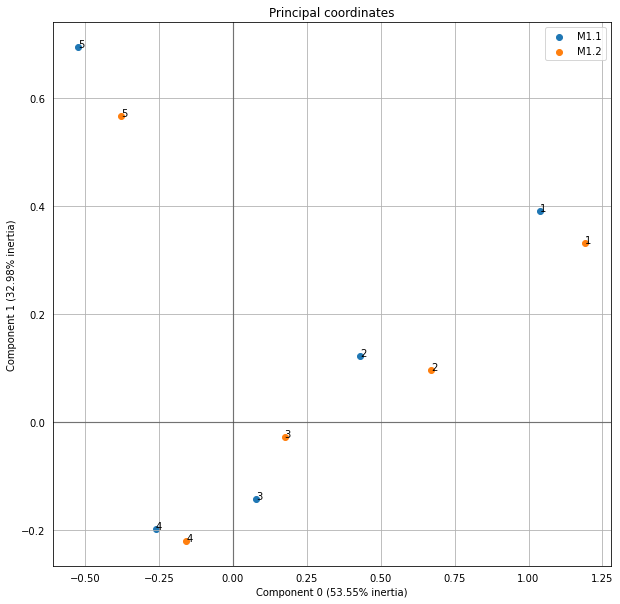

In [17]:
#%% Por fim, podemos plotar o mapa perceptual

ax = ca.plot_coordinates(X=tabela,
                         ax=None,
                         figsize=(10,10),
                         x_component=0,
                         y_component=1,
                         show_row_labels=True,
                         show_col_labels=True)

In [18]:
import plotly.graph_objects as go
import plotly.io as pio

In [19]:
#pip install plotly==5.21.0

In [19]:
pio.renderers.default='browser'

In [20]:
chart_df = pd.DataFrame({'obs_x':ca.row_coordinates(tabela)[0].values,
                         'obs_y': ca.row_coordinates(tabela)[1].values})

fig = go.Figure(data=go.Scatter(x=chart_df['obs_x'],
                                y=chart_df['obs_y'],
                                name="M1.1",
                                textposition="top center",
                                text=ca.column_coordinates(tabela).index,
                                mode="markers+text",)) # hover text goes here

fig.add_trace(go.Scatter(
    x=ca.column_coordinates(tabela)[0].values,
    mode="markers+text",
    name="M1.2",
    textposition="top center",
    y=ca.column_coordinates(tabela)[1].values,
    text=ca.column_coordinates(tabela).index
))

fig.update_layout(
    autosize=False,
    width=800,
    height=800,
    title_text='Coordenadas principais'

)

fig.show()


# MCA

In [25]:
#%% Gerando tabelas de contingência para os pares de variáveis

from itertools import combinations

for item in list(combinations(df.columns, 2)):
    print(item, "\n")
    tabela = pd.crosstab(df[item[0]], df[item[1]])
    
    print(tabela, "\n")


('M1.1', 'M1.2') 

M1.2  1   2   3   4   5
M1.1                   
1     3   5   1   4   2
2     5  10  19  20   8
3     3  12  31  58  12
4     1   6  15  79  18
5     0   1   6  13  19 

('M1.1', 'M1.3') 

M1.3  1   2   3   4   5
M1.1                   
1     2   4   6   2   1
2     4  16   9  28   5
3     3   7  42  54  10
4     0   4  36  59  20
5     1   1   9  14  14 

('M1.1', 'M1.4') 

M1.4  1   2   3   4   5
M1.1                   
1     3   3   4   2   3
2     6  11  12  16  17
3     2  13  24  56  21
4     1  12  16  62  28
5     1   2   4  14  18 

('M1.1', 'M1.5') 

M1.5  1   2   3   4   5
M1.1                   
1     3   1   5   3   3
2     5  10   9  23  15
3     1  10  33  46  26
4     1   5  14  61  38
5     0   1   3  11  24 

('M1.1', 'M1.6') 

M1.6  1   2   3   4   5
M1.1                   
1     1   2   4   5   3
2     2  12  13  25  10
3     2  10  35  50  19
4     1  12  35  56  15
5     0   5   5  15  14 

('M1.1', 'M1.7') 

M1.7  1   2   3   4   5
M1.1        

M7.4  1   2   3   4   5
M1.1                   
1     1   3   2   6   3
2     4  11  14  22  11
3     4   8  31  47  26
4     5   9  19  55  31
5     0   5   6   9  19 

('M1.1', 'M7.5') 

M7.5  1   2   3   4   5
M1.1                   
1     1   3   1   7   3
2     3  12  12  24  11
3     5  10  38  44  19
4     4  12  21  54  28
5     1   4  10   8  16 

('M1.1', 'M7.6') 

M7.6  1   2   3   4   5
M1.1                   
1     2   3   3   5   2
2     4  17  22  14   5
3     5  19  51  33   8
4     8  17  36  41  17
5     2   4   6  14  13 

('M1.1', 'M7.7') 

M7.7  1   2   3   4   5
M1.1                   
1     2   1   3   6   3
2     8  14  14  21   5
3     5  11  39  46  15
4     2  14  29  57  17
5     1   5   5  13  15 

('M1.1', 'M7.8') 

M7.8  1   2   3   4   5
M1.1                   
1     3   2   5   3   2
2     7  12  17  17   9
3     2  10  52  38  14
4     4  12  35  47  21
5     0   2  11  10  16 

('M1.1', 'M7.9') 

M7.9   1   2   3   4   5
M1.1                    
1    

5      1  1   4  11  22 

('M1.1', 'M12.5') 

M12.5  1   2   3   4   5
M1.1                    
1      1   1   2   6   5
2      8  12  11  14  17
3      2   8  21  50  35
4      0  12  20  57  30
5      1   1   8   5  24 

('M1.1', 'M12.6') 

M12.6  1   2   3   4   5
M1.1                    
1      2   1   1   6   5
2      2  11  11  25  13
3      0  13  26  41  36
4      3  11  24  56  25
5      1   2   6   6  24 

('M1.1', 'M12.7') 

M12.7  1   2   3   4   5
M1.1                    
1      1   2   2   7   3
2      4   9  11  26  12
3      1   7  33  42  33
4      2  11  22  53  31
5      1   2   8   5  23 

('M1.1', 'M12.8') 

M12.8  1   2   3   4   5
M1.1                    
1      3   3   5   3   1
2      3  11  16  16  16
3      3  14  30  40  29
4      5  11  34  46  23
5      2   5   6   6  20 

('M1.1', 'M12.9') 

M12.9   1   2   3   4   5
M1.1                     
1       7   2   1   0   5
2      11  14  19  11   7
3       4  15  45  36  16
4       2  14  21  46  36
5       4 

5      0  0   0   8  31 

('M1.1', 'M17.4') 

M17.4  1  2   3   4   5
M1.1                   
1      2  1   1   6   5
2      3  9  14  26  10
3      0  5  26  51  34
4      3  9  25  56  26
5      0  1   8   8  22 

('M1.1', 'M17.5') 

M17.5  1   2   3   4   5
M1.1                    
1      1   2   3   6   3
2      3  12  19  22   6
3      3   6  30  51  26
4      3  10  33  55  18
5      0   4   7   9  19 

('M1.1', 'M17.6') 

M17.6  1  2   3   4   5
M1.1                   
1      1  2   1   8   3
2      6  9  14  25   8
3      3  7  26  48  32
4      5  8  30  49  27
5      0  5   4   9  21 

('M1.1', 'M17.7') 

M17.7  1   2   3   4   5
M1.1                    
1      2   2   2   8   1
2      6  13  18  19   6
3      6  13  37  40  20
4      5  12  37  51  14
5      0   8   3   9  19 

('M1.1', 'M17.8') 

M17.8  1   2   3   4   5
M1.1                    
1      4   2   4   4   1
2      6  11  18  15  12
3      4  10  41  34  27
4      3  11  36  47  22
5      0   3   7  12  17 

('M

M22.9  1   2   3   4   5
M1.1                    
1      3   2   3   6   1
2      4  10  14  22  12
3      2   2  40  37  35
4      1   4  11  59  44
5      0   0   5   5  29 

('M1.1', 'M22.10') 

M22.10  1  2   3   4   5
M1.1                    
1       2  3   4   6   0
2       5  7  13  21  16
3       2  9  28  49  28
4       3  6  21  51  38
5       1  2   2  10  24 

('M1.1', 'M23.1') 

M23.1  1   2   3   4   5
M1.1                    
1      4   2   4   4   1
2      6  14  20  17   5
3      3  10  56  31  16
4      5  13  35  38  28
5      1   1  11  10  16 

('M1.1', 'M23.2') 

M23.2  1  2   3   4   5
M1.1                   
1      5  0   0   6   4
2      8  7   6  22  19
3      1  5  19  38  53
4      2  3  21  34  59
5      2  0   2   6  29 

('M1.1', 'M23.3') 

M23.3  1  2   3   4   5
M1.1                   
1      4  1   0   6   4
2      7  6   7  22  20
3      1  4  19  30  62
4      1  4   8  44  62
5      1  0   1   6  31 

('M1.1', 'M23.4') 

M23.4  1   2   3   4   5
M1.

M5.3  1   2   3   4   5
M1.2                   
1     2   2   4   3   1
2     7   3   5  10   9
3     2   9  22  26  13
4     1  12  31  88  42
5     0   2   8  18  31 

('M1.2', 'M5.4') 

M5.4  1   2   3   4   5
M1.2                   
1     1   2   2   5   2
2     2   3   5  16   8
3     2   7  26  30   7
4     1  14  55  79  25
5     1   8  15  15  20 

('M1.2', 'M5.5') 

M5.5  1   2   3   4   5
M1.2                   
1     2   2   2   5   1
2     2   4   5  14   9
3     4   9  30  26   3
4     1  17  54  82  20
5     1   9  15  17  17 

('M1.2', 'M5.6') 

M5.6  1   2   3   4   5
M1.2                   
1     3   2   1   5   1
2     1   8   7   7  11
3     3  12  33  19   5
4     1  29  49  71  24
5     0   8  16  17  18 

('M1.2', 'M5.7') 

M5.7  1   2   3   4   5
M1.2                   
1     2   2   5   2   1
2     3   4   8  12   7
3     3  14  23  23   9
4     3  24  46  76  25
5     2   2   8  20  27 

('M1.2', 'M5.8') 

M5.8  1   2   3   4   5
M1.2                   
1     2

('M1.2', 'M11.2') 

M11.2  1   2   3   4   5
M1.2                    
1      6   2   1   2   1
2      2   4   8  11   9
3      6  11  22  26   7
4      3  10  46  76  39
5      1   2   8  21  27 

('M1.2', 'M11.3') 

M11.3  1  2   3   4   5
M1.2                   
1      5  2   3   1   1
2      0  4   9  10  11
3      6  5  20  29  12
4      0  9  40  75  50
5      1  2   4  21  31 

('M1.2', 'M11.4') 

M11.4  1   2   3   4   5
M1.2                    
1      3   1   3   3   2
2      0   5   7  15   7
3      9  15  24  16   8
4      1  24  54  76  19
5      4   5  18  13  19 

('M1.2', 'M11.5') 

M11.5  1   2   3   4   5
M1.2                    
1      3   3   3   1   2
2      0   4  11  12   7
3      8  13  29  16   6
4      1  29  59  67  18
5      3   6  18  15  17 

('M1.2', 'M11.6') 

M11.6  1   2   3   4   5
M1.2                    
1      2   3   2   3   2
2      0   5  14  10   5
3      2  21  27  16   6
4      9  27  44  80  14
5      3  10  13  18  15 

('M1.2', 'M11.7') 

M1

M16.9  1   2   3   4   5
M1.2                    
1      0   5   0   2   5
2      5   4  11   5   9
3      6   8  11  15  32
4      6  17  40  54  57
5      4   6   2  10  37 

('M1.2', 'M16.10') 

M16.10  1   2   3   4   5
M1.2                     
1       2   2   1   4   3
2       1  10   5  13   5
3       4  12  14  26  16
4       2  12  33  73  54
5       1   4   7  15  32 

('M1.2', 'M17.1') 

M17.1  1   2   3   4   5
M1.2                    
1      6   1   3   2   0
2      0   9  11   8   6
3      4   9  31  19   9
4      5  16  48  74  31
5      3   2  11  21  22 

('M1.2', 'M17.2') 

M17.2  1  2   3   4   5
M1.2                   
1      3  1   4   3   1
2      1  5   5  13  10
3      4  7  15  26  20
4      2  9  22  85  56
5      2  1   3  15  38 

('M1.2', 'M17.3') 

M17.3  1  2   3   4   5
M1.2                   
1      2  3   2   3   2
2      2  5   3  12  12
3      4  4  17  23  24
4      1  5  26  71  71
5      0  1   2  12  44 

('M1.2', 'M17.4') 

M17.4  1  2   3   4  

M22.9  1  2   3   4   5
M1.2                   
1      2  0   6   2   2
2      1  4  14  13   2
3      2  5  18  27  20
4      4  7  30  70  63
5      1  2   5  17  34 

('M1.2', 'M22.10') 

M22.10  1  2   3   4   5
M1.2                    
1       3  3   1   5   0
2       4  5   6  14   5
3       2  6  23  23  18
4       4  9  34  77  50
5       0  4   4  18  33 

('M1.2', 'M23.1') 

M23.1  1   2   3   4   5
M1.2                    
1      4   3   4   1   0
2      3   4  13  11   3
3      5  10  37  11   9
4      6  17  64  58  29
5      1   6   8  19  25 

('M1.2', 'M23.2') 

M23.2  1  2   3   4   5
M1.2                   
1      4  2   1   3   2
2      5  2   3  13  11
3      3  6  15  18  30
4      5  5  24  63  77
5      1  0   5   9  44 

('M1.2', 'M23.3') 

M23.3  1  2   3   4   5
M1.2                   
1      3  2   2   2   3
2      5  1   4  12  12
3      4  3  15  22  28
4      1  8  12  62  91
5      1  1   2  10  45 

('M1.2', 'M23.4') 

M23.4  1   2   3   4   5
M1.2      

M5.3  1   2   3   4   5
M1.3                   
1     4   0   1   2   3
2     5   5   7  12   3
3     2  10  26  44  20
4     1  13  27  76  40
5     0   0   9  11  30 

('M1.3', 'M5.4') 

M5.4  1   2   3   4   5
M1.3                   
1     1   4   1   2   2
2     2   3  10  12   5
3     3   5  37  43  14
4     1  15  46  74  21
5     0   7   9  14  20 

('M1.3', 'M5.5') 

M5.5  1   2   3   4   5
M1.3                   
1     2   1   4   2   1
2     3   4   8  13   4
3     4  10  35  41  12
4     1  16  49  73  18
5     0  10  10  15  15 

('M1.3', 'M5.6') 

M5.6  1   2   3   4   5
M1.3                   
1     2   4   1   2   1
2     3   6   9  10   4
3     2  14  39  34  13
4     1  30  46  57  23
5     0   5  11  16  18 

('M1.3', 'M5.7') 

M5.7  1   2   3   4   5
M1.3                   
1     3   1   2   2   2
2     2   7   6  10   7
3     3  14  34  36  15
4     2  22  38  72  23
5     3   2  10  13  22 

('M1.3', 'M5.8') 

M5.8  1   2   3   4   5
M1.3                   
1     2

M9.5  1   2   3   4   5
M1.3                   
1     3   2   3   1   1
2     4   2   6  14   6
3     1  16  34  42   9
4     3  13  44  69  28
5     1   6  14  13  16 

('M1.3', 'M9.6') 

M9.6  1   2   3   4   5
M1.3                   
1     4   2   2   1   1
2     2   4   4  14   8
3     1  10  26  54  11
4     1  13  30  82  31
5     3   1  12  18  16 

('M1.3', 'M9.7') 

M9.7  1   2   3   4   5
M1.3                   
1     3   3   1   2   1
2     3   4   6  13   6
3     1   9  43  36  13
4     1  15  38  76  27
5     4   5   9  15  17 

('M1.3', 'M9.8') 

M9.8  1   2   3   4   5
M1.3                   
1     4   1   3   2   0
2     3   7   5  11   6
3     1  11  42  31  17
4     1  12  61  55  28
5     2   2   9  21  16 

('M1.3', 'M9.9') 

M9.9  1   2   3   4   5
M1.3                   
1     3   4   1   1   1
2     6  11   7   5   3
3     5  21  29  34  13
4     4  29  38  60  26
5     4   5  14  11  16 

('M1.3', 'M9.10') 

M9.10  1   2   3   4   5
M1.3                    
1   

M13.8  1   2   3   4   5
M1.3                    
1      2   2   3   3   0
2      2   6  12   8   4
3      2  11  48  31  10
4      3  22  62  54  16
5      2   4  16  14  14 

('M1.3', 'M13.9') 

M13.9  1   2   3   4   5
M1.3                    
1      3   2   0   4   1
2      5   5  13   7   2
3      2  14  36  44   6
4      4  18  48  55  32
5      3   5   6  17  19 

('M1.3', 'M13.10') 

M13.10   1   2   3   4   5
M1.3                      
1        3   1   1   3   2
2       10   6  10   4   2
3        3  15  35  43   6
4        4  18  41  64  30
5        1   3   5  15  26 

('M1.3', 'M14.1') 

M14.1  1   2   3   4   5
M1.3                    
1      3   2   2   3   0
2      6   9  11   5   1
3      7  13  40  31  11
4      1  13  42  68  33
5      0   2   7  11  30 

('M1.3', 'M14.2') 

M14.2  1   2   3   4   5
M1.3                    
1      2   3   2   3   0
2      6   4   5  10   7
3      4   8  21  35  34
4      1  10  19  71  56
5      0   2   2  15  31 

('M1.3', 'M14.3') 



('M1.3', 'M19.4') 

M19.4  1   2   3   4   5
M1.3                    
1      2   4   0   3   1
2      4  14   2  10   2
3      7  18  36  32   9
4      3  29  46  62  17
5      4   6  12  13  15 

('M1.3', 'M19.5') 

M19.5   1   2   3   4   5
M1.3                     
1       2   4   0   2   2
2       5  14   4   6   3
3      11  14  45  29   3
4       4  28  50  59  16
5       6   6  10  12  16 

('M1.3', 'M19.6') 

M19.6  1   2   3   4   5
M1.3                    
1      3   3   1   1   2
2      5   9   9   7   2
3      8  18  36  36   4
4      5  25  51  54  22
5      3   4  12  14  17 

('M1.3', 'M19.7') 

M19.7  1   2   3   4   5
M1.3                    
1      1   4   1   3   1
2      2  11   7   8   4
3      3  11  38  41   9
4      1  18  56  53  29
5      3   3   9  14  21 

('M1.3', 'M19.8') 

M19.8  1   2   3   4   5
M1.3                    
1      2   3   1   3   1
2      2  14   4   9   3
3      2  12  45  25  18
4      3  15  59  61  19
5      3   4  11  18  14 

('M1.3',

('M1.4', 'M1.10') 

M1.10  1   2   3   4   5
M1.4                    
1      1   4   5   2   1
2      1  15  10  12   3
3      0   9  26  17   8
4      3  13  55  69  10
5      0   7  21  39  20 

('M1.4', 'M2.1') 

M2.1  1  2   3   4   5
M1.4                  
1     6  4   2   0   1
2     5  9  17   9   1
3     0  5  30  20   5
4     2  9  56  64  19
5     0  3  20  32  32 

('M1.4', 'M2.2') 

M2.2  1   2   3   4   5
M1.4                   
1     2   7   0   3   1
2     3  13   5   6  14
3     2   2  14  22  20
4     0   1  13  65  71
5     0   0   4  13  70 

('M1.4', 'M2.3') 

M2.3  1  2   3   4   5
M1.4                  
1     4  1   4   2   2
2     5  9   7  10  10
3     0  2  11  22  25
4     0  3  12  78  57
5     0  0   3  16  68 

('M1.4', 'M2.4') 

M2.4  1  2   3    4   5
M1.4                   
1     2  4   1    3   3
2     2  6   4   19  10
3     0  3  11   31  15
4     1  6  25  100  18
5     1  8  10   38  30 

('M1.4', 'M2.5') 

M2.5  1  2   3   4   5
M1.4               

M6.4   1   2   3   4   5
M1.4                    
1      3   0   5   2   3
2      3  10  14  11   3
3      1  10  22  18   9
4     10  19  55  53  13
5      3  15  21  31  17 

('M1.4', 'M6.5') 

M6.5   1   2   3   4   5
M1.4                    
1      2   1   6   2   2
2      5   9  11  15   1
3      1   8  25  18   8
4     11  24  46  57  12
5      3  16  17  34  17 

('M1.4', 'M6.6') 

M6.6   1   2   3   4   5
M1.4                    
1      3   1   2   2   5
2      5  13  12   9   2
3      3   9  24  14  10
4     11  28  47  50  14
5     11  15  19  26  16 

('M1.4', 'M6.7') 

M6.7  1   2   3   4   5
M1.4                   
1     2   1   3   2   5
2     4   8  11  17   1
3     3   8  20  19  10
4     4  22  43  62  19
5     7   9  16  33  22 

('M1.4', 'M6.8') 

M6.8  1   2   3   4   5
M1.4                   
1     4   2   3   1   3
2     0  11  15  11   4
3     0   4  30  17   9
4     2   9  52  68  19
5     2  12  27  28  18 

('M1.4', 'M6.9') 

M6.9  1   2   3   4   5
M1.4      

M11.6  1   2   3   4   5
M1.4                    
1      3   2   4   1   3
2      1  13  14  12   1
3      3   9  19  20   9
4      3  26  45  64  12
5      6  16  18  30  17 

('M1.4', 'M11.7') 

M11.7  1   2   3   4   5
M1.4                    
1      3   2   3   3   2
2      4   7  11  14   5
3      3   8  21  17  11
4      7  18  51  61  13
5      7  12  18  29  21 

('M1.4', 'M11.8') 

M11.8  1   2   3   4   5
M1.4                    
1      4   1   4   2   2
2      4   7  14  13   3
3      2   6  23  20   9
4      4  11  56  63  16
5      8   9  31  22  17 

('M1.4', 'M11.9') 

M11.9  1   2   3   4   5
M1.4                    
1      4   1   4   3   1
2      5   9   6  15   6
3      3   8  19  13  17
4      4   9  49  62  26
5      3  12  15  28  29 

('M1.4', 'M11.10') 

M11.10  1   2   3   4   5
M1.4                     
1       4   2   4   1   2
2       3  13   9  12   4
3       4   2  18  20  16
4       2   4  34  85  25
5       1   6  17  34  29 

('M1.4', 'M12.1') 

M12.1  

5      4   9  26  28  20 

('M1.4', 'M16.6') 

M16.6  1   2   3   4   5
M1.4                    
1      1   3   3   3   3
2      2   8  10  16   5
3      1   6  20  25   8
4      3  13  47  70  17
5      3  12  22  25  25 

('M1.4', 'M16.7') 

M16.7  1   2   3   4   5
M1.4                    
1      3   2   1   4   3
2      4   6  11  15   5
3      1   3  23  25   8
4      4  12  44  66  24
5      3  10  23  23  28 

('M1.4', 'M16.8') 

M16.8  1   2   3   4   5
M1.4                    
1      2   1   2   5   3
2      2  16   7  11   5
3      3   3  28  14  12
4      3  12  40  62  33
5      1   6  30  22  28 

('M1.4', 'M16.9') 

M16.9  1   2   3   4   5
M1.4                    
1      2   2   4   2   3
2      4  13   6   6  12
3      5   9  14  11  21
4      7   9  30  47  57
5      3   7  10  20  47 

('M1.4', 'M16.10') 

M16.10  1   2   3   4   5
M1.4                     
1       1   4   2   4   2
2       4  14   4  12   7
3       1   8  11  21  19
4       2   8  28  68  44
5       

M21.6  1   2   3   4   5
M1.4                    
1      2   2   2   5   2
2      2   9   8  14   8
3      4   6  17  22  11
4      6  16  33  74  21
5      3  13  19  34  18 

('M1.4', 'M21.7') 

M21.7  1   2   3   4   5
M1.4                    
1      2   2   2   3   4
2      3  12   6  10  10
3      4   2  15  27  12
4      6  17  34  73  20
5      2   9  27  32  17 

('M1.4', 'M21.8') 

M21.8  1   2   3   4   5
M1.4                    
1      4   3   1   2   3
2      1  10  12  13   5
3      1   2  27  20  10
4      5   5  41  65  34
5      4   4  28  23  28 

('M1.4', 'M21.9') 

M21.9  1   2   3   4   5
M1.4                    
1      3   2   4   3   1
2      2  12   7  11   9
3      2   4  15  19  20
4      3  14  24  70  39
5      3   7  16  25  36 

('M1.4', 'M21.10') 

M21.10  1  2   3   4   5
M1.4                    
1       3  5   1   3   1
2       1  8  12  12   8
3       1  4  19  21  15
4       6  6  24  71  43
5       2  6  18  28  33 

('M1.4', 'M22.1') 

M22.1  1   2  

5     3  10  17  44  32 

('M1.5', 'M2.8') 

M2.8  1   2   3   4   5
M1.5                   
1     4   4   1   0   1
2     0   5  12   7   3
3     1  11  24  21   7
4     2  12  36  73  21
5     1   9  26  41  29 

('M1.5', 'M2.9') 

M2.9  1   2   3   4   5
M1.5                   
1     5   2   2   1   0
2     2   6   7   7   5
3     4   8  17  20  15
4     2  13  28  71  30
5     1   4  19  38  44 

('M1.5', 'M2.10') 

M2.10  1   2   3   4   5
M1.5                    
1      3   4   1   2   0
2      2   8   6   8   3
3      0   8  24  19  13
4      1  12  22  84  25
5      1   3  11  38  53 

('M1.5', 'M3.1') 

M3.1  1   2   3   4   5
M1.5                   
1     5   2   2   1   0
2     1   6  12   7   1
3     4   4  23  24   9
4     2  12  42  67  21
5     0   3  23  50  30 

('M1.5', 'M3.2') 

M3.2  1   2   3   4   5
M1.5                   
1     5   3   1   1   0
2     1   5   5  14   2
3     9   8  15  20  12
4     1  10  21  61  51
5     2   2  12  30  60 

('M1.5', 'M3.3') 

M3

5     2  14  16  43  31 

('M1.5', 'M7.6') 

M7.6  1   2   3   4   5
M1.5                   
1     2   4   1   2   1
2     1   8   8   7   3
3     3  12  29  15   5
4     9  16  53  53  13
5     6  20  27  30  23 

('M1.5', 'M7.7') 

M7.7  1   2   3   4   5
M1.5                   
1     0   5   1   2   2
2     2   6   5  12   2
3     5   7  20  22  10
4     6  13  38  72  15
5     5  14  26  35  26 

('M1.5', 'M7.8') 

M7.8  1   2   3   4   5
M1.5                   
1     1   5   1   2   1
2     1   5   5  10   6
3     5   6  32  15   6
4     3  12  48  60  21
5     6  10  34  28  28 

('M1.5', 'M7.9') 

M7.9  1   2   3   4   5
M1.5                   
1     3   3   1   2   1
2     3   6   5  11   2
3     8   7  21  19   9
4     5  21  35  57  26
5     3  16  18  32  37 

('M1.5', 'M7.10') 

M7.10  1   2   3   4   5
M1.5                    
1      2   4   2   2   0
2      3   8   6   6   4
3      5   6  19  22  12
4      0  11  35  66  32
5      0  10  14  46  36 

('M1.5', 'M8.1') 

M8

M11.10  1  2   3   4   5
M1.5                    
1       3  5   1   0   1
2       3  5  10   8   1
3       4  5  22  22  11
4       3  9  28  77  27
5       1  3  21  45  36 

('M1.5', 'M12.1') 

M12.1  1  2   3   4   5
M1.5                   
1      5  5   0   0   0
2      3  6   3  10   5
3      1  7  13  30  13
4      1  9  20  75  39
5      2  0  17  37  50 

('M1.5', 'M12.2') 

M12.2  1   2   3   4   5
M1.5                    
1      3   2   4   0   1
2      4   3   8   8   4
3      2   8  19  19  16
4      1  10  14  61  58
5      1   1  10  33  61 

('M1.5', 'M12.3') 

M12.3  1  2   3   4   5
M1.5                   
1      3  3   2   2   0
2      3  4   6   9   5
3      4  5  14  23  18
4      2  3   7  74  58
5      1  1   9  21  74 

('M1.5', 'M12.4') 

M12.4  1  2   3   4   5
M1.5                   
1      2  4   1   1   2
2      3  2   6   7   9
3      2  2  12  22  26
4      1  7  14  70  52
5      2  4  14  32  54 

('M1.5', 'M12.5') 

M12.5  1   2   3   4   5
M1.5       

M16.9  1   2   3   4   5
M1.5                    
1      1   5   1   1   2
2      6   4   4   4   9
3      4   7  21   9  23
4      4  16  25  47  52
5      6   8  13  25  54 

('M1.5', 'M16.10') 

M16.10  1   2   3   4   5
M1.5                     
1       2   4   1   2   1
2       4   7   4   8   4
3       0  13  14  24  13
4       2   9  22  71  40
5       2   7  19  26  52 

('M1.5', 'M17.1') 

M17.1  1   2   3   4   5
M1.5                    
1      6   3   1   0   0
2      1   6   8   7   5
3      5   6  30  18   5
4      3  16  43  59  23
5      3   6  22  40  35 

('M1.5', 'M17.2') 

M17.2  1  2   3   4   5
M1.5                   
1      2  3   4   1   0
2      1  7   4   8   7
3      7  5  16  25  11
4      1  8  16  72  47
5      1  0   9  36  60 

('M1.5', 'M17.3') 

M17.3  1  2   3   4   5
M1.5                   
1      3  5   1   0   1
2      1  5   7   9   5
3      4  2  16  25  17
4      0  5  14  66  59
5      1  1  12  21  71 

('M1.5', 'M17.4') 

M17.4  1  2   3   4  

M21.6  1   2   3   4   5
M1.5                    
1      1   3   1   4   1
2      1   6   5  11   4
3      4   4  22  26   8
4      7  19  33  64  21
5      4  14  18  44  26 

('M1.5', 'M21.7') 

M21.7  1   2   3   4   5
M1.5                    
1      1   4   1   1   3
2      2   6   3  10   6
3      5   6  18  25  10
4      7  16  29  69  23
5      2  10  33  40  21 

('M1.5', 'M21.8') 

M21.8  1  2   3   4   5
M1.5                   
1      3  4   1   1   1
2      1  5   7  13   1
3      2  7  26  18  11
4      6  5  40  61  32
5      3  3  35  30  35 

('M1.5', 'M21.9') 

M21.9  1   2   3   4   5
M1.5                    
1      2   3   2   3   0
2      2   5   5   7   8
3      2   8  21  21  12
4      4  14  23  66  37
5      3   9  15  31  48 

('M1.5', 'M21.10') 

M21.10  1   2   3   4   5
M1.5                     
1       1   4   2   3   0
2       2   4   6  10   5
3       4   6  17  25  12
4       4  10  30  65  35
5       2   5  19  32  48 

('M1.5', 'M22.1') 

M22.1  1   2  

M3.1  1   2   3   4   5
M1.6                   
1     0   1   2   1   2
2     1   3  11  21   5
3     5  10  31  31  15
4     2   7  46  69  27
5     4   6  12  27  12 

('M1.6', 'M3.2') 

M3.2  1   2   3   4   5
M1.6                   
1     2   1   0   1   2
2     1   3   8  12  17
3     6  10  17  31  28
4     2  10  24  64  51
5     7   4   5  18  27 

('M1.6', 'M3.3') 

M3.3  1   2   3   4   5
M1.6                   
1     0   1   2   1   2
2     0   3   4  17  17
3     6  11  20  30  25
4     2   3  36  58  52
5     4   5   9  17  26 

('M1.6', 'M3.4') 

M3.4  1  2   3   4   5
M1.6                  
1     0  1   1   2   2
2     1  5  12  15   8
3     5  8  25  40  14
4     3  2  20  77  49
5     1  2   3  21  34 

('M1.6', 'M3.5') 

M3.5  1  2   3   4   5
M1.6                  
1     0  2   1   2   1
2     1  9  10  13   8
3     6  9  26  39  12
4     2  9  19  78  43
5     0  4   5  22  30 

('M1.6', 'M3.6') 

M3.6  1   2   3   4   5
M1.6                   
1     0   0   2   4  

('M1.6', 'M7.10') 

M7.10  1   2   3   4   5
M1.6                    
1      0   0   1   3   2
2      0  10   6  16   9
3      6  10  31  26  19
4      0  13  25  76  37
5      4   6  13  21  17 

('M1.6', 'M8.1') 

M8.1  1.0  2.0  3.0  4.0  5.0
M1.6                         
1       0    0    2    3    1
2       3    3    6   16   13
3       7   11   32   25   17
4       1   21   43   52   34
5       5    6   18   12   20 

('M1.6', 'M8.2') 

M8.2  1.0  2.0  3.0  4.0  5.0
M1.6                         
1       1    0    3    0    2
2       1    6    7   17   10
3       5    9   31   30   17
4       1   17   35   66   32
5       5    6   18   14   18 

('M1.6', 'M8.3') 

M8.3  1.0  2.0  3.0  4.0  5.0
M1.6                         
1       1    0    2    2    1
2       2    4    6   16   13
3       5    8   27   29   23
4       1   11   36   68   35
5       3    7   12   16   23 

('M1.6', 'M8.4') 

M8.4  1.0  2.0  3.0  4.0  5.0
M1.6                         
1       3    0    2    1    0
2

M13.4  1   2   3   4   5
M1.6                    
1      0   2   1   2   1
2      1   9   7  16   8
3      6  12  35  30   9
4      2   7  24  86  32
5      0   1   9  25  26 

('M1.6', 'M13.5') 

M13.5  1   2   3   4   5
M1.6                    
1      0   2   1   2   1
2      3   9  11  11   7
3      5  13  34  32   8
4      2  11  33  78  27
5      1   1   9  27  23 

('M1.6', 'M13.6') 

M13.6   1   2   3   4   5
M1.6                     
1       0   3   0   2   1
2       2  11  13  13   2
3      10  16  37  23   6
4       3  15  56  56  21
5       2   5  12  22  20 

('M1.6', 'M13.7') 

M13.7   1   2   3   4   5
M1.6                     
1       0   1   2   2   1
2       1  10   9  18   3
3      10   8  36  31   7
4       3  11  59  56  22
5       3   3  17  17  21 

('M1.6', 'M13.8') 

M13.8  1   2   3   4   5
M1.6                    
1      0   2   2   1   1
2      1   9  11  15   5
3      5  11  44  28   4
4      3  17  60  53  18
5      2   6  24  13  16 

('M1.6', 'M13.9') 

M

M19.2   1   2   3   4   5
M1.6                     
1       1   0   3   1   1
2       2   6  10  12  11
3      10   8  30  28  16
4       1  20  39  64  27
5       5   4  17  16  19 

('M1.6', 'M19.3') 

M19.3  1  2   3   4   5
M1.6                   
1      0  1   1   2   2
2      2  3   6  17  13
3      5  9  21  34  23
4      0  8  26  74  43
5      3  4   9  20  25 

('M1.6', 'M19.4') 

M19.4  1   2   3   4   5
M1.6                    
1      1   1   2   2   0
2      6  13   7  12   3
3      7  18  34  25   8
4      1  27  46  62  15
5      5  12   7  19  18 

('M1.6', 'M19.5') 

M19.5  1   2   3   4   5
M1.6                    
1      1   1   2   2   0
2      7  12  10   8   4
3      8  19  33  25   7
4      6  25  52  56  12
5      6   9  12  17  17 

('M1.6', 'M19.6') 

M19.6  1   2   3   4   5
M1.6                    
1      1   0   3   1   1
2      6  10  10  10   5
3      8  15  39  22   8
4      5  23  45  62  16
5      4  11  12  17  17 

('M1.6', 'M19.7') 

M19.7  1   2   

5      0   6   8  25  22 

('M1.6', 'M24.6') 

M24.6  1   2   3   4   5
M1.6                    
1      1   0   4   1   0
2      3   9   8  12   9
3      6  12  31  35   8
4      5  18  41  61  26
5      1   5   9  29  17 

('M1.6', 'M24.7') 

M24.7  1   2   3   4   5
M1.6                    
1      0   0   3   2   1
2      1   8  10  14   8
3      8  10  30  31  13
4      2  16  43  60  30
5      2   6  10  22  21 

('M1.6', 'M24.8') 

M24.8  1   2   3   4   5
M1.6                    
1      0   0   3   2   1
2      3   4  10  18   6
3      5  10  34  28  15
4      1  11  42  57  40
5      1   3  13  26  18 

('M1.6', 'M24.9') 

M24.9  1   2   3   4   5
M1.6                    
1      0   0   2   3   1
2      3   4  10  15   9
3      9   7  27  29  20
4      5  17  41  53  35
5      3   3  15  17  23 

('M1.6', 'M24.10') 

M24.10  1   2   3   4   5
M1.6                     
1       0   0   2   2   2
2       1   4   9  17  10
3       7  10  29  30  16
4       2  15  40  50  44
5       

5     4   4   9  13  19 

('M1.7', 'M6.8') 

M6.8  1   2   3   4   5
M1.7                   
1     2   2   4   1   1
2     1   6  10  24   4
3     1  10  50  34  10
4     0  17  53  54  18
5     4   3  10  12  20 

('M1.7', 'M6.9') 

M6.9  1   2   3   4   5
M1.7                   
1     2   7   1   0   0
2     3   7  11  15   9
3     6  16  39  30  14
4     7  16  44  52  23
5     4   3  14  12  16 

('M1.7', 'M6.10') 

M6.10  1   2   3   4   5
M1.7                    
1      2   4   3   1   0
2      0   6  10  16  13
3      7  11  32  36  19
4      5  18  36  46  37
5      7   3   5  18  16 

('M1.7', 'M7.1') 

M7.1  1   2   3   4   5
M1.7                   
1     0   5   2   1   2
2     1   4  15  19   6
3     2   7  40  40  16
4     5  10  41  62  24
5     5   3   7  17  17 

('M1.7', 'M7.2') 

M7.2  1   2   3   4   5
M1.7                   
1     2   2   4   1   1
2     1   4   6  23  11
3     5   6  26  42  26
4     2  10  38  60  32
5     2   3   8  18  18 

('M1.7', 'M7.3') 

M7

M10.9  1   2   3   4   5
M1.7                    
1      1   3   2   2   2
2      2   4   9  16  14
3      7  14  36  32  16
4      5   9  40  52  36
5      2   5  17   7  18 

('M1.7', 'M10.10') 

M10.10  1   2   3   4   5
M1.7                     
1       0   3   2   2   3
2       3   4  13  13  12
3       5  16  26  40  18
4       6  13  34  53  36
5       3   4  12  13  17 

('M1.7', 'M11.1') 

M11.1  1   2   3   4   5
M1.7                    
1      2   2   2   2   2
2      1   5  17  15   7
3      7  10  41  35  12
4      3  20  42  59  18
5      3   5  13  14  14 

('M1.7', 'M11.2') 

M11.2  1  2   3   4   5
M1.7                   
1      2  3   2   2   1
2      1  5   9  19  11
3      7  7  28  42  21
4      3  9  35  64  31
5      5  5  11   9  19 

('M1.7', 'M11.3') 

M11.3  1  2   3   4   5
M1.7                   
1      1  3   1   2   3
2      0  5  10  17  13
3      5  7  30  36  27
4      3  3  25  71  40
5      3  4  10  10  22 

('M1.7', 'M11.4') 

M11.4  1   2   3   4 

M15.3  1  2   3   4   5
M1.7                   
1      1  2   1   3   3
2      0  2   3  19  21
3      2  8  23  47  25
4      0  4  22  55  61
5      0  3   8  10  28 

('M1.7', 'M15.4') 

M15.4  1   2   3   4   5
M1.7                    
1      0   4   4   2   0
2      2  13  13  15   2
3      4  14  39  36  12
4      2  12  28  69  31
5      1   4  15  13  16 

('M1.7', 'M15.5') 

M15.5  1   2   3   4   5
M1.7                    
1      0   6   3   0   1
2      2  13  13  15   2
3      2  18  42  33  10
4      2  14  33  67  26
5      0   4  16  11  18 

('M1.7', 'M15.6') 

M15.6  1   2   3   4   5
M1.7                    
1      1   3   3   2   1
2      2  12   7  18   6
3      3  23  29  42   8
4      6  11  36  62  27
5      0  12  11   8  18 

('M1.7', 'M15.7') 

M15.7  1   2   3   4   5
M1.7                    
1      1   3   4   0   2
2      1  10  11  19   4
3      6  15  38  36  10
4      3  15  33  63  28
5      0   9   9  11  20 

('M1.7', 'M15.8') 

M15.8  1   2   3   4  

M20.2  1   2   3   4   5
M1.7                    
1      0   1   5   1   3
2      4   4   7  14  16
3      9   5  30  34  27
4      5  10  25  60  42
5      7   0   9   9  24 

('M1.7', 'M20.3') 

M20.3  1   2   3   4   5
M1.7                    
1      0   1   3   3   3
2      3   4   6  18  14
3      7  10  24  34  30
4      6   4  20  58  54
5      4   3   8  10  24 

('M1.7', 'M20.4') 

M20.4  1  2   3   4   5
M1.7                   
1      1  2   2   2   3
2      0  5   7  26   7
3      6  9  26  47  17
4      5  6  24  80  27
5      1  5   6  17  20 

('M1.7', 'M20.5') 

M20.5  1   2   3   4   5
M1.7                    
1      0   3   3   3   1
2      2   9   7  21   6
3      6  11  30  45  13
4      4  13  25  74  26
5      2   5   7  19  16 

('M1.7', 'M20.6') 

M20.6  1   2   3   4   5
M1.7                    
1      0   1   4   3   2
2      1  10  11  17   6
3      5  14  28  43  15
4      7  13  32  60  30
5      2   4   6  19  18 

('M1.7', 'M20.7') 

M20.7  1   2   3   4  

M24.10  1   2   3   4   5
M1.7                     
1       2   1   2   1   4
2       0   4  11  19  11
3       7   9  40  31  18
4       2  16  29  51  44
5       2   2  15  18  12 

('M1.8', 'M1.9') 

M1.9  1   2   3   4   5
M1.8                   
1     4   3   5   1   1
2     1  16  14  19   5
3     2   5  34  31   7
4     1   8  25  80  23
5     0   1   7  24  34 

('M1.8', 'M1.10') 

M1.10  1   2   3   4   5
M1.8                    
1      1   2   4   6   1
2      1  14  16  20   4
3      1   8  40  26   4
4      2  20  39  66  10
5      0   4  18  21  23 

('M1.8', 'M2.1') 

M2.1  1   2   3   4   5
M1.8                   
1     3   1   3   4   3
2     5   6  20  19   5
3     0  10  26  30  13
4     3   5  60  50  19
5     2   8  16  22  18 

('M1.8', 'M2.2') 

M2.2  1  2   3   4   5
M1.8                  
1     3  2   0   4   5
2     4  6   3  11  31
3     0  4  14  23  38
4     0  4  14  51  68
5     0  7   5  20  34 

('M1.8', 'M2.3') 

M2.3  1  2   3   4   5
M1.8             

M6.5  1   2   3   4   5
M1.8                   
1     2   3   4   4   1
2     3  16  15  17   4
3     8  14  30  21   6
4     4  18  47  54  14
5     5   7   9  30  15 

('M1.8', 'M6.6') 

M6.6  1   2   3   4   5
M1.8                   
1     4   5   4   1   0
2     7  15  15  13   5
3     5  18  34  15   7
4     8  22  36  53  18
5     9   6  15  19  17 

('M1.8', 'M6.7') 

M6.7  1   2   3   4   5
M1.8                   
1     5   4   4   1   0
2     0  13  15  23   4
3     2  13  28  25  11
4     6  14  35  63  19
5     7   4  11  21  23 

('M1.8', 'M6.8') 

M6.8  1  2   3   4   5
M1.8                  
1     2  4   5   3   0
2     1  9  15  25   5
3     2  8  35  25   9
4     1  9  52  52  23
5     2  8  20  20  16 

('M1.8', 'M6.9') 

M6.9  1   2   3   4   5
M1.8                   
1     5   3   2   2   2
2     5   9  15  16  10
3     3  14  28  19  15
4     4  14  46  55  18
5     5   9  18  17  17 

('M1.8', 'M6.10') 

M6.10  1   2   3   4   5
M1.8                    
1      3   

M11.5  1   2   3   4   5
M1.8                    
1      2   4   1   5   2
2      4  14  19  13   5
3      6  12  36  19   6
4      1  18  46  51  21
5      2   7  18  23  16 

('M1.8', 'M11.6') 

M11.6  1   2   3   4   5
M1.8                    
1      2   6   3   2   1
2      4  14  16  16   5
3      2  14  42  18   3
4      3  22  30  66  16
5      5  10   9  25  17 

('M1.8', 'M11.7') 

M11.7  1   2   3   4   5
M1.8                    
1      3   5   2   3   1
2      3   9  21  14   8
3      5  11  37  21   5
4      7  19  29  63  19
5      6   3  15  23  19 

('M1.8', 'M11.8') 

M11.8  1   2   3   4   5
M1.8                    
1      3   1   3   4   3
2      7   6  20  17   5
3      4   8  35  27   5
4      2  15  48  53  19
5      6   4  22  19  15 

('M1.8', 'M11.9') 

M11.9  1   2   3   4   5
M1.8                    
1      3   1   1   3   6
2      5   8  12  23   7
3      1   8  24  23  23
4      3  12  40  55  27
5      7  10  16  17  16 

('M1.8', 'M11.10') 

M11.10  1  2  

5      5   6  11  30  14 

('M1.8', 'M16.6') 

M16.6  1   2   3   4   5
M1.8                    
1      0   4   5   4   1
2      4  12  16  18   5
3      1   9  28  32   9
4      2   7  41  66  21
5      3  10  12  19  22 

('M1.8', 'M16.7') 

M16.7  1   2   3   4   5
M1.8                    
1      3   3   4   3   1
2      2  12  15  19   7
3      2   6  26  30  15
4      5   7  45  58  22
5      3   5  12  23  23 

('M1.8', 'M16.8') 

M16.8  1   2   3   4   5
M1.8                    
1      2   2   3   4   3
2      1  13  16  16   9
3      1  12  30  19  17
4      5   6  39  57  30
5      2   5  19  18  22 

('M1.8', 'M16.9') 

M16.9  1   2   3   4   5
M1.8                    
1      2   4   4   2   2
2      3   8   9  11  24
3      4   9  19  14  33
4      3  15  24  44  51
5      9   4   8  15  30 

('M1.8', 'M16.10') 

M16.10  1   2   3   4   5
M1.8                     
1       0   3   4   4   3
2       2   8  11  15  19
3       1   8  16  28  26
4       4   9  24  67  33
5       

M22.2   1   2   3   4   5
M1.8                     
1       4   1   2   2   5
2      11   7  16  15   6
3       4  11  26  20  18
4      10  13  38  50  26
5      10  15  14  10  17 

('M1.8', 'M22.3') 

M22.3  1  2   3   4   5
M1.8                   
1      2  0   1   3   8
2      2  2   7  21  23
3      1  4  11  26  37
4      1  3  10  68  55
5      2  6   7  12  39 

('M1.8', 'M22.4') 

M22.4  1   2   3   4   5
M1.8                    
1      3   1   3   3   4
2      3   7  12  26   7
3      4   5  19  32  19
4      1  11  20  74  31
5      2   5  10  20  29 

('M1.8', 'M22.5') 

M22.5  1   2   3   4   5
M1.8                    
1      3   4   3   2   2
2      9  14   8  22   2
3      6  11  31  17  14
4      5  12  35  60  25
5      5  12   7  21  21 

('M1.8', 'M22.6') 

M22.6  1   2   3   4   5
M1.8                    
1      3   4   4   1   2
2      9  12  14  15   5
3      4  12  26  25  12
4      3  21  29  57  27
5      6   4  12  19  25 

('M1.8', 'M22.7') 

M22.7  1   2   

M4.4  1   2   3   4   5
M1.9                   
1     1   4   0   1   2
2     3   7   9  11   3
3     0   5  25  38  17
4     3  11  23  81  37
5     2   2  11  22  33 

('M1.9', 'M4.5') 

M4.5  1   2   3   4   5
M1.9                   
1     1   3   3   0   1
2     1  10   6  13   3
3     0   9  37  28  11
4     3  13  35  75  29
5     2   5   8  24  31 

('M1.9', 'M4.6') 

M4.6  1   2   3   4   5
M1.9                   
1     2   2   1   1   2
2     2   9   8  11   3
3     1   8  32  31  13
4     2  20  36  67  30
5     4   6   8  16  36 

('M1.9', 'M4.7') 

M4.7  1   2   3   4   5
M1.9                   
1     5   3   0   0   0
2     1  12   8   9   3
3     2  11  19  44   9
4     5  16  38  71  25
5     3   3  10  19  35 

('M1.9', 'M4.8') 

M4.8  1   2   3   4   5
M1.9                   
1     2   4   1   1   0
2     1   6   6  16   4
3     1   7  32  33  12
4     4  10  45  71  25
5     4   6  13  19  28 

('M1.9', 'M4.9') 

M4.9  1   2   3   4   5
M1.9                   
1     2

5        2    7    6   20   35 

('M1.9', 'M9.1') 

M9.1  1   2   3   4   5
M1.9                   
1     3   0   2   2   1
2     1   4  12  12   4
3     3  10  36  23  13
4     3  15  41  71  25
5     3   4  16  21  26 

('M1.9', 'M9.2') 

M9.2  1  2   3   4   5
M1.9                  
1     5  0   1   1   1
2     1  1   7  15   9
3     2  7  18  24  34
4     1  9  30  65  50
5     2  3   7  24  34 

('M1.9', 'M9.3') 

M9.3  1  2   3   4   5
M1.9                  
1     4  0   0   1   3
2     1  0   8  13  11
3     1  2  24  25  33
4     2  9  18  77  49
5     2  1   5  20  42 

('M1.9', 'M9.4') 

M9.4  1   2   3   4   5
M1.9                   
1     4   3   0   1   0
2     0   4   7  19   3
3     3   5  22  43  12
4     1  16  37  74  27
5     2   4   8  28  28 

('M1.9', 'M9.5') 

M9.5  1   2   3   4   5
M1.9                   
1     4   1   2   1   0
2     3   5   7  15   3
3     1  12  36  28   8
4     3  17  45  68  22
5     1   4  11  27  27 

('M1.9', 'M9.6') 

M9.6  1   2   3  

M14.4  1  2   3   4   5
M1.9                   
1      2  2   2   1   1
2      0  7   5  15   6
3      4  8  20  41  12
4      2  9  34  80  30
5      0  8  13  14  35 

('M1.9', 'M14.5') 

M14.5  1   2   3   4   5
M1.9                    
1      2   2   3   0   1
2      1   7   6  14   5
3      3  12  27  34   9
4      2  21  37  71  24
5      0  10  16  13  31 

('M1.9', 'M14.6') 

M14.6  1   2   3   4   5
M1.9                    
1      1   3   4   0   0
2      2   5   6  17   3
3      2  11  26  39   7
4      3  21  26  76  29
5      0   5  13  22  30 

('M1.9', 'M14.7') 

M14.7  1   2   3   4   5
M1.9                    
1      3   2   2   1   0
2      3   6  12   8   4
3      3  10  42  22   8
4      3  18  34  79  21
5      3   5  13  17  32 

('M1.9', 'M14.8') 

M14.8  1   2   3   4   5
M1.9                    
1      3   2   3   0   0
2      2   4  12   8   7
3      2   8  31  33  11
4      3  11  58  61  22
5      1   8  12  23  26 

('M1.9', 'M14.9') 

M14.9  1   2   3   4  

M19.9   1   2   3   4   5
M1.9                     
1       3   3   0   2   0
2       2   6  10  10   5
3       7  14  26  23  15
4      10  30  42  49  24
5      10  11  23  11  15 

('M1.9', 'M19.10') 

M19.10  1   2   3   4   5
M1.9                     
1       1   3   0   2   2
2       1   3   6  11  12
3       2   2  22  26  33
4       1  14  31  63  46
5       5   6  14  25  20 

('M1.9', 'M20.1') 

M20.1  1   2   3   4   5
M1.9                    
1      2   1   2   2   1
2      3   5  11   9   5
3      7   8  34  25  11
4      3  14  61  49  28
5      5   8  16  20  21 

('M1.9', 'M20.2') 

M20.2  1  2   3   4   5
M1.9                   
1      1  1   4   1   1
2      4  5   7  10   7
3      6  6  24  28  21
4      6  7  30  64  48
5      8  1  11  15  35 

('M1.9', 'M20.3') 

M20.3  1  2   3   4   5
M1.9                   
1      1  3   1   3   0
2      3  6   1  15   8
3      5  4  26  25  25
4      4  7  24  67  53
5      7  2   9  13  39 

('M1.9', 'M20.4') 

M20.4  1   2  

M2.7   1   2   3   4   5
M1.10                   
1      3   0   1   1   0
2      5  12   6  20   5
3      4  13  38  48  14
4      3  14  25  72  25
5      1   4   4  12  21 

('M1.10', 'M2.8') 

M2.8   1   2   3   4   5
M1.10                   
1      2   2   1   0   0
2      3  21  10  12   2
3      1   5  57  40  14
4      1  10  27  80  21
5      1   3   4  10  24 

('M1.10', 'M2.9') 

M2.9   1   2   3   4   5
M1.10                   
1      2   1   1   0   1
2      5  11   5  20   7
3      2   8  30  48  29
4      5  10  28  59  37
5      0   3   9  10  20 

('M1.10', 'M2.10') 

M2.10  1   2   3   4   5
M1.10                   
1      0   2   1   1   1
2      2  12  11  18   5
3      1  10  25  54  27
4      2   9  21  68  39
5      2   2   6  10  22 

('M1.10', 'M3.1') 

M3.1   1   2   3   4   5
M1.10                   
1      2   0   2   1   0
2      5  10  15  14   4
3      2   6  38  53  18
4      2   9  38  65  25
5      1   2   9  16  14 

('M1.10', 'M3.2') 

M3.2   1   2  

M7.9   1   2   3   4   5
M1.10                   
1      1   3   0   1   0
2      7   8  12  14   7
3      7  19  28  40  23
4      4  17  32  53  33
5      3   6   8  13  12 

('M1.10', 'M7.10') 

M7.10  1   2   3   4   5
M1.10                   
1      0   2   1   1   1
2      4   8  12  18   6
3      3   7  35  45  27
4      2  15  21  68  33
5      1   7   7  10  17 

('M1.10', 'M8.1') 

M8.1   1.0  2.0  3.0  4.0  5.0
M1.10                         
1        2    0    1    2    0
2        4    8   19   13    4
3        4   15   41   39   18
4        3   14   30   52   40
5        3    4   10    2   23 

('M1.10', 'M8.2') 

M8.2   1.0  2.0  3.0  4.0  5.0
M1.10                         
1        1    2    1    1    0
2        5    7   15   17    4
3        4   11   36   41   25
4        2   14   30   60   33
5        1    4   12    8   17 

('M1.10', 'M8.3') 

M8.3   1.0  2.0  3.0  4.0  5.0
M1.10                         
1        2    0    1    1    1
2        2    8   17   14    7
3  

M13.4  1  2   3   4   5
M1.10                  
1      1  1   0   3   0
2      3  9   8  23   5
3      2  9  36  55  15
4      2  7  27  68  35
5      1  5   5  10  21 

('M1.10', 'M13.5') 

M13.5  1   2   3   4   5
M1.10                   
1      1   1   2   1   0
2      4   9   9  22   4
3      1   9  45  52  10
4      3  13  29  63  31
5      2   4   3  12  21 

('M1.10', 'M13.6') 

M13.6  1   2   3   4   5
M1.10                   
1      1   1   0   3   0
2      5  10  13  17   3
3      5  19  47  38   8
4      4  16  50  46  23
5      2   4   8  12  16 

('M1.10', 'M13.7') 

M13.7  1   2   3   4   5
M1.10                   
1      2   1   1   1   0
2      5   8  17  16   2
3      5  13  42  46  11
4      3   9  54  46  27
5      2   2   9  15  14 

('M1.10', 'M13.8') 

M13.8  1   2   3   4   5
M1.10                   
1      2   1   0   2   0
2      3  12  19   9   5
3      1  14  61  30  11
4      3  14  50  55  17
5      2   4  11  14  11 

('M1.10', 'M13.9') 

M13.9  1   2   3 

5      4   3   5  11  19 

('M1.10', 'M18.9') 

M18.9  1   2   3   4   5
M1.10                   
1      1   1   1   2   0
2      6   7  13  17   5
3      1  15  42  33  26
4      6  11  32  49  41
5      1   3  12   6  20 

('M1.10', 'M18.10') 

M18.10  1   2   3   4   5
M1.10                    
1       1   1   0   2   1
2       3   8  11  19   7
3       4   6  32  38  37
4       3  10  26  50  50
5       2   3   7  11  19 

('M1.10', 'M19.1') 

M19.1  1   2   3   4   5
M1.10                   
1      0   2   2   1   0
2      5  12  13  13   5
3      2  17  41  37  20
4      1  23  45  48  22
5      3   6  12   7  14 

('M1.10', 'M19.2') 

M19.2  1   2   3   4   5
M1.10                   
1      0   2   0   2   1
2      6   9   9  18   6
3      5  11  33  43  25
4      4  13  47  48  27
5      4   3  10  10  15 

('M1.10', 'M19.3') 

M19.3  1  2   3   4   5
M1.10                  
1      0  2   1   1   1
2      4  5  10  21   8
3      2  7  21  51  36
4      2  8  26  60  43
5      2

M23.1  1   2   3   4   5
M1.10                   
1      1   0   1   2   1
2      4  10  17  14   3
3      3  17  45  29  23
4      8   9  55  42  25
5      3   4   8  13  14 

('M1.10', 'M23.2') 

M23.2  1  2   3   4   5
M1.10                  
1      1  0   2   0   2
2      6  7   8  11  16
3      1  2  16  38  60
4      6  4  16  52  61
5      4  2   6   5  25 

('M1.10', 'M23.3') 

M23.3  1  2   3   4   5
M1.10                  
1      1  0   1   1   2
2      6  5   6  15  16
3      1  3  13  34  66
4      3  7  11  49  69
5      3  0   4   9  26 

('M1.10', 'M23.4') 

M23.4  1   2   3   4   5
M1.10                   
1      1   0   1   2   1
2      5  10  15  17   1
3      6  20  42  40   9
4      8  22  35  56  18
5      3   3   6  16  14 

('M1.10', 'M23.5') 

M23.5   1   2   3   4   5
M1.10                    
1       1   0   2   2   0
2       5  12  17  14   0
3       7  27  42  34   7
4      10  25  36  46  22
5       3   6   4  20   9 

('M1.10', 'M23.6') 

M23.6  1   2   3 

M4.10  1  2   3   4   5
M2.1                   
1      2  4   3   3   1
2      3  4   6  10   7
3      0  6  21  54  44
4      1  7  19  53  45
5      1  1   4  11  41 

('M2.1', 'M5.1') 

M5.1  1   2   3   4   5
M2.1                   
1     5   5   2   1   0
2     2   6  16   5   1
3     0  14  66  41   4
4     2  13  31  61  18
5     0   2  12  18  26 

('M2.1', 'M5.2') 

M5.2  1   2   3   4   5
M2.1                   
1     6   3   3   1   0
2     7   7   8   5   3
3     1  12  41  49  22
4     4  11  21  66  23
5     1   1   8  14  34 

('M2.1', 'M5.3') 

M5.3  1   2   3   4   5
M2.1                   
1     5   3   2   3   0
2     4   6  11   7   2
3     1  10  37  53  24
4     2   8  15  65  35
5     0   1   5  17  35 

('M2.1', 'M5.4') 

M5.4  1   2   3   4   5
M2.1                   
1     3   2   1   5   2
2     3   5  10   9   3
3     0   8  48  49  20
4     0  11  33  61  20
5     1   8  11  21  17 

('M2.1', 'M5.5') 

M5.5  1   2   3   4   5
M2.1                   
1     5

5      1   5  10  20  22 

('M2.1', 'M10.5') 

M10.5  1   2   3   4   5
M2.1                    
1      3   4   0   4   2
2      4   4   7  10   5
3      2   9  43  50  21
4      1  20  37  52  15
5      2   6  11  20  19 

('M2.1', 'M10.6') 

M10.6  1   2   3   4   5
M2.1                    
1      1   5   0   4   3
2      3   7   8   8   4
3      9  22  43  42   9
4      8  26  31  45  15
5      3   7  14  20  14 

('M2.1', 'M10.7') 

M10.7   1   2   3   4   5
M2.1                     
1       2   4   1   3   3
2       2   9   8   8   3
3      10  26  44  37   8
4       7  17  43  42  16
5       5   6  15  13  19 

('M2.1', 'M10.8') 

M10.8  1   2   3   4   5
M2.1                    
1      2   4   1   2   4
2      3  10   6  10   1
3      5  11  55  45   9
4      2  16  39  48  20
5      3   4  16  16  19 

('M2.1', 'M10.9') 

M10.9  1   2   3   4   5
M2.1                    
1      4   5   2   2   0
2      5   5   8   9   3
3      2   9  49  38  27
4      3  14  35  46  27
5      3

M15.4  1   2   3   4   5
M2.1                    
1      1   6   3   0   3
2      1   7   9  10   3
3      4  13  41  50  17
4      2  13  37  54  19
5      1   8   9  21  19 

('M2.1', 'M15.5') 

M15.5  1   2   3   4   5
M2.1                    
1      2   5   3   1   2
2      0   8   8  11   3
3      3  13  50  45  14
4      1  18  36  52  18
5      0  11  10  17  20 

('M2.1', 'M15.6') 

M15.6  1   2   3   4   5
M2.1                    
1      1   5   2   2   3
2      0  10  11   4   5
3      5  15  39  53  13
4      5  20  28  57  15
5      1  11   6  16  24 

('M2.1', 'M15.7') 

M15.7  1   2   3   4   5
M2.1                    
1      1   5   1   2   4
2      1   6  12   7   4
3      5  21  39  44  16
4      2  13  37  57  16
5      2   7   6  19  24 

('M2.1', 'M15.8') 

M15.8  1   2   3   4   5
M2.1                    
1      2   6   0   2   3
2      1   7  13   7   2
3      4  15  42  41  23
4      3  10  42  53  17
5      3   7  11  19  18 

('M2.1', 'M15.9') 

M15.9  1   2   

M20.8  1   2   3   4   5
M2.1                    
1      5   2   2   1   3
2      3   5   9  12   1
3      1  15  54  41  14
4      2  11  44  53  15
5      4   5  15  12  22 

('M2.1', 'M20.9') 

M20.9  1  2   3   4   5
M2.1                   
1      5  4   2   2   0
2      3  5  10  10   2
3      0  9  49  49  18
4      6  9  33  49  28
5      2  5   7  16  28 

('M2.1', 'M20.10') 

M20.10  1   2   3   4   5
M2.1                     
1       5   3   2   1   2
2       5   6  10   6   3
3       1  19  46  43  16
4       2  19  29  49  26
5       2   6   5  18  27 

('M2.1', 'M21.1') 

M21.1  1   2   3   4   5
M2.1                    
1      5   6   1   0   1
2      1  10  13   5   1
3      7  15  55  32  16
4      7   9  49  41  19
5      1   5  11  13  28 

('M2.1', 'M21.2') 

M21.2  1   2   3   4   5
M2.1                    
1      4   5   2   0   2
2      6   8   7   7   2
3      4  11  42  45  23
4      3  10  23  52  37
5      1   2  11  12  32 

('M2.1', 'M21.3') 

M21.3  1  2   

M3.6  1   2   3   4   5
M2.2                   
1     3   2   0   2   0
2     2   9   3   2   7
3     1   3  17  10   5
4     2  13  28  51  15
5     3  20  40  65  48 

('M2.2', 'M3.7') 

M3.7  1   2   3   4   5
M2.2                   
1     2   2   3   0   0
2     2   9   3   2   7
3     1   2  17  11   5
4     3   8  38  43  17
5     3  18  37  68  50 

('M2.2', 'M3.8') 

M3.8  1   2   3   4   5
M2.2                   
1     2   1   1   2   1
2     2   8   3   7   3
3     0   5  16  11   4
4     3   8  39  50   9
5     4  19  49  62  42 

('M2.2', 'M3.9') 

M3.9  1   2   3   4   5
M2.2                   
1     2   4   1   0   0
2     6   7   6   4   0
3     1   8  17   7   3
4     9  13  37  39  11
5     7  28  60  41  40 

('M2.2', 'M3.10') 

M3.10  1   2   3   4   5
M2.2                    
1      2   1   2   1   1
2      4  10   5   4   0
3      1   6  16   9   4
4      4   9  31  49  16
5      2  13  31  59  71 

('M2.2', 'M4.1') 

M4.1  1   2   3   4   5
M2.2                   

M9.3  1  2   3   4    5
M2.2                   
1     3  1   2   0    1
2     6  2   4   7    4
3     0  1  15  12    8
4     1  4  21  60   23
5     0  4  13  57  102 

('M2.2', 'M9.4') 

M9.4  1   2   3   4   5
M2.2                   
1     1   3   0   2   1
2     4   5   1  11   2
3     1   3  12  15   5
4     1   6  29  57  16
5     3  15  32  80  46 

('M2.2', 'M9.5') 

M9.5  1   2   3   4   5
M2.2                   
1     2   1   2   2   0
2     5   3   3   9   3
3     0   5  11  14   6
4     1   9  38  48  13
5     4  21  47  66  38 

('M2.2', 'M9.6') 

M9.6  1   2   3   4   5
M2.2                   
1     1   3   1   2   0
2     4   4   5   6   4
3     0   4  10  16   6
4     2   8  18  61  20
5     4  11  40  84  37 

('M2.2', 'M9.7') 

M9.7  1   2   3   4   5
M2.2                   
1     2   1   2   2   0
2     4   3   2  11   3
3     0   5  12  13   6
4     1  11  32  53  12
5     5  16  49  63  43 

('M2.2', 'M9.8') 

M9.8  1   2   3   4   5
M2.2                   
1     2

M14.9  1   2   3   4   5
M2.2                    
1      3   2   2   0   0
2      3   4  10   3   3
3      3   4  11  16   2
4      3  18  30  40  18
5      6  17  38  57  58 

('M2.2', 'M14.10') 

M14.10  1   2   3   4   5
M2.2                     
1       2   3   2   0   0
2       5   6   5   5   2
3       1   3  15  11   6
4       1  12  21  49  26
5       2   8  17  74  75 

('M2.2', 'M15.1') 

M15.1  1   2   3   4   5
M2.2                    
1      2   4   0   1   0
2      3   6   9   3   2
3      1   6  12  14   3
4      4  11  33  43  18
5      5  13  56  48  54 

('M2.2', 'M15.2') 

M15.2  1   2   3   4   5
M2.2                    
1      3   2   1   1   0
2      3   8   8   2   2
3      1   7  13  10   5
4      2   8  23  46  30
5      3  10  28  67  68 

('M2.2', 'M15.3') 

M15.3  1  2   3   4   5
M2.2                   
1      2  4   0   1   0
2      0  8   9   5   1
3      0  1  19   9   7
4      0  4  14  52  39
5      1  2  15  67  91 

('M2.2', 'M15.4') 

M15.4  1   2  

5      8  10  29  52  77 

('M2.2', 'M20.3') 

M20.3  1  2   3   4   5
M2.2                   
1      4  1   1   0   1
2      4  7   5   2   5
3      1  3  13  12   7
4      4  4  21  53  27
5      7  7  21  56  85 

('M2.2', 'M20.4') 

M20.4  1   2   3   4   5
M2.2                    
1      4   1   1   0   1
2      2   4   5   9   3
3      2   3  11  14   6
4      2   7  24  56  20
5      3  12  24  93  44 

('M2.2', 'M20.5') 

M20.5  1   2   3   4   5
M2.2                    
1      3   2   1   0   1
2      2   7   5   6   3
3      1   5  13  12   5
4      1  11  22  59  16
5      7  16  31  85  37 

('M2.2', 'M20.6') 

M20.6  1   2   3   4   5
M2.2                    
1      4   1   2   0   0
2      3   3   6   6   5
3      2   4  14  10   6
4      2  17  25  46  19
5      4  17  34  80  41 

('M2.2', 'M20.7') 

M20.7  1   2   3   4   5
M2.2                    
1      5   1   1   0   0
2      2   6   6   4   5
3      1   5  12  13   5
4      3  15  27  53  11
5      7  19  35  77  

M2.8  1   2   3   4   5
M2.3                   
1     4   3   1   1   0
2     1   6   2   4   2
3     1   4  20   8   4
4     0  11  35  70  12
5     2  17  41  59  43 

('M2.3', 'M2.9') 

M2.9  1   2   3   4   5
M2.3                   
1     6   1   2   0   0
2     3   6   3   1   2
3     1   6  16  10   4
4     1  12  29  67  19
5     3   8  23  59  69 

('M2.3', 'M2.10') 

M2.10  1   2   3   4   5
M2.3                    
1      3   2   3   1   0
2      1   6   6   2   0
3      1   9  15  11   1
4      1  13  18  73  23
5      1   5  22  64  70 

('M2.3', 'M3.1') 

M3.1  1  2   3   4   5
M2.3                  
1     4  3   1   1   0
2     1  5   6   1   2
3     2  5  17  11   2
4     3  8  36  67  14
5     2  6  42  69  43 

('M2.3', 'M3.2') 

M3.2  1   2   3   4   5
M2.3                   
1     4   4   1   0   0
2     3   4   1   3   4
3     4   5  10  13   5
4     1  11  23  65  28
5     6   4  19  45  88 

('M2.3', 'M3.3') 

M3.3  1  2   3   4   5
M2.3                  
1     3 

M8.5  1.0  2.0  3.0  4.0  5.0
M2.3                         
1       3    2    2    1    1
2       4    3    3    4    1
3       1    4   18    9    5
4       2   13   48   55   10
5       7   27   56   47   25 

('M2.3', 'M8.6') 

M8.6  1.0  2.0  3.0  4.0  5.0
M2.3                         
1       4    3    0    1    1
2       3    3    2    5    2
3       1    3   15   12    6
4       5   24   32   53   14
5      16   19   62   43   22 

('M2.3', 'M8.7') 

M8.7  1.0  2.0  3.0  4.0  5.0
M2.3                         
1       3    1    2    2    1
2       4    4    1    5    1
3       1    3   21    7    5
4       0   20   35   66    7
5      13   29   40   52   28 

('M2.3', 'M8.8') 

M8.8  1.0  2.0  3.0  4.0  5.0
M2.3                         
1       5    1    2    1    0
2       2    1    3    6    3
3       0    0   17   12    8
4       2   17   40   58   11
5       4   10   53   59   36 

('M2.3', 'M8.9') 

M8.9  1.0  2.0  3.0  4.0  5.0
M2.3                         
1       7    2  

M14.1  1   2   3   4   5
M2.3                    
1      3   2   2   2   0
2      2   5   6   2   0
3      4   3  13  14   3
4      5  14  37  55  17
5      3  15  44  45  55 

('M2.3', 'M14.2') 

M14.2  1   2   3   4   5
M2.3                    
1      2   3   1   2   1
2      2   6   3   2   2
3      5   4   9  16   3
4      1   3  19  71  34
5      3  11  17  43  88 

('M2.3', 'M14.3') 

M14.3  1  2   3   4   5
M2.3                   
1      1  3   2   3   0
2      1  7   5   1   1
3      3  3  12  13   6
4      0  2  16  77  33
5      1  5   8  49  99 

('M2.3', 'M14.4') 

M14.4  1   2   3   4   5
M2.3                    
1      1   2   3   2   1
2      2   5   3   4   1
3      2   3  13  13   6
4      1   7  29  65  26
5      2  17  26  67  50 

('M2.3', 'M14.5') 

M14.5  1   2   3   4   5
M2.3                    
1      1   2   2   2   2
2      2   6   2   4   1
3      2   4  14  13   4
4      1   9  39  59  20
5      2  31  32  54  43 

('M2.3', 'M14.6') 

M14.6  1   2   3   4  

M19.9   1   2   3   4   5
M2.3                     
1       3   6   0   0   0
2       4   6   3   1   1
3       3   4  17   8   5
4       7  25  37  43  16
5      15  23  44  43  37 

('M2.3', 'M19.10') 

M19.10  1   2   3   4   5
M2.3                     
1       2   5   2   0   0
2       4   4   3   2   2
3       0   0  18  12   7
4       2   9  23  56  38
5       2  10  27  57  66 

('M2.3', 'M20.1') 

M20.1  1   2   3   4   5
M2.3                    
1      3   3   3   0   0
2      6   2   4   2   1
3      1   1  19   9   7
4      6  10  50  46  16
5      4  20  48  48  42 

('M2.3', 'M20.2') 

M20.2  1  2   3   4   5
M2.3                   
1      3  3   2   1   0
2      5  2   2   3   3
3      4  3  14   8   8
4      6  7  29  60  26
5      7  5  29  46  75 

('M2.3', 'M20.3') 

M20.3  1  2   3   4   5
M2.3                   
1      2  5   1   1   0
2      4  4   3   1   3
3      3  4  18   5   7
4      7  4  16  69  32
5      4  5  23  47  83 

('M2.3', 'M20.4') 

M20.4  1   2  

M2.8  1   2   3   4   5
M2.4                   
1     3   1   1   1   0
2     1  11   5   7   3
3     0   5  24  16   6
4     3  17  47  96  28
5     1   7  22  22  24 

('M2.4', 'M2.9') 

M2.9  1   2   3   4   5
M2.4                   
1     4   1   0   1   0
2     4   8   3   7   5
3     3   2  19  12  15
4     1  15  42  90  43
5     2   7   9  27  31 

('M2.4', 'M2.10') 

M2.10  1   2   3   4   5
M2.4                    
1      2   1   1   1   1
2      1   7   6  10   3
3      1   3  14  23  10
4      1  19  34  91  46
5      2   5   9  26  34 

('M2.4', 'M3.1') 

M3.1  1   2   3    4   5
M2.4                    
1     1   3   1    0   1
2     3   5   8    7   4
3     0   4  22   19   6
4     4  12  51  101  23
5     4   3  20   22  27 

('M2.4', 'M3.2') 

M3.2  1   2   3   4   5
M2.4                   
1     3   2   0   0   1
2     5   6   3   6   7
3     1   5  15  21   9
4     5  12  26  83  65
5     4   3  10  16  43 

('M2.4', 'M3.3') 

M3.3  1  2   3   4   5
M2.4             

M8.3  1.0  2.0  3.0  4.0  5.0
M2.4                         
1       5    0    0    0    1
2       3    5    4    7    8
3       0    2   16   22   11
4       1   14   50   86   40
5       3    9   13   16   35 

('M2.4', 'M8.4') 

M8.4  1.0  2.0  3.0  4.0  5.0
M2.4                         
1       4    1    1    0    0
2       5   11    5    4    2
3       2    3   26   14    6
4       3   28   65   79   16
5       1    7   19   28   21 

('M2.4', 'M8.5') 

M8.5  1.0  2.0  3.0  4.0  5.0
M2.4                         
1       3    1    1    1    0
2       9    9    6    2    1
3       1    3   27   15    5
4       3   30   72   70   16
5       1    6   21   28   20 

('M2.4', 'M8.6') 

M8.6  1.0  2.0  3.0  4.0  5.0
M2.4                         
1       5    1    0    0    0
2       6    8    5    7    1
3       2    7   25   11    6
4      15   27   54   77   18
5       1    9   27   19   20 

('M2.4', 'M8.7') 

M8.7  1.0  2.0  3.0  4.0  5.0
M2.4                         
1       2    2  

M13.6  1   2   3   4   5
M2.4                    
1      2   2   2   0   0
2      4  10   4   6   3
3      3   9  26   9   4
4      6  20  67  80  18
5      2   9  19  21  25 

('M2.4', 'M13.7') 

M13.7  1   2   3   4   5
M2.4                    
1      1   2   3   0   0
2      4   9   6   4   4
3      3   6  28   9   5
4      5  10  69  87  20
5      4   6  17  24  25 

('M2.4', 'M13.8') 

M13.8  1   2   3   4   5
M2.4                    
1      1   1   4   0   0
2      3   9   9   5   1
3      2   5  28  13   3
4      3  21  71  73  23
5      2   9  29  19  17 

('M2.4', 'M13.9') 

M13.9  1   2   3   4   5
M2.4                    
1      2   2   1   1   0
2      4   2   7  10   4
3      0  11  23  14   3
4      8  21  51  82  29
5      3   8  21  20  24 

('M2.4', 'M13.10') 

M13.10  1   2   3   4   5
M2.4                     
1       2   1   3   0   0
2       5   2   8   5   7
3       2   2  23  20   4
4       9  29  42  80  31
5       3   9  16  24  24 

('M2.4', 'M14.1') 

M14.1  

M19.3  1  2   3   4   5
M2.4                   
1      3  2   0   1   0
2      1  7   4   8   7
3      1  2  18  19  11
4      2  9  30  89  61
5      3  5  11  30  27 

('M2.4', 'M19.4') 

M19.4  1   2   3   4   5
M2.4                    
1      3   2   0   1   0
2      4  13   5   4   1
3      3   8  22  17   1
4      6  35  54  72  24
5      4  13  15  26  18 

('M2.4', 'M19.5') 

M19.5  1   2   3   4   5
M2.4                    
1      4   2   0   0   0
2      8   8   5   5   1
3      4   7  25  14   1
4      6  38  63  65  19
5      6  11  16  24  19 

('M2.4', 'M19.6') 

M19.6  1   2   3   4   5
M2.4                    
1      5   1   0   0   0
2      4  11   4   6   2
3      2   7  27  12   3
4      9  27  64  68  23
5      4  13  14  26  19 

('M2.4', 'M19.7') 

M19.7  1   2   3   4   5
M2.4                    
1      2   3   1   0   0
2      2   9   7   7   2
3      0   7  21  18   5
4      4  19  63  72  33
5      2   9  19  22  24 

('M2.4', 'M19.8') 

M19.8  1   2   3   4  

M24.10  1   2   3   4   5
M2.4                     
1       4   1   0   0   1
2       1   3  10   7   6
3       1   5  19  18   8
4       5  17  54  69  46
5       2   6  14  26  28 

('M2.5', 'M2.6') 

M2.6  1   2   3   4   5
M2.5                   
1     4   1   2   1   0
2     2   8   4   4   3
3     0  22  30  21   4
4     2  17  38  89  34
5     2   0   4  23  36 

('M2.5', 'M2.7') 

M2.7  1   2   3    4   5
M2.5                    
1     6   0   2    0   0
2     1   8   5    5   2
3     5  16  26   25   5
4     1  17  36  103  23
5     3   2   5   20  35 

('M2.5', 'M2.8') 

M2.8  1   2   3   4   5
M2.5                   
1     3   3   1   1   0
2     0   7   4   8   2
3     2   7  27  28  13
4     2  17  55  85  21
5     1   7  12  20  25 

('M2.5', 'M2.9') 

M2.9  1   2   3   4   5
M2.5                   
1     6   2   0   0   0
2     2   4   1  10   4
3     2   7  25  25  18
4     3  15  37  82  43
5     1   5  10  20  29 

('M2.5', 'M2.10') 

M2.10  1   2   3   4   5
M2.5    

M8.3  1.0  2.0  3.0  4.0  5.0
M2.5                         
1       7    1    0    0    0
2       1    2    3    6    9
3       0    9   20   32   16
4       1   11   45   79   44
5       3    7   15   14   26 

('M2.5', 'M8.4') 

M8.4  1.0  2.0  3.0  4.0  5.0
M2.5                         
1       6    2    0    0    0
2       4    6    3    6    2
3       2   11   34   24    6
4       3   25   64   73   15
5       0    6   15   22   22 

('M2.5', 'M8.5') 

M8.5  1.0  2.0  3.0  4.0  5.0
M2.5                         
1       6    1    0    1    0
2       6    7    3    3    2
3       2   12   41   17    5
4       3   24   65   74   14
5       0    5   18   21   21 

('M2.5', 'M8.6') 

M8.6  1.0  2.0  3.0  4.0  5.0
M2.5                         
1       4    3    1    0    0
2       5    7    4    3    2
3       7   10   34   19    7
4      12   27   52   72   17
5       1    5   20   20   19 

('M2.5', 'M8.7') 

M8.7  1.0  2.0  3.0  4.0  5.0
M2.5                         
1       4    2  

M13.6  1   2   3   4   5
M2.5                    
1      3   4   1   0   0
2      2  11   2   4   2
3      4   8  44  19   2
4      6  20  58  75  21
5      2   7  13  18  25 

('M2.5', 'M13.7') 

M13.7  1  2   3   4   5
M2.5                   
1      3  2   3   0   0
2      1  7   4   6   3
3      5  9  38  20   5
4      5  9  66  77  23
5      3  6  12  21  23 

('M2.5', 'M13.8') 

M13.8  1   2   3   4   5
M2.5                    
1      2   2   3   0   1
2      2   7   6   6   0
3      3   6  44  16   8
4      2  23  68  68  19
5      2   7  20  20  16 

('M2.5', 'M13.9') 

M13.9  1   2   3   4   5
M2.5                    
1      3   2   2   1   0
2      2   3   3   8   5
3      1   8  34  26   8
4      7  24  45  77  27
5      4   7  19  15  20 

('M2.5', 'M13.10') 

M13.10  1   2   3   4   5
M2.5                     
1       3   2   2   1   0
2       3   4   3   3   8
3       1   5  32  36   3
4       9  25  40  71  35
5       5   7  15  18  20 

('M2.5', 'M14.1') 

M14.1  1   2  

M19.1  1   2   3   4   5
M2.5                    
1      2   6   0   0   0
2      1   3   9   3   5
3      1  13  29  25   9
4      2  29  67  57  25
5      5   9   8  21  22 

('M2.5', 'M19.2') 

M19.2  1   2   3   4   5
M2.5                    
1      4   4   0   0   0
2      1   6   7   3   4
3      4   3  25  35  10
4      6  19  55  62  38
5      4   6  12  21  22 

('M2.5', 'M19.3') 

M19.3  1  2   3   4   5
M2.5                   
1      3  5   0   0   0
2      1  4   3   6   7
3      1  4  20  34  18
4      3  9  30  85  53
5      2  3  10  22  28 

('M2.5', 'M19.4') 

M19.4  1   2   3   4   5
M2.5                    
1      3   4   0   1   0
2      4   8   5   3   1
3      2  12  30  28   5
4      8  33  49  68  22
5      3  14  12  20  16 

('M2.5', 'M19.5') 

M19.5  1   2   3   4   5
M2.5                    
1      5   3   0   0   0
2      6   6   4   4   1
3      4  12  37  21   3
4      7  31  58  66  18
5      6  14  10  17  18 

('M2.5', 'M19.6') 

M19.6  1   2   3   4  

M24.8  1  2   3   4   5
M2.5                   
1      4  3   0   0   1
2      1  5   7   7   1
3      3  5  27  26  16
4      1  6  53  77  43
5      1  9  15  21  19 

('M2.5', 'M24.9') 

M24.9  1   2   3   4   5
M2.5                    
1      5   0   3   0   0
2      1   3   6   6   5
3      6   5  24  24  18
4      4  20  47  66  43
5      4   3  15  21  22 

('M2.5', 'M24.10') 

M24.10  1   2   3   4   5
M2.5                     
1       4   3   0   1   0
2       0   3   6   6   6
3       2   3  24  29  19
4       5  16  57  60  42
5       2   7  10  24  22 

('M2.6', 'M2.7') 

M2.7  1   2   3   4   5
M2.6                   
1     6   3   1   0   0
2     3  21  11  10   3
3     3  10  40  24   1
4     3   5  20  93  17
5     1   4   2  26  44 

('M2.6', 'M2.8') 

M2.8  1   2   3   4   5
M2.6                   
1     3   1   5   1   0
2     1  12  13  14   8
3     1   6  33  30   8
4     1  14  32  78  13
5     2   8  16  19  32 

('M2.6', 'M2.9') 

M2.9  1   2   3   4   5
M2.6   

M7.10  1   2   3   4   5
M2.6                    
1      2   2   0   5   1
2      1   7  11  22   7
3      2   7  21  30  18
4      2  15  29  56  36
5      3   8  15  29  22 

('M2.6', 'M8.1') 

M8.1  1.0  2.0  3.0  4.0  5.0
M2.6                         
1       3    1    3    3    0
2       3    3   15   21    6
3       4    7   31   16   20
4       5   20   36   53   24
5       1   10   16   15   35 

('M2.6', 'M8.2') 

M8.2  1.0  2.0  3.0  4.0  5.0
M2.6                         
1       2    1    2    4    1
2       1    6   13   19    9
3       4    7   28   29   10
4       5   15   33   57   28
5       1    9   18   18   31 

('M2.6', 'M8.3') 

M8.3  1.0  2.0  3.0  4.0  5.0
M2.6                         
1       3    1    2    3    1
2       1    5    9   19   14
3       3    5   22   36   12
4       4   13   28   59   34
5       1    6   22   14   34 

('M2.6', 'M8.4') 

M8.4  1.0  2.0  3.0  4.0  5.0
M2.6                         
1       4    1    1    4    0
2       2   11   19  

M13.9  1   2   3   4   5
M2.6                    
1      2   1   4   2   1
2      3   5  18  19   3
3      3   6  29  31   9
4      7  24  32  54  21
5      2   8  20  21  26 

('M2.6', 'M13.10') 

M13.10  1   2   3   4   5
M2.6                     
1       2   2   1   4   1
2       4   8  12  15   9
3       4   8  29  29   8
4       4  14  38  56  26
5       7  11  12  25  22 

('M2.6', 'M14.1') 

M14.1  1   2   3   4   5
M2.6                    
1      3   2   3   2   0
2      2   4  14  18  10
3      1   8  33  24  12
4      7  17  35  57  22
5      4   8  17  17  31 

('M2.6', 'M14.2') 

M14.2  1  2   3   4   5
M2.6                   
1      1  3   3   1   2
2      2  3   7  18  18
3      3  9  15  30  21
4      3  6  20  64  45
5      4  6   4  21  42 

('M2.6', 'M14.3') 

M14.3  1  2   3   4   5
M2.6                   
1      1  3   1   3   2
2      0  4   6  22  16
3      2  4  17  31  24
4      0  6  13  68  51
5      3  3   6  19  46 

('M2.6', 'M14.4') 

M14.4  1   2   3   4 

M19.9   1   2   3   4   5
M2.6                     
1       2   3   2   2   1
2       3  11  14  14   6
3       6  11  31  15  15
4      12  26  37  49  14
5       9  13  17  15  23 

('M2.6', 'M19.10') 

M19.10  1   2   3   4   5
M2.6                     
1       2   3   1   2   2
2       1   4  11  13  19
3       1   1  25  24  27
4       3  17  23  55  40
5       3   3  13  33  25 

('M2.6', 'M20.1') 

M20.1  1   2   3   4   5
M2.6                    
1      3   1   2   3   1
2      4  10  20   9   5
3      4   2  37  20  15
4      7  13  43  47  28
5      2  10  22  26  17 

('M2.6', 'M20.2') 

M20.2  1  2   3   4   5
M2.6                   
1      2  2   1   3   2
2      5  7  10  16  10
3      3  3  27  20  25
4      9  6  27  58  38
5      6  2  11  21  37 

('M2.6', 'M20.3') 

M20.3  1  2   3   4   5
M2.6                   
1      2  1   1   4   2
2      4  8  11  15  10
3      1  3  23  23  28
4      8  6  16  64  44
5      5  4  10  17  41 

('M2.6', 'M20.4') 

M20.4  1  2   

M3.3  1  2   3   4   5
M2.7                  
1     2  4   3   3   4
2     2  6   8  14  13
3     1  3  22  28  20
4     4  6  29  66  48
5     3  4   9  12  37 

('M2.7', 'M3.4') 

M3.4  1  2   3   4   5
M2.7                  
1     4  2   3   2   5
2     2  6  15  11   9
3     2  2  21  36  13
4     2  6  17  86  42
5     0  2   5  20  38 

('M2.7', 'M3.5') 

M3.5  1   2   3   4   5
M2.7                   
1     3   4   3   3   3
2     2  12  13  10   6
3     0   5  21  35  13
4     4   8  19  85  37
5     0   4   5  21  35 

('M2.7', 'M3.6') 

M3.6  1   2   3   4   5
M2.7                   
1     5   2   5   2   2
2     2  14  13  10   4
3     0  11  30  26   7
4     4  16  33  73  27
5     0   4   7  19  35 

('M2.7', 'M3.7') 

M3.7  1   2   3   4   5
M2.7                   
1     6   4   2   1   3
2     1  18   9  14   1
3     1   6  44  20   3
4     2   9  37  73  32
5     1   2   6  16  40 

('M2.7', 'M3.8') 

M3.8  1   2   3   4   5
M2.7                   
1     4   3   5   2  


M9.1  1   2   3   4   5
M2.7                   
1     3   4   2   3   4
2     1   8  15  15   4
3     1   8  32  23  10
4     6  11  46  69  21
5     2   2  12  19  30 

('M2.7', 'M9.2') 

M9.2  1  2   3   4   5
M2.7                  
1     5  2   1   2   6
2     1  5  12  14  11
3     1  5  21  29  18
4     3  8  22  63  57
5     1  0   7  21  36 

('M2.7', 'M9.3') 

M9.3  1  2   3   4   5
M2.7                  
1     5  1   1   2   7
2     2  3  10  15  13
3     1  1  22  30  20
4     1  7  19  69  57
5     1  0   3  20  41 

('M2.7', 'M9.4') 

M9.4  1   2   3   4   5
M2.7                   
1     5   5   2   3   1
2     1   8   9  20   5
3     1   6  27  31   9
4     3  10  29  86  25
5     0   3   7  25  30 

('M2.7', 'M9.5') 

M9.5  1   2   3   4   5
M2.7                   
1     4   3   4   5   0
2     4   6  17  12   4
3     2   7  30  28   7
4     2  18  40  72  21
5     0   5  10  22  28 

('M2.7', 'M9.6') 

M9.6  1   2   3   4   5
M2.7                   
1     5   3   5   3 

M15.1  1   2   3   4   5
M2.7                    
1      6   3   2   2   3
2      0   4  22  12   5
3      2   7  26  27  12
4      5  21  47  48  32
5      2   5  13  20  25 

('M2.7', 'M15.2') 

M15.2  1   2   3   4   5
M2.7                    
1      5   5   2   2   2
2      0   4  16  18   5
3      2   6  19  30  17
4      3  14  28  61  47
5      2   6   8  15  34 

('M2.7', 'M15.3') 

M15.3  1  2   3   4   5
M2.7                   
1      2  3   2   3   6
2      0  5   9  17  12
3      0  2  15  35  22
4      1  8  19  66  59
5      0  1  12  13  39 

('M2.7', 'M15.4') 

M15.4  1   2   3   4   5
M2.7                    
1      3   5   5   2   1
2      1   7  19  14   2
3      2   9  29  30   4
4      2  16  34  69  32
5      1  10  12  20  22 

('M2.7', 'M15.5') 

M15.5  1   2   3   4   5
M2.7                    
1      3   5   3   3   2
2      1   7  21  13   1
3      1  13  29  25   6
4      1  18  43  65  26
5      0  12  11  20  22 

('M2.7', 'M15.6') 

M15.6  1   2   3   4  

M21.1   1   2   3   4   5
M2.7                     
1       3   5   3   2   3
2       1   9  20   9   4
3       2   8  31  21  12
4      13  17  56  42  25
5       2   6  19  17  21 

('M2.7', 'M21.2') 

M21.2  1   2   3   4   5
M2.7                    
1      3   3   2   3   5
2      1   6  15  14   7
3      1   7  19  34  13
4      9  15  34  54  41
5      4   5  15  11  30 

('M2.7', 'M21.3') 

M21.3  1  2   3   4   5
M2.7                   
1      2  4   1   2   7
2      0  4   8  15  16
3      0  7   8  28  31
4      4  3  11  60  75
5      0  4   3   9  49 

('M2.7', 'M21.4') 

M21.4  1  2   3   4   5
M2.7                   
1      3  4   2   5   2
2      0  6   8  25   4
3      0  4  19  41  10
4      2  8  25  78  40
5      0  2   5  25  33 

('M2.7', 'M21.5') 

M21.5  1   2   3   4   5
M2.7                    
1      3   4   3   6   0
2      2   7   9  22   3
3      2   7  22  37   6
4      3  11  38  68  33
5      1   6   8  19  31 

('M2.7', 'M21.6') 

M21.6  1   2   3   4  

M4.6  1   2   3   4   5
M2.8                   
1     2   2   1   2   1
2     2  10   7  12  10
3     2  15  36  33  13
4     3  16  25  62  36
5     2   2  16  17  24 

('M2.8', 'M4.7') 

M4.7  1   2   3   4   5
M2.8                   
1     4   1   1   1   1
2     3   8   6  18   6
3     3  15  27  41  13
4     5  16  30  63  28
5     1   5  11  20  24 

('M2.8', 'M4.8') 

M4.8  1   2   3   4   5
M2.8                   
1     4   1   3   0   0
2     4  13   7  10   7
3     1   8  49  34   7
4     1   8  29  83  21
5     2   3   9  13  34 

('M2.8', 'M4.9') 

M4.9   1   2   3   4   5
M2.8                    
1      4   3   0   0   1
2      3   9  11  13   5
3      3  16  30  35  15
4     10  14  35  59  24
5      4   7  17  17  16 

('M2.8', 'M4.10') 

M4.10  1  2   3   4   5
M2.8                   
1      1  2   3   1   1
2      2  5   7  12  15
3      0  5  15  40  39
4      2  8  20  60  52
5      2  2   8  18  31 

('M2.8', 'M5.1') 

M5.1  1   2   3   4   5
M2.8                   

M10.4  1   2   3   4   5
M2.8                    
1      2   3   0   2   1
2      2   9   7  15   8
3      3   9  29  38  20
4      2  13  33  72  22
5      2   6  13  17  23 

('M2.8', 'M10.5') 

M10.5  1   2   3   4   5
M2.8                    
1      3   2   0   2   1
2      3   9   9  14   6
3      3  10  32  41  13
4      2  13  43  64  20
5      1   9  14  15  22 

('M2.8', 'M10.6') 

M10.6  1   2   3   4   5
M2.8                    
1      1   1   2   2   2
2      3  10  12  11   5
3      7  19  27  36  10
4      7  30  35  58  12
5      6   7  20  12  16 

('M2.8', 'M10.7') 

M10.7  1   2   3   4   5
M2.8                    
1      3   2   1   1   1
2      3  11  11  12   4
3      7  18  30  36   8
4      7  28  44  46  17
5      6   3  25   8  19 

('M2.8', 'M10.8') 

M10.8  1   2   3   4   5
M2.8                    
1      4   2   1   1   0
2      4  14  10   9   4
3      3  13  51  25   7
4      4  14  39  69  16
5      0   2  16  17  26 

('M2.8', 'M10.9') 

M10.9  1   2   

M16.3  1  2   3   4   5
M2.8                   
1      0  2   1   4   1
2      2  7   6  19   7
3      0  6  20  37  36
4      2  4  23  63  50
5      3  2   8  17  31 

('M2.8', 'M16.4') 

M16.4  1   2   3   4   5
M2.8                    
1      2   3   0   2   1
2      5   6  11  13   6
3      5  11  35  32  16
4      1   9  44  61  27
5      2   3  16  19  21 

('M2.8', 'M16.5') 

M16.5  1   2   3   4   5
M2.8                    
1      2   4   0   1   1
2      5   7  13  14   2
3      3  17  37  26  16
4      1  14  49  60  18
5      3   4  21  15  18 

('M2.8', 'M16.6') 

M16.6  1   2   3   4   5
M2.8                    
1      0   1   4   2   1
2      2  10  11  12   6
3      5  12  33  39  10
4      2  15  44  65  16
5      1   4  10  21  25 

('M2.8', 'M16.7') 

M16.7  1   2   3   4   5
M2.8                    
1      2   2   0   2   2
2      4   7   9  13   8
3      4  15  37  33  10
4      2   8  39  72  21
5      3   1  17  13  27 

('M2.8', 'M16.8') 

M16.8  1   2   3   4  

M22.1  1   2   3   4   5
M2.8                    
1      5   0   0   3   0
2      3   5  21  10   2
3      3  14  38  27  17
4      5  12  56  41  28
5      6   5  12  21  17 

('M2.8', 'M22.2') 

M22.2   1   2   3   4   5
M2.8                     
1       2   2   2   2   0
2      10   6  12   9   4
3      10  12  31  30  16
4       9  21  37  45  30
5       8   6  14  11  22 

('M2.8', 'M22.3') 

M22.3  1  2   3   4   5
M2.8                   
1      2  2   0   3   1
2      2  3   4  14  18
3      1  3  17  41  37
4      3  4  13  58  64
5      0  3   2  14  42 

('M2.8', 'M22.4') 

M22.4  1   2   3   4   5
M2.8                    
1      2   1   2   0   3
2      2   7   3  20   9
3      5   4  26  48  16
4      2  11  24  70  35
5      2   6   9  17  27 

('M2.8', 'M22.5') 

M22.5   1   2   3   4   5
M2.8                     
1       4   2   0   1   1
2       3   8   6  18   6
3       8  14  28  37  12
4      10  21  36  54  21
5       3   8  14  12  24 

('M2.8', 'M22.6') 

M22.6   

M5.7  1   2   3   4   5
M2.9                   
1     4   4   2   2   2
2     2   6   7  12   6
3     4  11  19  26  13
4     1  14  36  64  22
5     2  11  26  29  26 

('M2.9', 'M5.8') 

M5.8  1   2   3   4   5
M2.9                   
1     2   6   3   1   2
2     1   6  14   9   3
3     1  11  26  22  13
4     1  16  47  57  16
5     2   5  31  34  22 

('M2.9', 'M5.9') 

M5.9  1   2   3   4   5
M2.9                   
1     6   6   1   1   0
2     4  10   8   9   2
3     6  11  31  20   5
4     4  13  33  61  26
5     2   4  15  29  44 

('M2.9', 'M5.10') 

M5.10  1   2   3   4   5
M2.9                    
1      5   4   2   2   1
2      1   7  11   9   5
3      3  12  22  30   6
4      1  18  31  69  18
5      0  10  28  28  28 

('M2.9', 'M6.1') 

M6.1  1  2   3   4   5
M2.9                  
1     4  2   5   2   1
2     2  5   6  11   9
3     7  6  19  27  14
4     2  3  24  53  55
5     0  3  12  26  53 

('M2.9', 'M6.2') 

M6.2   1   2   3   4   5
M2.9                    
1   

M11.4  1   2   3   4   5
M2.9                    
1      4   3   1   4   2
2      2   4   9  14   4
3      1   7  35  19  11
4      6  22  31  60  18
5      4  14  30  26  20 

('M2.9', 'M11.5') 

M11.5  1   2   3   4   5
M2.9                    
1      3   3   1   5   2
2      2   5  10  15   1
3      0   9  39  19   6
4      6  26  38  46  21
5      4  12  32  26  20 

('M2.9', 'M11.6') 

M11.6  1   2   3   4   5
M2.9                    
1      3   5   1   2   3
2      2   8  10   9   4
3      3  14  28  23   5
4      2  23  36  61  15
5      6  16  25  32  15 

('M2.9', 'M11.7') 

M11.7  1   2   3   4   5
M2.9                    
1      3   4   2   3   2
2      4   4   8  15   2
3      4   8  33  22   6
4      5  18  33  60  21
5      8  13  28  24  21 

('M2.9', 'M11.8') 

M11.8   1   2   3   4   5
M2.9                     
1       4   3   4   2   1
2       1   3  11  14   4
3       4   4  38  21   6
4       3  16  45  60  13
5      10   8  30  23  23 

('M2.9', 'M11.9') 

M11.9  1

M17.3  1  2   3   4   5
M2.9                   
1      4  5   2   3   0
2      1  5   6  10  11
3      1  3  26  19  24
4      1  3  10  62  61
5      2  2   6  27  57 

('M2.9', 'M17.4') 

M17.4  1  2   3   4   5
M2.9                   
1      3  5   2   3   1
2      2  3   5  16   7
3      0  3  27  30  13
4      2  8  26  66  35
5      1  6  14  32  41 

('M2.9', 'M17.5') 

M17.5  1   2   3   4   5
M2.9                    
1      2   5   4   1   2
2      2   3   8  16   4
3      1   4  22  35  11
4      3  12  36  62  24
5      2  10  22  29  31 

('M2.9', 'M17.6') 

M17.6  1  2   3   4   5
M2.9                   
1      3  5   2   2   2
2      2  5   4  15   7
3      2  5  27  26  13
4      6  7  27  68  29
5      2  9  15  28  40 

('M2.9', 'M17.7') 

M17.7  1   2   3   4   5
M2.9                    
1      4   5   3   1   1
2      2   4   6  15   6
3      2   9  28  26   8
4      3  14  39  61  20
5      8  16  21  24  25 

('M2.9', 'M17.8') 

M17.8  1   2   3   4   5
M2.9       

5      2  0   7  27  58 

('M2.9', 'M22.10') 

M22.10  1  2   3   4   5
M2.9                    
1       4  3   1   5   1
2       1  7   7  11   7
3       3  6  20  33  11
4       2  8  31  57  39
5       3  3   9  31  48 

('M2.9', 'M23.1') 

M23.1  1   2   3   4   5
M2.9                    
1      5   2   5   2   0
2      4   7   6  11   5
3      5   5  31  25   7
4      1  18  54  42  22
5      4   8  30  20  32 

('M2.9', 'M23.2') 

M23.2  1  2   3   4   5
M2.9                   
1      6  3   1   4   0
2      4  4   5   9  11
3      3  3  14  31  22
4      2  3  22  47  63
5      3  2   6  15  68 

('M2.9', 'M23.3') 

M23.3  1  2   3   4   5
M2.9                   
1      7  1   2   3   1
2      2  6   3  14   8
3      2  2  16  25  28
4      1  6  10  49  71
5      2  0   4  17  71 

('M2.9', 'M23.4') 

M23.4   1   2   3   4   5
M2.9                     
1       6   1   3   4   0
2       1   7   8  13   4
3       3   7  26  26  11
4       3  23  44  59   8
5      10  17  18  29  

5       9  12  23  24  26 

('M2.10', 'M6.3') 

M6.3    1   2   3   4   5
M2.10                    
1       0   1   4   1   1
2       8   9  13   4   1
3       3  11  29  17   4
4      12  18  34  58  29
5       7  12  28  23  24 

('M2.10', 'M6.4') 

M6.4   1   2   3   4   5
M2.10                   
1      2   1   4   0   0
2      4   8  11   7   5
3      4   7  28  19   6
4      5  26  49  56  15
5      5  12  25  33  19 

('M2.10', 'M6.5') 

M6.5   1   2   3   4   5
M2.10                   
1      2   1   4   0   0
2      5   8   8  12   2
3      3   9  23  23   6
4      6  27  48  57  13
5      6  13  22  34  19 

('M2.10', 'M6.6') 

M6.6    1   2   3   4   5
M2.10                    
1       2   0   4   1   0
2       5   7   9   7   7
3       2  16  25  14   7
4      12  29  42  54  14
5      12  14  24  25  19 

('M2.10', 'M6.7') 

M6.7    1   2   3   4   5
M2.10                    
1       2   0   3   2   0
2       2   7   7  12   7
3       1  12  22  21   8
4       4  19  35  7

M11.3  1  2   3   4   5
M2.10                  
1      3  1   1   0   2
2      2  6  11  14   2
3      4  7  21  18  14
4      3  5  28  73  42
5      0  3  15  31  45 

('M2.10', 'M11.4') 

M11.4  1   2   3   4   5
M2.10                   
1      2   1   1   2   1
2      3   2  11  13   6
3      4  13  27  11   9
4      5  21  44  67  14
5      3  13  23  30  25 

('M2.10', 'M11.5') 

M11.5  1   2   3   4   5
M2.10                   
1      1   1   3   1   1
2      3   4  11  14   3
3      5  15  25  10   9
4      4  23  54  59  11
5      2  12  27  27  26 

('M2.10', 'M11.6') 

M11.6  1   2   3   4   5
M2.10                   
1      1   2   2   0   2
2      4   5  10  11   5
3      1  14  33  12   4
4      2  33  38  66  12
5      8  12  17  38  19 

('M2.10', 'M11.7') 

M11.7   1   2   3   4   5
M2.10                    
1       0   1   3   0   3
2       6   2  11  14   2
3       2  15  26  18   3
4       4  19  45  63  20
5      12  10  19  29  24 

('M2.10', 'M11.8') 

M11.8  1  

M16.10  1   2   3   4   5
M2.10                    
1       1   4   0   0   2
2       4  11   6  10   4
3       3  10  17  22  12
4       2  11  25  76  37
5       0   4  12  23  55 

('M2.10', 'M17.1') 

M17.1  1   2   3   4   5
M2.10                   
1      2   1   2   1   1
2      5  14   3  11   2
3      5   5  27  18   9
4      4  13  50  66  18
5      2   4  22  28  38 

('M2.10', 'M17.2') 

M17.2  1   2   3   4   5
M2.10                   
1      1   0   4   0   2
2      4   7   2  13   9
3      3   4  23  20  14
4      4  10  15  77  45
5      0   2   5  32  55 

('M2.10', 'M17.3') 

M17.3  1  2   3   4   5
M2.10                  
1      1  2   1   1   2
2      2  7   4  15   7
3      4  2  24  17  17
4      1  5  17  66  62
5      1  2   4  22  65 

('M2.10', 'M17.4') 

M17.4  1   2   3   4   5
M2.10                   
1      1   1   3   2   0
2      3   5   8  16   3
3      1   3  28  17  15
4      3  11  20  84  33
5      0   5  15  28  46 

('M2.10', 'M17.5') 

M17.5  1  

M22.6  1   2   3   4   5
M2.10                   
1      1   1   2   2   1
2      5  11   8   8   3
3      4   6  21  26   7
4      7  25  34  61  24
5      8  10  20  20  36 

('M2.10', 'M22.7') 

M22.7   1   2   3   4   5
M2.10                    
1       0   1   4   2   0
2       7   8   6  10   4
3       1  11  26  21   5
4       5  29  30  64  23
5      12   7  22  23  30 

('M2.10', 'M22.8') 

M22.8  1   2   3   4   5
M2.10                   
1      1   1   4   0   1
2      4   1   8  14   8
3      1   7  24  18  14
4      2  12  51  59  27
5      3   5  17  31  38 

('M2.10', 'M22.9') 

M22.9  1  2   3   4   5
M2.10                  
1      1  1   2   2   1
2      4  3  10  11   7
3      2  5  23  20  14
4      2  6  30  71  42
5      1  3   8  25  57 

('M2.10', 'M22.10') 

M22.10  1   2   3   4   5
M2.10                    
1       0   1   2   2   2
2       4  11   9   8   3
3       3   5  18  29   9
4       3   6  27  73  42
5       3   4  12  25  50 

('M2.10', 'M23.1') 

M2

M6.6   1   2   3   4   5
M3.1                    
1      3   3   1   1   4
2      4   7   5   7   4
3      6  16  49  24   7
4     16  31  38  48  16
5      4   9  11  21  16 

('M3.1', 'M6.7') 

M6.7   1   2   3   4   5
M3.1                    
1      1   5   2   1   3
2      3   7   8   5   4
3      4  10  38  42   8
4     11  20  33  61  24
5      1   6  12  24  18 

('M3.1', 'M6.8') 

M6.8  1   2   3   4   5
M3.1                   
1     2   5   3   0   2
2     1   4   9   8   5
3     1   8  43  37  13
4     4  16  54  60  15
5     0   5  18  20  18 

('M3.1', 'M6.9') 

M6.9  1   2   3   4   5
M3.1                   
1     4   4   2   1   1
2     4   7   6   7   3
3     7  14  41  23  17
4     6  14  46  61  22
5     1  10  14  17  19 

('M3.1', 'M6.10') 

M6.10  1   2   3   4   5
M3.1                    
1      4   4   4   0   0
2      3   7   4   7   6
3      5  18  40  27  12
4      6  13  30  64  36
5      3   0   8  19  31 

('M3.1', 'M7.1') 

M7.1  1  2   3   4   5
M3.1      

M12.3  1  2   3   4   5
M3.1                   
1      2  7   0   2   1
2      4  2   5  10   6
3      2  3  24  37  36
4      3  2   8  64  72
5      2  2   1  16  40 

('M3.1', 'M12.4') 

M12.4  1  2   3   4   5
M3.1                   
1      0  5   1   1   5
2      4  3   6   6   8
3      3  3  22  45  29
4      2  5  14  59  69
5      1  3   4  21  32 

('M3.1', 'M12.5') 

M12.5  1   2   3   4   5
M3.1                    
1      2   3   0   2   5
2      3   5   5   6   8
3      4   8  20  49  21
4      1  16  28  60  44
5      2   2   9  15  33 

('M3.1', 'M12.6') 

M12.6  1   2   3   4   5
M3.1                    
1      1   4   0   2   5
2      1   6   3  11   6
3      3   6  28  39  26
4      2  15  28  68  36
5      1   7   9  14  30 

('M3.1', 'M12.7') 

M12.7  1   2   3   4   5
M3.1                    
1      1   3   1   2   5
2      2   3   7  10   5
3      3   6  31  42  20
4      2  14  29  66  38
5      1   5   8  13  34 

('M3.1', 'M12.8') 

M12.8  1   2   3   4   5
M3.1

M17.7  1   2   3   4   5
M3.1                    
1      0   5   4   2   1
2      5   7   3  10   2
3      6  12  39  33  12
4      6  18  37  66  22
5      2   6  14  16  23 

('M3.1', 'M17.8') 

M17.8  1   2   3   4   5
M3.1                    
1      4   4   3   1   0
2      4   6   6   9   2
3      2   9  42  29  20
4      5  11  43  57  33
5      2   7  12  16  24 

('M3.1', 'M17.9') 

M17.9  1   2   3   4   5
M3.1                    
1      2   6   2   1   1
2      5   3   5   9   5
3      8  10  38  27  19
4      9  20  35  63  22
5      3   6   9  11  32 

('M3.1', 'M17.10') 

M17.10  1   2   3   4   5
M3.1                     
1       3   6   0   3   0
2       4   7   2   8   6
3       2  10  21  44  25
4       3   4  26  68  48
5       1   3   3  20  34 

('M3.1', 'M18.1') 

M18.1  1  2   3   4   5
M3.1                   
1      3  4   3   2   0
2      4  6   3   8   6
3      2  4  22  40  34
4      0  2  11  51  85
5      2  1   8  11  39 

('M3.1', 'M18.2') 

M18.2   1   2 

M23.3  1  2   3   4   5
M3.1                   
1      5  1   2   0   4
2      5  6   3   5   8
3      3  4  17  33  45
4      0  3   9  61  76
5      1  1   4   9  46 

('M3.1', 'M23.4') 

M23.4  1   2   3   4   5
M3.1                    
1      3   2   5   1   1
2      5   6   9   6   1
3      7  16  35  38   6
4      5  24  36  68  16
5      3   7  14  18  19 

('M3.1', 'M23.5') 

M23.5   1   2   3   4   5
M3.1                     
1       3   2   5   1   1
2       4  10   8   5   0
3      11  16  36  33   6
4       5  33  37  61  13
5       3   9  15  16  18 

('M3.1', 'M23.6') 

M23.6  1   2   3   4   5
M3.1                    
1      3   3   4   1   1
2      3   9   7   6   2
3      9  16  35  33   9
4      7  33  37  55  17
5      4  11  13  12  21 

('M3.1', 'M23.7') 

M23.7  1   2   3   4   5
M3.1                    
1      4   3   2   1   2
2      2   9  12   4   0
3      5  16  37  35   9
4      7  25  33  65  19
5      3   9   8  20  21 

('M3.1', 'M23.8') 

M23.8  1  2   3

M7.3  1  2   3   4   5
M3.2                  
1     2  8   3   3   2
2     2  7   8   7   4
3     0  7  18  22   7
4     0  6  26  66  28
5     2  3  11  48  61 

('M3.2', 'M7.4') 

M7.4  1   2   3   4   5
M3.2                   
1     6   5   1   1   5
2     2   6   6  11   3
3     0   6  16  22  10
4     2  10  26  59  29
5     4   9  23  46  43 

('M3.2', 'M7.5') 

M7.5  1   2   3   4   5
M3.2                   
1     5   5   2   2   4
2     2   5   7   9   5
3     0   8  19  16  11
4     1  12  31  63  19
5     6  11  23  47  38 

('M3.2', 'M7.6') 

M7.6   1   2   3   4   5
M3.2                    
1      4   4   4   4   2
2      3   8  10   4   3
3      1   8  24  17   4
4      3  23  42  49   9
5     10  17  38  33  27 

('M3.2', 'M7.7') 

M7.7  1   2   3   4   5
M3.2                   
1     2   7   1   4   4
2     2   7   6  11   2
3     3   4  22  19   6
4     3  10  35  66  12
5     8  17  26  43  31 

('M3.2', 'M7.8') 

M7.8  1   2   3   4   5
M3.2                   
1     4

M13.2  1   2   3   4   5
M3.2                    
1      9   6   3   0   0
2      5  10   5   7   1
3      2   9  24  15   4
4      3   9  40  59  15
5      1  10  34  40  40 

('M3.2', 'M13.3') 

M13.3  1   2   3   4   5
M3.2                    
1      6   6   3   3   0
2      5  10   6   5   2
3      3   6  21  17   7
4      3   5  46  53  19
5      1   7  31  42  44 

('M3.2', 'M13.4') 

M13.4  1  2   3   4   5
M3.2                   
1      2  5   1   7   3
2      3  5   8   7   5
3      0  5  15  27   7
4      2  9  32  62  21
5      2  7  20  56  40 

('M3.2', 'M13.5') 

M13.5  1   2   3   4   5
M3.2                    
1      2   3   3   6   4
2      3   6   5  11   3
3      0   8  18  23   5
4      2  10  36  62  16
5      4   9  26  48  38 

('M3.2', 'M13.6') 

M13.6  1   2   3   4   5
M3.2                    
1      2   5   2   7   2
2      5   5   8   2   8
3      0   9  18  23   4
4      4  11  50  52   9
5      6  20  40  32  27 

('M3.2', 'M13.7') 

M13.7  1   2   3   4  

M18.9  1   2   3   4   5
M3.2                    
1      6   5   3   0   4
2      4   5   8   8   3
3      1   6  19  18  10
4      2  15  35  48  26
5      2   6  35  33  49 

('M3.2', 'M18.10') 

M18.10  1  2   3   4   5
M3.2                    
1       5  5   2   3   3
2       1  8   5   9   5
3       2  7  17  17  11
4       2  3  21  60  40
5       3  5  31  31  55 

('M3.2', 'M19.1') 

M19.1  1   2   3   4   5
M3.2                    
1      3  11   2   2   0
2      3   7   9   4   5
3      1   9  25  14   5
4      1  10  49  50  16
5      3  23  28  36  35 

('M3.2', 'M19.2') 

M19.2  1   2   3   4   5
M3.2                    
1      5   6   3   2   2
2      7   7   7   4   3
3      3   6  19  20   6
4      1   7  34  61  23
5      3  12  36  34  40 

('M3.2', 'M19.3') 

M19.3  1  2   3   4   5
M3.2                   
1      4  6   1   4   3
2      4  6   7   5   6
3      1  6  16  25   6
4      1  2  20  68  35
5      0  5  19  45  56 

('M3.2', 'M19.4') 

M19.4  1   2   3   4 

M24.7  1   2   3   4   5
M3.2                    
1      4   4   3   3   4
2      3   5   9   7   4
3      1   7  20  20   6
4      2  10  36  58  20
5      3  14  28  41  39 

('M3.2', 'M24.8') 

M24.8  1  2   3   4   5
M3.2                   
1      4  3   1   6   4
2      3  6   8   6   5
3      0  6  26  12  10
4      0  7  42  57  20
5      3  6  25  50  41 

('M3.2', 'M24.9') 

M24.9  1   2   3   4   5
M3.2                    
1      5   2   7   0   4
2      5   4   8   9   2
3      1   7  21  13  12
4      5  12  42  42  25
5      4   6  17  53  45 

('M3.2', 'M24.10') 

M24.10  1   2   3   4   5
M3.2                     
1       5   5   4   4   0
2       4   5  10   6   3
3       0   6  24  16   8
4       1   5  45  43  32
5       3  11  14  51  46 

('M3.3', 'M3.4') 

M3.4  1  2   3   4   5
M3.3                  
1     4  2   1   1   4
2     3  4   5   6   5
3     3  1  22  33  12
4     0  3  23  68  29
5     0  8  10  47  57 

('M3.3', 'M3.5') 

M3.5  1   2   3   4   5
M3.3  

M9.1  1   2   3   4   5
M3.3                   
1     4   3   4   1   0
2     2   8   3   7   3
3     2  11  29  24   5
4     1   6  42  54  20
5     4   5  29  43  41 

('M3.3', 'M9.2') 

M9.2  1  2   3   4   5
M3.3                  
1     4  5   0   2   1
2     3  7   2   6   5
3     2  5  23  23  18
4     1  1  27  58  36
5     1  2  11  40  68 

('M3.3', 'M9.3') 

M9.3  1  2   3   4   5
M3.3                  
1     4  3   2   2   1
2     4  5   3   5   6
3     2  2  24  32  11
4     0  1  17  67  38
5     0  1   9  30  82 

('M3.3', 'M9.4') 

M9.4  1   2   3   4   5
M3.3                   
1     4   2   1   4   1
2     3   6   2   9   3
3     1   9  21  26  14
4     1   5  29  71  17
5     1  10  21  55  35 

('M3.3', 'M9.5') 

M9.5  1   2   3   4   5
M3.3                   
1     2   3   1   4   2
2     5   4   2   9   3
3     2   7  26  28   8
4     2  10  43  53  15
5     1  15  29  45  32 

('M3.3', 'M9.6') 

M9.6  1  2   3   4   5
M3.3                  
1     2  2   1   3   4


M14.7  1   2   3   4   5
M3.3                    
1      1   2   5   0   4
2      3   5   4   8   3
3      4   9  23  26   9
4      2  13  42  54  12
5      5  12  29  39  37 

('M3.3', 'M14.8') 

M14.8  1   2   3   4   5
M3.3                    
1      1   4   5   0   2
2      1   6   4   9   3
3      2  12  26  24   7
4      2   6  46  54  15
5      5   5  35  38  39 

('M3.3', 'M14.9') 

M14.9  1   2   3   4   5
M3.3                    
1      3   2   6   1   0
2      1   8   7   4   3
3      3   7  22  32   7
4      5  18  28  44  28
5      6  10  28  35  43 

('M3.3', 'M14.10') 

M14.10  1  2   3   4   5
M3.3                    
1       3  5   4   0   0
2       1  6   2  11   3
3       2  9  18  33   9
4       4  4  23  62  30
5       1  8  13  33  67 

('M3.3', 'M15.1') 

M15.1  1   2   3   4   5
M3.3                    
1      1   6   4   1   0
2      2   6   8   6   1
3      4   7  28  25   7
4      3  11  38  41  30
5      5  10  32  36  39 

('M3.3', 'M15.2') 

M15.2  1  2   

M20.6  1   2   3   4   5
M3.3                    
1      3   1   3   3   2
2      4   3   5   7   4
3      5   8  21  28   9
4      3  18  29  57  16
5      0  12  23  47  40 

('M3.3', 'M20.7') 

M20.7  1   2   3   4   5
M3.3                    
1      2   3   2   4   1
2      4   4   5   7   3
3      5   7  25  23  11
4      4  14  26  68  11
5      3  18  23  45  33 

('M3.3', 'M20.8') 

M20.8  1   2   3   4   5
M3.3                    
1      3   3   2   4   0
2      4   3   5   7   4
3      3  10  30  19   9
4      1  14  41  55  12
5      4   8  46  34  30 

('M3.3', 'M20.9') 

M20.9  1   2   3   4   5
M3.3                    
1      3   3   3   3   0
2      3   2   8   2   8
3      4   7  28  23   9
4      2  10  32  56  23
5      4  10  30  42  36 

('M3.3', 'M20.10') 

M20.10  1   2   3   4   5
M3.3                     
1       3   2   4   3   0
2       3   6   3   6   5
3       2  11  27  24   7
4       3  21  32  45  22
5       4  13  26  39  40 

('M3.3', 'M21.1') 

M21.1  

M4.5  1   2   3   4   5
M3.4                   
1     3   4   2   1   0
2     0   9   7   2   0
3     1  10  30  17   3
4     2  11  37  82  23
5     1   6  13  38  49 

('M3.4', 'M4.6') 

M4.6  1   2   3   4   5
M3.4                   
1     5   3   1   1   0
2     1  10   2   5   0
3     2   9  27  18   5
4     2  12  35  78  28
5     1  11  20  24  51 

('M3.4', 'M4.7') 

M4.7  1   2   3   4   5
M3.4                   
1     4   4   0   2   0
2     3   7   1   6   1
3     2  10  20  25   4
4     2  16  36  77  24
5     5   8  18  33  43 

('M3.4', 'M4.8') 

M4.8  1  2   3   4   5
M3.4                  
1     3  5   1   0   1
2     0  7   2   6   3
3     3  4  25  20   9
4     3  8  45  81  18
5     3  9  24  33  38 

('M3.4', 'M4.9') 

M4.9   1   2   3   4   5
M3.4                    
1      4   4   0   2   0
2      2   3   3   7   3
3      4   8  17  23   9
4     10  22  36  61  26
5      4  12  37  31  23 

('M3.4', 'M4.10') 

M4.10  1  2   3   4   5
M3.4                   
1     

('M3.4', 'M9.9') 

M9.9  1   2   3   4   5
M3.4                   
1     5   4   1   0   0
2     1   6   2   6   3
3     2   8  22  21   8
4     5  36  34  60  20
5     9  16  30  24  28 

('M3.4', 'M9.10') 

M9.10  1   2   3   4   5
M3.4                    
1      7   1   1   1   0
2      2   3   4   3   6
3      1   7  16  28   9
4      3  13  37  66  36
5      1  12  30  35  29 

('M3.4', 'M10.1') 

M10.1   1   2   3   4   5
M3.4                     
1       3   5   0   2   0
2       1   4   3   5   5
3       0   9  21  21  10
4      11  15  44  67  18
5       7   7  25  34  34 

('M3.4', 'M10.2') 

M10.2  1   2   3   4   5
M3.4                    
1      1   7   1   1   0
2      2   2   5   6   3
3      1   7  18  27   8
4      6  18  40  58  33
5      3   5  32  26  41 

('M3.4', 'M10.3') 

M10.3  1  2   3   4   5
M3.4                   
1      3  4   3   0   0
2      1  2   2   6   7
3      0  6  16  29  10
4      4  8  40  65  38
5      5  4  17  30  51 

('M3.4', 'M10.4') 

M10

M14.8  1   2   3   4   5
M3.4                    
1      2   4   4   0   0
2      2   5   6   4   1
3      0   8  20  22  11
4      4  10  65  61  15
5      3   6  21  38  39 

('M3.4', 'M14.9') 

M14.9  1   2   3   4   5
M3.4                    
1      3   3   3   1   0
2      1   3   4   5   5
3      1   9  16  21  14
4      9  18  46  59  23
5      4  12  22  30  39 

('M3.4', 'M14.10') 

M14.10  1   2   3   4   5
M3.4                     
1       1   6   2   1   0
2       1   3   2   4   8
3       1   4  13  29  14
4       5  14  28  69  39
5       3   5  15  36  48 

('M3.4', 'M15.1') 

M15.1  1   2   3   4   5
M3.4                    
1      2   6   1   1   0
2      0   3   4   8   3
3      3   3  19  28   8
4      6  17  55  45  32
5      4  11  31  27  34 

('M3.4', 'M15.2') 

M15.2  1   2   3   4   5
M3.4                    
1      2   6   1   1   0
2      1   3   6   5   3
3      2   3  16  28  12
4      4  12  33  65  41
5      3  11  17  27  49 

('M3.4', 'M15.3') 

M15.3  

M20.1  1   2   3   4   5
M3.4                    
1      3   4   1   2   0
2      3   3   5   6   1
3      4   8  23  15  11
4      6   9  66  49  25
5      4  12  29  33  29 

('M3.4', 'M20.2') 

M20.2  1  2   3   4   5
M3.4                   
1      3  3   3   1   0
2      2  4   4   6   2
3      4  4  19  16  18
4      8  5  33  63  46
5      8  4  17  32  46 

('M3.4', 'M20.3') 

M20.3  1  2   3   4   5
M3.4                   
1      2  5   2   0   1
2      2  3   4   6   3
3      3  4  16  19  19
4      6  5  27  66  51
5      7  5  12  32  51 

('M3.4', 'M20.4') 

M20.4  1  2   3   4   5
M3.4                   
1      3  4   1   1   1
2      3  5   3   5   2
3      4  3  24  23   7
4      3  7  28  94  23
5      0  8   9  49  41 

('M3.4', 'M20.5') 

M20.5  1   2   3   4   5
M3.4                    
1      3   4   1   1   1
2      0   7   2   7   2
3      4   7  27  20   3
4      6  14  31  91  13
5      1   9  11  43  43 

('M3.4', 'M20.6') 

M20.6  1   2   3   4   5
M3.4       

M4.3  1  2   3   4   5
M3.5                  
1     3  3   1   1   1
2     1  5   2   9  16
3     2  4  12  15  28
4     1  4   6  67  76
5     2  1   2  23  66 

('M3.5', 'M4.4') 

M4.4  1   2   3   4   5
M3.5                   
1     2   4   0   1   2
2     1  10   8   9   5
3     2   7  24  21   7
4     4   4  23  95  28
5     0   4  13  27  50 

('M3.5', 'M4.5') 

M4.5  1   2   3   4   5
M3.5                   
1     2   5   0   1   1
2     1  13  13   4   2
3     1  10  31  18   1
4     3   9  36  80  26
5     0   3   9  37  45 

('M3.5', 'M4.6') 

M4.6  1   2   3   4   5
M3.5                   
1     2   4   1   1   1
2     4  11   7   8   3
3     2  10  24  21   4
4     2  12  36  76  28
5     1   8  17  20  48 

('M3.5', 'M4.7') 

M4.7  1   2   3   4   5
M3.5                   
1     2   4   1   1   1
2     6   7   4  14   2
3     2  11  20  24   4
4     3  16  35  78  22
5     3   7  15  26  43 

('M3.5', 'M4.8') 

M4.8  1  2   3   4   5
M3.5                  
1     3  3   1  

('M3.5', 'M9.9') 

M9.9  1   2   3   4   5
M3.5                   
1     4   1   2   0   2
2     4  10   4   8   7
3     1   9  22  23   6
4     4  34  35  61  20
5     9  16  26  19  24 

('M3.5', 'M9.10') 

M9.10  1   2   3   4   5
M3.5                    
1      4   0   1   2   2
2      5   5   4   9  10
3      1   6  17  30   7
4      3  10  42  66  33
5      1  15  24  26  28 

('M3.5', 'M10.1') 

M10.1  1   2   3   4   5
M3.5                    
1      3   4   0   2   0
2      1   5   8  12   7
3      1   8  20  22  10
4      8  13  45  68  20
5      9  10  20  25  30 

('M3.5', 'M10.2') 

M10.2  1   2   3   4   5
M3.5                    
1      1   5   2   0   1
2      2   6  11   8   6
3      2   6  16  28   9
4      2  17  39  61  35
5      6   5  28  21  34 

('M3.5', 'M10.3') 

M10.3  1  2   3   4   5
M3.5                   
1      2  4   1   1   1
2      0  5   9  11   8
3      1  5  17  28  10
4      6  6  35  63  44
5      4  4  16  27  43 

('M3.5', 'M10.4') 

M10.4  1  

M15.1  1   2   3   4   5
M3.5                    
1      1   4   2   1   1
2      1   6  10  13   3
3      3   3  18  24  13
4      6  16  57  45  30
5      4  11  23  26  30 

('M3.5', 'M15.2') 

M15.2  1   2   3   4   5
M3.5                    
1      1   3   2   1   2
2      2   8   6  11   6
3      2   2  17  26  14
4      3  12  31  64  44
5      4  10  17  24  39 

('M3.5', 'M15.3') 

M15.3  1  2   3   4   5
M3.5                   
1      1  4   1   2   1
2      1  5   4  14   9
3      0  2  15  22  22
4      1  7  19  69  58
5      0  1  18  27  48 

('M3.5', 'M15.4') 

M15.4  1   2   3   4   5
M3.5                    
1      1   4   1   0   3
2      4  10   7  10   2
3      1   7  31  19   3
4      2  16  41  77  18
5      1  10  19  29  35 

('M3.5', 'M15.5') 

M15.5  1   2   3   4   5
M3.5                    
1      1   3   2   2   1
2      1  13   9   9   1
3      3  10  28  18   2
4      1  18  46  70  19
5      0  11  22  27  34 

('M3.5', 'M15.6') 

M15.6  1   2   3   4  

M20.10  1   2   3   4   5
M3.5                     
1       2   4   1   1   1
2       3   8   7   9   6
3       2   6  21  21  11
4       6  19  46  51  32
5       2  16  17  35  24 

('M3.5', 'M21.1') 

M21.1  1   2   3   4   5
M3.5                    
1      3   3   1   0   2
2      1   5  13  11   3
3      1   7  25  20   8
4      7  17  63  41  26
5      9  13  27  19  26 

('M3.5', 'M21.2') 

M21.2  1   2   3   4   5
M3.5                    
1      1   4   2   1   1
2      2   5   9   9   8
3      1   5  16  27  12
4      5  11  32  65  41
5      9  11  26  14  34 

('M3.5', 'M21.3') 

M21.3  1  2   3   4   5
M3.5                   
1      2  3   1   2   1
2      1  3   7   9  13
3      0  6  10  27  18
4      3  4   5  60  82
5      0  6   8  16  64 

('M3.5', 'M21.4') 

M21.4  1  2   3   4   5
M3.5                   
1      2  3   1   2   1
2      1  6   8  15   3
3      1  8  18  30   4
4      1  6  27  87  33
5      0  1   5  40  48 

('M3.5', 'M21.5') 

M21.5  1   2   3   4  

M5.6  1   2   3   4   5
M3.6                   
1     4   3   1   3   0
2     2  17  16   9   3
3     0   6  49  27   6
4     1  19  27  67  16
5     1  14  13  13  34 

('M3.6', 'M5.7') 

M5.7  1   2   3   4   5
M3.6                   
1     5   2   2   2   0
2     3  14  14  12   4
3     3  11  34  28  12
4     1  13  29  71  16
5     1   6  11  20  37 

('M3.6', 'M5.8') 

M5.8  1   2   3   4   5
M3.6                   
1     3   3   2   2   1
2     1  14  14  13   5
3     0   6  44  29   9
4     1  20  38  57  14
5     2   1  23  22  27 

('M3.6', 'M5.9') 

M5.9  1   2   3   4   5
M3.6                   
1     4   1   3   1   2
2     1  11  10  15  10
3     2   7  28  34  17
4     8  20  24  56  22
5     7   5  23  14  26 

('M3.6', 'M5.10') 

M5.10  1   2   3   4   5
M3.6                    
1      3   3   3   1   1
2      2   8  13  18   6
3      0   8  35  36   9
4      3  21  26  64  16
5      2  11  17  19  26 

('M3.6', 'M6.1') 

M6.1  1  2   3   4   5
M3.6                  
1

M11.5  1   2   3   4   5
M3.6                    
1      3   4   2   2   0
2      2  15  18  10   2
3      2  12  44  21   9
4      4  19  41  48  18
5      4   5  15  30  21 

('M3.6', 'M11.6') 

M11.6  1   2   3   4   5
M3.6                    
1      4   4   3   0   0
2      5  16  12  11   3
3      1   9  43  30   5
4      2  27  32  59  10
5      4  10  10  27  24 

('M3.6', 'M11.7') 

M11.7  1   2   3   4   5
M3.6                    
1      8   3   0   0   0
2      5  10  17  11   4
3      3   6  43  31   5
4      2  22  31  59  16
5      6   6  13  23  27 

('M3.6', 'M11.8') 

M11.8  1   2   3   4   5
M3.6                    
1      5   3   1   1   1
2      6   6  18  13   4
3      0   4  50  25   9
4      3  16  42  55  14
5      8   5  17  26  19 

('M3.6', 'M11.9') 

M11.9  1   2   3   4   5
M3.6                    
1      6   2   0   2   1
2      1  11  13  13   9
3      0   6  28  37  17
4      7  10  34  53  26
5      5  10  18  16  26 

('M3.6', 'M11.10') 

M11.10  1  2  

M17.4  1  2   3   4   5
M3.6                   
1      2  3   2   1   3
2      1  7  14  23   2
3      3  4  32  33  16
4      1  7  20  71  31
5      1  4   6  19  45 

('M3.6', 'M17.5') 

M17.5  1   2   3   4   5
M3.6                    
1      1   4   3   1   2
2      4   5  16  21   1
3      3   7  38  31   9
4      1  11  27  69  22
5      1   7   8  21  38 

('M3.6', 'M17.6') 

M17.6  1   2   3   4   5
M3.6                    
1      2   4   3   0   2
2      3  15   8  14   7
3      5   6  34  26  17
4      4   4  21  78  23
5      1   2   9  21  42 

('M3.6', 'M17.7') 

M17.7  1   2   3   4   5
M3.6                    
1      3   4   2   0   2
2      5  17   4  19   2
3      4  14  39  25   6
4      3  11  36  59  21
5      4   2  16  24  29 

('M3.6', 'M17.8') 

M17.8  1   2   3   4   5
M3.6                    
1      4   3   2   1   1
2      3   8  14  13   9
3      1   9  43  21  14
4      2  14  30  60  24
5      7   3  17  17  31 

('M3.6', 'M17.9') 

M17.9  1   2   3   4  

M23.1  1   2   3   4   5
M3.6                    
1      4   1   2   0   4
2      1  10  16  15   5
3      4   4  35  26  19
4      6  12  55  43  14
5      4  13  18  16  24 

('M3.6', 'M23.2') 

M23.2  1  2   3   4   5
M3.6                   
1      5  1   1   0   4
2      2  7   3  13  22
3      3  1  24  28  32
4      4  4  12  52  58
5      4  2   8  13  48 

('M3.6', 'M23.3') 

M23.3  1  2   3   4   5
M3.6                   
1      3  2   1   1   4
2      3  6   4  13  21
3      2  1  13  31  41
4      3  3  13  48  63
5      3  3   4  15  50 

('M3.6', 'M23.4') 

M23.4  1   2   3   4   5
M3.6                    
1      2   0   4   4   1
2      3  14  11  16   3
3      7  14  36  24   7
4      7  16  37  60  10
5      4  11  11  27  22 

('M3.6', 'M23.5') 

M23.5  1   2   3   4   5
M3.6                    
1      2   4   4   1   0
2      7  13  12  12   3
3      6  16  35  22   9
4      7  25  38  52   8
5      4  12  12  29  18 

('M3.6', 'M23.6') 

M23.6  1   2   3   4   5
M3.6

M7.3  1  2   3   4   5
M3.7                  
1     1  3   2   2   3
2     1  7  10  14   7
3     1  6  29  41  21
4     0  8  14  67  35
5     3  7  11  22  36 

('M3.7', 'M7.4') 

M7.4  1   2   3   4   5
M3.7                   
1     3   3   2   1   2
2     4   6  13  13   3
3     0   9  26  49  14
4     3  15  19  52  35
5     4   3  12  24  36 

('M3.7', 'M7.5') 

M7.5  1   2   3   4   5
M3.7                   
1     2   2   2   3   2
2     4   8  16   9   2
3     2   9  28  42  17
4     2  15  23  60  24
5     4   7  13  23  32 

('M3.7', 'M7.6') 

M7.6  1   2   3   4   5
M3.7                   
1     4   5   0   2   0
2     4  12  15   5   3
3     3  14  46  30   5
4     4  18  42  50  10
5     6  11  15  20  27 

('M3.7', 'M7.7') 

M7.7  1   2   3   4   5
M3.7                   
1     4   4   0   3   0
2     5  11  10  12   1
3     2  11  41  35   9
4     2  11  28  65  18
5     5   8  11  28  27 

('M3.7', 'M7.8') 

M7.8  1   2   3   4   5
M3.7                   
1     2   5   

M12.8  1   2   3   4   5
M3.7                    
1      4   5   0   0   2
2      4   7  16   6   6
3      1   9  38  33  17
4      2  18  21  52  31
5      5   5  16  20  33 

('M3.7', 'M12.9') 

M12.9  1   2   3   4   5
M3.7                    
1      6   2   1   1   1
2      5   7   7  13   7
3      5   8  33  29  23
4      8  18  26  40  32
5      4  10  21  18  26 

('M3.7', 'M12.10') 

M12.10  1  2   3   4   5
M3.7                    
1       2  3   1   2   3
2       4  5   3  14  13
3       2  5  22  36  33
4       5  6   9  47  57
5       2  5   5  24  43 

('M3.7', 'M13.1') 

M13.1  1  2   3   4   5
M3.7                   
1      5  1   2   1   2
2      2  6  10  14   7
3      1  5  29  44  19
4      3  7  24  59  31
5      5  1   7  31  35 

('M3.7', 'M13.2') 

M13.2  1   2   3   4   5
M3.7                    
1      3   3   1   3   1
2      3   9  14   9   4
3      3   9  32  41  13
4      5  16  43  45  15
5      6   7  16  23  27 

('M3.7', 'M13.3') 

M13.3  1   2   3   4 

M18.2   1   2   3   4   5
M3.7                     
1       5   1   2   2   1
2       6   8  16   6   3
3       4  11  41  30  12
4       9  11  55  38  11
5      12   7  25  14  21 

('M3.7', 'M18.3') 

M18.3  1   2   3   4   5
M3.7                    
1      4   2   3   1   1
2      6   8  14   7   4
3      4  11  38  31  14
4      6  11  47  44  16
5      9   7  23  16  24 

('M3.7', 'M18.4') 

M18.4  1   2   3   4   5
M3.7                    
1      3   3   1   2   2
2      6  12   5  15   1
3      3   6  35  35  19
4      1  12  33  61  17
5      3   4  17  33  22 

('M3.7', 'M18.5') 

M18.5  1   2   3   4   5
M3.7                    
1      5   2   0   3   1
2      6  12   9  12   0
3      3  13  31  41  10
4      3  14  36  61  10
5      3   7  17  27  25 

('M3.7', 'M18.6') 

M18.6  1   2   3   4   5
M3.7                    
1      6   1   3   1   0
2      8  14  12   4   1
3      7  19  32  24  16
4      4  16  38  59   7
5      7   5  19  26  22 

('M3.7', 'M18.7') 

M18.7  1

M23.6   1   2   3   4   5
M3.7                     
1       4   0   3   4   0
2       4  15  13   6   1
3      11  15  33  27  12
4       5  26  28  52  13
5       2  16  19  18  24 

('M3.7', 'M23.7') 

M23.7  1   2   3   4   5
M3.7                    
1      4   0   2   2   3
2      5  15  12   5   2
3      6  14  34  37   7
4      4  20  30  57  13
5      2  13  14  24  26 

('M3.7', 'M23.8') 

M23.8  1   2   3   4   5
M3.7                    
1      6   0   3   1   1
2      3   8  15   8   5
3      2   7  35  33  21
4      1  10  25  62  26
5      2   6  19  20  32 

('M3.7', 'M23.9') 

M23.9   1   2   3   4   5
M3.7                     
1       3   4   3   0   1
2       3   5  10  14   7
3       4  12  25  26  31
4       9  21  16  51  27
5      10   4  15  21  29 

('M3.7', 'M23.10') 

M23.10  1  2   3   4   5
M3.7                    
1       5  0   1   2   3
2       3  6   3  12  15
3       6  3  24  25  40
4       3  9  13  56  43
5       3  2   9  24  41 

('M3.7', 'M24.1') 



M7.7  1   2   3   4   5
M3.8                   
1     3   4   1   2   1
2     3   6  11  14   7
3     5   9  43  41  10
4     4  18  21  70  19
5     3   8  14  16  18 

('M3.8', 'M7.8') 

M7.8  1   2   3   4   5
M3.8                   
1     4   4   2   0   1
2     3   8  16  11   3
3     4  12  58  24  10
4     4  10  31  66  21
5     1   4  13  14  27 

('M3.8', 'M7.9') 

M7.9  1   2   3   4   5
M3.8                   
1     4   3   2   2   0
2     5  13   5   9   9
3     4  13  38  31  22
4     6  18  28  54  26
5     3   6   7  25  18 

('M3.8', 'M7.10') 

M7.10  1   2   3   4   5
M3.8                    
1      2   4   1   2   2
2      2   7   8  17   7
3      2   8  33  41  24
4      3  16  28  64  21
5      1   4   6  18  30 

('M3.8', 'M8.1') 

M8.1  1.0  2.0  3.0  4.0  5.0
M3.8                         
1       4    1    3    3    0
2       3    9   15    7    7
3       4    8   42   35   19
4       4   14   31   54   29
5       1    9   10    9   30 

('M3.8', 'M8.2') 

M8.2 

M13.2  1   2   3   4   5
M3.8                    
1      4   2   1   3   1
2      3  10  18   6   4
3      4  17  34  38  15
4      6  12  38  59  17
5      3   3  15  15  23 

('M3.8', 'M13.3') 

M13.3  1   2   3   4   5
M3.8                    
1      4   2   1   2   2
2      1   9  16  11   4
3      5  12  36  38  17
4      5  10  37  56  24
5      3   1  17  13  25 

('M3.8', 'M13.4') 

M13.4  1   2   3   4   5
M3.8                    
1      3   4   0   2   2
2      4   7   7  16   7
3      0  12  41  41  14
4      1   6  21  78  26
5      1   2   7  22  27 

('M3.8', 'M13.5') 

M13.5  1   2   3   4   5
M3.8                    
1      3   4   1   1   2
2      4   6   6  18   7
3      0  15  44  39  10
4      3   6  28  72  23
5      1   5   9  20  24 

('M3.8', 'M13.6') 

M13.6  1   2   3   4   5
M3.8                    
1      3   3   2   2   1
2      7   9  11   9   5
3      4  15  47  36   6
4      0  17  44  53  18
5      3   6  14  16  20 

('M3.8', 'M13.7') 

M13.7  1   2   

5       2   2   8  19  28 

('M3.8', 'M18.1') 

M18.1  1  2   3   4   5
M3.8                   
1      5  1   1   2   2
2      1  6   4   7  23
3      1  5  21  36  45
4      3  4  14  50  61
5      1  1   7  17  33 

('M3.8', 'M18.2') 

M18.2   1   2   3   4   5
M3.8                     
1       4   3   2   2   0
2       7   9  16   6   3
3       8  13  45  29  13
4      12  10  56  40  14
5       5   3  20  13  18 

('M3.8', 'M18.3') 

M18.3  1   2   3   4   5
M3.8                    
1      4   3   3   1   0
2      5   8  15  10   3
3      7  11  40  33  17
4      9  12  47  44  20
5      4   5  20  11  19 

('M3.8', 'M18.4') 

M18.4  1   2   3   4   5
M3.8                    
1      3   4   1   2   1
2      5   8   6  18   4
3      4   9  41  43  11
4      3  11  30  59  29
5      1   5  13  24  16 

('M3.8', 'M18.5') 

M18.5  1   2   3   4   5
M3.8                    
1      4   4   0   2   1
2      6  10  11  12   2
3      5  14  36  47   6
4      4  12  32  67  17
5      1   8  

M22.5   1   2   3   4   5
M3.8                     
1       3   3   1   2   2
2       4   7   9  15   6
3      12  13  29  45   9
4       6  21  34  49  22
5       3   9  11  11  25 

('M3.8', 'M22.6') 

M22.6  1   2   3   4   5
M3.8                    
1      4   4   0   0   3
2      4   4  11  15   7
3      9  24  28  35  12
4      5  19  36  50  22
5      3   2  10  17  27 

('M3.8', 'M22.7') 

M22.7  1   2   3   4   5
M3.8                    
1      4   5   0   0   2
2      5   5  12  13   6
3      6  21  38  36   7
4      7  20  26  55  24
5      3   5  12  16  23 

('M3.8', 'M22.8') 

M22.8  1   2   3   4   5
M3.8                    
1      6   3   1   1   0
2      3   5  15  13   5
3      1  10  52  33  12
4      0   7  28  61  36
5      1   1   8  14  35 

('M3.8', 'M22.9') 

M22.9  1  2   3   4   5
M3.8                   
1      4  3   1   1   2
2      2  1   9  15  14
3      1  5  29  37  36
4      2  6  25  58  41
5      1  3   9  18  28 

('M3.8', 'M22.10') 

M22.10  1  2  

M6.8  1   2   3   4   5
M3.9                   
1     3   5  12   4   1
2     3   9  14  22  12
3     0  11  53  40  17
4     2   8  31  40  10
5     0   5  17  19  13 

('M3.9', 'M6.9') 

M6.9   1   2   3   4   5
M3.9                    
1      6   9   3   5   2
2     11  14  16  12   7
3      2  19  57  30  13
4      3   3  22  48  15
5      0   4  11  14  25 

('M3.9', 'M6.10') 

M6.10  1   2   3   4   5
M3.9                    
1      6  10   3   3   3
2      5  13  17  16   9
3      7  13  35  43  23
4      0   3  22  41  25
5      3   3   9  14  25 

('M3.9', 'M7.1') 

M7.1  1  2   3   4   5
M3.9                  
1     4  5   4  11   1
2     2  6  12  33   7
3     2  8  50  41  20
4     3  7  27  38  16
5     2  3  12  16  21 

('M3.9', 'M7.2') 

M7.2  1   2   3   4   5
M3.9                   
1     4   5   5   7   4
2     1  11  10  23  15
3     2   6  45  43  25
4     3   3  14  53  18
5     2   0   8  18  26 

('M3.9', 'M7.3') 

M7.3  1   2   3   4   5
M3.9                   

('M3.9', 'M10.9') 

M10.9  1   2   3   4   5
M3.9                    
1      5   6   7   4   3
2      8  14  14  15   9
3      1   8  58  33  21
4      1   5  13  45  27
5      2   2  12  12  26 

('M3.9', 'M10.10') 

M10.10  1   2   3   4   5
M3.9                     
1       5  10   4   2   4
2       5  10  15  19  11
3       6   9  43  45  18
4       0   8  16  42  25
5       1   3   9  13  28 

('M3.9', 'M11.1') 

M11.1  1   2   3   4   5
M3.9                    
1      6   4   5   8   2
2      3  16  11  23   7
3      3  10  55  35  18
4      2   8  30  38  13
5      2   4  14  21  13 

('M3.9', 'M11.2') 

M11.2  1   2   3   4   5
M3.9                    
1      7   5   6   6   1
2      5  12  10  19  14
3      3   7  38  45  28
4      2   4  22  47  16
5      1   1   9  19  24 

('M3.9', 'M11.3') 

M11.3  1   2   3   4   5
M3.9                    
1      6   3   6   9   1
2      4  10  11  19  16
3      1   6  30  48  36
4      1   2  22  43  23
5      0   1   7  17  29 

('M3.9'

M15.8  1   2   3   4   5
M3.9                    
1      2   6  10   4   3
2      2  14  10  21  13
3      4  14  48  35  20
4      3   5  28  42  13
5      2   6  12  20  14 

('M3.9', 'M15.9') 

M15.9  1   2   3   4   5
M3.9                    
1      3  12   3   5   2
2      5  20   4  20  11
3      3   8  46  39  25
4      1   2  16  46  26
5      1   2   6  14  31 

('M3.9', 'M15.10') 

M15.10  1  2   3   4   5
M3.9                    
1       2  8   5   5   5
2       2  7  13  22  16
3       1  5  37  52  26
4       0  6  17  35  33
5       0  1   5  16  32 

('M3.9', 'M16.1') 

M16.1  1   2   3   4   5
M3.9                    
1      4   6   5   7   3
2      3  10  14  23  10
3      5  15  51  37  13
4      2   3  36  36  14
5      2   4  12  14  22 

('M3.9', 'M16.2') 

M16.2  1  2   3   4   5
M3.9                   
1      4  4   3  10   4
2      2  9   4  22  23
3      3  9  29  48  32
4      3  1  21  42  24
5      1  2   3  12  36 

('M3.9', 'M16.3') 

M16.3  1  2   3   4  

M20.8  1  2   3   4   5
M3.9                   
1      4  9   6   6   0
2      5  9  17  22   7
3      3  9  55  36  18
4      3  7  30  40  11
5      0  4  16  15  19 

('M3.9', 'M20.9') 

M20.9  1   2   3   4   5
M3.9                    
1      5   8   5   6   1
2      6  12  17  15  10
3      4   6  59  32  20
4      1   5  10  55  20
5      0   1  10  18  25 

('M3.9', 'M20.10') 

M20.10  1   2   3   4   5
M3.9                     
1       6   6   7   5   1
2       4  15  14  20   7
3       3  18  47  34  19
4       1   9  19  36  26
5       1   5   5  22  21 

('M3.9', 'M21.1') 

M21.1  1   2   3   4   5
M3.9                    
1      5   7   6   5   2
2      4  15  18  15   8
3      9  11  56  30  15
4      1   8  33  26  23
5      2   4  16  15  17 

('M3.9', 'M21.2') 

M21.2  1   2   3   4   5
M3.9                    
1      4   6   6   5   4
2      5  10  20  17   8
3      6  12  35  33  35
4      1   4  15  47  24
5      2   4   9  14  25 

('M3.9', 'M21.3') 

M21.3  1  2   

M4.1   1   2   3   4   5
M3.10                   
1      3   3   3   1   3
2      1  11   4  17   6
3      3  10  23  34  15
4      1   7  25  69  20
5      1   3  14  33  41 

('M3.10', 'M4.2') 

M4.2   1  2   3   4   5
M3.10                  
1      3  5   1   3   1
2      3  5   3  18  10
3      3  2  16  39  25
4      2  5   5  51  59
5      2  1   9  12  68 

('M3.10', 'M4.3') 

M4.3   1  2   3   4   5
M3.10                  
1      2  5   1   4   1
2      1  6   2  19  11
3      3  3  11  30  38
4      3  3   6  46  64
5      0  0   3  16  73 

('M3.10', 'M4.4') 

M4.4   1  2   3   4   5
M3.10                  
1      0  5   1   3   4
2      1  3   7  21   7
3      3  6  20  40  16
4      4  9  19  59  31
5      1  6  21  30  34 

('M3.10', 'M4.5') 

M4.5   1   2   3   4   5
M3.10                   
1      1   4   3   2   3
2      1   5   9  19   5
3      2   5  32  36  10
4      2  20  24  51  25
5      1   6  21  32  32 

('M3.10', 'M4.6') 

M4.6   1   2   3   4   5
M3.10      

M8.8   1.0  2.0  3.0  4.0  5.0
M3.10                         
1        2    3    4    4    0
2        5    2   15   10    7
3        2   12   35   29    7
4        1    6   38   63   14
5        3    6   23   30   30 

('M3.10', 'M8.9') 

M8.9   1.0  2.0  3.0  4.0  5.0
M3.10                         
1        4    4    2    0    3
2        5    5   19    4    6
3        4   12   35   22   12
4        7   17   31   43   24
5        5    5   25   25   32 

('M3.10', 'M8.10') 

M8.10  1.0  2.0  3.0  4.0  5.0
M3.10                         
1        4    4    1    2    2
2        4    6   11    9    9
3        2    8   24   30   21
4        0   11   12   65   34
5        0    2    7   20   63 

('M3.10', 'M9.1') 

M9.1   1   2   3   4   5
M3.10                   
1      2   4   4   3   0
2      4  14  10   8   3
3      4   5  28  39   9
4      1   7  35  57  22
5      2   3  30  22  35 

('M3.10', 'M9.2') 

M9.2   1  2   3   4   5
M3.10                  
1      4  3   2   3   1
2      4  8  

5      2   8  16  31  35 

('M3.10', 'M13.10') 

M13.10  1   2   3   4   5
M3.10                    
1       5   2   4   2   0
2       7  10   9   9   4
3       3   8  30  33  11
4       3  13  36  54  16
5       3  10  13  31  35 

('M3.10', 'M14.1') 

M14.1  1   2   3   4   5
M3.10                   
1      4   3   5   0   1
2      5  13   8   8   5
3      3   8  33  34   7
4      2  12  35  49  24
5      3   3  21  27  38 

('M3.10', 'M14.2') 

M14.2  1  2   3   4   5
M3.10                  
1      2  5   2   3   1
2      8  6   8  11   6
3      3  6  13  40  23
4      0  7  17  55  43
5      0  3   9  25  55 

('M3.10', 'M14.3') 

M14.3  1  2   3   4   5
M3.10                  
1      1  4   2   5   1
2      3  8   7  14   7
3      1  4  11  44  25
4      1  3  15  56  47
5      0  1   8  24  59 

('M3.10', 'M14.4') 

M14.4  1   2   3   4   5
M3.10                   
1      2   2   4   1   4
2      1  12   3  16   7
3      2   6  22  40  15
4      2   5  30  54  31
5      1   9  15

M18.2  1   2   3   4   5
M3.10                   
1      5   3   4   1   0
2      8  10  13   8   0
3      9   7  41  22   6
4      8  11  45  39  19
5      6   7  36  20  23 

('M3.10', 'M18.3') 

M18.3  1   2   3   4   5
M3.10                   
1      5   3   3   2   0
2      6  10  13  10   0
3      8   5  36  25  11
4      5  13  41  43  20
5      5   8  32  19  28 

('M3.10', 'M18.4') 

M18.4  1   2   3   4   5
M3.10                   
1      3   3   2   2   3
2      3   6  12  17   1
3      3   7  32  35   8
4      2   8  28  59  25
5      5  13  17  33  24 

('M3.10', 'M18.5') 

M18.5  1   2   3   4   5
M3.10                   
1      3   4   1   2   3
2      4   9  13  13   0
3      4   9  30  36   6
4      4  10  29  62  17
5      5  16  20  31  20 

('M3.10', 'M18.6') 

M18.6   1   2   3   4   5
M3.10                    
1       3   4   2   1   3
2       4   9  15   8   3
3       6  10  32  33   4
4       6  15  32  53  16
5      13  17  23  19  20 

('M3.10', 'M18.7') 

M18

M22.5  1   2   3   4   5
M3.10                   
1      4   2   3   3   1
2      6   9   8  14   2
3      7   9  29  32   8
4      6  14  24  51  27
5      5  19  20  22  26 

('M3.10', 'M22.6') 

M22.6   1   2   3   4   5
M3.10                    
1       4   2   4   1   2
2       3   6  10  16   4
3       3  16  24  34   8
4       2  16  33  45  26
5      13  13  14  21  31 

('M3.10', 'M22.7') 

M22.7  1   2   3   4   5
M3.10                   
1      3   2   4   3   1
2      3   7  15  10   4
3      5  12  26  35   7
4      5  21  24  46  26
5      9  14  19  26  24 

('M3.10', 'M22.8') 

M22.8  1  2   3   4   5
M3.10                  
1      4  2   5   1   1
2      2  5  13  12   7
3      2  7  33  30  13
4      0  5  39  53  25
5      3  7  14  26  42 

('M3.10', 'M22.9') 

M22.9  1  2   3   4   5
M3.10                  
1      3  2   4   0   4
2      2  3  12  14   8
3      2  6  23  32  22
4      2  5  27  55  33
5      1  2   7  28  54 

('M3.10', 'M22.10') 

M22.10  1  2   3

M7.1  1   2   3   4   5
M4.1                   
1     2   4   1   2   0
2     2   5  11  13   3
3     3   2  32  24   8
4     3  13  42  79  17
5     3   5  19  21  37 

('M4.1', 'M7.2') 

M7.2  1  2   3   4   5
M4.1                  
1     3  3   0   2   1
2     3  9   7  12   3
3     2  7  21  26  13
4     2  3  30  89  30
5     2  3  24  15  41 

('M4.1', 'M7.3') 

M7.3  1  2   3   4   5
M4.1                  
1     1  5   0   1   2
2     1  8   7  12   6
3     2  5  20  30  12
4     2  8  25  84  35
5     0  5  14  19  47 

('M4.1', 'M7.4') 

M7.4  1   2   3   4   5
M4.1                   
1     0   4   0   3   2
2     3   6   7  13   5
3     2   6  20  27  14
4     6  13  31  72  32
5     3   7  14  24  37 

('M4.1', 'M7.5') 

M7.5  1   2   3   4   5
M4.1                   
1     0   3   1   3   2
2     2   8   8   9   7
3     3   4  22  26  14
4     6  18  38  68  24
5     3   8  13  31  30 

('M4.1', 'M7.6') 

M7.6  1   2   3   4   5
M4.1                   
1     1   4   1   2  

5      0   8  12  30  35 

('M4.1', 'M12.7') 

M12.7  1   2   3   4   5
M4.1                    
1      1   2   0   3   3
2      3   6  10   8   7
3      1   4  20  27  17
4      3  13  27  74  37
5      1   6  19  21  38 

('M4.1', 'M12.8') 

M12.8  1   2   3   4   5
M4.1                    
1      5   2   0   1   1
2      5   5   9  10   5
3      2  10  21  24  12
4      2  15  45  55  37
5      2  12  16  21  34 

('M4.1', 'M12.9') 

M12.9  1   2   3   4   5
M4.1                    
1      4   2   1   1   1
2      7   8  12   4   3
3      8   6  21  19  15
4      5  23  37  59  30
5      4   6  17  18  40 

('M4.1', 'M12.10') 

M12.10  1  2   3   4   5
M4.1                    
1       4  1   1   2   1
2       4  7   8   9   6
3       2  6  11  23  27
4       3  9  16  68  58
5       2  1   4  21  57 

('M4.1', 'M13.1') 

M13.1  1   2   3   4   5
M4.1                    
1      2   1   1   5   0
2      6   5   8   9   6
3      2   2  28  26  11
4      4  10  31  73  36
5      2   2  

M17.9  1   2   3   4   5
M4.1                    
1      2   2   0   2   3
2      7  11   7   7   2
3      6   7  23  19  14
4      7  19  47  59  22
5      5   6  12  24  38 

('M4.1', 'M17.10') 

M17.10  1   2   3   4   5
M4.1                     
1       2   2   0   2   3
2       3  11   6  10   4
3       2   4  15  29  19
4       5  12  26  78  33
5       1   1   5  24  54 

('M4.1', 'M18.1') 

M18.1  1  2   3   4   5
M4.1                   
1      3  1   1   4   0
2      4  8   4  14   4
3      2  1  15  28  23
4      1  6  21  56  70
5      1  1   6  10  67 

('M4.1', 'M18.2') 

M18.2   1   2   3   4   5
M4.1                     
1       5   1   3   0   0
2      10   8   7   7   2
3       6   4  35  20   4
4      10  19  64  44  17
5       5   6  30  19  25 

('M4.1', 'M18.3') 

M18.3  1   2   3   4   5
M4.1                    
1      5   1   3   0   0
2      9   8   8   7   2
3      4   5  29  24   7
4      6  22  58  47  21
5      5   3  27  21  29 

('M4.1', 'M18.4') 

M18.4  

M22.7  1   2   3   4   5
M4.1                    
1      1   2   1   2   3
2      4   8  10  10   2
3      5   7  24  25   8
4      8  32  34  62  18
5      7   7  19  21  31 

('M4.1', 'M22.8') 

M22.8  1  2   3   4   5
M4.1                   
1      2  2   2   1   2
2      3  7   9  11   4
3      1  1  30  26  11
4      2  9  47  64  32
5      3  7  16  20  39 

('M4.1', 'M22.9') 

M22.9  1  2   3   4   5
M4.1                   
1      1  2   1   2   3
2      5  3  12  11   3
3      2  4  22  21  20
4      1  8  29  66  50
5      1  1   9  29  45 

('M4.1', 'M22.10') 

M22.10  1   2   3   4   5
M4.1                     
1       1   2   0   3   3
2       5   9   6  12   2
3       5   2  20  27  15
4       1  11  32  76  34
5       1   3  10  19  52 

('M4.1', 'M23.1') 

M23.1  1   2   3   4   5
M4.1                    
1      5   0   2   2   0
2      5  13   6   7   3
3      3   4  40  18   4
4      3  17  62  51  21
5      3   6  16  22  38 

('M4.1', 'M23.2') 

M23.2  1  2   3   4  

5     9  20  38  57  39 

('M4.2', 'M6.8') 

M6.8  1   2   3   4   5
M4.2                   
1     2   4   2   5   0
2     1   7   5   3   2
3     0   4  21   5   4
4     2  14  44  52  11
5     3   9  55  60  36 

('M4.2', 'M6.9') 

M6.9  1   2   3   4   5
M4.2                   
1     5   2   3   1   2
2     1   8   1   6   2
3     2   6  17   4   5
4     5  16  44  48  10
5     9  17  44  50  43 

('M4.2', 'M6.10') 

M6.10  1   2   3   4   5
M4.2                    
1      3   5   0   1   4
2      3   5   5   2   3
3      5   5  18   3   3
4      2  13  34  61  13
5      8  14  29  50  62 

('M4.2', 'M7.1') 

M7.1  1   2   3   4   5
M4.2                   
1     4   4   2   2   1
2     1   6   7   3   1
3     1   2  14  13   4
4     3   7  35  67  11
5     4  10  47  54  48 

('M4.2', 'M7.2') 

M7.2  1  2   3   4   5
M4.2                  
1     3  5   2   3   0
2     2  7   5   2   2
3     1  3  14  14   2
4     3  7  27  67  19
5     3  3  34  58  65 

('M4.2', 'M7.3') 

M7.3  1  


M12.8  1   2   3   4   5
M4.2                    
1      8   1   0   1   3
2      0   7   5   6   0
3      1   4  18   7   4
4      3  14  35  53  18
5      4  18  33  44  64 

('M4.2', 'M12.9') 

M12.9  1   2   3   4   5
M4.2                    
1      6   3   3   1   0
2      4   7   2   3   2
3      2   4  15   6   7
4      7  18  34  49  15
5      9  13  34  42  65 

('M4.2', 'M12.10') 

M12.10  1  2   3   4    5
M4.2                     
1       6  1   1   2    3
2       3  7   2   3    3
3       1  3  11  14    5
4       2  9  19  56   37
5       3  4   7  48  101 

('M4.2', 'M13.1') 

M13.1  1  2   3   4   5
M4.2                   
1      4  1   3   3   2
2      3  3   4   5   3
3      2  5  11  10   6
4      4  8  36  59  16
5      3  3  18  72  67 

('M4.2', 'M13.2') 

M13.2  1   2   3   4   5
M4.2                    
1      5   2   3   3   0
2      3   6   6   2   1
3      2   7  17   6   2
4      5  15  45  52   6
5      5  14  35  58  51 

('M4.2', 'M13.3') 

M13.3  1   2 

('M4.2', 'M17.8') 

M17.8  1   2   3   4   5
M4.2                    
1      4   3   1   1   4
2      2   6   5   2   3
3      2   2  19   6   5
4      4  14  35  54  16
5      5  12  46  49  51 

('M4.2', 'M17.9') 

M17.9   1   2   3   4   5
M4.2                     
1       6   2   1   3   1
2       2   8   3   2   3
3       3   7  13   4   7
4       5  16  39  46  17
5      11  12  33  56  51 

('M4.2', 'M17.10') 

M17.10  1   2   3   4   5
M4.2                     
1       4   2   2   2   3
2       2   8   1   4   3
3       2   2  10  13   7
4       3  13  23  66  18
5       2   5  16  58  82 

('M4.2', 'M18.1') 

M18.1  1  2   3   4    5
M4.2                    
1      5  2   1   3    2
2      3  5   4   2    4
3      0  3  10  15    6
4      2  5  20  59   37
5      1  2  12  33  115 

('M4.2', 'M18.2') 

M18.2   1   2   3   4   5
M4.2                     
1       4   2   6   0   1
2       6   4   4   3   1
3       5   3  20   5   1
4      10  13  48  44   8
5      11  16  61  38

M22.5   1   2   3   4   5
M4.2                     
1       2   3   3   2   3
2       3   5   4   3   3
3       5   3  18   5   3
4       7  17  31  60   8
5      11  25  28  52  47 

('M4.2', 'M22.6') 

M22.6   1   2   3   4   5
M4.2                     
1       3   3   3   1   3
2       3   2   7   4   2
3       3   5  15   9   2
4       5  21  32  52  13
5      11  22  28  51  51 

('M4.2', 'M22.7') 

M22.7   1   2   3   4   5
M4.2                     
1       1   6   2   1   3
2       3   2   6   6   1
3       1   5  16   9   3
4       7  22  29  50  15
5      13  21  35  54  40 

('M4.2', 'M22.8') 

M22.8  1   2   3   4   5
M4.2                    
1      2   3   2   1   5
2      3   2   7   5   1
3      1   1  13  16   3
4      1   8  45  51  18
5      4  12  37  49  61 

('M4.2', 'M22.9') 

M22.9  1  2   3   4   5
M4.2                   
1      1  2   5   0   5
2      4  2   5   5   2
3      1  1  15   6  11
4      2  8  27  62  24
5      2  5  21  56  79 

('M4.2', 'M22.10') 



5     11  24  37  75  40 

('M4.3', 'M7.8') 

M7.8   1   2   3   4   5
M4.3                    
1      2   5   0   1   1
2      1   7   6   0   3
3      0   0  17   5   1
4      2  12  35  54  12
5     11  14  62  55  45 

('M4.3', 'M7.9') 

M7.9  1   2   3   4   5
M4.3                   
1     3   4   1   1   0
2     2   7   7   1   0
3     2   4  10   4   3
4     6  13  34  44  18
5     9  25  28  71  54 

('M4.3', 'M7.10') 

M7.10  1   2   3   4   5
M4.3                    
1      2   5   0   1   1
2      2   6   6   1   2
3      3   2   9   9   0
4      0  12  30  58  15
5      3  14  31  73  66 

('M4.3', 'M8.1') 

M8.1  1.0  2.0  3.0  4.0  5.0
M4.3                         
1       3    2    2    1    1
2       6    4    4    3    0
3       0    6   11    3    3
4       3   12   36   45   19
5       4   17   48   56   62 

('M4.3', 'M8.2') 

M8.2  1.0  2.0  3.0  4.0  5.0
M4.3                         
1       3    3    1    2    0
2       4    6    5    1    1
3       0    3   11  

M11.9  1   2   3   4   5
M4.3                    
1      4   2   1   1   1
2      4   7   4   2   0
3      1   3  10   5   4
4      3  12  37  51  12
5      7  15  41  62  62 

('M4.3', 'M11.10') 

M11.10  1  2   3   4   5
M4.3                    
1       3  4   0   2   0
2       3  7   3   4   0
3       1  2   6  12   2
4       2  5  34  60  14
5       5  9  39  74  60 

('M4.3', 'M12.1') 

M12.1  1  2   3   4   5
M4.3                   
1      4  3   1   1   0
2      3  7   4   3   0
3      0  4   9   8   2
4      2  8  17  70  18
5      3  5  22  70  87 

('M4.3', 'M12.2') 

M12.2  1  2   3   4    5
M4.3                    
1      6  2   0   0    1
2      2  7   4   4    0
3      0  1  13   7    2
4      1  6  21  59   28
5      2  8  17  51  109 

('M4.3', 'M12.3') 

M12.3  1  2   3   4    5
M4.3                    
1      5  2   0   1    1
2      4  6   3   4    0
3      1  2   9   9    2
4      1  2  16  66   30
5      2  4  10  49  122 

('M4.3', 'M12.4') 

M12.4  1  2   3   4  

5      15  15  64  48  45 

('M4.3', 'M18.4') 

M18.4   1   2   3   4   5
M4.3                     
1       3   1   2   1   2
2       2   5   4   6   0
3       1   1  14   6   1
4       0  10  28  59  18
5      10  20  43  74  40 

('M4.3', 'M18.5') 

M18.5   1   2   3   4   5
M4.3                     
1       3   2   1   1   2
2       3   4   5   3   2
3       2   3  12   5   1
4       1  13  27  64  10
5      11  26  48  71  31 

('M4.3', 'M18.6') 

M18.6   1   2   3   4   5
M4.3                     
1       3   2   1   1   2
2       3   5   7   2   0
3       1   5   9   8   0
4       6  14  31  47  17
5      19  29  56  56  27 

('M4.3', 'M18.7') 

M18.7   1   2   3   4   5
M4.3                     
1       2   2   2   0   3
2       3   7   4   2   1
3       2   2  13   3   3
4       4  18  33  48  12
5      15  25  53  65  29 

('M4.3', 'M18.8') 

M18.8  1   2   3   4   5
M4.3                    
1      3   2   1   1   2
2      3   5   6   2   1
3      0   4  15   4   0
4      6  1

5       3  5  20  59  100 

('M4.3', 'M24.1') 

M24.1  1   2   3   4   5
M4.3                    
1      2   3   1   1   2
2      4   3   7   3   0
3      2   0  16   5   0
4      1   8  37  55  14
5      1  14  41  65  66 

('M4.3', 'M24.2') 

M24.2  1  2   3   4    5
M4.3                    
1      3  3   0   1    2
2      3  7   3   3    1
3      0  3   9   9    2
4      0  6  19  59   31
5      3  4  10  38  132 

('M4.3', 'M24.3') 

M24.3  1  2   3   4    5
M4.3                    
1      3  1   0   3    2
2      5  5   4   3    0
3      0  3  11   5    4
4      0  5  20  56   34
5      2  3   7  34  141 

('M4.3', 'M24.4') 

M24.4  1   2   3   4   5
M4.3                    
1      3   1   1   2   2
2      4   6   3   4   0
3      0   2  11   8   2
4      1   8  25  64  17
5      3  16  31  77  60 

('M4.3', 'M24.5') 

M24.5  1   2   3   4   5
M4.3                    
1      3   2   0   2   2
2      5   4   4   4   0
3      1   1  12   8   1
4      0  14  29  60  12
5      4  21  

M7.10  1   2   3   4   5
M4.4                    
1      1   5   0   2   1
2      1   7   6   9   6
3      3   7  20  23  15
4      2  15  26  77  33
5      3   5  24  31  29 

('M4.4', 'M8.1') 

M8.1  1.0  2.0  3.0  4.0  5.0
M4.4                         
1       2    1    1    4    1
2       4    6    6    9    4
3       1    7   27   15   18
4       3   21   44   55   30
5       6    6   23   25   32 

('M4.4', 'M8.2') 

M8.2  1.0  2.0  3.0  4.0  5.0
M4.4                         
1       1    3    1    3    1
2       3    7    7    8    4
3       0    7   22   21   18
4       3   16   40   66   28
5       6    5   24   29   28 

('M4.4', 'M8.3') 

M8.3  1.0  2.0  3.0  4.0  5.0
M4.4                         
1       2    1    2    1    3
2       5    3    8    5    8
3       0    9   11   28   20
4       2   11   35   72   33
5       3    6   27   25   31 

('M4.4', 'M8.4') 

M8.4  1.0  2.0  3.0  4.0  5.0
M4.4                         
1       3    2    1    2    1
2       4   11    6  

M12.8  1   2   3   4   5
M4.4                    
1      4   3   2   0   0
2      1   7   6   9   6
3      2  12  23  12  19
4      3  13  35  66  36
5      6   9  25  24  28 

('M4.4', 'M12.9') 

M12.9   1   2   3   4   5
M4.4                     
1       5   2   2   0   0
2       3   5   5   9   7
3       4  10  21  16  17
4      10  18  39  54  32
5       6  10  21  22  33 

('M4.4', 'M12.10') 

M12.10  1  2   3   4   5
M4.4                    
1       5  1   0   3   0
2       2  6   2   8  11
3       1  5  13  21  28
4       2  9  19  65  58
5       5  3   6  26  52 

('M4.4', 'M13.1') 

M13.1  1  2   3   4   5
M4.4                   
1      2  0   3   4   0
2      3  3   9   8   6
3      5  5  21  22  15
4      4  6  25  75  43
5      2  6  14  40  30 

('M4.4', 'M13.2') 

M13.2  1   2   3   4   5
M4.4                    
1      2   0   6   1   0
2      6   7   9   4   3
3      2  11  24  21  10
4      5  14  40  72  22
5      5  12  27  23  25 

('M4.4', 'M13.3') 

M13.3  1   2  

M17.5  1   2   3   4   5
M4.4                    
1      2   1   2   3   1
2      4  10   4   7   4
3      0  11  30  19   8
4      4  10  40  81  18
5      0   2  16  33  41 

('M4.4', 'M17.6') 

M17.6  1  2   3   4   5
M4.4                   
1      2  4   1   1   1
2      5  6   5   8   5
3      2  9  24  18  15
4      5  9  33  80  26
5      1  3  12  32  44 

('M4.4', 'M17.7') 

M17.7  1   2   3   4   5
M4.4                    
1      2   3   1   2   1
2      4   9   6   6   4
3      3  10  26  22   7
4      8  17  49  63  16
5      2   9  15  34  32 

('M4.4', 'M17.8') 

M17.8  1   2   3   4   5
M4.4                    
1      2   1   3   2   1
2      2   7   5   5  10
3      4  10  23  15  16
4      2  12  51  63  25
5      7   7  24  27  27 

('M4.4', 'M17.9') 

M17.9  1   2   3   4   5
M4.4                    
1      2   1   2   2   2
2      3   5   2   9  10
3      7   5  22  18  16
4      8  25  35  56  29
5      7   9  28  26  22 

('M4.4', 'M17.10') 

M17.10  1   2   3   4

M23.1  1   2   3   4   5
M4.4                    
1      3   2   1   3   0
2      3   2  13   8   3
3      3   8  29  15  13
4      4  13  57  52  27
5      6  15  26  22  23 

('M4.4', 'M23.2') 

M23.2  1  2   3   4   5
M4.4                   
1      3  1   1   3   1
2      4  2   2  10  11
3      3  4  16  19  26
4      3  4  20  54  72
5      5  4   9  20  54 

('M4.4', 'M23.3') 

M23.3  1  2   3   4   5
M4.4                   
1      4  0   0   5   0
2      3  3   2   9  12
3      2  4  13  18  31
4      2  5  13  57  76
5      3  3   7  19  60 

('M4.4', 'M23.4') 

M23.4  1   2   3   4   5
M4.4                    
1      4   2   0   3   0
2      6   9   9   4   1
3      2  10  34  14   8
4      9  20  33  77  14
5      2  14  23  33  20 

('M4.4', 'M23.5') 

M23.5   1   2   3   4   5
M4.4                     
1       4   2   0   3   0
2       6  10   8   4   1
3       4  16  30  15   3
4      10  26  43  61  13
5       2  16  20  33  21 

('M4.4', 'M23.6') 

M23.6   1   2   3   4 

M7.4  1   2   3   4   5
M4.5                   
1     1   4   1   1   0
2     2  11   8  15   4
3     3  10  28  33  15
4     7   6  26  70  31
5     1   5   9  20  40 

('M4.5', 'M7.5') 

M7.5  1   2   3   4   5
M4.5                   
1     2   3   1   1   0
2     2  12  12  11   3
3     4  12  37  26  10
4     5   8  25  76  26
5     1   6   7  23  38 

('M4.5', 'M7.6') 

M7.6  1   2   3   4   5
M4.5                   
1     1   5   0   0   1
2     6   9  15   9   1
3     4  17  32  31   5
4     6  21  47  52  14
5     4   8  24  15  24 

('M4.5', 'M7.7') 

M7.7  1   2   3   4   5
M4.5                   
1     2   3   2   0   0
2     3  10  13  14   0
3     5  15  28  32   9
4     7  11  30  73  19
5     1   6  17  24  27 

('M4.5', 'M7.8') 

M7.8  1   2   3   4   5
M4.5                   
1     1   4   1   0   1
2     2   9  13  15   1
3     3   8  31  30  17
4     6  11  48  56  19
5     4   6  27  14  24 

('M4.5', 'M7.9') 

M7.9   1   2   3   4   5
M4.5                    
1    

M11.8  1   2   3   4   5
M4.5                    
1      1   2   2   2   0
2      3   7  13  12   5
3      5  10  43  23   8
4      7   9  48  64  12
5      6   6  22  19  22 

('M4.5', 'M11.9') 

M11.9  1   2   3   4   5
M4.5                    
1      1   3   0   1   2
2      6   4   7  12  11
3      5   9  31  32  12
4      5  14  40  59  22
5      2   9  15  17  32 

('M4.5', 'M11.10') 

M11.10  1  2   3   4   5
M4.5                    
1       1  2   1   2   1
2       4  7   7  12  10
3       2  8  21  45  13
4       5  6  37  67  25
5       2  4  16  26  27 

('M4.5', 'M12.1') 

M12.1  1   2   3   4   5
M4.5                    
1      2   2   1   1   1
2      3   5   4  13  15
3      1   9  23  35  21
4      4  10  16  75  35
5      2   1   9  28  35 

('M4.5', 'M12.2') 

M12.2  1  2   3   4   5
M4.5                   
1      3  2   0   1   1
2      2  5   5  13  15
3      2  7  26  25  29
4      3  5  21  60  51
5      1  5   3  22  44 

('M4.5', 'M12.3') 

M12.3  1  2   3   4  

M16.4  1   2   3   4   5
M4.5                    
1      1   2   2   1   1
2      5   7   7  17   4
3      6  13  32  26  12
4      3   5  47  65  20
5      0   5  18  18  34 

('M4.5', 'M16.5') 

M16.5  1   2   3   4   5
M4.5                    
1      0   2   3   1   1
2      5  12   9  11   3
3      5  12  41  21  10
4      3  10  50  63  14
5      1  10  17  20  27 

('M4.5', 'M16.6') 

M16.6  1   2   3   4   5
M4.5                    
1      0   2   1   3   1
2      3  10  13  13   1
3      3   9  33  32  12
4      3  16  40  64  17
5      1   5  15  27  27 

('M4.5', 'M16.7') 

M16.7  1   2   3   4   5
M4.5                    
1      1   2   0   3   1
2      3   9  11  16   1
3      6  10  33  28  12
4      4   8  43  63  22
5      1   4  15  23  32 

('M4.5', 'M16.8') 

M16.8  1   2   3   4   5
M4.5                    
1      0   2   2   2   1
2      3  11   9  13   4
3      5  11  30  21  22
4      2   7  47  63  21
5      1   7  19  15  33 

('M4.5', 'M16.9') 

M16.9  1   2   

M20.6  1   2   3   4   5
M4.5                    
1      4   2   0   1   0
2      2   9   7  15   7
3      5  12  24  35  13
4      4  14  35  70  17
5      0   5  15  21  34 

('M4.5', 'M20.7') 

M20.7  1   2   3   4   5
M4.5                    
1      3   3   0   1   0
2      3  11   6  16   4
3      5  12  25  36  11
4      6  13  42  65  14
5      1   7   8  29  30 

('M4.5', 'M20.8') 

M20.8  1   2   3   4   5
M4.5                    
1      3   1   0   3   0
2      2   5  14  10   9
3      4  10  34  29  12
4      4  16  54  51  15
5      2   6  22  26  19 

('M4.5', 'M20.9') 

M20.9  1   2   3   4   5
M4.5                    
1      2   2   0   2   1
2      3   6  13  10   8
3      6   8  27  33  15
4      4  10  44  58  24
5      1   6  17  23  28 

('M4.5', 'M20.10') 

M20.10  1   2   3   4   5
M4.5                     
1       2   2   1   1   1
2       2   6   9  19   4
3       3  13  24  28  21
4       6  20  46  46  22
5       2  12  12  23  26 

('M4.5', 'M21.1') 

M21.1  

M4.9  1   2   3   4   5
M4.6                   
1     6   2   0   1   2
2     4  12   8  12   9
3     1  10  27  33  14
4     5  17  28  62  14
5     8   8  30  16  22 

('M4.6', 'M4.10') 

M4.10  1  2   3   4   5
M4.6                   
1      2  3   1   2   3
2      0  8   5  14  18
3      1  1  17  34  32
4      1  9  19  54  43
5      3  1  11  27  42 

('M4.6', 'M5.1') 

M5.1  1   2   3   4   5
M4.6                   
1     2   4   4   1   0
2     2   8  16  14   5
3     0   7  38  28  12
4     3  10  44  58  11
5     2  11  25  25  21 

('M4.6', 'M5.2') 

M5.2  1   2   3   4   5
M4.6                   
1     4   2   1   3   1
2     3   9   5  18  10
3     4   3  32  31  15
4     1   7  31  65  22
5     7  13  12  18  34 

('M4.6', 'M5.3') 

M5.3  1  2   3   4   5
M4.6                  
1     3  2   2   3   1
2     2  9   3  17  14
3     2  4  25  34  20
4     1  6  30  64  25
5     4  7  10  27  36 

('M4.6', 'M5.4') 

M5.4  1  2   3   4   5
M4.6                  
1     2  4   4 

M9.10  1   2   3   4   5
M4.6                    
1      4   1   2   1   3
2      5   5   5  21   9
3      0   6  26  32  21
4      2  14  35  54  21
5      3  10  20  25  26 

('M4.6', 'M10.1') 

M10.1  1   2   3   4   5
M4.6                    
1      3   1   2   4   1
2      2  11   7  15  10
3      7   8  26  27  17
4      3  12  38  57  16
5      7   8  20  26  23 

('M4.6', 'M10.2') 

M10.2  1   2   3   4   5
M4.6                    
1      1   4   4   0   2
2      3   8   8  16  10
3      3   6  27  33  16
4      2  14  32  52  26
5      4   7  25  17  31 

('M4.6', 'M10.3') 

M10.3  1  2   3   4   5
M4.6                   
1      2  1   4   1   3
2      2  6   8  14  15
3      1  4  25  36  19
4      4  8  22  60  32
5      4  5  19  19  37 

('M4.6', 'M10.4') 

M10.4  1   2   3   4   5
M4.6                    
1      2   4   2   3   0
2      4   9   8  16   8
3      4   8  32  27  14
4      0  10  25  75  16
5      1   9  15  23  36 

('M4.6', 'M10.5') 

M10.5  1   2   3   4  


('M4.6', 'M14.9') 

M14.9  1   2   3   4   5
M4.6                    
1      4   3   2   0   2
2      0   7  11  22   5
3      2   9  32  20  22
4      4  18  27  55  22
5      8   8  19  19  30 

('M4.6', 'M14.10') 

M14.10  1  2   3   4   5
M4.6                    
1       2  4   2   1   2
2       2  7   5  18  13
3       2  8  20  25  30
4       2  8  24  60  32
5       3  5   9  35  32 

('M4.6', 'M15.1') 

M15.1  1   2   3   4   5
M4.6                    
1      2   5   1   2   1
2      2   7  13  12  11
3      3  11  29  25  17
4      3   7  43  50  23
5      5  10  24  20  25 

('M4.6', 'M15.2') 

M15.2  1  2   3   4   5
M4.6                   
1      3  3   2   1   2
2      1  7   6  17  14
3      3  8  18  35  21
4      1  9  28  52  36
5      4  8  19  21  32 

('M4.6', 'M15.3') 

M15.3  1  2   3   4   5
M4.6                   
1      1  5   2   0   3
2      2  5   5  17  16
3      0  3  10  44  28
4      0  6  22  50  48
5      0  0  18  23  43 

('M4.6', 'M15.4') 

M15.4  

M19.3  1  2   3   4   5
M4.6                   
1      3  3   1   3   1
2      1  7   4  16  17
3      3  4  24  40  14
4      2  7  24  58  35
5      1  4  10  30  39 

('M4.6', 'M19.4') 

M19.4  1   2   3   4   5
M4.6                    
1      3   5   0   3   0
2      4  17  12   8   4
3      8  12  30  23  12
4      2  18  43  54   9
5      3  19  11  32  19 

('M4.6', 'M19.5') 

M19.5  1   2   3   4   5
M4.6                    
1      4   4   0   3   0
2      5  14  16   6   4
3      8  10  33  25   9
4      4  18  48  50   6
5      7  20  12  24  21 

('M4.6', 'M19.6') 

M19.6  1   2   3   4   5
M4.6                    
1      6   2   1   2   0
2      4  19  14   6   2
3      8  10  37  23   7
4      1  14  45  57   9
5      5  14  12  24  29 

('M4.6', 'M19.7') 

M19.7  1   2   3   4   5
M4.6                    
1      4   4   2   1   0
2      0  14  17  12   2
3      3   7  35  29  11
4      1  15  40  55  15
5      2   7  17  22  36 

('M4.6', 'M19.8') 

M19.8  1   2   3   4  

M24.3  1  2   3   4   5
M4.6                   
1      3  1   1   1   5
2      3  4   4  12  22
3      2  2  16  26  39
4      1  7  18  45  55
5      1  3   3  17  60 

('M4.6', 'M24.4') 

M24.4  1   2   3   4   5
M4.6                    
1      3   1   3   2   2
2      1  11  10  15   8
3      3   8  22  37  15
4      2   9  25  72  18
5      2   4  11  29  38 

('M4.6', 'M24.5') 

M24.5  1   2   3   4   5
M4.6                    
1      3   0   4   2   2
2      4   9  15  11   6
3      3  11  25  34  12
4      2  10  30  68  16
5      1  12  12  24  35 

('M4.6', 'M24.6') 

M24.6  1   2   3   4   5
M4.6                    
1      3   2   2   2   2
2      3  17   8  11   6
3      5   7  33  29  11
4      3  12  33  67  11
5      2   6  17  29  30 

('M4.6', 'M24.7') 

M24.7  1   2   3   4   5
M4.6                    
1      2   3   3   1   2
2      3  11   9  14   8
3      4   7  35  29  10
4      3  12  31  63  17
5      1   7  18  22  36 

('M4.6', 'M24.8') 

M24.8  1   2   3   4  

M8.8  1.0  2.0  3.0  4.0  5.0
M4.7                         
1       3    3    3    4    3
2       6    9    9   18    3
3       0    5   36   31    3
4       1    9   49   66   18
5       3    3   18   17   31 

('M4.7', 'M8.9') 

M8.9  1.0  2.0  3.0  4.0  5.0
M4.7                         
1       6    5    1    3    1
2       4    6   13   15    7
3       6    6   30   17   16
4       7   19   44   46   27
5       2    7   24   13   26 

('M4.7', 'M8.10') 

M8.10  1.0  2.0  3.0  4.0  5.0
M4.7                          
1        2    3    4    2    5
2        3    5    7   19   11
3        0    6   17   22   30
4        2    9   21   63   48
5        3    8    6   20   35 

('M4.7', 'M9.1') 

M9.1  1   2   3   4   5
M4.7                   
1     3   3   4   3   3
2     4   7  10  19   5
3     0   6  33  25  11
4     2  13  44  67  17
5     4   4  16  15  33 

('M4.7', 'M9.2') 

M9.2  1  2   3   4   5
M4.7                  
1     5  4   3   2   2
2     3  5   9  16  12
3     0  2  20  29

M13.8  1   2   3   4   5
M4.7                    
1      4   2   7   2   1
2      3   9  15  16   2
3      1  10  42  17   5
4      0  16  56  54  17
5      3   8  21  21  19 

('M4.7', 'M13.9') 

M13.9  1   2   3   4   5
M4.7                    
1      5   2   5   3   1
2      1   6  10  24   4
3      1   5  31  19  19
4      6  17  40  64  16
5      4  14  17  17  20 

('M4.7', 'M13.10') 

M13.10  1   2   3   4   5
M4.7                     
1       5   4   2   2   3
2       3   7  12  17   6
3       0  12  21  29  13
4       6  14  44  57  22
5       7   6  13  24  22 

('M4.7', 'M14.1') 

M14.1  1   2   3   4   5
M4.7                    
1      4   3   4   3   2
2      2   6  16  15   6
3      1   7  27  26  14
4      5  16  38  64  20
5      5   7  17  10  33 

('M4.7', 'M14.2') 

M14.2  1  2   3   4   5
M4.7                   
1      1  7   1   4   3
2      3  5   6  18  13
3      1  5  14  26  29
4      2  6  19  73  43
5      6  4   9  13  40 

('M4.7', 'M14.3') 

M14.3  1  2   

M18.10  1   2   3   4   5
M4.7                     
1       4   2   3   4   3
2       4   3   7  18  13
3       1   5  21  25  23
4       1  12  34  61  35
5       3   6  11  12  40 

('M4.7', 'M19.1') 

M19.1  1   2   3   4   5
M4.7                    
1      4   7   1   3   1
2      2  12  12  11   8
3      0  11  30  22  12
4      2  20  54  46  21
5      3  10  16  24  19 

('M4.7', 'M19.2') 

M19.2  1   2   3   4   5
M4.7                    
1      6   3   3   2   2
2      4   9  11  12   9
3      2   3  32  24  14
4      4  18  40  59  22
5      3   5  13  24  27 

('M4.7', 'M19.3') 

M19.3  1  2   3   4   5
M4.7                   
1      4  2   2   5   3
2      2  6   5  17  15
3      0  7  15  33  20
4      3  6  32  70  32
5      1  4   9  22  36 

('M4.7', 'M19.4') 

M19.4  1   2   3   4   5
M4.7                    
1      4   5   1   3   3
2      5  16  10  10   4
3      1  11  25  28  10
4      8  27  50  53   5
5      2  12  10  26  22 

('M4.7', 'M19.5') 

M19.5   1   2  

M24.1  1   2   3   4   5
M4.7                    
1      2   3   6   1   4
2      3   6   7  21   8
3      1   5  25  29  15
4      3  11  50  56  23
5      1   3  14  22  32 

('M4.7', 'M24.2') 

M24.2  1  2   3   4   5
M4.7                   
1      2  4   2   2   6
2      3  5   1  15  21
3      0  3  17  21  34
4      3  9  20  58  53
5      1  2   1  14  54 

('M4.7', 'M24.3') 

M24.3  1  2   3   4   5
M4.7                   
1      1  3   2   2   8
2      6  1   4  14  20
3      0  5  12  20  38
4      2  5  23  55  58
5      1  3   1  10  57 

('M4.7', 'M24.4') 

M24.4  1   2   3   4   5
M4.7                    
1      3   2   4   5   2
2      2   9  11  16   7
3      0   4  22  32  17
4      4  14  31  74  20
5      2   4   3  28  35 

('M4.7', 'M24.5') 

M24.5  1   2   3   4   5
M4.7                    
1      3   2   6   3   2
2      4  11  14  13   3
3      0   7  18  36  14
4      5  12  42  64  20
5      1  10   6  23  32 

('M4.7', 'M24.6') 

M24.6  1   2   3   4   5
M4.7

M8.7  1.0  2.0  3.0  4.0  5.0
M4.8                         
1       1    4    0    4    3
2       3   13    6    9    2
3       6   12   37   35    7
4       7   18   41   65    9
5       4   10   15   19   21 

('M4.8', 'M8.8') 

M8.8  1.0  2.0  3.0  4.0  5.0
M4.8                         
1       4    2    3    2    1
2       7   12    5    8    1
3       2    2   61   25    7
4       0    9   38   75   18
5       0    4    8   26   31 

('M4.8', 'M8.9') 

M8.9  1.0  2.0  3.0  4.0  5.0
M4.8                         
1       5    3    4    0    0
2       4    8    8    5    8
3       7    8   46   23   13
4       4   16   37   48   35
5       5    8   17   18   21 

('M4.8', 'M8.10') 

M8.10  1.0  2.0  3.0  4.0  5.0
M4.8                          
1        2    3    3    2    2
2        3    4    3   10   13
3        1   14   22   31   29
4        3    3   17   70   47
5        1    7   10   13   38 

('M4.8', 'M9.1') 

M9.1  1  2   3   4   5
M4.8                  
1     4  2   2   3   1

5      1   7  18  17  26 

('M4.8', 'M14.2') 

M14.2  1  2   3   4   5
M4.8                   
1      3  4   2   1   2
2      2  6   4   9  12
3      4  8  19  35  31
4      1  4  17  69  49
5      3  5   7  20  34 

('M4.8', 'M14.3') 

M14.3  1  2   3   4   5
M4.8                   
1      2  4   1   3   2
2      0  7   5   9  12
3      4  3  12  42  36
4      0  2  23  64  51
5      0  4   2  25  38 

('M4.8', 'M14.4') 

M14.4  1   2   3   4   5
M4.8                    
1      1   3   3   2   3
2      1  10   7   6   9
3      4   4  24  42  23
4      0   7  29  83  21
5      2  10  11  18  28 

('M4.8', 'M14.5') 

M14.5  1   2   3   4   5
M4.8                    
1      1   5   2   2   2
2      2  10   7   7   7
3      3   8  26  40  20
4      1  16  40  67  16
5      1  13  14  16  25 

('M4.8', 'M14.6') 

M14.6  1   2   3   4   5
M4.8                    
1      2   3   3   2   2
2      3   7   7  10   6
3      2  13  26  42  14
4      0   9  32  79  20
5      1  13   7  21  27 

('

M19.7  1   2   3   4   5
M4.8                    
1      4   2   2   2   2
2      0  10   7  14   2
3      1   9  43  32  12
4      2  20  44  52  22
5      3   6  15  19  26 

('M4.8', 'M19.8') 

M19.8  1   2   3   4   5
M4.8                    
1      6   3   2   0   1
2      1  15   7   7   3
3      2  10  56  21   8
4      2  14  41  67  16
5      1   6  14  21  27 

('M4.8', 'M19.9') 

M19.9   1   2   3   4   5
M4.8                     
1       7   3   1   1   0
2       4   8   8   8   5
3       6  21  37  24   9
4       5  23  40  52  20
5      10   9  15  10  25 

('M4.8', 'M19.10') 

M19.10  1   2   3   4   5
M4.8                     
1       4   3   0   4   1
2       1   8   4  13   7
3       1   3  29  32  32
4       1  10  28  59  42
5       3   4  12  19  31 

('M4.8', 'M20.1') 

M20.1  1   2   3   4   5
M4.8                    
1      6   2   2   1   1
2      4   8   8  11   2
3      3   7  50  24  13
4      4  10  44  51  31
5      3   9  20  18  19 

('M4.8', 'M20.2') 



M5.1  1   2   3   4   5
M4.9                   
1     5   4   8   5   2
2     1  11  17  16   4
3     0  11  41  35   6
4     3   9  48  54  10
5     0   5  13  16  27 

('M4.9', 'M5.2') 

M5.2  1   2   3   4   5
M4.9                   
1     6   4   5   6   3
2     6   7  16  11   9
3     3  12  24  39  15
4     2   9  30  59  24
5     2   2   6  20  31 

('M4.9', 'M5.3') 

M5.3  1  2   3   4   5
M4.9                  
1     5  3   2   9   5
2     3  9  10  15  12
3     3  7  26  39  18
4     1  6  22  66  29
5     0  3  10  16  32 

('M4.9', 'M5.4') 

M5.4  1   2   3   4   5
M4.9                   
1     2   4   2  11   5
2     3   5  11  21   9
3     0   6  34  37  16
4     2  12  37  58  15
5     0   7  19  18  17 

('M4.9', 'M5.5') 

M5.5  1   2   3   4   5
M4.9                   
1     4   2   5  10   3
2     2  10  12  17   8
3     1   7  38  31  16
4     3  11  34  68   8
5     0  11  17  18  15 

('M4.9', 'M5.6') 

M5.6  1   2   3   4   5
M4.9                   
1     3   8   

M10.1  1   2   3   4   5
M4.9                    
1      6   7   5   4   2
2      2  12  11  14  10
3      8   5  35  37   8
4      5  13  26  60  20
5      1   3  16  14  27 

('M4.9', 'M10.2') 

M10.2  1   2   3   4   5
M4.9                    
1      3   8   7   5   1
2      5  10  13  13   8
3      2   7  38  31  15
4      1  10  29  55  29
5      2   4   9  14  32 

('M4.9', 'M10.3') 

M10.3  1  2   3   4   5
M4.9                   
1      4  5   7   6   2
2      2  8  12  14  13
3      5  2  30  41  15
4      1  7  23  56  37
5      1  2   6  13  39 

('M4.9', 'M10.4') 

M10.4  1   2   3   4   5
M4.9                    
1      5   6   3   6   4
2      1   5  11  20  12
3      2   7  35  29  20
4      1  15  19  70  19
5      2   7  14  19  19 

('M4.9', 'M10.5') 

M10.5  1   2   3   4   5
M4.9                    
1      4   6   6   5   3
2      1   7  13  20   8
3      2   6  38  28  19
4      1  18  27  64  14
5      4   6  14  19  18 

('M4.9', 'M10.6') 

M10.6  1   2   3   4  

M15.5  1   2   3   4   5
M4.9                    
1      2   7   4   6   5
2      1  15  16  11   6
3      0  11  32  40  10
4      2  12  41  49  20
5      1  10  14  20  16 

('M4.9', 'M15.6') 

M15.6  1   2   3   4   5
M4.9                    
1      2   8   4   9   1
2      1  16   9  13  10
3      3  11  27  36  16
4      3  17  33  56  15
5      3   9  13  18  18 

('M4.9', 'M15.7') 

M15.7  1   2   3   4   5
M4.9                    
1      4   5   3   9   3
2      1  12  10  16  10
3      0  12  29  39  13
4      2  16  37  53  16
5      4   7  16  12  22 

('M4.9', 'M15.8') 

M15.8  1   2   3   4   5
M4.9                    
1      3   8   7   3   3
2      1  11  16  11  10
3      2   6  36  36  13
4      1  14  32  59  18
5      6   6  17  13  19 

('M4.9', 'M15.9') 

M15.9  1   2   3   4   5
M4.9                    
1      5   9   3   6   1
2      5  20   7  10   7
3      1  10  37  32  13
4      1   4  25  59  35
5      1   1   3  17  39 

('M4.9', 'M15.10') 

M15.10  1  2  

M20.4  1  2   3   4   5
M4.9                   
1      6  5   0   6   7
2      2  7  12  19   9
3      2  5  19  46  21
4      2  6  20  79  17
5      1  4  14  22  20 

('M4.9', 'M20.5') 

M20.5  1   2   3   4   5
M4.9                    
1      5   7   1   8   3
2      2  12  10  18   7
3      1   9  23  44  16
4      1  10  23  73  17
5      5   3  15  19  19 

('M4.9', 'M20.6') 

M20.6  1   2   3   4   5
M4.9                    
1      5   5   4   4   6
2      2  10   9  18  10
3      3   5  25  43  17
4      3  15  30  60  16
5      2   7  13  17  22 

('M4.9', 'M20.7') 

M20.7  1   2   3   4   5
M4.9                    
1      8   4   3   4   5
2      5  12   9  16   7
3      1  10  26  44  12
4      3  14  28  66  13
5      1   6  15  17  22 

('M4.9', 'M20.8') 

M20.8  1   2   3   4   5
M4.9                    
1      5   7   3   5   4
2      4   6  17  15   7
3      3  10  35  35  10
4      2  10  47  52  13
5      1   5  22  12  21 

('M4.9', 'M20.9') 

M20.9  1   2   3   4  

M6.3    1   2   3   4   5
M4.10                    
1       2   0   2   1   2
2       0  12   4   0   6
3       5   6  24  13   5
4       8  22  37  48  16
5      15  11  41  41  30 

('M4.10', 'M6.4') 

M6.4   1   2   3   4   5
M4.10                   
1      0   3   1   1   2
2      3   8   5   4   2
3      3   4  22  19   5
4      5  22  44  50  10
5      9  17  45  41  26 

('M4.10', 'M6.5') 

M6.5   1   2   3   4   5
M4.10                   
1      0   3   1   2   1
2      4   9   3   6   0
3      5   3  19  23   3
4      6  26  38  49  12
5      7  17  44  46  24 

('M4.10', 'M6.6') 

M6.6    1   2   3   4   5
M4.10                    
1       0   2   1   2   2
2       3   7   6   4   2
3       4   9  16  16   8
4      12  20  42  43  14
5      14  28  39  36  21 

('M4.10', 'M6.7') 

M6.7    1   2   3   4   5
M4.10                    
1       0   1   2   3   1
2       2   7   4   5   4
3       2   7  15  23   6
4       2  16  41  52  20
5      14  17  31  50  26 

('M4.10', 'M6.

M11.10  1  2   3   4   5
M4.10                   
1       1  3   0   2   1
2       3  9   1   9   0
3       3  5  20  19   6
4       4  5  35  68  19
5       3  5  26  54  50 

('M4.10', 'M12.1') 

M12.1  1  2   3   4   5
M4.10                  
1      2  1   1   2   1
2      5  7   2   8   0
3      2  8  16  22   5
4      2  8  20  72  29
5      1  3  14  48  72 

('M4.10', 'M12.2') 

M12.2  1  2   3   4   5
M4.10                  
1      3  0   1   1   2
2      4  6   5   6   1
3      2  7  15  16  13
4      1  6  21  57  46
5      1  5  13  41  78 

('M4.10', 'M12.3') 

M12.3  1  2   3   4   5
M4.10                  
1      2  1   1   1   2
2      4  7   3   6   2
3      4  3  10  21  15
4      1  3  13  66  48
5      2  2  11  35  88 

('M4.10', 'M12.4') 

M12.4  1  2   3   4   5
M4.10                  
1      2  1   1   1   2
2      4  7   2   6   3
3      3  7   9  15  19
4      0  1  19  53  58
5      1  3  16  57  61 

('M4.10', 'M12.5') 

M12.5  1  2   3   4   5
M4.10         

M17.4  1  2   3   4   5
M4.10                  
1      0  1   1   2   3
2      5  6   2   7   2
3      2  4  19  10  18
4      1  5  28  72  25
5      0  9  24  56  49 

('M4.10', 'M17.5') 

M17.5  1   2   3   4   5
M4.10                   
1      0   0   2   3   2
2      5   6   4   6   1
3      2   4  15  18  14
4      2   8  38  68  15
5      1  16  33  48  40 

('M4.10', 'M17.6') 

M17.6  1   2   3   4   5
M4.10                   
1      0   1   1   2   3
2      2   7   5   4   4
3      4   4  14  17  14
4      3  11  28  66  23
5      6   8  27  50  47 

('M4.10', 'M17.7') 

M17.7  1   2   3   4   5
M4.10                   
1      0   1   1   2   3
2      3   9   3   5   2
3      5   4  13  20  11
4      6  15  40  58  12
5      5  19  40  42  32 

('M4.10', 'M17.8') 

M17.8  1   2   3   4   5
M4.10                   
1      1   0   2   2   2
2      4   8   2   4   4
3      4   4  20  18   7
4      4  11  43  48  25
5      4  14  39  40  41 

('M4.10', 'M17.9') 

M17.9  1   2   3 

M22.6   1   2   3   4   5
M4.10                    
1       0   2   2   0   3
2       4   4   5   6   3
3       3   6  17  20   7
4       7  22  31  54  17
5      11  19  30  37  41 

('M4.10', 'M22.7') 

M22.7   1   2   3   4   5
M4.10                    
1       0   1   2   1   3
2       3   5   6   5   3
3       4   8  16  20   5
4       4  27  28  58  14
5      14  15  36  36  37 

('M4.10', 'M22.8') 

M22.8  1  2   3   4   5
M4.10                  
1      1  1   2   0   3
2      3  6   6   5   2
3      2  2  27  14   8
4      2  8  41  58  22
5      3  9  28  45  53 

('M4.10', 'M22.9') 

M22.9  1  2   3   4   5
M4.10                  
1      1  1   3   0   2
2      4  4   6   6   2
3      2  6  17  17  11
4      2  4  33  57  35
5      1  3  14  49  71 

('M4.10', 'M22.10') 

M22.10  1  2   3   4   5
M4.10                   
1       0  3   2   1   1
2       3  6   4   6   3
3       5  6  20  13   9
4       2  9  26  74  20
5       3  3  16  43  73 

('M4.10', 'M23.1') 

M23.1  1 

('M5.1', 'M7.10') 

M7.10  1   2   3   4   5
M5.1                    
1      3   3   0   2   1
2      2   7  11  15   5
3      5  20  29  48  25
4      0   6  29  64  27
5      0   3   7  13  26 

('M5.1', 'M8.1') 

M8.1  1.0  2.0  3.0  4.0  5.0
M5.1                         
1       7    1    0    1    0
2       5   10   11    9    5
3       2   14   64   32   15
4       1   15   21   59   30
5       1    1    5    7   35 

('M5.1', 'M8.2') 

M8.2  1.0  2.0  3.0  4.0  5.0
M5.1                         
1       4    2    1    2    0
2       6    9   12   10    3
3       2   12   49   46   18
4       1   13   25   55   32
5       0    2    7   14   26 

('M5.1', 'M8.3') 

M8.3  1.0  2.0  3.0  4.0  5.0
M5.1                         
1       4    3    0    1    1
2       5    7   16    7    5
3       2    8   39   52   26
4       1   11   22   59   33
5       0    1    6   12   30 

('M5.1', 'M8.4') 

M8.4  1.0  2.0  3.0  4.0  5.0
M5.1                         
1       2    3    0    2    2
2

M13.3  1   2   3   4   5
M5.1                    
1      4   1   3   0   1
2      3   9  18   7   3
3      5  14  45  52  11
4      5  10  35  53  23
5      1   0   6   8  34 

('M5.1', 'M13.4') 

M13.4  1   2   3   4   5
M5.1                    
1      2   1   2   1   3
2      2   7   7  16   8
3      1  12  29  68  17
4      2  11  30  59  24
5      2   0   8  15  24 

('M5.1', 'M13.5') 

M13.5  1   2   3   4   5
M5.1                    
1      2   1   2   0   4
2      2   8   7  16   7
3      2  16  39  57  13
4      3   9  34  59  21
5      2   2   6  18  21 

('M5.1', 'M13.6') 

M13.6  1   2   3   4   5
M5.1                    
1      3   1   1   2   2
2      3   6  13  12   6
3      6  21  50  41   9
4      3  17  47  47  12
5      2   5   7  14  21 

('M5.1', 'M13.7') 

M13.7  1   2   3   4   5
M5.1                    
1      4   0   1   3   1
2      2   7  14  11   6
3      6  14  57  42   8
4      3  10  43  53  17
5      2   2   8  15  22 

('M5.1', 'M13.8') 

M13.8  1   2   

M19.2  1   2   3   4   5
M5.1                    
1      3   4   0   1   1
2      5   9   6  12   8
3      7  12  42  48  18
4      3  11  38  54  20
5      1   2  13   6  27 

('M5.1', 'M19.3') 

M19.3  1  2   3   4   5
M5.1                   
1      3  2   1   1   2
2      3  7   1  18  11
3      2  6  31  60  28
4      1  9  25  53  38
5      1  1   5  15  27 

('M5.1', 'M19.4') 

M19.4   1   2   3   4   5
M5.1                     
1       2   4   2   0   1
2       3  12   3  18   4
3      11  24  45  38   9
4       1  27  41  46  11
5       3   4   5  18  19 

('M5.1', 'M19.5') 

M19.5   1   2   3   4   5
M5.1                     
1       4   2   2   0   1
2       5  12   5  16   2
3      14  19  54  35   5
4       2  29  43  40  12
5       3   4   5  17  20 

('M5.1', 'M19.6') 

M19.6   1   2   3   4   5
M5.1                     
1       2   4   1   1   1
2       3  13   9  14   1
3      11  16  53  39   8
4       7  19  39  47  14
5       1   7   7  11  23 

('M5.1', 'M19.7') 

M

M5.4  1   2   3   4   5
M5.2                   
1     5   4   3   4   3
2     1  10   9  12   2
3     0   7  42  24   8
4     1   6  35  80  13
5     0   7  14  25  36 

('M5.2', 'M5.5') 

M5.5  1   2   3   4   5
M5.2                   
1     4   5   3   4   3
2     2   9  10  11   2
3     2   6  42  28   3
4     1  12  38  74  10
5     1   9  13  27  32 

('M5.2', 'M5.6') 

M5.6  1   2   3   4   5
M5.2                   
1     5   6   2   3   3
2     2  13  11   5   3
3     1   7  44  24   5
4     0  22  37  62  14
5     0  11  12  25  34 

('M5.2', 'M5.7') 

M5.7  1   2   3   4   5
M5.2                   
1     5   2   5   2   5
2     2  10   9   9   4
3     2  12  37  20  10
4     3  16  29  70  17
5     1   6  10  32  33 

('M5.2', 'M5.8') 

M5.8  1   2   3   4   5
M5.2                   
1     3   4   5   3   4
2     2  10  14   4   4
3     0  15  49  10   7
4     1  10  39  73  12
5     1   5  14  33  29 

('M5.2', 'M5.9') 

M5.9  1   2   3   4   5
M5.2                   
1     8

M10.10  1   2   3   4   5
M5.2                     
1       4   7   4   2   2
2       4  10  11   8   1
3       2  14  28  27  10
4       7   5  34  62  27
5       0   4  10  22  46 

('M5.2', 'M11.1') 

M11.1  1   2   3   4   5
M5.2                    
1      6   4   6   1   2
2      1  12  12   9   0
3      6  11  32  22  10
4      1  13  43  64  14
5      2   2  22  29  27 

('M5.2', 'M11.2') 

M11.2  1   2   3   4   5
M5.2                    
1      9   3   3   1   3
2      2  14   7   6   5
3      5   6  34  27   9
4      1   3  29  79  23
5      1   3  12  23  43 

('M5.2', 'M11.3') 

M11.3  1  2   3   4   5
M5.2                   
1      5  4   5   2   3
2      2  9  12   7   4
3      4  3  27  34  13
4      1  3  22  71  38
5      0  3  10  22  47 

('M5.2', 'M11.4') 

M11.4  1   2   3   4   5
M5.2                    
1      3   3   4   5   4
2      2   8  13   9   2
3      4  11  33  24   9
4      3  21  42  55  14
5      5   7  14  30  26 

('M5.2', 'M11.5') 

M11.5  1   2   

M16.1  1   2   3   4   5
M5.2                    
1      5   6   4   2   2
2      1   9  12   9   3
3      4  10  36  19  12
4      5   8  47  61  14
5      1   5  19  26  31 

('M5.2', 'M16.2') 

M16.2  1  2   3   4   5
M5.2                   
1      8  5   0   2   4
2      3  7   7  12   5
3      1  7  25  27  21
4      0  3  19  78  35
5      1  3   9  15  54 

('M5.2', 'M16.3') 

M16.3  1  2   3   4   5
M5.2                   
1      5  5   3   2   4
2      1  9   9   9   6
3      0  5  21  34  21
4      1  1  18  78  37
5      0  1   7  17  57 

('M5.2', 'M16.4') 

M16.4  1   2   3   4   5
M5.2                    
1      4   3   2   5   5
2      2  11  11   7   3
3      4   5  33  29  10
4      1  10  43  59  22
5      4   3  17  27  31 

('M5.2', 'M16.5') 

M16.5  1   2   3   4   5
M5.2                    
1      4   3   4   5   3
2      2  12  14   5   1
3      2   9  35  25  10
4      2  14  50  57  12
5      4   8  17  24  29 

('M5.2', 'M16.6') 

M16.6  1   2   3   4   5
M5.2

M21.8  1  2   3   4   5
M5.2                   
1      4  3   4   7   1
2      2  5  10  11   6
3      3  8  28  30  12
4      4  6  49  42  34
5      2  2  18  33  27 

('M5.2', 'M21.9') 

M21.9  1   2   3   4   5
M5.2                    
1      5   4   4   5   1
2      2   6   9  10   7
3      1  12  21  27  20
4      4  12  25  56  38
5      1   5   7  30  39 

('M5.2', 'M21.10') 

M21.10  1   2   3   4   5
M5.2                     
1       4   7   3   4   1
2       3   3   9  13   6
3       2  11  24  28  16
4       3   5  31  61  35
5       1   3   7  29  42 

('M5.2', 'M22.1') 

M22.1  1   2   3   4   5
M5.2                    
1      9   3   5   0   2
2      3   7  16   6   2
3      6  10  29  27   9
4      2   9  52  55  17
5      2   7  25  14  34 

('M5.2', 'M22.2') 

M22.2   1   2   3   4   5
M5.2                     
1      10   1   3   3   2
2       4  12  11   6   1
3      12  10  33  19   7
4       6  15  33  53  28
5       7   9  16  16  34 

('M5.2', 'M22.3') 

M22.3  

5     4  16   9  35  32 

('M5.3', 'M7.10') 

M7.10  1   2   3   4   5
M5.3                    
1      3   5   1   2   1
2      4   8   8   6   2
3      1  13  23  22  11
4      2   8  32  78  25
5      0   5  12  34  45 

('M5.3', 'M8.1') 

M8.1  1.0  2.0  3.0  4.0  5.0
M5.3                         
1       5    3    3    1    0
2       3    6    9    7    3
3       3   10   31   13   13
4       2   12   44   61   26
5       3   10   14   26   43 

('M5.3', 'M8.2') 

M8.2  1.0  2.0  3.0  4.0  5.0
M5.3                         
1       5    3    4    0    0
2       2    7   11    6    2
3       4   14   32   14    6
4       1   11   33   78   22
5       1    3   14   29   49 

('M5.3', 'M8.3') 

M8.3  1.0  2.0  3.0  4.0  5.0
M5.3                         
1       6    2    4    0    0
2       3    7   11    5    2
3       3   12   31   17    7
4       0    6   28   84   27
5       0    3    9   25   59 

('M5.3', 'M8.4') 

M8.4  1.0  2.0  3.0  4.0  5.0
M5.3                         
1    

('M5.3', 'M12.9') 

M12.9  1   2   3   4   5
M5.3                    
1      4   3   4   0   1
2      6   5   7   5   5
3      7   9  31  14   9
4      5  19  29  59  33
5      6   9  17  23  41 

('M5.3', 'M12.10') 

M12.10  1  2   3   4   5
M5.3                    
1       3  6   1   2   0
2       4  5   3  10   6
3       3  8  15  23  21
4       3  4  15  64  59
5       2  1   6  24  63 

('M5.3', 'M13.1') 

M13.1  1  2   3   4   5
M5.3                   
1      5  3   4   0   0
2      7  4   6  11   0
3      1  7  24  28  10
4      1  5  27  77  35
5      2  1  11  33  49 

('M5.3', 'M13.2') 

M13.2  1   2   3   4   5
M5.3                    
1      8   3   1   0   0
2      4   9  10   5   0
3      4  14  30  17   5
4      1  12  42  74  16
5      3   6  23  25  39 

('M5.3', 'M13.3') 

M13.3  1   2   3   4   5
M5.3                    
1      6   5   1   0   0
2      5   7  12   4   0
3      3   9  38  13   7
4      0  11  33  81  20
5      4   2  23  22  45 

('M5.3', 'M13.4') 

M

M18.6   1   2   3   4   5
M5.3                     
1       6   2   2   1   1
2       4   9   9   6   0
3       4   9  30  20   7
4       7  24  39  59  16
5      11  11  24  28  22 

('M5.3', 'M18.7') 

M18.7  1   2   3   4   5
M5.3                    
1      4   4   3   0   1
2      4   9   6   8   1
3      5   8  31  19   7
4      7  20  44  61  13
5      6  13  21  30  26 

('M5.3', 'M18.8') 

M18.8  1   2   3   4   5
M5.3                    
1      3   4   4   0   1
2      3   6  11   4   4
3      4  11  35  16   4
4      4  17  49  55  20
5      6   8  25  30  27 

('M5.3', 'M18.9') 

M18.9  1   2   3   4   5
M5.3                    
1      6   2   3   1   0
2      4   5   5   8   6
3      1   9  27  21  12
4      3  12  43  54  33
5      1   9  22  23  41 

('M5.3', 'M18.10') 

M18.10  1  2   3   4   5
M5.3                    
1       4  3   4   1   0
2       3  6   4  12   3
3       2  6  21  27  14
4       3  7  31  60  44
5       1  6  16  20  53 

('M5.3', 'M19.1') 

M19.1  

M23.10  1  2   3   4   5
M5.3                    
1       4  2   2   3   1
2       6  3   4   8   7
3       7  7  11  22  23
4       2  4  24  54  61
5       1  4   9  32  50 

('M5.3', 'M24.1') 

M24.1  1  2   3   4   5
M5.3                   
1      5  2   2   3   0
2      2  7  10   7   2
3      3  5  32  19  11
4      0  8  42  66  29
5      0  6  16  34  40 

('M5.3', 'M24.2') 

M24.2  1  2   3   4   5
M5.3                   
1      3  3   1   2   3
2      2  6   6   9   5
3      3  8  19  15  25
4      0  3  10  63  69
5      1  3   5  21  66 

('M5.3', 'M24.3') 

M24.3  1  2   3   4   5
M5.3                   
1      6  0   1   2   3
2      1  7   6   9   5
3      2  6  21  19  22
4      0  2  12  53  78
5      1  2   2  18  73 

('M5.3', 'M24.4') 

M24.4  1   2   3   4   5
M5.3                    
1      3   5   1   0   3
2      2   6   8   8   4
3      2   3  24  29  12
4      2   9  29  80  25
5      2  10   9  38  37 

('M5.3', 'M24.5') 

M24.5  1   2   3   4   5
M5.3       

M9.6  1   2   3   4   5
M5.4                   
1     3   1   1   2   0
2     4   5   8  10   7
3     1  14  28  52   8
4     1   7  30  80  27
5     2   3   7  25  25 

('M5.4', 'M9.7') 

M9.7  1   2   3   4   5
M5.4                   
1     3   1   1   2   0
2     4   9   4   7  10
3     1  11  43  42   6
4     1  11  36  73  24
5     3   4  13  18  24 

('M5.4', 'M9.8') 

M9.8  1   2   3   4   5
M5.4                   
1     3   1   0   1   2
2     2   8   4  11   9
3     2   7  53  33   8
4     3  15  50  52  25
5     1   2  13  23  23 

('M5.4', 'M9.9') 

M9.9   1   2   3   4   5
M5.4                    
1      3   1   3   0   0
2      2   7   5  15   5
3      2  16  37  35  13
4     10  35  31  47  22
5      5  11  13  14  19 

('M5.4', 'M9.10') 

M9.10  1   2   3   4   5
M5.4                    
1      2   2   1   2   0
2      7   2   6   7  12
3      1  10  34  39  19
4      2  17  31  67  28
5      2   5  16  18  21 

('M5.4', 'M10.1') 

M10.1   1   2   3   4   5
M5.4         

M15.5  1   2   3   4   5
M5.4                    
1      1   4   2   0   0
2      2  14  10   5   3
3      1  14  44  36   8
4      1  18  39  70  17
5      1   5  12  15  29 

('M5.4', 'M15.6') 

M15.6  1   2   3   4   5
M5.4                    
1      1   3   1   2   0
2      2  12   9   6   5
3      4  18  40  33   8
4      3  22  26  72  22
5      2   6  10  19  25 

('M5.4', 'M15.7') 

M15.7  1   2   3   4   5
M5.4                    
1      1   2   3   0   1
2      2   9   9   8   6
3      4  20  37  34   8
4      2  17  33  69  24
5      2   4  13  18  25 

('M5.4', 'M15.8') 

M15.8  1   2   3   4   5
M5.4                    
1      1   2   1   2   1
2      1  10   6  10   7
3      4  13  49  26  11
4      5  18  33  68  21
5      2   2  19  16  23 

('M5.4', 'M15.9') 

M15.9  1   2   3   4   5
M5.4                    
1      2   3   0   1   1
2      3   8   1  10  12
3      3  10  30  33  27
4      4  17  27  68  29
5      1   6  17  12  26 

('M5.4', 'M15.10') 

M15.10  1  2  

M21.1  1   2   3   4   5
M5.4                    
1      1   3   2   0   1
2      1   5   9  11   8
3      6  15  47  24  11
4      9  16  56  46  18
5      4   6  15  10  27 

('M5.4', 'M21.2') 

M21.2  1   2   3   4   5
M5.4                    
1      0   2   4   0   1
2      3   5   2  10  14
3      2  14  28  38  21
4      8  11  37  60  29
5      5   4  14   8  31 

('M5.4', 'M21.3') 

M21.3  1   2   3   4   5
M5.4                    
1      1   2   2   0   2
2      2   3   4  10  15
3      1  10  10  40  42
4      2   2  10  57  74
5      0   5   5   7  45 

('M5.4', 'M21.4') 

M21.4  1   2   3   4   5
M5.4                    
1      2   2   1   2   0
2      2  10   5   8   9
3      0   7  28  54  14
4      1   5  20  87  32
5      0   0   5  23  34 

('M5.4', 'M21.5') 

M21.5  1   2   3   4   5
M5.4                    
1      1   2   3   1   0
2      6   7   6   8   7
3      0  11  36  48   8
4      3  14  25  73  30
5      1   1  10  22  28 

('M5.4', 'M21.6') 

M21.6  1   2   

M7.1  1  2   3   4   5
M5.5                  
1     1  4   2   2   1
2     1  8   9  12  11
3     3  6  47  38  12
4     7  9  35  67  26
5     1  2  12  20  15 

('M5.5', 'M7.2') 

M7.2  1  2   3   4   5
M5.5                  
1     2  2   3   3   0
2     2  5   7  17  10
3     3  9  31  45  18
4     4  7  34  63  36
5     1  2   7  16  24 

('M5.5', 'M7.3') 

M7.3  1   2   3   4   5
M5.5                   
1     1   3   3   3   0
2     2   7   8  11  13
3     2   7  27  48  22
4     0  13  27  64  40
5     1   1   1  20  27 

('M5.5', 'M7.4') 

M7.4  1   2   3   4   5
M5.5                   
1     4   2   2   1   1
2     2  14   6   7  12
3     3  11  33  43  16
4     2   7  28  69  38
5     3   2   3  19  23 

('M5.5', 'M7.5') 

M7.5  1   2   3   4   5
M5.5                   
1     3   2   3   1   1
2     3  17   7   7   7
3     4  10  38  40  14
4     1  10  28  72  33
5     3   2   6  17  22 

('M5.5', 'M7.6') 

M7.6  1   2   3   4   5
M5.5                   
1     4   2   3   1  

M12.3  1  2   3   4   5
M5.5                   
1      2  3   3   0   2
2      2  7   4   8  20
3      3  3  17  48  35
4      3  1  13  62  65
5      3  2   1  11  33 

('M5.5', 'M12.4') 

M12.4  1  2   3   4   5
M5.5                   
1      4  1   3   1   1
2      3  6   9  11  12
3      2  7  19  43  35
4      1  2  14  66  61
5      0  3   2  11  34 

('M5.5', 'M12.5') 

M12.5  1   2   3   4   5
M5.5                    
1      3   4   2   1   0
2      4  13   8   4  12
3      5   7  29  43  22
4      0   7  20  73  44
5      0   3   3  11  33 

('M5.5', 'M12.6') 

M12.6  1   2   3   4   5
M5.5                    
1      1   2   4   3   0
2      3   6   8  11  13
3      3  16  26  39  22
4      1   8  27  73  35
5      0   6   3   8  33 

('M5.5', 'M12.7') 

M12.7  1   2   3   4   5
M5.5                    
1      2   2   2   4   0
2      3   9   8  10  11
3      3  13  36  42  12
4      1   3  25  68  47
5      0   4   5   9  32 

('M5.5', 'M12.8') 

M12.8  1   2   3   4   5
M5.5

M17.4  1   2   3   4   5
M5.5                    
1      3   3   3   1   0
2      2  11   8  10  10
3      0   7  28  49  22
4      3   3  32  72  34
5      0   1   3  15  31 

('M5.5', 'M17.5') 

M17.5  1   2   3   4   5
M5.5                    
1      2   4   4   0   0
2      1  15  12   5   8
3      2   6  39  49  10
4      5   7  32  74  26
5      0   2   5  15  28 

('M5.5', 'M17.6') 

M17.6  1   2   3   4   5
M5.5                    
1      2   4   3   1   0
2      5  11   5  13   7
3      3   6  32  44  21
4      4   9  29  67  35
5      1   1   6  14  28 

('M5.5', 'M17.7') 

M17.7  1   2   3   4   5
M5.5                    
1      3   3   2   2   0
2      2  13   9  11   6
3      8  15  36  41   6
4      6  12  45  58  23
5      0   5   5  15  25 

('M5.5', 'M17.8') 

M17.8  1   2   3   4   5
M5.5                    
1      2   3   2   2   1
2      3  11  11   5  11
3      3  11  41  34  17
4      7  10  46  53  28
5      2   2   6  18  22 

('M5.5', 'M17.9') 

M17.9   1   2  

5      1   2   7  18  22 

('M5.5', 'M21.8') 

M21.8  1  2   3   4   5
M5.5                   
1      3  2   3   1   1
2      1  6  10   9  15
3      5  8  40  42  11
4      5  7  46  54  32
5      1  1  10  17  21 

('M5.5', 'M21.9') 

M21.9  1   2   3   4   5
M5.5                    
1      2   3   3   0   2
2      2   8   2  18  11
3      4   9  26  34  33
4      2  15  28  66  33
5      3   4   7  10  26 

('M5.5', 'M21.10') 

M21.10  1   2   3   4   5
M5.5                     
1       2   3   1   1   3
2       2   2   8  17  12
3       2   8  23  47  26
4       5  12  31  61  35
5       2   4  11   9  24 

('M5.5', 'M22.1') 

M22.1  1   2   3   4   5
M5.5                    
1      5   2   1   2   0
2      3   4  12  12  10
3      4  11  49  32  10
4      5  14  52  47  26
5      5   5  13   9  18 

('M5.5', 'M22.2') 

M22.2   1   2   3   4   5
M5.5                     
1       4   1   3   1   1
2       4   7  11   9  10
3      10  17  38  26  15
4      14  16  36  50  28
5       

M6.6   1   2   3   4   5
M5.6                    
1      4   2   2   0   0
2     12  21  13  10   3
3      7  26  47  22   4
4      6  12  30  56  15
5      4   5  12  13  25 

('M5.6', 'M6.7') 

M6.7  1   2   3   4   5
M5.6                   
1     2   3   3   0   0
2     7  16  16  16   4
3     3  14  46  34   9
4     7  13  22  58  19
5     1   2   6  25  25 

('M5.6', 'M6.8') 

M6.8  1   2   3   4   5
M5.6                   
1     2   1   3   2   0
2     1  13  19  20   6
3     2   8  50  29  17
4     1   8  40  60  10
5     2   8  15  14  20 

('M5.6', 'M6.9') 

M6.9  1   2   3   4   5
M5.6                   
1     3   3   0   2   0
2     5  17  13  16   8
3     3  14  43  33  13
4     5  10  35  46  23
5     6   5  18  12  18 

('M5.6', 'M6.10') 

M6.10  1   2   3   4   5
M5.6                    
1      3   4   0   1   0
2      4  14  13  14  14
3      8   7  33  36  22
4      3  10  30  48  28
5      3   7  10  18  21 

('M5.6', 'M7.1') 

M7.1  1   2   3   4   5
M5.6            


('M5.6', 'M10.7') 

M10.7  1   2   3   4   5
M5.6                    
1      2   5   1   0   0
2      9  19  22   8   1
3      7  25  42  26   6
4      6  10  39  48  16
5      2   3   7  21  26 

('M5.6', 'M10.8') 

M10.8  1   2   3   4   5
M5.6                    
1      1   4   1   2   0
2      6  18  18  10   7
3      2  14  47  32  11
4      2   7  38  53  19
5      4   2  13  24  16 

('M5.6', 'M10.9') 

M10.9  1   2   3   4   5
M5.6                    
1      3   4   0   1   0
2      6   8  13  20  12
3      1  12  40  32  21
4      4   8  30  44  33
5      3   3  21  12  20 

('M5.6', 'M10.10') 

M10.10  1   2   3   4   5
M5.6                     
1       2   5   1   0   0
2       8   9  11  20  11
3       2  13  35  39  17
4       3   8  27  48  33
5       2   5  13  14  25 

('M5.6', 'M11.1') 

M11.1  1   2   3   4   5
M5.6                    
1      4   0   4   0   0
2      3  12  20  19   5
3      3  17  36  35  15
4      4   9  40  51  15
5      2   4  15  20  18 

('M5.6

M16.1  1   2   3   4   5
M5.6                    
1      2   3   2   1   0
2      4  14  18  19   4
3      4   8  48  28  18
4      3   6  37  54  19
5      3   7  13  15  21 

('M5.6', 'M16.2') 

M16.2  1   2   3   4   5
M5.6                    
1      2   3   1   2   0
2      5  10   6  23  15
3      1   6  26  37  36
4      2   4  22  56  35
5      3   2   5  16  33 

('M5.6', 'M16.3') 

M16.3  1   2   3   4   5
M5.6                    
1      2   2   1   3   0
2      1  10   9  23  16
3      0   6  19  45  36
4      0   3  24  52  40
5      4   0   5  17  33 

('M5.6', 'M16.4') 

M16.4  1   2   3   4   5
M5.6                    
1      4   2   1   1   0
2      3  11  20  17   8
3      4  13  43  36  10
4      3   5  37  54  20
5      1   1   5  19  33 

('M5.6', 'M16.5') 

M16.5  1   2   3   4   5
M5.6                    
1      3   3   1   1   0
2      3  17  17  19   3
3      3  13  57  23  10
4      3   8  39  52  17
5      2   5   6  21  25 

('M5.6', 'M16.6') 

M16.6  1   2   

M20.7  1   2   3   4   5
M5.6                    
1      2   3   3   0   0
2      7  14  11  20   7
3      2  15  36  46   7
4      6  11  26  60  16
5      1   3   5  21  29 

('M5.6', 'M20.8') 

M20.8  1   2   3   4   5
M5.6                    
1      2   2   3   0   1
2      3  13  20  17   6
3      3  12  49  33   9
4      5   6  41  48  19
5      2   5  11  21  20 

('M5.6', 'M20.9') 

M20.9  1   2   3   4   5
M5.6                    
1      3   1   2   2   0
2      7  10  15  20   7
3      3   7  37  38  21
4      1  11  31  53  23
5      2   3  16  13  25 

('M5.6', 'M20.10') 

M20.10  1   2   3   4   5
M5.6                     
1       2   3   2   1   0
2       4  13  19  13  10
3       4  14  41  28  19
4       4  14  20  54  27
5       1   9  10  21  18 

('M5.6', 'M21.1') 

M21.1   1   2   3   4   5
M5.6                     
1       1   4   2   1   0
2      10  10  14  13  12
3       3  15  51  23  14
4       4   8  48  43  16
5       3   8  14  11  23 

('M5.6', 'M21.2') 



M6.10  1   2   3   4   5
M5.7                    
1      4   2   3   1   3
2      1  12  10  15   8
3      7   9  32  28  14
4      5  13  27  57  31
5      4   6  14  16  29 

('M5.7', 'M7.1') 

M7.1  1  2   3   4   5
M5.7                  
1     1  3   2   5   2
2     2  8  23   9   4
3     5  6  38  26  15
4     4  9  29  73  18
5     1  3  13  26  26 

('M5.7', 'M7.2') 

M7.2  1  2   3   4   5
M5.7                  
1     3  3   3   3   1
2     2  7  13  18   6
3     4  8  27  35  16
4     2  4  26  67  34
5     1  3  13  21  31 

('M5.7', 'M7.3') 

M7.3  1  2   3   4   5
M5.7                  
1     3  1   3   4   2
2     1  9  14  14   8
3     1  8  29  34  18
4     0  7  14  75  37
5     1  6   6  19  37 

('M5.7', 'M7.4') 

M7.4  1   2   3   4   5
M5.7                   
1     4   3   2   3   1
2     4  13  12   8   9
3     2  10  26  33  19
4     2   8  25  73  25
5     2   2   7  22  36 

('M5.7', 'M7.5') 

M7.5  1   2   3   4   5
M5.7                   
1     5   2   3   2  

M12.6  1   2   3   4   5
M5.7                    
1      1   3   3   5   1
2      3   9  10  16   8
3      2  15  26  30  17
4      2   8  21  65  37
5      0   3   8  18  40 

('M5.7', 'M12.7') 

M12.7  1   2   3   4   5
M5.7                    
1      4   1   6   1   1
2      3   9  13  15   6
3      1  12  33  32  12
4      1   8  19  72  33
5      0   1   5  13  50 

('M5.7', 'M12.8') 

M12.8  1   2   3   4   5
M5.7                    
1      3   3   3   2   2
2      4   9  13  13   7
3      3  13  34  26  14
4      1  16  29  52  35
5      5   3  12  18  31 

('M5.7', 'M12.9') 

M12.9  1   2   3   4   5
M5.7                    
1      1   4   4   2   2
2      6   5  14  14   7
3      8   6  29  25  22
4      7  21  23  49  33
5      6   9  18  11  25 

('M5.7', 'M12.10') 

M12.10  1  2   3   4   5
M5.7                    
1       1  3   1   5   3
2       5  7   6  12  16
3       4  5  13  30  38
4       3  7  12  55  56
5       2  2   8  21  36 

('M5.7', 'M13.1') 

M13.1  1  2   

M17.3  1  2   3   4   5
M5.7                   
1      2  4   2   3   2
2      3  5   9  16  13
3      2  6  18  30  34
4      1  1  12  58  61
5      1  2   9  14  43 

('M5.7', 'M17.4') 

M17.4  1  2   3   4   5
M5.7                   
1      1  4   2   3   3
2      3  8  13  16   6
3      0  6  25  41  18
4      3  5  24  68  33
5      1  2  10  19  37 

('M5.7', 'M17.5') 

M17.5  1   2   3   4   5
M5.7                    
1      3   2   4   4   0
2      2   8  14  18   4
3      1  10  32  39   8
4      2   8  32  63  28
5      2   6  10  19  32 

('M5.7', 'M17.6') 

M17.6  1   2   3   4   5
M5.7                    
1      2   3   4   1   3
2      5   9  10  16   6
3      1  10  28  38  13
4      5   6  26  67  29
5      2   3   7  17  40 

('M5.7', 'M17.7') 

M17.7  1   2   3   4   5
M5.7                    
1      5   3   3   0   2
2      3  13  18  10   2
3      5  17  38  28   2
4      2  13  27  65  26
5      4   2  11  24  28 

('M5.7', 'M17.8') 

M17.8  1   2   3   4   5
M5.7

M22.6  1   2   3   4   5
M5.7                    
1      5   1   5   1   1
2      8  12  12  12   2
3      7  13  29  31  10
4      5  21  27  54  26
5      0   6  12  19  32 

('M5.7', 'M22.7') 

M22.7  1   2   3   4   5
M5.7                    
1      5   3   4   1   0
2      8  14  12   9   3
3      4  13  41  27   5
4      7  20  20  61  25
5      1   6  11  22  29 

('M5.7', 'M22.8') 

M22.8  1   2   3   4   5
M5.7                    
1      3   1   4   3   2
2      3  11  16   8   8
3      2   7  35  28  18
4      2   4  32  64  31
5      1   3  17  19  29 

('M5.7', 'M22.9') 

M22.9  1  2   3   4   5
M5.7                   
1      3  1   2   3   4
2      3  5  11  14  13
3      1  2  21  35  31
4      2  6  23  58  44
5      1  4  16  19  29 

('M5.7', 'M22.10') 

M22.10  1  2   3   4   5
M5.7                    
1       3  0   3   5   2
2       4  9  11  12  10
3       6  3  20  37  24
4       0  9  22  63  39
5       0  6  12  20  31 

('M5.7', 'M23.1') 

M23.1  1   2   3   4 

M8.9  1.0  2.0  3.0  4.0  5.0
M5.8                         
1       3    0    2    1    1
2       7   11   10   12    4
3       6   15   53   27   20
4       4   13   31   44   31
5       5    4   16   10   21 

('M5.8', 'M8.10') 

M8.10  1.0  2.0  3.0  4.0  5.0
M5.8                          
1        1    1    1    2    2
2        6    5    6   17   10
3        2    9   22   46   42
4        0    8   19   51   45
5        1    8    7   10   30 

('M5.8', 'M9.1') 

M9.1  1   2   3   4   5
M5.8                   
1     3   0   1   2   1
2     6  13   4  17   4
3     2   7  54  42  16
4     2   8  35  54  24
5     0   5  13  14  24 

('M5.8', 'M9.2') 

M9.2  1   2   3   4   5
M5.8                   
1     3   0   1   1   2
2     2  11   8  14   9
3     3   6  26  48  38
4     1   2  21  55  44
5     2   1   7  11  35 

('M5.8', 'M9.3') 

M9.3  1  2   3   4   5
M5.8                  
1     3  0   0   0   4
2     5  5   7  17  10
3     1  4  28  47  41
4     0  2  15  60  46
5     1  1   5

M14.2  1   2   3   4   5
M5.8                    
1      2   0   1   3   1
2      5   8   6  13  12
3      3  11  23  49  35
4      0   5  16  60  42
5      3   3   3   9  38 

('M5.8', 'M14.3') 

M14.3  1   2   3   4   5
M5.8                    
1      2   0   2   2   1
2      2  11   5  10  16
3      0   5  18  56  42
4      0   1  17  60  45
5      2   3   1  15  35 

('M5.8', 'M14.4') 

M14.4  1   2   3   4   5
M5.8                    
1      1   0   3   0   3
2      4  11  12  11   6
3      2   9  30  60  20
4      1  11  21  63  27
5      0   3   8  17  28 

('M5.8', 'M14.5') 

M14.5  1   2   3   4   5
M5.8                    
1      1   0   2   1   3
2      3  15  13   9   4
3      1  14  33  56  17
4      2  19  29  54  19
5      1   4  12  12  27 

('M5.8', 'M14.6') 

M14.6  1   2   3   4   5
M5.8                    
1      1   0   2   2   2
2      5  11  12  10   6
3      1  19  27  62  12
4      1  10  25  59  28
5      0   5   9  21  21 

('M5.8', 'M14.7') 

M14.7  1   2   

M19.8  1   2   3   4   5
M5.8                    
1      4   2   0   0   1
2      3  20   9   9   3
3      3   9  67  34   8
4      2  12  38  55  16
5      0   5   6  18  27 

('M5.8', 'M19.9') 

M19.9   1   2   3   4   5
M5.8                     
1       3   3   1   0   0
2       4  14  10  13   3
3      14  22  46  27  12
4       5  19  33  47  19
5       6   6  11   8  25 

('M5.8', 'M19.10') 

M19.10  1   2   3   4   5
M5.8                     
1       2   1   1   1   2
2       2   9   9  13  11
3       3   6  38  43  31
4       3  10  18  54  38
5       0   2   7  16  31 

('M5.8', 'M20.1') 

M20.1  1   2   3   4   5
M5.8                    
1      1   2   1   2   1
2      5  11  11  13   4
3      7  11  56  27  20
4      5   9  38  49  22
5      2   3  18  14  19 

('M5.8', 'M20.2') 

M20.2  1   2   3   4   5
M5.8                    
1      2   0   3   2   0
2      5  10  10  11   8
3      9   6  29  40  37
4      4   3  26  53  37
5      5   1   8  12  30 

('M5.8', 'M20.3') 



('M5.9', 'M6.5') 

M6.5  1   2   3   4   5
M5.9                   
1     5   3   5   5   4
2     2  13   9  15   5
3     5  10  37  32   4
4     6  20  35  50   9
5     4  12  19  24  18 

('M5.9', 'M6.6') 

M6.6   1   2   3   4   5
M5.9                    
1      8   2   3   7   2
2      1  12  12  10   9
3      5  14  37  22  10
4     10  25  35  43   7
5      9  13  17  19  19 

('M5.9', 'M6.7') 

M6.7  1   2   3   4   5
M5.9                   
1     3   5   2   8   4
2     3   8   8  18   7
3     2   7  39  27  13
4     4  17  34  52  13
5     8  11  10  28  20 

('M5.9', 'M6.8') 

M6.8  1   2   3   4   5
M5.9                   
1     4   4   6   8   0
2     0   8  17  12   7
3     0   8  43  21  16
4     3  10  38  59  10
5     1   8  23  25  20 

('M5.9', 'M6.9') 

M6.9   1   2   3   4   5
M5.9                    
1     10   8   1   3   0
2      6  15  11  10   2
3      2  13  47  17   9
4      4  10  38  50  18
5      0   3  12  29  33 

('M5.9', 'M6.10') 

M6.10  1   2   3   4 

('M5.9', 'M11.7') 

M11.7  1   2   3   4   5
M5.9                    
1      6   0  10   3   3
2      2   7  10  20   5
3      6  14  31  27  10
4      2  19  37  53   9
5      8   7  16  21  25 

('M5.9', 'M11.8') 

M11.8  1   2   3   4   5
M5.9                    
1      7   1   7   3   4
2      2   7  13  16   6
3      2  14  35  26  11
4      4   9  43  57   7
5      7   3  30  18  19 

('M5.9', 'M11.9') 

M11.9   1   2   3   4   5
M5.9                     
1      10   3   6   2   1
2       3  16  10   6   9
3       1  10  38  26  13
4       1   5  27  64  23
5       4   5  12  23  33 

('M5.9', 'M11.10') 

M11.10  1  2   3   4   5
M5.9                    
1       5  4   6   6   1
2       2  8  11  15   8
3       4  6  22  38  18
4       1  7  26  69  17
5       2  2  17  24  32 

('M5.9', 'M12.1') 

M12.1  1  2   3   4   5
M5.9                   
1      6  5   2   7   2
2      3  8   5  12  16
3      1  8  20  40  19
4      1  6  13  72  28
5      1  0  13  21  42 

('M5.9', 'M12.

M16.4  1   2   3   4   5
M5.9                    
1      4   3   4   5   6
2      3   5  11  14  11
3      2   9  34  28  15
4      3  12  39  55  11
5      3   3  18  25  28 

('M5.9', 'M16.5') 

M16.5  1   2   3   4   5
M5.9                    
1      5   4   5   4   4
2      2   5  15  14   8
3      2  13  37  26  10
4      1  18  44  49   8
5      4   6  19  23  25 

('M5.9', 'M16.6') 

M16.6  1   2   3   4   5
M5.9                    
1      2   3   6   7   4
2      2  10   7  16   9
3      1  10  32  37   8
4      4  13  38  53  12
5      1   6  19  26  25 

('M5.9', 'M16.7') 

M16.7  1   2   3   4   5
M5.9                    
1      4   2   4   7   5
2      2   8   7  18   9
3      1   8  36  33  10
4      5  10  36  55  14
5      3   5  19  20  30 

('M5.9', 'M16.8') 

M16.8  1   2   3   4   5
M5.9                    
1      4   4   4   6   4
2      2   8  10  13  11
3      0   7  35  24  22
4      1  10  35  57  17
5      4   9  23  14  27 

('M5.9', 'M16.9') 

M16.9  1   2   

M21.1  1   2   3   4   5
M5.9                    
1      5   5   5   6   1
2      3   7  17  11   6
3      4  10  40  21  13
4      3  17  41  39  20
5      6   6  26  14  25 

('M5.9', 'M21.2') 

M21.2  1   2   3   4   5
M5.9                    
1      5   4   6   4   3
2      3   7  20   8   6
3      5  10  23  26  24
4      2   8  24  55  31
5      3   7  12  23  32 

('M5.9', 'M21.3') 

M21.3  1  2   3   4   5
M5.9                   
1      1  4   5   5   7
2      2  5   6  12  19
3      2  6  13  31  36
4      1  5   7  52  55
5      0  2   0  14  61 

('M5.9', 'M21.4') 

M21.4  1   2   3   4   5
M5.9                    
1      1   3   3   9   6
2      1   5   7  16  15
3      1   4  19  45  19
4      2  10  20  64  24
5      0   2  10  40  25 

('M5.9', 'M21.5') 

M21.5  1   2   3   4   5
M5.9                    
1      3   3   3   8   5
2      3   7   8  13  13
3      0  10  26  36  16
4      3  12  28  61  16
5      2   3  15  34  23 

('M5.9', 'M21.6') 

M21.6  1   2   3   4  

M7.7   1   2   3   4   5
M5.10                   
1      2   4   1   2   1
2      2  11  10  18  10
3      5  13  36  32   8
4      5   8  37  68  20
5      4   9   6  23  16 

('M5.10', 'M7.8') 

M7.8   1   2   3   4   5
M5.10                   
1      3   5   0   2   0
2      2   9  15  18   7
3      3   9  53  19  10
4      2  13  40  58  25
5      6   2  12  18  20 

('M5.10', 'M7.9') 

M7.9   1   2   3   4   5
M5.10                   
1      4   3   2   1   0
2      5  11   8  17  10
3      6  13  26  31  18
4      3  21  38  49  27
5      4   5   6  23  20 

('M5.10', 'M7.10') 

M7.10  1   2   3   4   5
M5.10                   
1      3   4   1   1   1
2      3  14  12  15   7
3      4  11  30  29  20
4      0   8  26  77  27
5      0   2   7  20  29 

('M5.10', 'M8.1') 

M8.1   1.0  2.0  3.0  4.0  5.0
M5.10                         
1        6    0    2    1    1
2        3   10   19   15    4
3        2   14   36   24   18
4        2   12   33   57   34
5        3    5   11   11

M12.9  1   2   3   4   5
M5.10                   
1      5   2   2   1   0
2      9   4  18  15   5
3      7  15  24  27  21
4      4  20  33  50  31
5      3   4  11   8  32 

('M5.10', 'M12.10') 

M12.10  1  2   3   4   5
M5.10                   
1       4  4   0   2   0
2       4  9   6  17  15
3       5  7  15  31  36
4       2  4  14  66  52
5       0  0   5   7  46 

('M5.10', 'M13.1') 

M13.1  1  2   3   4   5
M5.10                  
1      5  1   3   1   0
2      5  6  10  23   7
3      2  8  27  38  19
4      2  5  23  77  31
5      2  0   9  10  37 

('M5.10', 'M13.2') 

M13.2  1   2   3   4   5
M5.10                   
1      6   2   2   0   0
2      4   9  21  14   3
3      5  17  34  31   7
4      1  12  41  65  19
5      4   4   8  11  31 

('M5.10', 'M13.3') 

M13.3  1   2   3   4   5
M5.10                   
1      6   2   2   0   0
2      4   9  17  16   5
3      4  13  36  31  10
4      1   9  43  63  22
5      3   1   9  10  35 

('M5.10', 'M13.4') 

M13.4  1   2   3

('M5.10', 'M18.5') 

M18.5  1   2   3   4   5
M5.10                   
1      3   3   2   0   2
2      5   6   9  27   4
3      5  15  36  32   6
4      4  15  38  67  14
5      3   9   8  18  20 

('M5.10', 'M18.6') 

M18.6  1   2   3   4   5
M5.10                   
1      5   2   1   1   1
2      6  12  12  15   6
3      8  10  41  29   6
4      7  23  37  53  18
5      6   8  13  16  15 

('M5.10', 'M18.7') 

M18.7  1   2   3   4   5
M5.10                   
1      3   4   1   1   1
2      6  12  12  15   6
3      8  10  43  24   9
4      6  20  38  60  14
5      3   8  11  18  18 

('M5.10', 'M18.8') 

M18.8  1   2   3   4   5
M5.10                   
1      4   4   1   1   0
2      4  12  15  16   4
3      5   9  48  20  12
4      3  14  49  56  16
5      4   7  11  12  24 

('M5.10', 'M18.9') 

M18.9  1   2   3   4   5
M5.10                   
1      4   4   0   2   0
2      6   6  15  13  11
3      1  12  36  25  20
4      3  13  35  53  34
5      1   2  14  14  27 

('M5.10', 

M23.10  1  2   3   4   5
M5.10                   
1       6  1   2   0   1
2       6  8   2  19  16
3       4  3  22  24  41
4       4  4  20  63  47
5       0  4   4  13  37 

('M5.10', 'M24.1') 

M24.1  1  2   3   4   5
M5.10                  
1      5  3   1   1   0
2      3  7  12  21   8
3      2  5  35  31  21
4      0  8  49  58  23
5      0  5   5  18  30 

('M5.10', 'M24.2') 

M24.2  1  2   3   4   5
M5.10                  
1      5  2   1   1   1
2      1  8   4  18  20
3      3  6  17  26  42
4      0  5  15  59  59
5      0  2   4   6  46 

('M5.10', 'M24.3') 

M24.3  1  2   3   4   5
M5.10                  
1      6  0   0   1   3
2      2  9   3  19  18
3      2  3  24  24  41
4      0  3  13  53  69
5      0  2   2   4  50 

('M5.10', 'M24.4') 

M24.4  1   2   3   4   5
M5.10                   
1      4   3   0   0   3
2      3   6   8  30   4
3      0  13  27  34  20
4      2   7  31  74  24
5      2   4   5  17  30 

('M5.10', 'M24.5') 

M24.5  1   2   3   4   5
M5.10 

M10.10  1   2   3   4   5
M6.1                     
1       6   4   2   3   0
2       1   9   1   4   4
3       3   8  22  17  16
4       3  13  30  55  18
5       4   6  32  42  48 

('M6.1', 'M11.1') 

M11.1  1   2   3   4   5
M6.1                    
1      5   2   5   2   1
2      3   8   1   6   1
3      3   9  32  13   9
4      4  13  39  57   6
5      1  10  38  47  36 

('M6.1', 'M11.2') 

M11.2  1  2   3   4   5
M6.1                   
1      6  2   7   0   0
2      3  7   2   3   4
3      4  9  18  24  11
4      3  7  33  58  18
5      2  4  25  51  50 

('M6.1', 'M11.3') 

M11.3  1  2   3   4   5
M6.1                   
1      3  2   5   5   0
2      3  6   3   2   5
3      2  8  25  16  15
4      2  3  26  61  27
5      2  3  17  52  58 

('M6.1', 'M11.4') 

M11.4  1   2   3   4   5
M6.1                    
1      3   1   4   4   3
2      2   6   5   2   4
3      1   9  28  21   7
4      3  14  33  59  10
5      8  20  36  37  31 

('M6.1', 'M11.5') 

M11.5  1   2   3   4  

M16.5  1   2   3   4   5
M6.1                    
1      1   3   2   6   3
2      3   6   5   2   3
3      2   5  30  23   6
4      1  16  36  50  16
5      7  16  47  35  27 

('M6.1', 'M16.6') 

M16.6  1   2   3   4   5
M6.1                    
1      0   1   3   7   4
2      2   8   3   6   0
3      1   8  28  24   5
4      2  15  33  53  16
5      5  10  35  49  33 

('M6.1', 'M16.7') 

M16.7  1   2   3   4   5
M6.1                    
1      2   0   1   9   3
2      3   6   3   6   1
3      1   5  26  25   9
4      1  13  33  58  14
5      8   9  39  35  41 

('M6.1', 'M16.8') 

M16.8  1   2   3   4   5
M6.1                    
1      2   3   2   5   3
2      3   8   3   4   1
3      1   8  27  22   8
4      0   8  41  49  21
5      5  11  34  34  48 

('M6.1', 'M16.9') 

M16.9  1   2   3   4   5
M6.1                    
1      3   3   4   2   3
2      4   7   2   1   5
3      4   6  15  17  24
4      4  16  21  39  39
5      6   8  22  27  69 

('M6.1', 'M16.10') 

M16.10  1   2 

M22.5  1   2   3   4   5
M6.1                    
1      3   3   3   5   1
2      4   4   4   2   5
3      7   9  26  21   3
4      6  16  25  53  19
5      8  21  26  41  36 

('M6.1', 'M22.6') 

M22.6  1   2   3   4   5
M6.1                    
1      2   4   2   6   1
2      5   2   5   5   2
3      5  13  23  17   8
4      4  15  32  46  22
5      9  19  23  43  38 

('M6.1', 'M22.7') 

M22.7   1   2   3   4   5
M6.1                     
1       3   2   3   4   3
2       3   3   6   5   2
3       1  14  23  22   6
4       8  16  29  47  19
5      10  21  27  42  32 

('M6.1', 'M22.8') 

M22.8  1  2   3   4   5
M6.1                   
1      3  2   4   5   1
2      3  2   7   6   1
3      2  6  23  22  13
4      0  9  40  46  24
5      3  7  30  43  49 

('M6.1', 'M22.9') 

M22.9  1  2   3   4   5
M6.1                   
1      2  4   5   3   1
2      4  2   7   4   2
3      2  2  18  19  25
4      1  7  26  46  39
5      1  3  17  57  54 

('M6.1', 'M22.10') 

M22.10  1  2   3   4 

M9.5  1   2   3   4   5
M6.2                   
1     4   5   8  10   6
2     2  11   9  20  14
3     3  13  42  35  11
4     1   4  29  54  13
5     2   6  13  20  16 

('M6.2', 'M9.6') 

M9.6  1   2   3   4   5
M6.2                   
1     3   3   6  13   8
2     1   5   7  27  16
3     3  15  28  49   9
4     1   5  23  55  17
5     3   2  10  25  17 

('M6.2', 'M9.7') 

M9.7  1   2   3   4   5
M6.2                   
1     2   4  10  11   6
2     1   9  12  19  15
3     4  10  36  43  11
4     3   9  23  49  17
5     2   4  16  20  15 

('M6.2', 'M9.8') 

M9.8  1   2   3   4   5
M6.2                   
1     4   4   8   9   8
2     2  10  20  13  11
3     3  12  45  32  12
4     1   6  30  48  16
5     1   1  17  18  20 

('M6.2', 'M9.9') 

M9.9  1   2   3   4   5
M6.2                   
1     7   9  11   3   3
2     3  15  16  15   7
3     3  17  34  36  14
4     6  18  18  41  18
5     3  11  10  16  17 

('M6.2', 'M9.10') 

M9.10  1   2   3   4   5
M6.2                    
1   

M15.1  1   2   3   4   5
M6.2                    
1      7   6   9   8   3
2      3  11  21  18   3
3      3  12  48  25  16
4      2   9  22  43  25
5      0   2  10  15  30 

('M6.2', 'M15.2') 

M15.2  1   2   3   4   5
M6.2                    
1      7   5   8   7   6
2      1  12  13  17  13
3      3  10  34  42  15
4      1   6  13  44  37
5      0   2   5  16  34 

('M6.2', 'M15.3') 

M15.3  1  2   3   4   5
M6.2                   
1      2  5   5  11  10
2      0  4  11  22  19
3      1  6  26  45  26
4      0  4  12  43  42
5      0  0   3  13  41 

('M6.2', 'M15.4') 

M15.4  1   2   3   4   5
M6.2                    
1      2   5  10   8   8
2      3   8  16  20   9
3      1  13  40  41   9
4      2  14  24  46  15
5      1   7   9  20  20 

('M6.2', 'M15.5') 

M15.5  1   2   3   4   5
M6.2                    
1      1   6   8   9   9
2      1  10  16  23   6
3      2  12  51  33   6
4      1  14  24  46  16
5      1  13   8  15  20 

('M6.2', 'M15.6') 

M15.6  1   2   3   4  

M19.10  1   2   3   4   5
M6.2                     
1       4   4   5  10  10
2       1  11  10  19  15
3       3   7  27  36  31
4       1   4  20  43  33
5       1   2  11  19  24 

('M6.2', 'M20.1') 

M20.1  1   2   3   4   5
M6.2                    
1      4   7  16   3   3
2      7  12  15  17   5
3      7   8  53  21  15
4      2   4  28  44  23
5      0   5  12  20  20 

('M6.2', 'M20.2') 

M20.2   1  2   3   4   5
M6.2                    
1      10  2   6   5  10
2       4  8  14  14  16
3       5  7  34  32  26
4       5  0  15  49  32
5       1  3   7  18  28 

('M6.2', 'M20.3') 

M20.3  1  2   3   4   5
M6.2                   
1      5  3   7   7  11
2      3  6   7  20  20
3      6  6  27  35  30
4      3  5  16  42  35
5      3  2   4  19  29 

('M6.2', 'M20.4') 

M20.4  1  2   3   4   5
M6.2                   
1      3  2   4  15   9
2      2  8   8  23  15
3      5  8  23  54  14
4      2  5  22  56  16
5      1  4   8  24  20 

('M6.2', 'M20.5') 

M20.5  1   2   3   4  

M6.10   1   2   3   4   5
M6.3                     
1      13   5   8   3   1
2       4  17   9  13   8
3       4  11  50  30  13
4       0   9  14  59  21
5       0   0   5  12  42 

('M6.3', 'M7.1') 

M7.1  1   2   3   4   5
M6.3                   
1     7   0  10  10   3
2     2  12  13  23   1
3     2  10  43  39  14
4     2   6  27  51  17
5     0   1  12  16  30 

('M6.3', 'M7.2') 

M7.2  1   2   3   4   5
M6.3                   
1     5   1   6  12   6
2     3  11  11  20   6
3     3   6  41  38  20
4     0   6  18  59  20
5     1   1   6  15  36 

('M6.3', 'M7.3') 

M7.3  1   2   3   4   5
M6.3                   
1     2   3   5  13   7
2     3  10   7  21  10
3     1  12  33  41  21
4     0   4  16  58  25
5     0   2   5  13  39 

('M6.3', 'M7.4') 

M7.4  1  2   3   4   5
M6.3                  
1     4  3   5  10   8
2     2  9  10  19  11
3     4  9  28  42  25
4     3  9  20  52  19
5     1  6   9  16  27 

('M6.3', 'M7.5') 

M7.5  1   2   3   4   5
M6.3                   


M12.6  1   2   3   4   5
M6.3                    
1      1   4   5  11   9
2      1   9   9  15  17
3      3  12  25  43  25
4      2   7  19  49  26
5      1   6  10  16  26 

('M6.3', 'M12.7') 

M12.7  1   2   3   4   5
M6.3                    
1      2   2   7   8  11
2      2   8  12  15  14
3      1  13  32  34  28
4      3   5  11  59  25
5      1   3  14  17  24 

('M6.3', 'M12.8') 

M12.8  1   2   3   4   5
M6.3                    
1      3   5   4   8  10
2      4  10  14  15   8
3      4  13  41  27  23
4      3  10  18  46  26
5      2   6  14  15  22 

('M6.3', 'M12.9') 

M12.9   1   2   3   4   5
M6.3                     
1       4   3  12   6   5
2      10  10  14  10   7
3       6  14  34  28  26
4       5  12  19  43  24
5       3   6   9  14  27 

('M6.3', 'M12.10') 

M12.10  1   2   3   4   5
M6.3                     
1       4   3   1  12  10
2       5  10   3  18  15
3       4   6  17  39  42
4       2   4  13  37  47
5       0   1   6  17  35 

('M6.3', 'M13.1') 



M17.10  1   2   3   4   5
M6.3                     
1       4   2   4  10  10
2       2  14   7  17  11
3       6   4  21  55  22
4       1   5  17  43  37
5       0   5   3  18  33 

('M6.3', 'M18.1') 

M18.1  1  2   3   4   5
M6.3                   
1      3  1   3   8  15
2      5  6   2  15  23
3      3  5  28  29  43
4      0  4  11  44  44
5      0  1   3  16  39 

('M6.3', 'M18.2') 

M18.2   1   2   3   4   5
M6.3                     
1      14   5  11   0   0
2       7  15  18   7   4
3      10   9  61  20   8
4       3   6  29  52  13
5       2   3  20  11  23 

('M6.3', 'M18.3') 

M18.3   1   2   3   4   5
M6.3                     
1      12   6  10   2   0
2       6  17  14  10   4
3       7   8  66  16  11
4       2   5  20  57  19
5       2   3  15  14  25 

('M6.3', 'M18.4') 

M18.4  1   2   3   4   5
M6.3                    
1      2   2  11   9   6
2      4   9   5  24   9
3      5  14  34  39  16
4      0   6  33  52  12
5      5   6   8  22  18 

('M6.3', 'M18.5') 

M

5      6   8  13  16  16 

('M6.3', 'M23.6') 

M23.6  1   2   3   4   5
M6.3                    
1      4   8  10   4   4
2      5  10  11  18   7
3      6  23  33  34  12
4      6  22  30  36   9
5      5   9  12  15  18 

('M6.3', 'M23.7') 

M23.7  1   2   3   4   5
M6.3                    
1      3   7   5   9   6
2      5  11  12  17   6
3      2  20  32  41  13
4      6  18  28  42   9
5      5   6  15  16  17 

('M6.3', 'M23.8') 

M23.8  1  2   3   4   5
M6.3                   
1      2  6   8   7   7
2      3  8  14  15  11
3      5  7  32  42  22
4      3  7  29  46  18
5      1  3  14  14  27 

('M6.3', 'M23.9') 

M23.9  1   2   3   4   5
M6.3                    
1      5   7   7   7   4
2      8  11   9  14   9
3      7   9  32  36  24
4      7  14  15  40  27
5      2   5   6  15  31 

('M6.3', 'M23.10') 

M23.10   1  2   3   4   5
M6.3                     
1        4  3   3   8  12
2       10  3   7  17  14
3        2  7  21  34  44
4        3  4  14  44  38
5        1  3  

M10.7  1   2   3   4   5
M6.4                    
1      3   8   6   2   1
2      8  16  17   8   5
3      6  17  50  33  11
4      5  18  30  50  12
5      4   3   8  10  20 

('M6.4', 'M10.8') 

M10.8  1   2   3   4   5
M6.4                    
1      1   4   6   5   4
2      4  13  16  14   7
3      2  11  49  41  14
4      6  12  38  48  11
5      2   5   8  13  17 

('M6.4', 'M10.9') 

M10.9  1   2   3   4   5
M6.4                    
1      3   1   6   7   3
2      3  15  14  12  10
3      5  11  38  34  29
4      3   6  35  46  25
5      3   2  11  10  19 

('M6.4', 'M10.10') 

M10.10  1   2   3   4   5
M6.4                     
1       1   5   4   6   4
2       1  11  14  17  11
3       7  11  31  39  29
4       5  12  30  42  26
5       3   1   8  17  16 

('M6.4', 'M11.1') 

M11.1  1   2   3   4   5
M6.4                    
1      2   3   7   5   3
2      2  10  12  23   7
3      6  14  52  33  12
4      3  11  38  49  14
5      3   4   6  15  17 

('M6.4', 'M11.2') 

M11.2  

M16.5  1   2   3   4   5
M6.4                    
1      4   7   6   3   0
2      3  12  22  12   5
3      1  15  52  34  15
4      3   8  30  57  17
5      3   4  10  10  18 

('M6.4', 'M16.6') 

M16.6  1   2   3   4   5
M6.4                    
1      1   3   9   6   1
2      3  12  14  18   7
3      3  10  41  56   7
4      3  13  28  50  21
5      0   4  10   9  22 

('M6.4', 'M16.7') 

M16.7  1   2   3   4   5
M6.4                    
1      4   2   5   7   2
2      5  11  17  17   4
3      4   6  40  49  18
4      1   9  34  50  21
5      1   5   6  10  23 

('M6.4', 'M16.8') 

M16.8  1   2   3   4   5
M6.4                    
1      3   2   5   6   4
2      2  12  18  12  10
3      2  14  35  43  23
4      4   8  41  42  20
5      0   2   8  11  24 

('M6.4', 'M16.9') 

M16.9  1   2   3   4   5
M6.4                    
1      3   3   1   5   8
2      3  12   7  11  21
3      5  14  26  27  45
4      6   8  24  38  39
5      4   3   6   5  27 

('M6.4', 'M16.10') 

M16.10  1   2 

5      0  1   2  12  30 

('M6.4', 'M22.4') 

M22.4  1   2   3   4   5
M6.4                    
1      4   2   2   7   5
2      2  12   9  21  10
3      5   9  35  44  24
4      0   5  17  65  28
5      2   1   1  18  23 

('M6.4', 'M22.5') 

M22.5   1   2   3   4   5
M6.4                     
1       5   5   3   4   3
2       5  16   7  18   8
3      12  17  40  34  14
4       2  12  32  51  18
5       4   3   2  15  21 

('M6.4', 'M22.6') 

M22.6  1   2   3   4   5
M6.4                    
1      5   2   4   7   2
2      6  13  12  12  11
3      8  18  41  35  15
4      5  17  23  49  21
5      1   3   5  14  22 

('M6.4', 'M22.7') 

M22.7   1   2   3   4   5
M6.4                     
1       4   3   5   5   3
2       5  12  12  16   9
3       5  24  38  39  11
4      10  13  26  45  21
5       1   4   7  15  18 

('M6.4', 'M22.8') 

M22.8  1   2   3   4   5
M6.4                    
1      2   1   3   7   7
2      5   3  11  21  14
3      3   6  47  41  20
4      0  11  33  41  30
5 

5       3    4   11    4   18 

('M6.5', 'M8.10') 

M8.10  1.0  2.0  3.0  4.0  5.0
M6.5                          
1        3    2    4    6    7
2        2    7    5   22   22
3        1   10   16   41   37
4        1    9   26   48   42
5        3    3    4    9   21 

('M6.5', 'M9.1') 

M9.1  1   2   3   4   5
M6.5                   
1     1   6   5   6   4
2     5   5  13  23  12
3     2   9  43  37  14
4     3  10  40  53  20
5     2   3   6  10  19 

('M6.5', 'M9.2') 

M9.2  1  2   3   4   5
M6.5                  
1     2  4   4   4   8
2     3  7   8  19  21
3     4  3  23  37  38
4     1  4  24  56  41
5     1  2   4  13  20 

('M6.5', 'M9.3') 

M9.3  1  2   3   4   5
M6.5                  
1     3  2   3   4  10
2     4  3   9  17  25
3     1  2  23  44  35
4     1  3  17  61  44
5     1  2   3  10  24 

('M6.5', 'M9.4') 

M9.4  1   2   3   4   5
M6.5                   
1     3   5   5   6   3
2     6  12   9  26   5
3     0  13  29  49  14
4     1   2  26  74  23
5     0   0  

M14.8  1   2   3   4   5
M6.5                    
1      1   4   9   4   4
2      1  11  19  13  14
3      4   6  42  32  21
4      4   9  37  64  12
5      1   3   9  12  15 

('M6.5', 'M14.9') 

M14.9  1   2   3   4   5
M6.5                    
1      4   2  10   5   1
2      1  15  12  16  14
3      5  10  32  33  25
4      5  12  33  54  22
5      3   6   4   8  19 

('M6.5', 'M14.10') 

M14.10  1  2   3   4   5
M6.5                    
1       1  4   4   8   5
2       0  9  10  22  17
3       7  7  19  43  29
4       2  8  23  58  35
5       1  4   4   8  23 

('M6.5', 'M15.1') 

M15.1  1   2   3   4   5
M6.5                    
1      4   3   4   8   3
2      2   8  15  22  11
3      2  10  45  24  24
4      4  17  39  45  21
5      3   2   7  10  18 

('M6.5', 'M15.2') 

M15.2  1   2   3   4   5
M6.5                    
1      5   3   5   4   5
2      0   7  16  20  15
3      2  10  19  46  28
4      2  12  27  49  36
5      3   3   6   7  21 

('M6.5', 'M15.3') 

M15.3  1  2   

M20.9  1   2   3   4   5
M6.5                    
1      3   6   5   4   4
2      2  11  14  22   9
3      6   3  40  38  18
4      4  10  35  53  24
5      1   2   7   9  21 

('M6.5', 'M20.10') 

M20.10  1   2   3   4   5
M6.5                     
1       3   6   2   6   5
2       2  14  19  16   7
3       4  10  34  32  25
4       5  16  33  48  24
5       1   7   4  15  13 

('M6.5', 'M21.1') 

M21.1  1   2   3   4   5
M6.5                    
1      4   3  10   1   4
2      2  10  24  15   7
3      5  12  43  26  19
4      7  14  44  37  24
5      3   6   8  12  11 

('M6.5', 'M21.2') 

M21.2  1   2   3   4   5
M6.5                    
1      2   3   6   3   8
2      2   9  18  15  14
3      5   9  24  41  26
4      5  13  28  47  33
5      4   2   9  10  15 

('M6.5', 'M21.3') 

M21.3  1  2   3   4   5
M6.5                   
1      2  4   1   4  11
2      1  5   8  15  29
3      0  5  12  36  52
4      3  5   8  52  58
5      0  3   2   7  28 

('M6.5', 'M21.4') 

M21.4  1   2  

M8.1  1.0  2.0  3.0  4.0  5.0
M6.6                         
1       5    0   16    5    7
2       3    8   23   19   13
3       2   14   34   32   22
4       3   13   24   41   20
5       3    6    4   11   23 

('M6.6', 'M8.2') 

M8.2  1.0  2.0  3.0  4.0  5.0
M6.6                         
1       4    4    7   12    6
2       2    9   19   21   15
3       1   14   31   36   22
4       2    8   28   45   18
5       4    3    9   13   18 

('M6.6', 'M8.3') 

M8.3  1.0  2.0  3.0  4.0  5.0
M6.6                         
1       4    3    5   13    8
2       2    6   19   21   18
3       2    6   33   40   23
4       2   11   18   44   26
5       2    4    8   13   20 

('M6.6', 'M8.4') 

M8.4  1.0  2.0  3.0  4.0  5.0
M6.6                         
1       4    7   14    5    3
2       4   14   22   23    3
3       2   17   47   33    5
4       3   11   28   48   11
5       2    1    5   16   23 

('M6.6', 'M8.5') 

M8.5  1.0  2.0  3.0  4.0  5.0
M6.6                         
1       6    4  

M13.2  1   2   3   4   5
M6.6                    
1      5   5  11   6   6
2      4  11  24  19   8
3      4  15  34  39  12
4      2   9  27  45  18
5      5   4  10  12  16 

('M6.6', 'M13.3') 

M13.3  1   2   3   4   5
M6.6                    
1      3   3  12   9   6
2      4   9  24  19  10
3      4  13  36  36  15
4      3   7  23  47  21
5      4   2  12   9  20 

('M6.6', 'M13.4') 

M13.4  1   2   3   4   5
M6.6                    
1      3   2   8  13   7
2      1  11  15  32   7
3      2   8  27  48  19
4      3   9  20  52  17
5      0   1   6  14  26 

('M6.6', 'M13.5') 

M13.5  1   2   3   4   5
M6.6                    
1      3   3   8  13   6
2      2  12  18  28   6
3      2   8  32  45  17
4      3  12  22  51  13
5      1   1   8  13  24 

('M6.6', 'M13.6') 

M13.6   1   2   3   4   5
M6.6                     
1      10   4  12   4   3
2       2  18  26  15   5
3       4  15  41  36   8
4       1  10  32  46  12
5       0   3   7  15  22 

('M6.6', 'M13.7') 

M13.7   

M17.10  1  2   3   4   5
M6.6                    
1       3  3   2  12  13
2       2  8   6  27  23
3       4  9  25  37  29
4       2  7  13  53  26
5       2  3   6  14  22 

('M6.6', 'M18.1') 

M18.1  1  2   3   4   5
M6.6                   
1      5  1   1  10  16
2      4  3   4  18  37
3      1  3  19  43  38
4      1  6  18  34  42
5      0  4   5   7  31 

('M6.6', 'M18.2') 

M18.2   1   2   3   4   5
M6.6                     
1      11   4  10   4   4
2       9   7  25  14  11
3       9  13  48  25   9
4       4  10  42  36   9
5       3   4  14  11  15 

('M6.6', 'M18.3') 

M18.3  1   2   3   4   5
M6.6                    
1      7   7   8   7   4
2      8   6  23  16  13
3      6  15  46  25  12
4      4   8  35  39  15
5      4   3  13  12  15 

('M6.6', 'M18.4') 

M18.4  1   2   3   4   5
M6.6                    
1      6   6   7  10   4
2      4  10  16  29   7
3      1  11  40  38  14
4      3   9  23  52  14
5      2   1   5  17  22 

('M6.6', 'M18.5') 

M18.5  1   2   

5       0   8  10  10  19 

('M6.6', 'M23.7') 

M23.7  1   2   3   4   5
M6.6                    
1      5   6  11   8   3
2      9  15  17  19   6
3      3  18  36  35  12
4      2  16  21  51  11
5      2   7   7  12  19 

('M6.6', 'M23.8') 

M23.8  1   2   3   4   5
M6.6                    
1      2   2  13   8   8
2      4   5  20  22  15
3      3  12  36  36  17
4      2   6  21  45  27
5      3   6   7  13  18 

('M6.6', 'M23.9') 

M23.9  1   2   3   4   5
M6.6                    
1      4   3   7  11   8
2      5   5   9  30  17
3      8  16  25  27  28
4      8  19  17  38  19
5      4   3  11   6  23 

('M6.6', 'M23.10') 

M23.10  1  2   3   4   5
M6.6                    
1       3  2   3   8  17
2       4  5   6  22  29
3       3  6  21  33  41
4       6  6  14  41  34
5       4  1   6  15  21 

('M6.6', 'M24.1') 

M24.1  1   2   3   4   5
M6.6                    
1      2   3  11  12   5
2      3   5  19  31   8
3      2  10  33  35  24
4      1   7  30  42  21
5      2   3 

M10.3  1  2   3   4   5
M6.7                   
1      1  2   8   2   7
2      3  6  10  18  11
3      2  6  26  37  22
4      1  7  27  58  40
5      6  3   7  15  26 

('M6.7', 'M10.4') 

M10.4  1   2   3   4   5
M6.7                    
1      3   2   3   8   4
2      4  13   9  18   4
3      4  10  34  31  14
4      0   9  32  69  23
5      0   6   4  18  29 

('M6.7', 'M10.5') 

M10.5  1   2   3   4   5
M6.7                    
1      3   1   4   9   3
2      3  16  10  17   2
3      5  11  35  30  12
4      1   9  38  66  19
5      0   6  11  14  26 

('M6.7', 'M10.6') 

M10.6  1   2   3   4   5
M6.7                    
1      3   4   6   6   1
2      7  21   6  12   2
3      5  22  33  28   5
4      4  15  38  59  17
5      5   5  13  14  20 

('M6.7', 'M10.7') 

M10.7  1   2   3   4   5
M6.7                    
1      6   7   6   1   0
2      5  17  18   4   4
3      9  14  42  23   5
4      4  20  34  57  18
5      2   4  11  18  22 

('M6.7', 'M10.8') 

M10.8  1   2   3   4  

M15.5  1   2   3   4   5
M6.7                    
1      1   4   6   5   4
2      0  16  14  14   4
3      0  13  48  25   7
4      5  15  30  60  23
5      0   7   9  22  19 

('M6.7', 'M15.6') 

M15.6  1   2   3   4   5
M6.7                    
1      1   5   8   2   4
2      3  18   9  15   3
3      3  15  38  30   7
4      3  17  22  69  22
5      2   6   9  16  24 

('M6.7', 'M15.7') 

M15.7  1   2   3   4   5
M6.7                    
1      4   4   6   3   3
2      2  16  12  17   1
3      3  16  38  28   8
4      2  10  32  64  25
5      0   6   7  17  27 

('M6.7', 'M15.8') 

M15.8  1   2   3   4   5
M6.7                    
1      4   1   7   4   4
2      1  11  17  11   8
3      5  18  30  28  12
4      2  11  38  61  21
5      1   4  16  18  18 

('M6.7', 'M15.9') 

M15.9  1   2   3   4   5
M6.7                    
1      4   1   5   7   3
2      3   9   9  21   6
3      1   9  20  31  32
4      4  17  28  52  32
5      1   8  13  13  22 

('M6.7', 'M15.10') 

M15.10  1  2  

M20.6  1   2   3   4   5
M6.7                    
1      2   3   4   8   3
2      2  12  11  19   4
3      7  10  34  28  14
4      3  14  21  65  30
5      1   3  11  22  20 

('M6.7', 'M20.7') 

M20.7  1   2   3   4   5
M6.7                    
1      4   8   3   1   4
2      1  10  14  21   2
3      4  13  35  32   9
4      6  11  24  65  27
5      3   4   5  28  17 

('M6.7', 'M20.8') 

M20.8  1   2   3   4   5
M6.7                    
1      2   5   8   1   4
2      1   8  15  19   5
3      3  11  37  29  13
4      7  11  49  50  16
5      2   3  15  20  17 

('M6.7', 'M20.9') 

M20.9  1   2   3   4   5
M6.7                    
1      4   3   0   7   6
2      0   4  18  20   6
3      4   6  31  31  21
4      6  16  38  53  20
5      2   3  14  15  23 

('M6.7', 'M20.10') 

M20.10  1   2   3   4   5
M6.7                     
1       2   4   5   3   6
2       0  11  16  15   6
3       4  11  25  28  25
4       7  18  34  57  17
5       2   9  12  14  20 

('M6.7', 'M21.1') 

M21.1  

M7.7  1   2   3   4   5
M6.8                   
1     3   3   0   1   1
2     1  10   7  14   6
3     6  11  43  45  22
4     5  14  32  61  13
5     3   7   8  22  13 

('M6.8', 'M7.8') 

M7.8  1   2   3   4   5
M6.8                   
1     5   1   0   2   0
2     2  11  14   9   2
3     4   9  65  32  17
4     4  15  33  58  15
5     1   2   8  14  28 

('M6.8', 'M7.9') 

M7.9  1   2   3   4   5
M6.8                   
1     3   1   0   2   2
2     3  13  10   8   4
3     8  17  41  36  25
4     5  16  21  57  26
5     3   6   8  18  18 

('M6.8', 'M7.10') 

M7.10  1   2   3   4   5
M6.8                    
1      4   2   1   0   1
2      1  12   5  15   5
3      3   9  38  51  26
4      0  12  27  62  24
5      2   4   5  14  28 

('M6.8', 'M8.1') 

M8.1  1.0  2.0  3.0  4.0  5.0
M6.8                         
1       3    0    2    3    0
2       6   10    9   10    3
3       2   13   45   37   30
4       3   13   36   49   24
5       2    5    9    9   28 

('M6.8', 'M8.2') 

M8.2 

M13.2  1   2   3   4   5
M6.8                    
1      4   2   0   2   0
2      3   5  15   9   6
3      8  17  46  40  16
4      2  13  34  58  18
5      3   7  11  12  20 

('M6.8', 'M13.3') 

M13.3  1   2   3   4   5
M6.8                    
1      3   3   1   1   0
2      2   6  14  10   6
3      5  12  50  39  21
4      2  12  30  60  21
5      6   1  12  10  24 

('M6.8', 'M13.4') 

M13.4  1   2   3   4   5
M6.8                    
1      2   1   0   3   2
2      1   7   8  13   9
3      2  10  34  58  23
4      3  11  25  67  19
5      1   2   9  18  23 

('M6.8', 'M13.5') 

M13.5  1   2   3   4   5
M6.8                    
1      2   0   2   2   2
2      1   5  11  11  10
3      2  12  34  60  19
4      3  14  31  63  14
5      3   5  10  14  21 

('M6.8', 'M13.6') 

M13.6  1   2   3   4   5
M6.8                    
1      2   1   0   3   2
2      2   9  12  12   3
3      6  17  55  36  13
4      5  16  37  56  11
5      2   7  14   9  21 

('M6.8', 'M13.7') 

M13.7  1   2   

M18.9  1   2   3   4   5
M6.8                    
1      3   1   0   2   2
2      5   5  14   7   7
3      4  15  47  31  30
4      1  12  29  51  32
5      2   4  10  16  21 

('M6.8', 'M18.10') 

M18.10  1  2   3   4   5
M6.8                    
1       3  0   0   1   4
2       3  7   7  16   5
3       4  9  36  36  42
4       2  5  22  57  39
5       1  7  11  10  24 

('M6.8', 'M19.1') 

M19.1  1   2   3   4   5
M6.8                    
1      2   4   1   1   0
2      5   9  13   8   3
3      2  12  47  43  23
4      1  27  41  43  13
5      1   8  11  11  22 

('M6.8', 'M19.2') 

M19.2  1   2   3   4   5
M6.8                    
1      3   1   1   1   2
2      3  12   7  12   4
3      8  12  39  38  30
4      3  11  38  53  20
5      2   2  14  17  18 

('M6.8', 'M19.3') 

M19.3  1  2   3   4   5
M6.8                   
1      2  2   0   2   2
2      2  8   4  16   8
3      3  8  28  49  39
4      2  6  24  62  31
5      1  1   7  18  26 

('M6.8', 'M19.4') 

M19.4  1   2   3   4 

M23.9   1   2   3   4   5
M6.8                     
1       3   4   1   0   0
2       5   9  10   8   6
3      10  17  33  28  39
4       5  13  18  61  28
5       6   3   7  15  22 

('M6.8', 'M23.10') 

M23.10  1  2   3   4   5
M6.8                    
1       2  0   1   2   3
2       3  7   5  14   9
3       7  5  26  37  52
4       3  5  17  52  48
5       5  3   1  14  30 

('M6.8', 'M24.1') 

M24.1  1   2   3   4   5
M6.8                    
1      3   0   1   3   1
2      4   4  15  11   4
3      2  11  42  40  32
4      0  10  36  59  20
5      1   3   8  16  25 

('M6.8', 'M24.2') 

M24.2  1  2   3   4   5
M6.8                   
1      2  1   0   1   4
2      1  8   4  11  14
3      3  6  21  43  54
4      1  5  14  50  55
5      2  3   2   5  41 

('M6.8', 'M24.3') 

M24.3  1  2   3   4   5
M6.8                   
1      3  0   0   1   4
2      2  4   6  12  14
3      4  5  21  35  62
4      0  6  13  48  58
5      1  2   2   5  43 

('M6.8', 'M24.4') 

M24.4  1   2   3   4 

M11.3  1  2   3   4   5
M6.9                   
1      4  3   3   8   4
2      2  8  14  18   7
3      3  5  33  40  28
4      3  5  17  50  34
5      0  1   9  20  32 

('M6.9', 'M11.4') 

M11.4  1   2   3   4   5
M6.9                    
1      3   2   4   8   5
2      4  12  16  11   6
3      4   8  44  41  12
4      4  20  27  45  13
5      2   8  15  18  19 

('M6.9', 'M11.5') 

M11.5  1   2   3   4   5
M6.9                    
1      2   5   3   7   5
2      4  10  16  13   6
3      3  12  58  25  11
4      4  21  28  44  12
5      2   7  15  22  16 

('M6.9', 'M11.6') 

M11.6  1   2   3   4   5
M6.9                    
1      2   8   6   4   2
2      4  12  17  12   4
3      1  19  38  41  10
4      7  18  25  48  11
5      2   9  14  22  15 

('M6.9', 'M11.7') 

M11.7  1   2   3   4   5
M6.9                    
1      4   2   3  10   3
2      5  10  15  16   3
3      5  12  44  34  14
4      8  14  29  44  14
5      2   9  13  20  18 

('M6.9', 'M11.8') 

M11.8  1  2   3   4   

M16.4  1   2   3   4   5
M6.9                    
1      3   4   2   5   8
2      4   7  14  21   3
3      1   8  42  38  20
4      3  11  30  46  19
5      4   2  18  17  21 

('M6.9', 'M16.5') 

M16.5  1   2   3   4   5
M6.9                    
1      2   7   3   4   6
2      3  10  16  14   6
3      1   8  51  39  10
4      4  12  35  40  18
5      4   9  15  19  15 

('M6.9', 'M16.6') 

M16.6  1   2   3   4   5
M6.9                    
1      0   2   7   8   5
2      3  13  10  18   5
3      1   9  38  51  10
4      4  13  27  47  18
5      2   5  20  15  20 

('M6.9', 'M16.7') 

M16.7  1   2   3   4   5
M6.9                    
1      3   2   2   8   7
2      3  11  13  19   3
3      1   5  41  46  16
4      4  11  30  45  19
5      4   4  16  15  23 

('M6.9', 'M16.8') 

M16.8  1   2   3   4   5
M6.9                    
1      2   3   2   9   6
2      2  13  20   7   7
3      1   7  34  38  29
4      5   9  31  45  19
5      1   6  20  15  20 

('M6.9', 'M16.9') 

M16.9  1   2   

M21.2  1   2   3   4   5
M6.9                    
1      5   4   6   3   4
2      2   9  15  14   9
3      7   8  32  35  27
4      3  13  21  49  23
5      1   2  11  15  33 

('M6.9', 'M21.3') 

M21.3  1  2   3   4   5
M6.9                   
1      3  1   3   6   9
2      2  7   9  17  14
3      0  7  12  32  58
4      1  7   6  42  53
5      0  0   1  17  44 

('M6.9', 'M21.4') 

M21.4  1  2   3   4   5
M6.9                   
1      3  2   4   9   4
2      2  7  10  15  15
3      0  3  19  59  28
4      0  7  21  59  22
5      0  5   5  32  20 

('M6.9', 'M21.5') 

M21.5  1   2   3   4   5
M6.9                    
1      3   3   2  10   4
2      3   7  12  13  14
3      2  11  23  57  16
4      1   8  32  48  20
5      2   6  11  24  19 

('M6.9', 'M21.6') 

M21.6  1   2   3   4   5
M6.9                    
1      3   4   3   8   4
2      3   8  11  19   8
3      4  10  31  52  12
4      5  14  24  51  15
5      2  10  10  19  21 

('M6.9', 'M21.7') 

M21.7  1   2   3   4   5
M6.9

M8.1   1.0  2.0  3.0  4.0  5.0
M6.10                         
1        7    0    8    3    3
2        5   11   10   12    4
3        2    7   39   25   13
4        2   14   28   51   22
5        0    9   16   17   43 

('M6.10', 'M8.2') 

M8.2   1.0  2.0  3.0  4.0  5.0
M6.10                         
1        3    5    7    4    2
2        5    9   16    8    4
3        1    8   35   30   12
4        2   14   23   58   20
5        2    2   13   27   41 

('M6.10', 'M8.3') 

M8.3   1.0  2.0  3.0  4.0  5.0
M6.10                         
1        5    3    6    3    4
2        5    8   15    8    6
3        1    3   27   43   12
4        1   11   26   52   27
5        0    5    9   25   46 

('M6.10', 'M8.4') 

M8.4   1.0  2.0  3.0  4.0  5.0
M6.10                         
1        2    6    4    6    3
2        4   10   12   13    3
3        2    5   32   39    8
4        3   18   38   45   13
5        4   11   30   22   18 

('M6.10', 'M8.5') 

M8.5   1.0  2.0  3.0  4.0  5.0
M6.10        

M12.7  1   2   3   4   5
M6.10                   
1      1   3   7   5   5
2      3  10   6  14   9
3      0   7  26  30  23
4      3   6  23  55  30
5      2   5  14  29  35 

('M6.10', 'M12.8') 

M12.8  1   2   3   4   5
M6.10                   
1      2   6   2   9   2
2      3   6  10   8  15
3      3  12  35  21  15
4      2   9  27  50  29
5      6  11  17  23  28 

('M6.10', 'M12.9') 

M12.9   1   2   3   4   5
M6.10                    
1       5   4   5   4   3
2      10   8  10   2  12
3       3  13  29  21  20
4       6  11  29  50  21
5       4   9  15  24  33 

('M6.10', 'M12.10') 

M12.10  1  2   3   4   5
M6.10                   
1       6  5   0   5   5
2       6  6   5  12  13
3       0  7  17  35  27
4       3  6  11  53  44
5       0  0   7  18  60 

('M6.10', 'M13.1') 

M13.1  1  2   3   4   5
M6.10                  
1      7  1   4   7   2
2      5  8   9  15   5
3      2  7  23  41  13
4      1  3  25  66  22
5      1  1  11  20  52 

('M6.10', 'M13.2') 

M13.2  1 

M18.1  1  2   3   4   5
M6.10                  
1      5  3   1   6   6
2      6  5   3  15  13
3      0  4  25  31  26
4      0  4  16  44  53
5      0  1   2  16  66 

('M6.10', 'M18.2') 

M18.2   1   2   3   4   5
M6.10                    
1      12   1   6   2   0
2       7  15  10   9   1
3       8   6  48  17   7
4       9   8  46  42  12
5       0   8  29  20  28 

('M6.10', 'M18.3') 

M18.3   1   2   3   4   5
M6.10                    
1      10   3   6   2   0
2       6  13  12   9   2
3       6   5  45  21   9
4       6  12  38  45  16
5       1   6  24  22  32 

('M6.10', 'M18.4') 

M18.4  1   2   3   4   5
M6.10                   
1      2   4   6   4   5
2      4   6  10  14   8
3      3  10  27  34  12
4      2   9  33  58  15
5      5   8  15  36  21 

('M6.10', 'M18.5') 

M18.5  1   2   3   4   5
M6.10                   
1      3   3   6   4   5
2      6   7   9  14   6
3      2  16  27  36   5
4      2  12  35  59   9
5      7  10  16  31  21 

('M6.10', 'M18.6') 

M18

M23.7  1   2   3   4   5
M6.10                   
1      3   5   4   5   4
2      5   6  10  17   4
3      0  20  29  26  11
4      5  23  24  52  13
5      8   8  25  25  19 

('M6.10', 'M23.8') 

M23.8  1  2   3   4   5
M6.10                  
1      4  5   4   5   3
2      3  4  12  12  11
3      2  9  28  31  16
4      3  9  29  52  24
5      2  4  24  24  31 

('M6.10', 'M23.9') 

M23.9   1   2   3   4   5
M6.10                    
1       4   5   5   3   4
2      11  10   8  10   3
3       5   9  26  26  20
4       7  15  19  51  25
5       2   7  11  22  43 

('M6.10', 'M23.10') 

M23.10  1  2   3   4   5
M6.10                   
1       6  1   4   3   7
2       9  4   6  14   9
3       2  6  19  28  31
4       2  6  15  59  35
5       1  3   6  15  60 

('M6.10', 'M24.1') 

M24.1  1  2   3   4   5
M6.10                  
1      5  4   4   8   0
2      3  8  17   8   6
3      1  6  30  30  19
4      1  8  34  57  17
5      0  2  17  26  40 

('M6.10', 'M24.2') 

M24.2  1  2   3 

M10.2  1   2   3   4   5
M7.1                    
1      4   1   4   4   0
2      2  12   8   5   2
3      1   9  42  38  15
4      5  14  34  55  31
5      1   3   8  16  37 

('M7.1', 'M10.3') 

M10.3  1  2   3   4   5
M7.1                   
1      2  3   2   3   3
2      5  7   9   5   3
3      2  5  33  42  23
4      4  7  30  62  36
5      0  2   4  18  41 

('M7.1', 'M10.4') 

M10.4  1   2   3   4   5
M7.1                    
1      2   1   2   4   4
2      4   7   7   5   6
3      3  10  31  46  15
4      2  15  29  63  30
5      0   7  13  26  19 

('M7.1', 'M10.5') 

M10.5  1   2   3   4   5
M7.1                    
1      2   1   3   5   2
2      2   7   8   6   6
3      5  11  36  41  12
4      2  16  34  61  26
5      1   8  17  23  16 

('M7.1', 'M10.6') 

M10.6  1   2   3   4   5
M7.1                    
1      4   2   3   2   2
2      4   9   8   3   5
3      8  19  36  34   8
4      3  26  34  63  13
5      5  11  15  17  17 

('M7.1', 'M10.7') 

M10.7  1   2   3   4  

M15.1  1   2   3   4   5
M7.1                    
1      4   3   3   3   0
2      3   8  11   5   2
3      4  14  49  27  11
4      3  13  39  57  27
5      1   2   8  17  37 

('M7.1', 'M15.2') 

M15.2  1   2   3   4   5
M7.1                    
1      4   1   3   2   3
2      1  12   5   9   2
3      2   8  30  41  24
4      4  12  28  60  35
5      1   2   7  14  41 

('M7.1', 'M15.3') 

M15.3  1  2   3   4   5
M7.1                   
1      1  1   3   3   5
2      2  6   8   7   6
3      0  6  25  42  32
4      0  5  19  67  48
5      0  1   2  15  47 

('M7.1', 'M15.4') 

M15.4  1   2   3   4   5
M7.1                    
1      1   1   1   5   5
2      1  12   6   6   4
3      5  12  38  39  11
4      1  14  43  58  23
5      1   8  11  27  18 

('M7.1', 'M15.5') 

M15.5  1   2   3   4   5
M7.1                    
1      1   1   1   6   4
2      1  10   6   7   5
3      2  15  44  33  11
4      1  18  39  61  20
5      1  11  17  19  17 

('M7.1', 'M15.6') 

M15.6  1   2   3   4  

M20.2  1  2   3   4   5
M7.1                   
1      8  0   0   2   3
2      2  4  12   7   4
3      6  7  31  30  31
4      9  8  25  61  36
5      0  1   8  18  38 

('M7.1', 'M20.3') 

M20.3  1  2   3   4   5
M7.1                   
1      3  1   2   3   4
2      2  5   7  10   5
3      4  7  25  35  34
4      9  6  20  60  44
5      2  3   7  15  38 

('M7.1', 'M20.4') 

M20.4  1  2   3   4   5
M7.1                   
1      2  4   0   3   4
2      3  3   7   9   7
3      2  7  22  55  19
4      5  8  25  75  26
5      1  5  11  30  18 

('M7.1', 'M20.5') 

M20.5  1   2   3   4   5
M7.1                    
1      2   3   0   4   4
2      3   5   5   9   7
3      3   9  25  59   9
4      3  14  33  63  26
5      3  10   9  27  16 

('M7.1', 'M20.6') 

M20.6  1   2   3   4   5
M7.1                    
1      2   1   4   1   5
2      3   3  12   7   4
3      5  12  25  51  12
4      3  14  32  61  29
5      2  12   8  22  21 

('M7.1', 'M20.7') 

M20.7  1   2   3   4   5
M7.1       

M7.3  1   2   3    4   5
M7.2                    
1     4   4   4    0   0
2     1  15   3    5   1
3     0  11  47   20   4
4     1   1  11  112  19
5     0   0   1    9  78 

('M7.2', 'M7.4') 

M7.4  1   2   3   4   5
M7.2                   
1     5   1   1   1   4
2     0  11   3   9   2
3     2   6  27  30  17
4     6  10  27  71  30
5     1   8  14  28  37 

('M7.2', 'M7.5') 

M7.5  1   2   3   4   5
M7.2                   
1     3   2   2   1   4
2     1   9   3   7   5
3     1  10  28  31  12
4     7  12  30  72  23
5     2   8  19  26  33 

('M7.2', 'M7.6') 

M7.6  1   2   3   4   5
M7.2                   
1     6   1   2   2   1
2     0  14   3   5   3
3     2  15  41  19   5
4     8  17  42  63  14
5     5  13  30  18  22 

('M7.2', 'M7.7') 

M7.7  1   2   3   4   5
M7.2                   
1     5   2   1   3   1
2     1   9   5   6   4
3     5   8  34  27   8
4     3  16  29  78  18
5     4  10  21  29  24 

('M7.2', 'M7.8') 

M7.8  1   2   3   4   5
M7.2                   


M12.5  1   2   3   4   5
M7.2                    
1      5   0   1   1   5
2      3   7   2   9   4
3      1  10  21  26  24
4      1  12  23  64  44
5      2   5  15  32  34 

('M7.2', 'M12.6') 

M12.6  1   2   3   4   5
M7.2                    
1      2   2   1   2   5
2      1  11   3   4   6
3      1   7  23  36  15
4      4  12  23  65  40
5      0   6  18  27  37 

('M7.2', 'M12.7') 

M12.7  1   2   3   4   5
M7.2                    
1      3   1   2   1   5
2      2   6   6   7   4
3      1   6  29  30  16
4      1  11  21  72  39
5      2   7  18  23  38 

('M7.2', 'M12.8') 

M12.8  1   2   3   4   5
M7.2                    
1      4   3   1   1   3
2      2   8   6   6   3
3      1   7  29  29  16
4      5  16  37  54  32
5      4  10  18  21  35 

('M7.2', 'M12.9') 

M12.9  1   2   3   4   5
M7.2                    
1      4   2   3   1   2
2      5   8   5   6   1
3      5  10  30  22  15
4      8  19  38  48  31
5      6   6  12  24  40 

('M7.2', 'M12.10') 

M12.10  1  2  

5      0  0   7  24  57 

('M7.2', 'M17.3') 

M17.3  1  2   3   4   5
M7.2                   
1      4  2   0   2   4
2      1  5   9   5   5
3      4  4  20  30  24
4      0  7  15  66  56
5      0  0   6  18  64 

('M7.2', 'M17.4') 

M17.4  1   2   3   4   5
M7.2                    
1      2   1   0   4   5
2      1   6   4   7   7
3      2   3  27  33  17
4      2  10  29  70  33
5      1   5  14  33  35 

('M7.2', 'M17.5') 

M17.5  1   2   3   4   5
M7.2                    
1      3   0   1   3   5
2      2   5   6   8   4
3      2   4  29  36  11
4      2  15  37  66  24
5      1  10  19  30  28 

('M7.2', 'M17.6') 

M17.6  1   2   3   4   5
M7.2                    
1      2   2   2   3   3
2      1   8   5   3   8
3      2   3  29  35  13
4      8  11  28  66  31
5      2   7  11  32  36 

('M7.2', 'M17.7') 

M17.7  1   2   3   4   5
M7.2                    
1      4   1   2   3   2
2      2   9   3   6   5
3      2   5  39  26  10
4      8  20  36  62  18
5      3  13  17  30  2


M22.2   1   2   3   4   5
M7.2                     
1       4   0   3   2   3
2       7   7   6   2   3
3       7  13  34  17  11
4      14  21  29  58  22
5       7   6  24  18  33 

('M7.2', 'M22.3') 

M22.3  1  2   3   4   5
M7.2                   
1      1  1   2   2   6
2      4  3   5   6   7
3      2  3  18  30  29
4      1  8  10  72  53
5      0  0   1  20  67 

('M7.2', 'M22.4') 

M22.4  1   2   3   4   5
M7.2                    
1      2   1   1   2   6
2      3   5   5   8   4
3      2   7  24  29  20
4      4  11  21  82  26
5      2   5  13  34  34 

('M7.2', 'M22.5') 

M22.5  1   2   3   4   5
M7.2                    
1      3   1   1   3   4
2      3   7   6   5   4
3      8  11  20  28  15
4      7  17  38  64  18
5      7  17  19  22  23 

('M7.2', 'M22.6') 

M22.6  1   2   3   4   5
M7.2                    
1      3   1   2   3   3
2      4   4   7   5   5
3      6   9  32  25  10
4      5  30  32  53  24
5      7   9  12  31  29 

('M7.2', 'M22.7') 

M22.7  1   2  

M9.2  1  2   3   4   5
M7.3                  
1     4  1   0   0   1
2     3  9   8   5   6
3     2  6  26  24   8
4     2  2  20  70  52
5     0  2   9  30  61 

('M7.3', 'M9.3') 

M9.3  1  2   3   4   5
M7.3                  
1     4  0   0   0   2
2     4  6  10   5   6
3     1  3  26  25  11
4     1  2  16  80  47
5     0  1   3  26  72 

('M7.3', 'M9.4') 

M9.4  1  2   3   4   5
M7.3                  
1     2  2   0   1   1
2     3  8   2  13   5
3     1  8  20  33   4
4     2  5  29  79  31
5     2  9  23  39  29 

('M7.3', 'M9.5') 

M9.5  1   2   3   4   5
M7.3                   
1     3   0   0   2   1
2     5   6   4  12   4
3     2   7  28  24   5
4     0  11  42  69  24
5     2  15  27  32  26 

('M7.3', 'M9.6') 

M9.6  1  2   3   4   5
M7.3                  
1     3  0   1   1   1
2     4  7   6  10   4
3     1  9  24  28   4
4     0  6  29  83  28
5     3  8  14  47  30 

('M7.3', 'M9.7') 

M9.7  1   2   3   4   5
M7.3                   
1     3   1   1   0   1
2     4   6

5      2   7  32  28  33 

('M7.3', 'M14.9') 

M14.9  1   2   3   4   5
M7.3                    
1      2   1   2   0   1
2      1  10  12   3   5
3      3   5  19  29  10
4      6  23  38  53  26
5      6   6  20  31  39 

('M7.3', 'M14.10') 

M14.10  1   2   3   4   5
M7.3                     
1       2   1   1   1   1
2       2  10   7  10   2
3       3   7  14  29  13
4       4  11  29  70  32
5       0   3   9  29  61 

('M7.3', 'M15.1') 

M15.1  1   2   3   4   5
M7.3                    
1      2   2   0   1   1
2      3  12   8   6   2
3      5  11  25  19   6
4      3  11  52  59  21
5      2   4  25  24  47 

('M7.3', 'M15.2') 

M15.2  1   2   3   4   5
M7.3                    
1      3   2   0   0   1
2      2  10   9   4   6
3      3   6  21  30   6
4      2  14  32  67  31
5      2   3  11  25  61 

('M7.3', 'M15.3') 

M15.3  1   2   3   4   5
M7.3                    
1      1   2   1   0   2
2      2  10   9   6   4
3      0   2  24  30  10
4      0   5  14  76  51
5      

M19.3  1  2   3   4   5
M7.3                   
1      3  1   1   1   0
2      5  8   7   8   3
3      1  6  16  33  10
4      1  8  27  79  31
5      0  2  12  26  62 

('M7.3', 'M19.4') 

M19.4  1   2   3   4   5
M7.3                    
1      2   1   1   0   2
2      4  16   3   6   2
3      4  11  26  22   3
4      6  23  45  60  12
5      4  20  21  32  25 

('M7.3', 'M19.5') 

M19.5  1   2   3   4   5
M7.3                    
1      4   0   1   0   1
2      4  16   6   3   2
3      4   9  29  21   3
4      7  22  50  58   9
5      9  19  23  26  25 

('M7.3', 'M19.6') 

M19.6  1   2   3   4   5
M7.3                    
1      3   1   0   1   1
2      4  12   6   6   3
3      6   9  27  20   4
4      6  20  54  52  14
5      5  17  22  33  25 

('M7.3', 'M19.7') 

M19.7  1   2   3   4   5
M7.3                    
1      2   1   0   1   2
2      2   9   9   7   4
3      2   7  31  17   9
4      1  16  52  59  18
5      3  14  19  35  31 

('M7.3', 'M19.8') 

M19.8  1   2   3   4  

M24.5  1   2   3   4   5
M7.3                    
1      2   1   1   1   1
2      6   4   9   6   6
3      0   4  25  23  14
4      1  22  33  69  21
5      4  11  18  40  29 

('M7.3', 'M24.6') 

M24.6  1   2   3   4   5
M7.3                    
1      2   0   2   1   1
2      5   4  11   7   4
3      0   6  20  27  13
4      5  22  39  66  14
5      4  12  21  37  28 

('M7.3', 'M24.7') 

M24.7  1   2   3   4   5
M7.3                    
1      1   0   4   0   1
2      4   4  11   6   6
3      2  10  19  22  13
4      2  14  45  61  24
5      4  12  17  40  29 

('M7.3', 'M24.8') 

M24.8  1   2   3   4   5
M7.3                    
1      2   1   1   1   1
2      4   6   7   8   6
3      1   7  26  14  18
4      1  10  51  57  27
5      2   4  17  51  28 

('M7.3', 'M24.9') 

M24.9  1   2   3   4   5
M7.3                    
1      4   0   1   0   1
2      5   3  11   7   5
3      4   4  23  22  13
4      5  20  47  56  18
5      2   4  13  32  51 

('M7.3', 'M24.10') 

M24.10  1   2 

M11.10  1  2   3   4   5
M7.4                    
1       2  2   4   5   1
2       4  7   8  12   5
3       3  6  21  26  16
4       1  8  37  70  23
5       4  4  12  39  31 

('M7.4', 'M12.1') 

M12.1  1  2   3   4   5
M7.4                   
1      3  3   1   5   2
2      2  9   5   9  11
3      1  4  18  35  14
4      2  9  20  67  41
5      4  2   9  36  39 

('M7.4', 'M12.2') 

M12.2  1  2   3   4   5
M7.4                   
1      2  3   4   2   3
2      3  7   6   6  14
3      1  4  12  31  24
4      3  5  20  59  52
5      2  5  13  23  47 

('M7.4', 'M12.3') 

M12.3  1  2   3   4   5
M7.4                   
1      2  4   1   4   3
2      4  4   4  10  14
3      0  2  14  28  28
4      3  3  15  62  56
5      4  3   4  25  54 

('M7.4', 'M12.4') 

M12.4  1  2   3   4   5
M7.4                   
1      4  1   0   5   4
2      4  8   4  12   8
3      0  2  19  31  20
4      1  6  19  57  56
5      1  2   5  27  55 

('M7.4', 'M12.5') 

M12.5  1   2   3   4   5
M7.4              

5      0   7  15  28  40 

('M7.4', 'M17.6') 

M17.6  1   2   3   4   5
M7.4                    
1      2   1   6   3   2
2      2   8   8  12   6
3      2   8  22  27  13
4      8  10  23  71  27
5      1   4  16  26  43 

('M7.4', 'M17.7') 

M17.7  1   2   3   4   5
M7.4                    
1      4   3   4   3   0
2      2  11  14   6   3
3      3   8  28  28   5
4      9  14  32  60  24
5      1  12  19  30  28 

('M7.4', 'M17.8') 

M17.8  1   2   3   4   5
M7.4                    
1      4   1   3   4   2
2      1   9   8   9   9
3      1   8  24  21  18
4      4  11  55  48  21
5      7   8  16  30  29 

('M7.4', 'M17.9') 

M17.9  1   2   3   4   5
M7.4                    
1      4   1   4   4   1
2      3   7   5  11  10
3      5   9  20  29   9
4      7  22  35  44  31
5      8   6  25  23  28 

('M7.4', 'M17.10') 

M17.10  1   2   3   4   5
M7.4                     
1       2   2   0   9   1
2       2   8   4  10  12
3       2   6   8  32  24
4       3  11  26  60  39
5       

5      5  12  24  22  27 

('M7.4', 'M23.2') 

M23.2  1  2   3   4   5
M7.4                   
1      2  2   2   2   6
2      6  2   6   9  13
3      3  4   9  26  30
4      3  5  26  46  59
5      4  2   5  23  56 

('M7.4', 'M23.3') 

M23.3  1  2   3   4   5
M7.4                   
1      1  3   0   4   6
2      6  2   5   8  15
3      3  1  11  26  31
4      2  7  15  51  64
5      2  2   4  19  63 

('M7.4', 'M23.4') 

M23.4  1   2   3   4   5
M7.4                    
1      2   4   3   4   1
2      9   6  12   7   2
3      2  13  31  22   4
4      7  19  29  68  16
5      3  13  24  30  20 

('M7.4', 'M23.5') 

M23.5   1   2   3   4   5
M7.4                     
1       1   4   4   5   0
2      11   7   8   9   1
3       4  16  28  22   2
4       8  25  36  56  14
5       2  18  25  24  21 

('M7.4', 'M23.6') 

M23.6   1   2   3   4   5
M7.4                     
1       1   3   5   4   1
2       8   8  11   4   5
3       3  13  30  24   2
4      12  32  30  48  17
5       2  16  2

M11.2  1   2   3   4   5
M7.5                    
1      4   1   4   4   1
2      2   8  12  11   8
3      2   5  22  38  15
4      4  10  33  61  29
5      6   5  14  22  30 

('M7.5', 'M11.3') 

M11.3  1   2   3   4   5
M7.5                    
1      2   1   4   5   2
2      1  11   1  18  10
3      2   3  24  30  23
4      2   6  31  61  37
5      5   1  16  22  33 

('M7.5', 'M11.4') 

M11.4  1   2   3   4   5
M7.5                    
1      3   4   6   1   0
2      5  11  12  13   0
3      4   7  43  21   7
4      2  18  32  66  19
5      3  10  13  22  29 

('M7.5', 'M11.5') 

M11.5  1   2   3   4   5
M7.5                    
1      3   3   5   3   0
2      5  16  12   7   1
3      3  11  44  18   6
4      1  16  43  60  17
5      3   9  16  23  26 

('M7.5', 'M11.6') 

M11.6  1   2   3   4   5
M7.5                    
1      2   3   9   0   0
2      4  17   5  14   1
3      4  17  29  25   7
4      6  21  36  64  10
5      0   8  21  24  24 

('M7.5', 'M11.7') 

M11.7  1   2   

M16.6  1   2   3   4   5
M7.5                    
1      1   3   4   5   1
2      2  11  12  10   6
3      4   8  30  34   6
4      3  17  38  63  16
5      0   3  18  27  29 

('M7.5', 'M16.7') 

M16.7  1   2   3   4   5
M7.5                    
1      3   1   3   5   2
2      3   7  10  15   6
3      3  10  36  23  10
4      5  14  34  64  20
5      1   1  19  26  30 

('M7.5', 'M16.8') 

M16.8  1   2   3   4   5
M7.5                    
1      2   1   3   6   2
2      2   9  12  11   7
3      2  10  27  24  19
4      3  15  46  52  21
5      2   3  19  21  32 

('M7.5', 'M16.9') 

M16.9  1   2   3   4   5
M7.5                    
1      2   3   3   2   4
2      4  10   2  13  12
3      3   9  23  21  26
4      8  13  24  36  56
5      4   5  12  14  42 

('M7.5', 'M16.10') 

M16.10  1   2   3   4   5
M7.5                     
1       1   3   3   6   1
2       2   8   8  12  11
3       1   7  22  33  19
4       4  14  20  49  50
5       2   8   7  31  29 

('M7.5', 'M17.1') 

M17.1  

M21.10  1  2   3   4   5
M7.5                    
1       2  3   2   5   2
2       1  8   7  12  13
3       1  8  19  35  19
4       4  5  30  59  39
5       5  5  16  24  27 

('M7.5', 'M22.1') 

M22.1  1   2   3   4   5
M7.5                    
1      4   2   2   2   4
2      6   4  14  10   7
3      1   9  36  28   8
4      6  10  52  42  27
5      5  11  23  20  18 

('M7.5', 'M22.2') 

M22.2   1   2   3   4   5
M7.5                     
1       4   3   2   2   3
2       9   7   8   7  10
3       2  11  32  27  10
4      15  18  32  42  30
5       9   8  22  19  19 

('M7.5', 'M22.3') 

M22.3  1  2   3   4   5
M7.5                   
1      2  2   1   3   6
2      4  3   6   7  21
3      1  3  14  32  32
4      1  5   9  66  56
5      0  2   6  22  47 

('M7.5', 'M22.4') 

M22.4  1   2   3   4   5
M7.5                    
1      3   2   2   4   3
2      4   8   6  13  10
3      2   7  25  33  15
4      4  11  18  76  28
5      0   1  13  29  34 

('M7.5', 'M22.5') 

M22.5  1   2   

M9.10  1   2   3   4   5
M7.6                    
1      3   3   5   7   3
2      7   6  19  15  13
3      2  13  29  48  26
4      1  11  23  57  15
5      1   3  12   6  23 

('M7.6', 'M10.1') 

M10.1  1   2   3   4   5
M7.6                    
1      3   3   4   4   7
2      8   8  20  18   6
3      3  15  40  42  18
4      6  11  23  48  19
5      2   3   6  17  17 

('M7.6', 'M10.2') 

M10.2  1   2   3   4   5
M7.6                    
1      2   3   7   6   3
2      1  15  18  19   7
3      3  12  39  43  21
4      5   8  24  41  29
5      2   1   8   9  25 

('M7.6', 'M10.3') 

M10.3  1  2   3   4   5
M7.6                   
1      1  3   5   6   6
2      4  8  16  23   9
3      2  7  30  45  34
4      5  6  23  44  29
5      1  0   4  12  28 

('M7.6', 'M10.4') 

M10.4  1   2   3   4   5
M7.6                    
1      5   5   3   6   2
2      3  12  14  26   5
3      2  13  38  42  23
4      1   6  25  55  20
5      0   4   2  15  24 

('M7.6', 'M10.5') 

M10.5  1   2   3   4  

M15.6  1   2   3   4   5
M7.6                    
1      2   7   3   5   4
2      3  22  21  11   3
3      6  19  41  41  11
4      1  12  13  58  23
5      0   1   8  17  19 

('M7.6', 'M15.7') 

M15.7  1   2   3   4   5
M7.6                    
1      2   6   4   3   6
2      3  19  19  16   3
3      3  17  43  42  13
4      2  10  22  54  19
5      1   0   7  14  23 

('M7.6', 'M15.8') 

M15.8  1   2   3   4   5
M7.6                    
1      3   4   3   7   4
2      3  11  25  13   8
3      3  14  42  43  16
4      1  15  27  44  20
5      3   1  11  15  15 

('M7.6', 'M15.9') 

M15.9  1   2   3   4   5
M7.6                    
1      3   5   1   6   6
2      1  15  13  18  13
3      2  10  31  47  28
4      5  12  20  46  24
5      2   2  10   7  24 

('M7.6', 'M15.10') 

M15.10  1  2   3   4   5
M7.6                    
1       0  4   5   5   7
2       3  9  13  20  15
3       1  8  35  42  32
4       1  5  19  47  35
5       0  1   5  16  23 

('M7.6', 'M16.1') 

M16.1  1   2  

5      1   5  12  10  17 

('M7.6', 'M20.9') 

M20.9  1   2   3   4   5
M7.6                    
1      4   1   3  10   3
2      4   8  16  25   7
3      3  13  49  36  17
4      4   5  26  46  26
5      1   5   7   9  23 

('M7.6', 'M20.10') 

M20.10  1   2   3   4   5
M7.6                     
1       3   5   4   6   3
2       4  12  19  18   7
3       2  15  42  35  24
4       5  12  23  44  23
5       1   9   4  14  17 

('M7.6', 'M21.1') 

M21.1  1   2   3   4   5
M7.6                    
1      3   4   5   6   3
2      7  10  26   9   8
3      2  17  52  29  18
4      7   8  39  36  17
5      2   6   7  11  19 

('M7.6', 'M21.2') 

M21.2  1   2   3   4   5
M7.6                    
1      3   2   7   3   6
2      3  15  15  16  11
3      2   9  37  40  30
4      8   8  19  43  29
5      2   2   7  14  20 

('M7.6', 'M21.3') 

M21.3  1   2   3   4   5
M7.6                    
1      3   0   4   4  10
2      1  10   5  11  33
3      0   5  12  45  56
4      2   6   8  43  48
5      

M9.1  1  2   3   4   5
M7.7                  
1     6  2   6   2   2
2     3  9  13   8  12
3     0  9  38  34   9
4     3  8  43  68  21
5     1  5   7  17  25 

('M7.7', 'M9.2') 

M9.2  1   2   3   4   5
M7.7                   
1     4   1   1   6   6
2     5  10   5   9  16
3     0   5  24  35  26
4     1   3  27  67  45
5     1   1   6  12  35 

('M7.7', 'M9.3') 

M9.3  1  2   3   4   5
M7.7                  
1     2  1   2   3  10
2     5  6   6  11  17
3     1  3  22  36  28
4     1  0  23  71  48
5     1  2   2  15  35 

('M7.7', 'M9.4') 

M9.4  1   2   3   4   5
M7.7                   
1     3   3   2   7   3
2     3  15   6  16   5
3     1  10  29  43   7
4     1   4  31  81  26
5     2   0   6  18  29 

('M7.7', 'M9.5') 

M9.5  1   2   3   4   5
M7.7                   
1     2   4   3   6   3
2     4  10   9  18   4
3     4  12  37  28   9
4     1  12  43  69  18
5     1   1   9  18  26 

('M7.7', 'M9.6') 

M9.6  1   2   3   4   5
M7.7                   
1     4   2   3   6  

M14.8  1   2   3   4   5
M7.7                    
1      4   2   7   2   3
2      2  11  12  15   5
3      0   6  42  30  12
4      2  10  46  59  26
5      3   4   9  19  20 

('M7.7', 'M14.9') 

M14.9  1   2   3   4   5
M7.7                    
1      2   1   9   4   2
2      2  12   9  13   9
3      5  10  28  29  18
4      6  17  35  56  29
5      3   5  10  14  23 

('M7.7', 'M14.10') 

M14.10  1   2   3   4   5
M7.7                     
1       2   4   3   1   8
2       0  10   5  15  15
3       3   7  20  38  22
4       5   9  23  66  40
5       1   2   9  19  24 

('M7.7', 'M15.1') 

M15.1  1   2   3   4   5
M7.7                    
1      3   6   1   7   1
2      2  13  12   9   9
3      2   6  44  27  11
4      6   9  40  54  34
5      2   6  13  12  22 

('M7.7', 'M15.2') 

M15.2  1   2   3   4   5
M7.7                    
1      4   3   2   7   2
2      1  13   9   8  14
3      2   7  29  33  19
4      3   9  29  58  44
5      2   3   4  20  26 

('M7.7', 'M15.3') 

M15.3  

5      2   3   7  17  26 

('M7.7', 'M20.8') 

M20.8  1   2   3   4   5
M7.7                    
1      3   5   5   2   3
2      5   7  14  13   6
3      1  10  44  28   7
4      5  11  42  63  22
5      1   5  19  13  17 

('M7.7', 'M20.9') 

M20.9  1   2   3   4   5
M7.7                    
1      4   2   1   8   3
2      5   7  11  16   6
3      1   6  36  34  13
4      5  10  42  53  33
5      1   7  11  15  21 

('M7.7', 'M20.10') 

M20.10  1   2   3   4   5
M7.7                     
1       3   1   4   4   6
2       3  10  10  14   8
3       1  12  30  34  13
4       7  20  37  50  29
5       1  10  11  15  18 

('M7.7', 'M21.1') 

M21.1  1   2   3   4   5
M7.7                    
1      6   1   6   3   2
2      3  13  14   7   8
3      4  11  40  27   8
4      6  13  53  45  26
5      2   7  16   9  21 

('M7.7', 'M21.2') 

M21.2  1   2   3   4   5
M7.7                    
1      3   4   5   1   5
2      5   8   8  11  13
3      0  11  23  35  21
4      8   9  39  54  33
5      

5     1   1  20  18  22 

('M7.8', 'M9.8') 

M9.8  1   2   3   4   5
M7.8                   
1     6   3   4   1   2
2     5  13  11   9   0
3     0  12  70  25  13
4     0   4  30  62  19
5     0   1   5  23  33 

('M7.8', 'M9.9') 

M9.9  1   2   3   4   5
M7.8                   
1     4   6   2   2   2
2     6  12   6  13   1
3     5  23  42  38  12
4     4  20  28  48  15
5     3   9  11  10  29 

('M7.8', 'M9.10') 

M9.10  1   2   3   4   5
M7.8                    
1      3   3   2   6   2
2      6   8  12   8   4
3      2  12  40  46  20
4      3   9  21  63  19
5      0   4  13  10  35 

('M7.8', 'M10.1') 

M10.1  1   2   3   4   5
M7.8                    
1      9   1   2   3   1
2      5   7  15   7   4
3      5  14  38  48  15
4      1  14  26  54  20
5      2   4  12  17  27 

('M7.8', 'M10.2') 

M10.2  1   2   3   4   5
M7.8                    
1      3   2   8   1   2
2      4  13   9  10   2
3      2  15  43  38  22
4      1   8  23  56  27
5      3   1  13  13  32 

('M7.

M15.6  1   2   3   4   5
M7.8                    
1      1   6   4   2   3
2      4  14   5  11   4
3      4  13  46  43  14
4      1  19  22  56  17
5      2   9   9  20  22 

('M7.8', 'M15.7') 

M15.7  1   2   3   4   5
M7.8                    
1      2   7   3   1   3
2      3  11   8  12   4
3      2  15  43  45  15
4      3  11  27  56  18
5      1   8  14  15  24 

('M7.8', 'M15.8') 

M15.8  1   2   3   4   5
M7.8                    
1      7   2   3   4   0
2      1  16   9   9   3
3      1  14  73  22  10
4      3  11  13  69  19
5      1   2  10  18  31 

('M7.8', 'M15.9') 

M15.9  1   2   3   4   5
M7.8                    
1      2   3   4   4   3
2      3  13   6  15   1
3      0  16  35  42  27
4      4   9  18  51  33
5      4   3  12  12  31 

('M7.8', 'M15.10') 

M15.10  1   2   3   4   5
M7.8                     
1       0   2   4   8   2
2       3  10   4  14   7
3       0   8  35  45  32
4       2   5  22  43  43
5       0   2  12  20  28 

('M7.8', 'M16.1') 

M16.1  

M21.3  1   2   3   4   5
M7.8                    
1      1   0   3   5   7
2      1   9   4   7  17
3      1  10  11  42  56
4      1   1   9  48  56
5      2   2   4  12  42 

('M7.8', 'M21.4') 

M21.4  1  2   3   4   5
M7.8                   
1      1  0   6   4   5
2      1  7  10  12   8
3      1  6  20  66  27
4      2  8  15  68  22
5      0  3   8  24  27 

('M7.8', 'M21.5') 

M21.5  1   2   3   4   5
M7.8                    
1      1   0   7   5   3
2      4   8   7  14   5
3      0  14  26  55  25
4      4  11  28  60  12
5      2   2  12  18  28 

('M7.8', 'M21.6') 

M21.6  1   2   3   4   5
M7.8                    
1      2   2   4   5   3
2      2   8   8  12   8
3      3  19  32  52  14
4      8  13  23  59  12
5      2   4  12  21  23 

('M7.8', 'M21.7') 

M21.7  1   2   3   4   5
M7.8                    
1      2   3   3   5   3
2      3  11   5  12   7
3      3  16  37  51  13
4      8   8  27  58  14
5      1   4  12  19  26 

('M7.8', 'M21.8') 

M21.8  1   2   3   4  

M10.1  1   2   3   4   5
M7.9                    
1      4   7   5   5   1
2      4  13  13  12  11
3      1   5  25  39  10
4      6   9  31  52  23
5      7   6  19  21  22 

('M7.9', 'M10.2') 

M10.2  1   2   3   4   5
M7.9                    
1      6   6   6   2   2
2      2  12  16  13  10
3      0  10  28  28  14
4      4   8  27  52  30
5      1   3  19  23  29 

('M7.9', 'M10.3') 

M10.3  1  2   3   4   5
M7.9                   
1      4  2   9   2   5
2      5  8  10  17  13
3      1  5  23  37  14
4      3  6  21  56  35
5      0  3  15  18  39 

('M7.9', 'M10.4') 

M10.4  1   2   3   4   5
M7.9                    
1      2   6   3   6   5
2      4  10  12  21   6
3      3   9  20  31  17
4      1   8  31  59  22
5      1   7  16  27  24 

('M7.9', 'M10.5') 

M10.5  1   2   3   4   5
M7.9                    
1      3   5   4   7   3
2      3  15  12  18   5
3      2   6  29  29  14
4      2   9  33  58  19
5      2   8  20  24  21 

('M7.9', 'M10.6') 

M10.6  1   2   3   4  

M15.5  1   2   3   4   5
M7.9                    
1      2   6   5   3   6
2      1  15  15  15   7
3      1   7  33  34   5
4      0  16  39  49  17
5      2  11  15  25  22 

('M7.9', 'M15.6') 

M15.6  1   2   3   4   5
M7.9                    
1      2   6   2   6   6
2      3  17   8  20   5
3      1  10  30  30   9
4      3  16  32  49  21
5      3  12  14  27  19 

('M7.9', 'M15.7') 

M15.7  1   2   3   4   5
M7.9                    
1      1   6   4   4   7
2      1  14  11  18   9
3      4   3  31  35   7
4      2  15  34  46  24
5      3  14  15  26  17 

('M7.9', 'M15.8') 

M15.8  1   2   3   4   5
M7.9                    
1      4   5   3   4   6
2      1  14  14  18   6
3      2   4  36  26  12
4      2  13  35  48  23
5      4   9  20  26  16 

('M7.9', 'M15.9') 

M15.9  1   2   3   4   5
M7.9                    
1      8  10   0   3   1
2      2  21  10  14   6
3      2   6  33  21  18
4      1   5  18  67  30
5      0   2  14  19  40 

('M7.9', 'M15.10') 

M15.10  1  2  

M20.6  1   2   3   4   5
M7.9                    
1      3   1   7   7   4
2      4  10   8  23   8
3      2   8  23  39   8
4      4  13  23  51  30
5      2  10  20  22  21 

('M7.9', 'M20.7') 

M20.7  1   2   3   4   5
M7.9                    
1      5   1   7   6   3
2      6  12   7  20   8
3      0   8  25  41   6
4      6  11  30  49  25
5      1  14  12  31  17 

('M7.9', 'M20.8') 

M20.8  1   2   3   4   5
M7.9                    
1      4   1   5  10   2
2      4  11  20  15   3
3      1  10  35  26   8
4      5  10  38  46  22
5      1   6  26  22  20 

('M7.9', 'M20.9') 

M20.9  1   2   3   4   5
M7.9                    
1      7   3   7   3   2
2      6  13  16  16   2
3      3   7  43  21   6
4      0   8  26  57  30
5      0   1   9  29  36 

('M7.9', 'M20.10') 

M20.10  1   2   3   4   5
M7.9                     
1       5   2   6   6   3
2       4  12  14  17   6
3       2  13  28  23  14
4       3  15  30  48  25
5       1  11  14  23  26 

('M7.9', 'M21.1') 

M21.1  

M9.3   1  2   3   4   5
M7.10                  
1      5  3   2   0   0
2      5  6   9  14   5
3      0  1  21  32  22
4      0  2  17  73  50
5      0  0   6  17  61 

('M7.10', 'M9.4') 

M9.4   1   2   3   4   5
M7.10                   
1      2   2   0   5   1
2      3  11   9  13   3
3      1   6  26  32  11
4      3   6  27  80  26
5      1   7  12  35  29 

('M7.10', 'M9.5') 

M9.5   1   2   3   4   5
M7.10                   
1      2   1   2   4   1
2      6  10  11  11   1
3      1   7  30  24  14
4      2  11  37  71  21
5      1  10  21  29  23 

('M7.10', 'M9.6') 

M9.6   1   2   3   4   5
M7.10                   
1      2   2   0   5   1
2      5  11   7  11   5
3      0   6  24  36  10
4      2   6  26  84  24
5      2   5  17  33  27 

('M7.10', 'M9.7') 

M9.7   1   2   3   4   5
M7.10                   
1      3   1   1   4   1
2      4  13   6  13   3
3      0   3  32  29  12
4      3  10  39  67  23
5      2   9  19  29  25 

('M7.10', 'M9.8') 

M9.8   1   2   3   4  

M14.3  1   2   3   4   5
M7.10                   
1      3   3   1   3   0
2      1  10   8  10  10
3      0   3  11  39  23
4      2   3  20  69  48
5      0   1   3  22  58 

('M7.10', 'M14.4') 

M14.4  1   2   3   4   5
M7.10                   
1      3   2   1   3   1
2      2  10   9   8  10
3      0   3  21  37  15
4      3   9  28  71  31
5      0  10  15  32  27 

('M7.10', 'M14.5') 

M14.5  1   2   3   4   5
M7.10                   
1      3   2   1   3   1
2      2  14  13   6   4
3      0   5  16  38  17
4      3  11  38  64  26
5      0  20  21  21  22 

('M7.10', 'M14.6') 

M14.6  1   2   3   4   5
M7.10                   
1      2   1   3   3   1
2      2  10  11  11   5
3      0  10  15  41  10
4      2  15  30  70  25
5      2   9  16  29  28 

('M7.10', 'M14.7') 

M14.7  1   2   3   4   5
M7.10                   
1      2   2   2   3   1
2      6   8  13   7   5
3      2   6  32  25  11
4      1  15  38  66  22
5      4  10  18  26  26 

('M7.10', 'M14.8') 

M14.8  1  

M19.1  1   2   3   4   5
M7.10                   
1      3   5   2   0   0
2      2  18   7   9   3
3      1  13  34  21   7
4      4  13  47  55  23
5      1  11  23  21  28 

('M7.10', 'M19.2') 

M19.2  1   2   3   4   5
M7.10                   
1      5   2   1   0   2
2      6  11   4  14   4
3      4   8  33  25   6
4      2  14  37  63  26
5      2   3  24  19  36 

('M7.10', 'M19.3') 

M19.3  1   2   3   4   5
M7.10                   
1      4   2   1   1   2
2      4  10   4  16   5
3      1   8  23  30  14
4      0   5  20  76  41
5      1   0  15  24  44 

('M7.10', 'M19.4') 

M19.4  1   2   3   4   5
M7.10                   
1      3   5   1   0   1
2      5  16   8   8   2
3      5  10  31  24   6
4      3  25  33  66  15
5      4  15  23  22  20 

('M7.10', 'M19.5') 

M19.5  1   2   3   4   5
M7.10                   
1      4   3   1   1   1
2      5  17   9   5   3
3      5  10  32  23   6
4      5  22  40  63  12
5      9  14  27  16  18 

('M7.10', 'M19.6') 

M19.6  1  

5      3  2  18  27  34 

('M7.10', 'M24.9') 

M24.9  1   2   3   4   5
M7.10                   
1      5   0   5   0   0
2      7   4   9  11   8
3      2   7  24  22  21
4      4  16  37  55  30
5      2   4  20  29  29 

('M7.10', 'M24.10') 

M24.10  1   2   3   4   5
M7.10                    
1       5   2   3   0   0
2       4   8   9  12   6
3       1   9  25  27  14
4       3  11  41  57  30
5       0   2  19  24  39 

('M8.1', 'M8.2') 

M8.2  1.0  2.0  3.0  4.0  5.0
M8.1                         
1.0     9    3    2    1    1
2.0     1   19   14    5    2
3.0     2   12   48   31    8
4.0     1    2   22   66   17
5.0     0    2    8   24   51 

('M8.1', 'M8.3') 

M8.3  1.0  2.0  3.0  4.0  5.0
M8.1                         
1.0     9    3    1    1    2
2.0     0   16   15    8    2
3.0     2    6   46   34   13
4.0     1    3   11   70   23
5.0     0    2   10   18   55 

('M8.1', 'M8.4') 

M8.4  1.0  2.0  3.0  4.0  5.0
M8.1                         
1.0     4    5    0    4    3

M13.1  1  2   3   4   5
M8.1                   
1.0    8  2   2   3   1
2.0    3  5   8  19   6
3.0    2  7  34  40  18
4.0    1  4  25  57  21
5.0    2  2   3  30  48 

('M8.1', 'M13.2') 

M13.2  1   2   3   4   5
M8.1                    
1.0    6   4   4   0   2
2.0    6  11  11  11   2
3.0    6  14  39  34   8
4.0    1   7  35  55  10
5.0    1   8  17  21  38 

('M8.1', 'M13.3') 

M13.3  1   2   3   4   5
M8.1                    
1.0    5   2   6   1   2
2.0    7   8  12  12   2
3.0    3  13  38  38   9
4.0    0   7  31  53  17
5.0    3   4  20  16  42 

('M8.1', 'M13.4') 

M13.4  1   2   3   4   5
M8.1                    
1.0    3   1   3   4   5
2.0    3   6   8  14  10
3.0    2  10  26  51  12
4.0    0  10  22  60  16
5.0    1   4  17  30  33 

('M8.1', 'M13.5') 

M13.5  1   2   3   4   5
M8.1                    
1.0    3   3   1   3   6
2.0    2   6  12  12   9
3.0    2   9  34  48   8
4.0    1  10  25  57  15
5.0    3   8  16  30  28 

('M8.1', 'M13.6') 

M13.6  1   2   3   4  

M18.5  1   2   3   4   5
M8.1                    
1.0    5   2   2   4   3
2.0    4   5  12  11   9
3.0    2  16  37  42   4
4.0    4  14  24  58   8
5.0    5  11  18  29  22 

('M8.1', 'M18.6') 

M18.6  1   2   3   4   5
M8.1                    
1.0    6   2   4   2   2
2.0    3   6  13  17   2
3.0    9  18  37  32   5
4.0    9  17  29  45   8
5.0    5  12  21  18  29 

('M8.1', 'M18.7') 

M18.7  1   2   3   4   5
M8.1                    
1.0    4   4   2   2   4
2.0    4   4  15  14   4
3.0    6  21  44  27   3
4.0    8  16  27  49   8
5.0    4   9  17  26  29 

('M8.1', 'M18.8') 

M18.8  1   2   3   4   5
M8.1                    
1.0    5   6   3   1   1
2.0    3  11  13   8   6
3.0    3   9  47  32  10
4.0    2  12  40  43  11
5.0    7   8  21  21  28 

('M8.1', 'M18.9') 

M18.9  1   2   3   4   5
M8.1                    
1.0    4   5   4   2   1
2.0    2   7  18  12   2
3.0    5   8  37  33  18
4.0    2  12  30  41  23
5.0    2   5  11  19  48 

('M8.1', 'M18.10') 

M18.10  1  2  

M24.1  1  2   3   4   5
M8.1                   
1.0    7  4   3   2   0
2.0    2  5  11  16   7
3.0    1  7  44  38  11
4.0    0  9  29  48  22
5.0    0  3  15  25  42 

('M8.1', 'M24.2') 

M24.2  1  2   3   4   5
M8.1                   
1.0    6  3   0   2   5
2.0    1  6   6  15  13
3.0    0  7  20  31  43
4.0    1  5   9  48  45
5.0    1  2   6  14  62 

('M8.1', 'M24.3') 

M24.3  1  2   3   4   5
M8.1                   
1.0    6  1   1   3   5
2.0    1  5   7  12  16
3.0    2  5  22  31  41
4.0    1  4   9  47  47
5.0    0  2   3   8  72 

('M8.1', 'M24.4') 

M24.4  1   2   3   4   5
M8.1                    
1.0    5   1   2   1   7
2.0    0  10   4  16  11
3.0    2   6  34  47  12
4.0    1  12  21  60  14
5.0    3   4  10  31  37 

('M8.1', 'M24.5') 

M24.5  1   2   3   4   5
M8.1                    
1.0    5   0   4   3   4
2.0    1   8   8  14  10
3.0    3  12  35  40  11
4.0    2  15  26  51  14
5.0    2   7  13  31  32 

('M8.1', 'M24.6') 

M24.6  1   2   3   4   5
M8.1       

M13.1  1  2   3   4   5
M8.2                   
1.0    3  3   3   3   1
2.0    4  4   8  13   9
3.0    4  7  34  35  14
4.0    3  5  21  71  27
5.0    2  1   6  27  43 

('M8.2', 'M13.2') 

M13.2  1   2   3   4   5
M8.2                    
1.0    5   3   3   1   1
2.0    6  12  10   9   1
3.0    6  15  44  22   7
4.0    2  10  36  65  14
5.0    1   4  13  24  37 

('M8.2', 'M13.3') 

M13.3  1   2   3   4   5
M8.2                    
1.0    3   3   6   0   1
2.0    4   8  15   9   2
3.0    8  12  41  25   8
4.0    1  10  31  65  20
5.0    2   1  14  21  41 

('M8.2', 'M13.4') 

M13.4  1   2   3   4   5
M8.2                    
1.0    1   2   3   2   5
2.0    6   5   9  10   8
3.0    0   9  25  45  15
4.0    0  11  28  67  21
5.0    2   4  11  35  27 

('M8.2', 'M13.5') 

M13.5  1   2   3   4   5
M8.2                    
1.0    1   1   2   4   5
2.0    5   7  13   5   8
3.0    1   9  24  47  13
4.0    1  12  33  65  16
5.0    3   7  16  29  24 

('M8.2', 'M13.6') 

M13.6  1   2   3   4  

M18.3  1   2   3   4   5
M8.2                    
1.0    6   4   2   1   0
2.0    8   7  13   8   2
3.0    9   8  51  21   5
4.0    2  13  38  51  23
5.0    4   7  21  18  29 

('M8.2', 'M18.4') 

M18.4  1   2   3   4   5
M8.2                    
1.0    2   2   1   5   3
2.0    4   5  10  15   4
3.0    6  10  31  35  12
4.0    1   7  32  66  21
5.0    3  13  17  25  21 

('M8.2', 'M18.5') 

M18.5  1   2   3   4   5
M8.2                    
1.0    3   3   1   3   3
2.0    7   4   8  16   3
3.0    4  14  36  31   9
4.0    2  12  32  71  10
5.0    4  15  16  23  21 

('M8.2', 'M18.6') 

M18.6  1   2   3   4   5
M8.2                    
1.0    3   3   2   3   2
2.0    8   3  10  15   2
3.0    4  19  41  21   9
4.0    9  19  29  55  15
5.0    8  11  22  20  18 

('M8.2', 'M18.7') 

M18.7  1   2   3   4   5
M8.2                    
1.0    2   4   2   2   3
2.0    7   6  10  12   3
3.0    7  15  41  20  11
4.0    5  18  34  59  11
5.0    5  11  18  25  20 

('M8.2', 'M18.8') 

M18.8  1   2   

M22.10  1   2   3   4   5
M8.2                     
1.0     2   1   2   5   3
2.0     6   3   9  15   5
3.0     2  10  26  37  19
4.0     2   8  25  59  33
5.0     1   5   6  21  46 

('M8.2', 'M23.1') 

M23.1  1   2   3   4   5
M8.2                    
1.0    6   1   5   1   0
2.0    5   8  12  10   3
3.0    4  14  40  27   9
4.0    3  11  51  42  20
5.0    1   6  18  20  34 

('M8.2', 'M23.2') 

M23.2  1  2   3   4   5
M8.2                   
1.0    6  1   3   3   0
2.0    5  4   6  12  11
3.0    4  5  19  27  39
4.0    2  3  15  50  57
5.0    1  2   5  14  57 

('M8.2', 'M23.3') 

M23.3  1  2   3   4   5
M8.2                   
1.0    6  0   2   2   3
2.0    5  4   3  13  13
3.0    3  6  18  29  38
4.0    0  3  10  50  64
5.0    0  2   2  14  61 

('M8.2', 'M23.4') 

M23.4  1   2   3   4   5
M8.2                    
1.0    4   2   3   3   1
2.0    4   8   9  13   4
3.0    3  11  33  41   6
4.0    6  19  37  52  13
5.0    6  15  17  22  19 

('M8.2', 'M23.5') 

M23.5  1   2   3   4  

M11.7   1   2   3   4   5
M8.3                     
1.0     3   4   1   2   2
2.0     2   6  12   7   3
3.0     4  13  35  27   4
4.0    10  18  32  58  13
5.0     5   6  24  30  30 

('M8.3', 'M11.8') 

M11.8  1   2   3   4   5
M8.3                    
1.0    4   3   2   2   1
2.0    3   4  12   8   3
3.0    4  12  42  20   5
4.0    8  11  44  56  12
5.0    3   4  28  34  26 

('M8.3', 'M11.9') 

M11.9  1   2   3   4   5
M8.3                    
1.0    5   4   0   3   0
2.0    2   6   9  11   2
3.0    3  11  29  26  14
4.0    6  12  41  52  20
5.0    3   6  14  29  43 

('M8.3', 'M11.10') 

M11.10  1   2   3   4   5
M8.3                     
1.0     5   3   2   1   1
2.0     1   9   6   8   6
3.0     3  10  26  36   8
4.0     4   3  36  65  23
5.0     1   2  12  42  38 

('M8.3', 'M12.1') 

M12.1  1  2   3   4   5
M8.3                   
1.0    5  3   2   1   1
2.0    3  5   3  15   4
3.0    2  8  18  37  18
4.0    1  8  19  72  31
5.0    1  3  11  27  53 

('M8.3', 'M12.2') 

M12.2  

5.0    1   4  15  35  40 

('M8.3', 'M17.5') 

M17.5  1   2   3   4   5
M8.3                    
1.0    3   3   2   3   1
2.0    2   4  10   9   5
3.0    2   4  20  39  18
4.0    2  14  39  63  13
5.0    1   9  21  29  35 

('M8.3', 'M17.6') 

M17.6  1  2   3   4   5
M8.3                   
1.0    2  5   0   4   1
2.0    1  3   6  11   9
3.0    2  6  27  32  16
4.0    5  8  32  61  25
5.0    5  9  10  31  40 

('M8.3', 'M17.7') 

M17.7  1   2   3   4   5
M8.3                    
1.0    4   4   1   2   1
2.0    1   8   7  10   4
3.0    2   9  35  25  12
4.0    9  11  41  58  12
5.0    3  16  13  32  31 

('M8.3', 'M17.8') 

M17.8  1   2   3   4   5
M8.3                    
1.0    3   5   1   2   1
2.0    3   8   7   3   9
3.0    5   5  35  24  14
4.0    4  13  40  53  21
5.0    2   6  23  30  34 

('M8.3', 'M17.9') 

M17.9  1   2   3   4   5
M8.3                    
1.0    4   4   1   2   1
2.0    4   4   8  11   3
3.0    9   8  37  19  10
4.0    8  21  32  52  18
5.0    2   8  11  27  

M22.9  1  2   3   4   5
M8.3                   
1.0    3  3   3   2   1
2.0    3  2   6  10   9
3.0    1  4  29  31  18
4.0    2  6  28  60  35
5.0    1  3   7  26  58 

('M8.3', 'M22.10') 

M22.10  1  2   3   4   5
M8.3                    
1.0     4  2   2   3   1
2.0     2  4   5  13   6
3.0     1  9  25  35  13
4.0     4  8  26  57  36
5.0     2  4  10  29  50 

('M8.3', 'M23.1') 

M23.1  1   2   3   4   5
M8.3                    
1.0    7   1   4   0   0
2.0    3   7  11   5   4
3.0    3  14  34  26   6
4.0    3  14  53  44  17
5.0    3   4  24  25  39 

('M8.3', 'M23.2') 

M23.2  1  2   3   4   5
M8.3                   
1.0    7  0   3   2   0
2.0    5  3   5   8   9
3.0    2  4  13  30  34
4.0    2  5  19  50  55
5.0    2  3   8  16  66 

('M8.3', 'M23.3') 

M23.3  1  2   3   4   5
M8.3                   
1.0    6  1   3   1   1
2.0    5  4   3  10   8
3.0    3  5  12  32  31
4.0    0  3  13  48  67
5.0    0  2   4  17  72 

('M8.3', 'M23.4') 

M23.4  1   2   3   4   5
M8.3      

M11.5  1   2   3   4   5
M8.4                    
1.0    3   6   2   4   0
2.0    5  18  20   6   1
3.0    3  13  58  32  10
4.0    4  16  33  57  15
5.0    0   2   7  12  24 

('M8.4', 'M11.6') 

M11.6  1   2   3   4   5
M8.4                    
1.0    3   7   2   2   1
2.0    5  17  15  12   1
3.0    5  21  39  44   7
4.0    3  17  36  56  13
5.0    0   4   8  13  20 

('M8.4', 'M11.7') 

M11.7  1   2   3   4   5
M8.4                    
1.0    4   4   3   2   2
2.0    5   9  18  15   3
3.0    6  17  48  40   5
4.0    8  16  27  56  18
5.0    1   1   8  11  24 

('M8.4', 'M11.8') 

M11.8  1   2   3   4   5
M8.4                    
1.0    3   3   4   2   3
2.0    6   5  17  16   6
3.0    5   8  58  37   8
4.0    5  17  39  51  13
5.0    3   1  10  14  17 

('M8.4', 'M11.9') 

M11.9  1   2   3   4   5
M8.4                    
1.0    5   2   2   4   2
2.0    3  11  13  15   8
3.0    7  12  31  43  23
4.0    1  10  40  50  24
5.0    3   4   7   9  22 

('M8.4', 'M11.10') 

M11.10  1   2 

M16.3  1  2   3   4   5
M8.4                   
1.0    1  4   4   3   3
2.0    1  7   6  20  16
3.0    1  2  20  58  35
4.0    1  8  23  50  43
5.0    3  0   5   9  28 

('M8.4', 'M16.4') 

M16.4  1   2   3   4   5
M8.4                    
1.0    3   4   2   4   2
2.0    6  13  16  10   5
3.0    3   7  48  49   9
4.0    1   8  37  51  28
5.0    2   0   3  13  27 

('M8.4', 'M16.5') 

M16.5  1   2   3   4   5
M8.4                    
1.0    1   7   2   4   1
2.0    6  15  19   7   3
3.0    4   8  54  39  11
4.0    1  14  39  51  20
5.0    2   2   6  15  20 

('M8.4', 'M16.6') 

M16.6  1   2   3   4   5
M8.4                    
1.0    1   3   6   3   2
2.0    4  14  14  15   3
3.0    3  10  43  49  11
4.0    2  11  34  60  18
5.0    0   4   5  12  24 

('M8.4', 'M16.7') 

M16.7  1   2   3   4   5
M8.4                    
1.0    2   2   4   4   3
2.0    2  14  14  13   7
3.0    4   7  50  41  14
4.0    6   8  29  64  18
5.0    1   2   5  11  26 

('M8.4', 'M16.8') 

M16.8  1   2   3   4  

M21.4  1  2   3   4   5
M8.4                   
1.0    3  6   1   4   1
2.0    1  6   9  24  10
3.0    0  7  28  67  14
4.0    1  3  17  68  36
5.0    0  2   4  11  28 

('M8.4', 'M21.5') 

M21.5  1   2   3   4   5
M8.4                    
1.0    3   7   1   3   1
2.0    3  12   9  21   5
3.0    3   6  45  52  10
4.0    2   9  18  67  29
5.0    0   1   7   9  28 

('M8.4', 'M21.6') 

M21.6  1   2   3   4   5
M8.4                    
1.0    1   7   2   3   2
2.0    2   5  15  21   7
3.0    5  16  38  48   9
4.0    8  16  18  62  21
5.0    1   2   6  15  21 

('M8.4', 'M21.7') 

M21.7  1   2   3   4   5
M8.4                    
1.0    2   7   2   2   2
2.0    3   6  14  20   7
3.0    2  14  33  57  10
4.0    9  13  29  51  23
5.0    1   2   6  15  21 

('M8.4', 'M21.8') 

M21.8  1  2   3   4   5
M8.4                   
1.0    5  4   2   0   4
2.0    2  5  14  18  11
3.0    2  4  49  40  21
4.0    4  9  35  52  25
5.0    2  2   9  13  19 

('M8.4', 'M21.9') 

M21.9  1   2   3   4   5
M8.4

M10.5  1   2   3   4   5
M8.5                    
1.0    7   5   3   0   2
2.0    2  16  19   9   3
3.0    1  10  56  51   9
4.0    1   8  15  66  26
5.0    1   4   5  10  22 

('M8.5', 'M10.6') 

M10.6  1   2   3   4   5
M8.5                    
1.0    5   3   2   5   2
2.0    6  17  14   9   3
3.0    4  27  43  42  11
4.0    6  16  27  57  10
5.0    3   4  10   6  19 

('M8.5', 'M10.7') 

M10.7  1   2   3   4   5
M8.5                    
1.0    4   7   1   2   3
2.0    4  11  23   6   5
3.0    9  24  50  35   9
4.0    6  16  32  52  10
5.0    3   4   5   8  22 

('M8.5', 'M10.8') 

M10.8  1   2   3   4   5
M8.5                    
1.0    4   4   3   4   2
2.0    2  15   8  14  10
3.0    3  11  57  42  14
4.0    2  12  42  49  11
5.0    4   3   7  12  16 

('M8.5', 'M10.9') 

M10.9  1   2   3   4   5
M8.5                    
1.0    4   3   3   4   3
2.0    2   7  15  17   8
3.0    4  14  43  45  21
4.0    4   7  32  38  35
5.0    3   4  11   5  19 

('M8.5', 'M10.10') 

M10.10  1   2 

M14.7  1   2   3   4   5
M8.5                    
1.0    3   5   3   4   2
2.0    2   5  20  18   4
3.0    3  16  50  42  16
4.0    5   9  30  51  21
5.0    2   6   0  12  22 

('M8.5', 'M14.8') 

M14.8  1   2   3   4   5
M8.5                    
1.0    3   3   6   2   3
2.0    1  11  13  15   9
3.0    2   5  51  49  20
4.0    3  10  36  52  15
5.0    2   4  10   7  19 

('M8.5', 'M14.9') 

M14.9  1   2   3   4   5
M8.5                    
1.0    3   2   9   1   2
2.0    2  12  10  16   9
3.0    5  17  35  43  27
4.0    4  10  30  45  27
5.0    4   4   7  11  16 

('M8.5', 'M14.10') 

M14.10  1  2   3   4   5
M8.5                    
1.0     2  5   3   3   4
2.0     0  8   8  20  13
3.0     2  8  24  51  42
4.0     2  8  20  51  35
5.0     5  3   5  14  15 

('M8.5', 'M15.1') 

M15.1  1   2   3   4   5
M8.5                    
1.0    3   6   2   1   5
2.0    1  10  12  17   9
3.0    2   9  53  44  19
4.0    7  13  36  38  22
5.0    2   2   7   9  22 

('M8.5', 'M15.2') 

M15.2  1   2  

M19.8  1   2   3   4   5
M8.5                    
1.0    1   7   3   3   3
2.0    3   9  13  15   9
3.0    2  15  51  43  16
4.0    4  12  42  45  13
5.0    2   5  11  10  14 

('M8.5', 'M19.9') 

M19.9  1   2   3   4   5
M8.5                    
1.0    5   5   3   3   1
2.0    8  13  10  11   7
3.0    8  19  48  38  14
4.0    7  23  30  37  19
5.0    4   4  10   6  18 

('M8.5', 'M19.10') 

M19.10  1  2   3   4   5
M8.5                    
1.0     3  5   2   2   5
2.0     3  6   8  16  16
3.0     0  5  34  45  43
4.0     1  9  24  53  29
5.0     3  3   5  11  20 

('M8.5', 'M20.1') 

M20.1   1   2   3   4   5
M8.5                     
1.0     5   3   6   2   1
2.0     3  10  20  13   3
3.0     1   9  58  42  17
4.0    11  11  33  39  22
5.0     0   3   7   9  23 

('M8.5', 'M20.2') 

M20.2   1  2   3   4   5
M8.5                    
1.0     3  3   6   2   3
2.0     4  3  14  14  14
3.0     1  6  34  54  32
4.0    13  8  17  41  37
5.0     4  0   5   7  26 

('M8.5', 'M20.3') 

M20.3  

M8.10  1.0  2.0  3.0  4.0  5.0
M8.6                          
1.0      4    2    3    3   17
2.0      2    8    4   26   12
3.0      1    4   30   32   44
4.0      2   13   14   56   29
5.0      1    4    4    9   27 

('M8.6', 'M9.1') 

M9.1  1  2   3   4   5
M8.6                  
1.0   3  7  10   6   3
2.0   3  6  15  21   7
3.0   3  9  40  40  19
4.0   3  9  30  51  21
5.0   1  2  12  11  19 

('M8.6', 'M9.2') 

M9.2  1  2   3   4   5
M8.6                  
1.0   4  3   5  10   7
2.0   3  5   7  17  20
3.0   1  4  33  38  35
4.0   2  7  11  50  44
5.0   1  1   7  14  22 

('M8.6', 'M9.3') 

M9.3  1  2   3   4   5
M8.6                  
1.0   4  3   3   4  15
2.0   4  1  10  21  16
3.0   0  1  26  44  40
4.0   1  6  12  48  47
5.0   1  1   4  19  20 

('M8.6', 'M9.4') 

M9.4  1   2   3   4   5
M8.6                   
1.0   3  12   3   9   2
2.0   3   9  13  22   5
3.0   2   7  30  56  16
4.0   2   3  23  64  22
5.0   0   1   5  14  25 

('M8.6', 'M9.5') 

M9.5  1   2   3   4   5
M8.

M13.4  1   2   3   4   5
M8.6                    
1.0    3   7   4  12   3
2.0    3  13  10  21   5
3.0    3   3  41  46  18
4.0    0   5  21  61  27
5.0    0   3   0  19  23 

('M8.6', 'M13.5') 

M13.5  1   2   3   4   5
M8.6                    
1.0    4   7   4  11   3
2.0    4  14  13  16   5
3.0    2   7  44  44  14
4.0    1   4  27  60  22
5.0    0   4   0  19  22 

('M8.6', 'M13.6') 

M13.6  1   2   3   4   5
M8.6                    
1.0    9   7  10   1   2
2.0    4  17  17  11   3
3.0    2  17  56  29   7
4.0    1   6  28  62  17
5.0    1   3   7  13  21 

('M8.6', 'M13.7') 

M13.7  1   2   3   4   5
M8.6                    
1.0    6   7   9   2   5
2.0    4   8  21  17   2
3.0    4  10  54  31  12
4.0    2   5  35  57  15
5.0    1   3   4  17  20 

('M8.6', 'M13.8') 

M13.8  1   2   3   4   5
M8.6                    
1.0    2   8  12   5   2
2.0    3  14  18  14   3
3.0    3  11  57  29  11
4.0    1   9  42  50  12
5.0    2   3  12  12  16 

('M8.6', 'M13.9') 

M13.9  1   2   

M19.3  1  2   3   4   5
M8.6                   
1.0    2  4   3   8  12
2.0    3  7   8  17  17
3.0    2  4  26  52  27
4.0    2  7  21  60  24
5.0    1  3   5  10  26 

('M8.6', 'M19.4') 

M19.4  1   2   3   4   5
M8.6                    
1.0    5  11   5   5   3
2.0    4  22  10  14   2
3.0    6  17  40  35  13
4.0    4  15  39  47   9
5.0    1   6   2  19  17 

('M8.6', 'M19.5') 

M19.5  1   2   3   4   5
M8.6                    
1.0    6   9   7   5   2
2.0    9  19  13  10   1
3.0    8  15  45  35   8
4.0    4  17  41  44   8
5.0    1   6   3  14  21 

('M8.6', 'M19.6') 

M19.6   1   2   3   4   5
M8.6                     
1.0    12   5   7   3   2
2.0     6  18  18  10   0
3.0     4  15  51  30  11
4.0     2  16  30  53  13
5.0     0   5   3  16  21 

('M8.6', 'M19.7') 

M19.7  1   2   3   4   5
M8.6                    
1.0    2  11   9   2   5
2.0    4  13  14  18   3
3.0    2   9  49  35  16
4.0    2   9  35  54  14
5.0    0   5   4  10  26 

('M8.6', 'M19.8') 

M19.8  1   2   

M24.3  1  2   3   4   5
M8.6                   
1.0    3  3   1   3  19
2.0    3  3   4  16  26
3.0    1  4  18  31  57
4.0    2  4  17  41  50
5.0    1  3   2  10  29 

('M8.6', 'M24.4') 

M24.4  1  2   3   4   5
M8.6                   
1.0    6  4   6   5   8
2.0    2  7  12  22   9
3.0    0  9  32  53  17
4.0    2  8  20  61  23
5.0    1  5   1  14  24 

('M8.6', 'M24.5') 

M24.5  1   2   3   4   5
M8.6                    
1.0    5   8   6   4   6
2.0    4   8  14  18   8
3.0    1   9  41  48  12
4.0    2  12  22  55  23
5.0    1   5   3  14  22 

('M8.6', 'M24.6') 

M24.6  1   2   3   4   5
M8.6                    
1.0    8   2   7   6   6
2.0    3  12  10  20   7
3.0    1  18  46  36  10
4.0    4   7  21  64  18
5.0    0   5   9  12  19 

('M8.6', 'M24.7') 

M24.7  1   2   3   4   5
M8.6                    
1.0    4   4   9   7   5
2.0    4   9  14  14  11
3.0    2  14  46  34  15
4.0    2  10  24  58  20
5.0    1   3   3  16  22 

('M8.6', 'M24.8') 

M24.8  1   2   3   4   5
M8.6

M12.8  1   2   3   4   5
M8.7                    
1.0    2   4   6   4   5
2.0    7  12  11  13  14
3.0    0  10  30  36  23
4.0    2  16  39  52  23
5.0    5   2   5   6  24 

('M8.7', 'M12.9') 

M12.9   1   2   3   4   5
M8.7                     
1.0     4   3   5   7   2
2.0     4  11   5  19  18
3.0     4   8  37  25  25
4.0    10  19  30  46  27
5.0     6   4  11   4  17 

('M8.7', 'M12.10') 

M12.10  1  2   3   4   5
M8.7                    
1.0     2  4   2   3  10
2.0     3  5   1  20  28
3.0     1  4  16  34  44
4.0     7  8  16  57  44
5.0     2  3   5   9  23 

('M8.7', 'M13.1') 

M13.1  1  2   3   4   5
M8.7                   
1.0    4  2   4   8   3
2.0    3  2  14  22  16
3.0    1  7  30  42  19
4.0    4  5  21  63  39
5.0    4  4   3  14  17 

('M8.7', 'M13.2') 

M13.2  1   2   3   4   5
M8.7                    
1.0    5   1   5   8   2
2.0    2  11  21  16   7
3.0    2  16  42  27  12
4.0    7  12  32  59  22
5.0    4   4   6  11  17 

('M8.7', 'M13.3') 

M13.3  1   2  

5.0    1   3   3  15  20 

('M8.7', 'M17.6') 

M17.6  1   2   3   4   5
M8.7                    
1.0    3   6   0   8   4
2.0    2  13  11  21  10
3.0    6   3  33  35  22
4.0    2   9  26  67  28
5.0    2   0   5   8  27 

('M8.7', 'M17.7') 

M17.7  1   2   3   4   5
M8.7                    
1.0    6   7   5   1   2
2.0    4  17  13  17   6
3.0    4  12  39  34  10
4.0    4  10  32  67  19
5.0    1   2   8   8  23 

('M8.7', 'M17.8') 

M17.8  1   2   3   4   5
M8.7                    
1.0    3   3  10   2   3
2.0    2  12  15  11  17
3.0    3   8  39  30  19
4.0    6  11  35  60  20
5.0    3   3   7   9  20 

('M8.7', 'M17.9') 

M17.9   1   2   3   4   5
M8.7                     
1.0     2   5   1  10   3
2.0     4   7  12  18  16
3.0     5   6  38  29  21
4.0    12  23  30  45  22
5.0     4   4   8   9  17 

('M8.7', 'M17.10') 

M17.10  1  2   3   4   5
M8.7                    
1.0     2  5   2   4   8
2.0     2  7  11  19  18
3.0     3  8  18  43  27
4.0     4  9  17  65  37
5.0    

M22.8  1  2   3   4   5
M8.7                   
1.0    4  4   5   4   4
2.0    3  9  15  15  15
3.0    0  5  43  31  20
4.0    2  7  37  59  27
5.0    2  1   4  13  22 

('M8.7', 'M22.9') 

M22.9  1  2   3   4   5
M8.7                   
1.0    4  1   2   2  12
2.0    3  2   6  17  29
3.0    1  5  29  36  28
4.0    1  7  26  66  32
5.0    1  3  10   8  20 

('M8.7', 'M22.10') 

M22.10  1   2   3   4   5
M8.7                     
1.0     6   0   3   2  10
2.0     3   7   7  24  16
3.0     1   4  30  41  23
4.0     2  12  23  59  36
5.0     1   4   5  11  21 

('M8.7', 'M23.1') 

M23.1  1   2   3   4   5
M8.7                    
1.0    3   1  14   1   2
2.0    4  12  13  15  13
3.0    3  10  47  29  10
4.0    7  13  45  42  25
5.0    2   4   7  13  16 

('M8.7', 'M23.2') 

M23.2  1  2   3   4   5
M8.7                   
1.0    4  2   4   2   9
2.0    4  4   6  15  28
3.0    1  4  20  36  38
4.0    6  2  14  47  63
5.0    3  3   4   6  26 

('M8.7', 'M23.3') 

M23.3  1  2   3   4   5
M8.7

M11.3  1  2   3   4   5
M8.8                   
1.0    4  4   0   3   2
2.0    1  5   5  13   5
3.0    4  6  36  43  26
4.0    3  6  26  63  38
5.0    0  1   9  14  34 

('M8.8', 'M11.4') 

M11.4  1   2   3   4   5
M8.8                    
1.0    3   3   3   1   3
2.0    2  11   7   7   2
3.0    6  12  45  40  12
4.0    3  19  38  61  15
5.0    3   5  13  14  23 

('M8.8', 'M11.5') 

M11.5  1   2   3   4   5
M8.8                    
1.0    2   4   3   1   3
2.0    1  11  10   5   2
3.0    5  11  49  39  11
4.0    4  24  44  51  13
5.0    3   5  14  15  21 

('M8.8', 'M11.6') 

M11.6  1   2   3   4   5
M8.8                    
1.0    2   6   2   1   2
2.0    2  14   6   5   2
3.0    5  21  44  39   6
4.0    5  21  35  64  11
5.0    2   4  13  18  21 

('M8.8', 'M11.7') 

M11.7  1   2   3   4   5
M8.8                    
1.0    2   4   2   2   3
2.0    2  10   7   7   3
3.0    8  16  48  34   9
4.0    7  15  35  68  11
5.0    5   2  12  13  26 

('M8.8', 'M11.8') 

M11.8  1   2   3   4  

M16.7  1   2   3   4   5
M8.8                    
1.0    1   4   2   2   4
2.0    1   6   5  10   7
3.0    5  12  50  39   9
4.0    5   9  37  65  20
5.0    3   2   8  17  28 

('M8.8', 'M16.8') 

M16.8  1   2   3   4   5
M8.8                    
1.0    4   5   2   1   1
2.0    1  10   7   7   4
3.0    2  10  64  26  13
4.0    3  11  28  68  26
5.0    1   2   6  12  37 

('M8.8', 'M16.9') 

M16.9   1   2   3   4   5
M8.8                     
1.0     0   7   2   1   3
2.0     4   3   1   9  12
3.0     6  14  25  28  42
4.0    10  10  23  42  51
5.0     1   6  13   6  32 

('M8.8', 'M16.10') 

M16.10  1   2   3   4   5
M8.8                     
1.0     1   4   2   3   3
2.0     1   4   2  11  11
3.0     4  12  27  47  25
4.0     3  14  20  57  42
5.0     1   6   9  13  29 

('M8.8', 'M17.1') 

M17.1  1   2   3   4   5
M8.8                    
1.0    5   2   4   1   1
2.0    0   9   6  11   3
3.0    6  10  50  38  11
4.0    5  13  36  57  25
5.0    2   3   8  17  28 

('M8.8', 'M17.2') 



M21.8  1  2   3   4   5
M8.8                   
1.0    5  4   3   1   0
2.0    2  7   9   7   4
3.0    4  4  66  29  12
4.0    1  7  28  72  28
5.0    3  2   3  14  36 

('M8.8', 'M21.9') 

M21.9  1   2   3   4   5
M8.8                    
1.0    2   5   2   3   1
2.0    2   4   3  13   7
3.0    2  10  26  43  34
4.0    4  13  26  55  38
5.0    3   7   9  14  25 

('M8.8', 'M21.10') 

M21.10  1   2   3   4   5
M8.8                     
1.0     2   3   3   3   2
2.0     3   3   3  15   5
3.0     2  11  37  36  29
4.0     5   8  21  64  38
5.0     1   4  10  17  26 

('M8.8', 'M22.1') 

M22.1  1   2   3   4   5
M8.8                    
1.0    6   0   5   0   2
2.0    4   5   5  10   5
3.0    5  10  63  30   7
4.0    2  16  40  50  28
5.0    5   5  14  12  22 

('M8.8', 'M22.2') 

M22.2   1   2   3   4   5
M8.8                     
1.0     3   2   3   3   2
2.0     6   8   4   7   4
3.0     9  15  50  26  15
4.0    14  14  29  51  28
5.0     7   8  10  10  23 

('M8.8', 'M22.3') 

M22.3  

M11.1  1   2   3   4   5
M8.9                    
1.0    6   5   6   4   4
2.0    5   9  10  17   2
3.0    1  15  52  34  10
4.0    1   7  30  44  12
5.0    3   6  17  26  25 

('M8.9', 'M11.2') 

M11.2  1  2   3   4   5
M8.9                   
1.0    7  6   2   4   6
2.0    6  8  11  15   3
3.0    3  8  34  48  19
4.0    0  5  27  45  17
5.0    2  2  11  24  38 

('M8.9', 'M11.3') 

M11.3  1  2   3   4   5
M8.9                   
1.0    5  4   5   4   7
2.0    3  9  12  11   8
3.0    3  5  32  47  25
4.0    0  4  15  54  21
5.0    1  0  12  20  44 

('M8.9', 'M11.4') 

M11.4  1   2   3   4   5
M8.9                    
1.0    4   5   4   5   7
2.0    5   7  13  13   5
3.0    5  19  43  35  10
4.0    0  13  27  43  11
5.0    3   6  19  27  22 

('M8.9', 'M11.5') 

M11.5  1   2   3   4   5
M8.9                    
1.0    3   6   4   4   8
2.0    3   8  16  12   4
3.0    5  17  47  36   7
4.0    1  18  27  40   8
5.0    3   6  26  19  23 

('M8.9', 'M11.6') 

M11.6  1   2   3   4   5
M8.9

M16.9  1   2   3   4   5
M8.9                    
1.0    7   8   2   2   6
2.0    4  18   4  12   5
3.0    7   8  35  21  41
4.0    2   3  16  38  35
5.0    1   3   7  13  53 

('M8.9', 'M16.10') 

M16.10  1   2   3   4   5
M8.9                     
1.0     4   7   2   7   5
2.0     3   6   5  23   6
3.0     2  16  27  37  30
4.0     1   6  17  49  21
5.0     0   5   9  15  48 

('M8.9', 'M17.1') 

M17.1  1  2   3   4   5
M8.9                   
1.0    5  8   4   4   4
2.0    5  8  12  12   6
3.0    5  8  48  41  10
4.0    1  8  30  47   8
5.0    2  5  10  20  40 

('M8.9', 'M17.2') 

M17.2  1  2   3   4   5
M8.9                   
1.0    4  5   5   3   8
2.0    3  6   8  14  12
3.0    2  5  23  56  26
4.0    1  6   7  52  28
5.0    2  1   6  17  51 

('M8.9', 'M17.3') 

M17.3  1  2   3   4   5
M8.9                   
1.0    5  7   1   3   9
2.0    2  6   7  14  14
3.0    2  2  28  44  36
4.0    0  3   8  50  33
5.0    0  0   6  10  61 

('M8.9', 'M17.4') 

M17.4  1  2   3   4   5
M8.9

M21.9  1   2   3   4   5
M8.9                    
1.0    7   6   3   4   5
2.0    2  15   7  15   4
3.0    3   9  35  44  21
4.0    1   8  14  45  26
5.0    0   1   7  20  49 

('M8.9', 'M21.10') 

M21.10  1  2   3   4   5
M8.9                    
1.0     5  6   7   2   5
2.0     1  4  14  19   5
3.0     4  7  35  51  15
4.0     2  8  13  42  29
5.0     1  4   5  21  46 

('M8.9', 'M22.1') 

M22.1   1   2   3   4   5
M8.9                     
1.0    10   3   7   4   1
2.0     3  13  13   9   5
3.0     8   4  57  32  11
4.0     0  10  34  39  11
5.0     1   6  16  18  36 

('M8.9', 'M22.2') 

M22.2   1   2   3   4   5
M8.9                     
1.0    10   4   8   3   0
2.0     1  12  14  10   6
3.0    16  16  35  34  11
4.0     5  10  28  34  17
5.0     7   5  11  16  38 

('M8.9', 'M22.3') 

M22.3  1  2   3   4   5
M8.9                   
1.0    4  3   4   8   6
2.0    2  5   6  17  13
3.0    1  4  14  49  44
4.0    1  2   9  37  45
5.0    0  1   3  19  54 

('M8.9', 'M22.4') 

M22.4  

M11.4  1   2   3   4   5
M8.10                   
1.0    2   3   2   2   1
2.0    2   5   9   9   6
3.0    4   8  23  16   4
4.0    5  16  36  55  14
5.0    4  18  36  41  30 

('M8.10', 'M11.5') 

M11.5  1   2   3   4   5
M8.10                   
1.0    1   3   3   2   1
2.0    2   6  10   6   7
3.0    3   7  29  12   4
4.0    5  21  38  52  10
5.0    4  18  40  39  28 

('M8.10', 'M11.6') 

M11.6  1   2   3   4   5
M8.10                   
1.0    1   5   1   2   1
2.0    1   7  14   7   2
3.0    5   8  25  14   3
4.0    3  27  24  61  11
5.0    6  19  36  43  25 

('M8.10', 'M11.7') 

M11.7  1   2   3   4   5
M8.10                   
1.0    1   2   2   2   3
2.0    2   4  13  10   2
3.0    6   7  23  19   0
4.0    6  19  35  55  11
5.0    9  15  31  38  36 

('M8.10', 'M11.8') 

M11.8  1   2   3   4   5
M8.10                   
1.0    2   3   4   1   0
2.0    2   7   9  12   1
3.0    4   3  28  13   7
4.0    5  12  50  50   9
5.0    9   9  37  44  30 

('M8.10', 'M11.9') 

M11.9  1  

M15.8  1   2   3   4   5
M8.10                   
1.0    1   5   3   1   0
2.0    1   9  11   6   4
3.0    4  10  18  17   6
4.0    1  11  41  55  18
5.0    6  10  35  43  35 

('M8.10', 'M15.9') 

M15.9  1   2   3   4   5
M8.10                   
1.0    2   5   2   1   0
2.0    4   9   6   7   5
3.0    2  11  12  24   6
4.0    2   9  35  58  22
5.0    3  10  20  34  62 

('M8.10', 'M15.10') 

M15.10  1  2   3   4   5
M8.10                   
1.0     2  3   3   2   0
2.0     1  6  11   7   6
3.0     0  7  22  20   6
4.0     2  6  25  63  30
5.0     0  5  16  38  70 

('M8.10', 'M16.1') 

M16.1  1   2   3   4   5
M8.10                   
1.0    2   5   2   0   1
2.0    2   9   6  11   3
3.0    2   9  23  16   5
4.0    3  11  43  53  16
5.0    7   4  44  37  37 

('M8.10', 'M16.2') 

M16.2  1  2   3   4   5
M8.10                  
1.0    2  5   0   1   2
2.0    4  5   6   7   9
3.0    2  6  19  17  11
4.0    3  6  18  70  29
5.0    2  3  17  39  68 

('M8.10', 'M16.3') 

M16.3  1  2   3 

M20.3  1  2   3   4   5
M8.10                  
1.0    3  3   3   0   1
2.0    3  4   4  13   7
3.0    3  5  15  21  11
4.0    6  5  23  58  34
5.0    5  5  16  31  72 

('M8.10', 'M20.4') 

M20.4  1   2   3   4   5
M8.10                   
1.0    4   2   1   2   1
2.0    1   4   4  13   9
3.0    4   4  15  22  10
4.0    2   7  24  76  17
5.0    2  10  21  59  37 

('M8.10', 'M20.5') 

M20.5  1   2   3   4   5
M8.10                   
1.0    2   4   1   2   1
2.0    2   4   7   8  10
3.0    3   8  17  20   7
4.0    4  11  25  74  12
5.0    3  14  22  58  32 

('M8.10', 'M20.6') 

M20.6  1   2   3   4   5
M8.10                   
1.0    3   2   2   1   2
2.0    2   2   5  15   7
3.0    5   6  14  17  13
4.0    3  19  23  66  15
5.0    2  13  37  43  34 

('M8.10', 'M20.7') 

M20.7  1   2   3   4   5
M8.10                   
1.0    2   4   1   2   1
2.0    3   6   3  14   5
3.0    3  10  18  19   5
4.0    6  10  33  63  14
5.0    4  16  26  49  34 

('M8.10', 'M20.8') 

M20.8  1   2   3 

M24.6  1   2   3   4   5
M8.10                   
1.0    4   1   3   1   1
2.0    1   5   4  14   7
3.0    2   7  24  21   1
4.0    3  15  34  58  16
5.0    6  16  28  44  35 

('M8.10', 'M24.7') 

M24.7  1   2   3   4   5
M8.10                   
1.0    2   1   3   2   2
2.0    2   6   1  10  12
3.0    4   8  23  16   4
4.0    2  10  38  56  20
5.0    3  15  31  45  35 

('M8.10', 'M24.8') 

M24.8  1  2   3   4   5
M8.10                  
1.0    4  4   0   2   0
2.0    2  5   7   9   8
3.0    2  7  23  12  11
4.0    0  3  48  58  17
5.0    2  9  24  50  44 

('M8.10', 'M24.9') 

M24.9  1   2   3   4   5
M8.10                   
1.0    6   0   3   0   1
2.0    4   7   7   9   4
3.0    2   7  23  13  10
4.0    5  12  41  52  16
5.0    3   5  21  43  57 

('M8.10', 'M24.10') 

M24.10  1   2   3   4   5
M8.10                    
1.0     5   3   1   1   0
2.0     1   6   5  12   7
3.0     2   6  26  16   5
4.0     3   7  42  55  19
5.0     2  10  23  36  58 

('M9.1', 'M9.2') 

M9.2  1   2

M13.2  1   2   3   4   5
M9.1                    
1      6   3   3   0   1
2      5  13  10   4   1
3      4  13  41  34  15
4      5  12  42  60  10
5      0   3  10  23  33 

('M9.1', 'M13.3') 

M13.3  1   2   3   4   5
M9.1                    
1      5   1   5   1   1
2      5  13   7   6   2
3      4  10  45  31  17
4      4  10  40  59  16
5      0   0  10  23  36 

('M9.1', 'M13.4') 

M13.4  1   2   3   4   5
M9.1                    
1      3   2   1   4   3
2      2  10   4  11   6
3      3   8  29  51  16
4      1   9  31  67  21
5      0   2  11  26  30 

('M9.1', 'M13.5') 

M13.5  1   2   3   4   5
M9.1                    
1      3   2   0   5   3
2      2   8   5  11   7
3      2  13  38  42  12
4      4   8  36  63  18
5      0   5   9  29  26 

('M9.1', 'M13.6') 

M13.6  1   2   3   4   5
M9.1                    
1      4   2   2   2   3
2      4  11   5   9   4
3      5  10  45  37  10
4      2  16  54  47  10
5      2  11  12  21  23 

('M9.1', 'M13.7') 

M13.7  1   2   

M18.1  1  2   3   4   5
M9.1                   
1      5  3   1   3   1
2      6  5   4   7  11
3      0  4  30  30  43
4      0  4  11  55  59
5      0  1   1  17  50 

('M9.1', 'M18.2') 

M18.2   1   2   3   4   5
M9.1                     
1       8   2   3   0   0
2       7   8  10   7   1
3       8  11  64  14  10
4      10  11  49  48  11
5       3   6  13  21  26 

('M9.1', 'M18.3') 

M18.3  1   2   3   4   5
M9.1                    
1      8   1   4   0   0
2      6   9   8   9   1
3      7  12  52  24  12
4      5  13  46  51  14
5      3   4  15  15  32 

('M9.1', 'M18.4') 

M18.4  1   2   3   4   5
M9.1                    
1      4   2   2   2   3
2      4   5   8  14   2
3      3   8  40  40  16
4      3  13  28  69  16
5      2   9  13  21  24 

('M9.1', 'M18.5') 

M18.5  1   2   3   4   5
M9.1                    
1      4   2   2   2   3
2      5   5   8  13   2
3      4  14  37  41  11
4      4  15  37  62  11
5      3  12   9  26  19 

('M9.1', 'M18.6') 

M18.6  1   2   

5      0  3   6  23  37 

('M9.1', 'M22.10') 

M22.10  1  2   3   4   5
M9.1                    
1       7  0   2   3   1
2       5  7   8   8   5
3       1  7  28  42  29
4       0  9  23  64  33
5       0  4   7  20  38 

('M9.1', 'M23.1') 

M23.1  1   2   3   4   5
M9.1                    
1      6   2   2   3   0
2      5  14   8   4   2
3      6   9  53  26  13
4      2  13  48  48  18
5      0   2  15  19  33 

('M9.1', 'M23.2') 

M23.2  1  2   3   4   5
M9.1                   
1      5  3   4   1   0
2      8  5   4   6  10
3      4  5  22  36  40
4      1  1  16  49  62
5      0  1   2  14  52 

('M9.1', 'M23.3') 

M23.3  1  2   3   4   5
M9.1                   
1      3  3   3   1   3
2      7  6   4   7   9
3      3  2  15  36  51
4      1  3  11  49  65
5      0  1   2  15  51 

('M9.1', 'M23.4') 

M23.4  1   2   3   4   5
M9.1                    
1      3   1   3   4   2
2      5  11   9   5   3
3      8  16  35  43   5
4      2  24  34  57  12
5      5   3  18  22  21 

('

M12.2  1  2   3   4   5
M9.2                   
1      6  3   2   0   0
2      3  7   6   4   0
3      2  8  20  23  10
4      0  3  17  66  43
5      0  3  10  28  87 

('M9.2', 'M12.3') 

M12.3  1  2   3   4   5
M9.2                   
1      5  3   1   2   0
2      5  4   6   4   1
3      2  4  17  28  12
4      0  3  10  65  51
5      1  2   4  30  91 

('M9.2', 'M12.4') 

M12.4  1  2   3   4   5
M9.2                   
1      2  3   2   3   1
2      4  4   4   2   6
3      2  4  16  27  14
4      1  5  16  59  48
5      1  3   9  41  74 

('M9.2', 'M12.5') 

M12.5  1   2   3   4   5
M9.2                    
1      4   3   0   2   2
2      2   5   5   5   3
3      3  10  11  26  13
4      0   9  31  53  36
5      3   7  15  46  57 

('M9.2', 'M12.6') 

M12.6  1   2   3   4   5
M9.2                    
1      2   3   1   3   2
2      1   7   5   6   1
3      2   8  24  19  10
4      3   9  21  66  30
5      0  11  17  40  60 

('M9.2', 'M12.7') 

M12.7  1   2   3   4   5
M9.2       

M16.7  1   2   3   4   5
M9.2                    
1      2   2   2   3   2
2      3   5   8   3   1
3      1   6  22  27   7
4      3   8  40  62  16
5      6  12  30  38  42 

('M9.2', 'M16.8') 

M16.8  1   2   3   4   5
M9.2                    
1      4   3   1   1   2
2      1   9   5   1   4
3      1   5  28  20   9
4      1  10  40  61  17
5      4  11  33  31  49 

('M9.2', 'M16.9') 

M16.9  1   2   3   4   5
M9.2                    
1      4   5   0   1   1
2      5   7   1   3   4
3      2   8  17  18  18
4      5  12  22  40  50
5      5   8  24  24  67 

('M9.2', 'M16.10') 

M16.10  1   2   3   4   5
M9.2                     
1       4   3   1   2   1
2       3  10   1   4   2
3       1   8  21  19  14
4       2  10  19  56  42
5       0   9  18  50  51 

('M9.2', 'M17.1') 

M17.1  1   2   3   4   5
M9.2                    
1      5   5   0   1   0
2      4   4   5   6   1
3      5   6  27  17   8
4      2  10  44  56  17
5      2  12  28  44  42 

('M9.2', 'M17.2') 

M17.2  

M20.10  1   2   3   4   5
M9.2                     
1       5   2   2   2   0
2       1   7   6   5   1
3       3  12  29  10   9
4       2  17  35  60  15
5       4  15  20  40  49 

('M9.2', 'M21.1') 

M21.1  1   2   3   4   5
M9.2                    
1      4   4   2   1   0
2      2   7   3   5   3
3      2   8  31  14   8
4      7  18  44  45  15
5      6   8  49  26  39 

('M9.2', 'M21.2') 

M21.2  1   2   3   4   5
M9.2                    
1      5   3   2   1   0
2      3   4   5   5   3
3      2   4  25  23   9
4      3  19  28  55  24
5      5   6  25  32  60 

('M9.2', 'M21.3') 

M21.3  1  2   3   4   5
M9.2                   
1      2  4   4   1   0
2      2  5   4   5   4
3      0  4  11  26  22
4      0  8   9  59  53
5      2  1   3  23  99 

('M9.2', 'M21.4') 

M21.4  1  2   3   4   5
M9.2                   
1      1  2   5   2   1
2      2  4   4   8   2
3      0  8  15  32   8
4      0  7  26  71  25
5      2  3   9  61  53 

('M9.2', 'M21.5') 

M21.5  1   2   3   4  

M9.6  1   2   3   4   5
M9.3                   
1     6   2   0   1   1
2     0   6   1   4   1
3     1   4  24  19   7
4     0  10  26  79  21
5     4   8  23  66  37 

('M9.3', 'M9.7') 

M9.7  1   2   3   4   5
M9.3                   
1     6   2   0   1   1
2     0   5   1   5   1
3     0   4  34  14   3
4     1  12  30  77  16
5     5  13  32  45  43 

('M9.3', 'M9.8') 

M9.8  1  2   3   4   5
M9.3                  
1     6  2   1   1   0
2     1  9   0   2   0
3     1  7  34  11   2
4     1  9  46  69  11
5     2  6  39  37  54 

('M9.3', 'M9.9') 

M9.9  1   2   3   4   5
M9.3                   
1     6   4   0   0   0
2     1   9   1   1   0
3     4  15  23  11   2
4     4  20  42  58  12
5     7  22  23  41  45 

('M9.3', 'M9.10') 

M9.10  1   2   3   4   5
M9.3                    
1      7   2   1   0   0
2      4   7   1   0   0
3      2   8  29  16   0
4      0  14  39  70  13
5      1   5  18  47  67 

('M9.3', 'M10.1') 

M10.1  1   2   3   4   5
M9.3                    
1  

M14.8  1   2   3   4   5
M9.3                    
1      3   3   3   1   0
2      0   6   1   3   2
3      1   6  28  16   4
4      4  10  47  57  18
5      3   8  37  48  42 

('M9.3', 'M14.9') 

M14.9  1   2   3   4   5
M9.3                    
1      3   3   4   0   0
2      2   5   0   3   2
3      3   8  20  17   7
4      4  15  33  59  25
5      6  14  34  37  47 

('M9.3', 'M14.10') 

M14.10  1   2   3   4   5
M9.3                     
1       2   6   2   0   0
2       1   4   3   4   0
3       4   6  16  20   9
4       3  10  25  68  30
5       1   6  14  47  70 

('M9.3', 'M15.1') 

M15.1  1   2   3   4   5
M9.3                    
1      3   7   0   0   0
2      2   3   5   2   0
3      3  13  24  11   4
4      2   7  46  56  25
5      5  10  35  40  48 

('M9.3', 'M15.2') 

M15.2  1   2   3   4   5
M9.3                    
1      3   6   1   0   0
2      1   3   5   3   0
3      4   9  16  16  10
4      2  11  32  68  23
5      2   6  19  39  72 

('M9.3', 'M15.3') 

M15.3  

M19.2  1   2   3   4   5
M9.3                    
1      5   5   0   0   0
2      2   7   0   1   2
3      5   5  26  17   2
4      2  11  39  68  16
5      5  10  34  35  54 

('M9.3', 'M19.3') 

M19.3  1  2   3   4   5
M9.3                   
1      3  6   1   0   0
2      4  4   1   1   2
3      2  5  27  17   4
4      0  7  22  82  25
5      1  3  12  47  75 

('M9.3', 'M19.4') 

M19.4  1   2   3   4   5
M9.3                    
1      2   7   0   0   1
2      3   6   0   2   1
3      6   9  20  17   3
4      3  28  40  55  10
5      6  21  36  46  29 

('M9.3', 'M19.5') 

M19.5   1   2   3   4   5
M9.3                     
1       4   4   0   1   1
2       2   8   0   2   0
3       4   9  23  18   1
4       4  25  45  52  10
5      14  20  41  35  28 

('M9.3', 'M19.6') 

M19.6  1   2   3   4   5
M9.3                    
1      4   3   1   1   1
2      2   5   3   2   0
3      6   8  23  16   2
4      4  21  46  54  11
5      8  22  36  39  33 

('M9.3', 'M19.7') 

M19.7  1   2   

M23.8  1   2   3   4   5
M9.3                    
1      4   4   2   0   0
2      2   4   2   3   1
3      2   5  19  21   8
4      4  12  36  54  30
5      2   6  38  46  46 

('M9.3', 'M23.9') 

M23.9   1   2   3   4   5
M9.3                     
1       4   4   2   0   0
2       3   4   2   2   1
3       5   9  20  14   7
4       7  13  30  52  34
5      10  16  15  44  53 

('M9.3', 'M23.10') 

M23.10  1  2   3   4   5
M9.3                    
1       6  3   1   0   0
2       2  2   2   2   4
3       6  7  12  17  13
4       1  2  21  63  49
5       5  6  14  37  76 

('M9.3', 'M24.1') 

M24.1  1   2   3   4   5
M9.3                    
1      6   2   2   0   0
2      1   2   2   7   0
3      3   5  27  14   6
4      0  11  42  64  19
5      0   8  29  44  57 

('M9.3', 'M24.2') 

M24.2  1  2   3   4    5
M9.3                    
1      4  5   1   0    0
2      1  2   1   3    5
3      2  6  18  17   12
4      1  6  15  66   48
5      1  4   6  24  103 

('M9.3', 'M24.3') 

M24.3  

M12.8  1   2   3   4   5
M9.4                    
1      2   3   1   1   3
2      4   8   8   8   4
3      3   8  32  20  11
4      3  22  34  62  44
5      4   3  16  20  27 

('M9.4', 'M12.9') 

M12.9  1   2   3   4   5
M9.4                    
1      5   1   0   2   2
2      4   7   6  11   4
3      7   6  22  22  17
4      7  29  40  50  39
5      5   2  20  16  27 

('M9.4', 'M12.10') 

M12.10  1  2   3   4   5
M9.4                    
1       4  2   0   2   2
2       4  7   2   9  10
3       2  3  19  30  20
4       4  9  16  61  75
5       1  3   3  21  42 

('M9.4', 'M13.1') 

M13.1  1  2   3   4   5
M9.4                   
1      3  3   1   2   1
2      3  5   7  10   7
3      1  6  21  35  11
4      7  5  34  73  46
5      2  1   9  29  29 

('M9.4', 'M13.2') 

M13.2  1   2   3   4   5
M9.4                    
1      6   1   2   1   0
2      3   9   8   9   3
3      0   8  36  23   7
4      8  21  45  65  26
5      3   5  15  23  24 

('M9.4', 'M13.3') 

M13.3  1   2   3   4 

M17.2  1  2   3   4   5
M9.4                   
1      3  3   1   0   3
2      2  6   8   9   7
3      1  5  18  31  19
4      3  6  18  80  58
5      3  3   4  22  38 

('M9.4', 'M17.3') 

M17.3  1  2   3   4   5
M9.4                   
1      3  3   0   1   3
2      3  6   3  10  10
3      0  4  21  21  28
4      2  4  23  72  64
5      1  1   3  17  48 

('M9.4', 'M17.4') 

M17.4  1   2   3   4   5
M9.4                    
1      3   2   1   3   1
2      3  11   6  11   1
3      0   6  35  22  11
4      1   3  29  91  41
5      1   3   3  20  43 

('M9.4', 'M17.5') 

M17.5  1   2   3   4   5
M9.4                    
1      2   4   1   3   0
2      4  12  10   4   2
3      0   6  37  24   7
4      2   9  38  88  28
5      2   3   6  24  35 

('M9.4', 'M17.6') 

M17.6  1  2   3   4   5
M9.4                   
1      2  5   0   1   2
2      5  7   7  10   3
3      2  8  27  25  12
4      5  8  34  83  35
5      1  3   7  20  39 

('M9.4', 'M17.7') 

M17.7  1   2   3   4   5
M9.4       

M22.7   1   2   3   4   5
M9.4                     
1       4   2   3   0   1
2       3  12   8   6   3
3       2  11  24  28   9
4      12  23  45  62  23
5       4   8   8  24  26 

('M9.4', 'M22.8') 

M22.8  1   2   3   4   5
M9.4                    
1      3   0   1   2   4
2      2   7  10   9   4
3      1   3  31  28  11
4      4  10  47  66  38
5      1   6  15  17  31 

('M9.4', 'M22.9') 

M22.9  1  2   3   4   5
M9.4                   
1      3  1   1   2   3
2      3  5   4  13   7
3      0  3  21  24  26
4      2  8  35  74  46
5      2  1  12  16  39 

('M9.4', 'M22.10') 

M22.10  1   2   3   4   5
M9.4                     
1       3   0   3   1   3
2       4   5   6   9   8
3       1   8  18  26  21
4       2  11  32  73  47
5       3   3   9  28  27 

('M9.4', 'M23.1') 

M23.1   1   2   3   4   5
M9.4                     
1       2   3   3   2   0
2       4   7  13   5   3
3       1   6  33  22  12
4      10  14  61  54  26
5       2  10  16  17  25 

('M9.4', 'M23.2') 



M12.1  1  2   3   4   5
M9.5                   
1      2  5   1   1   3
2      3  7   2  15  12
3      2  6  24  47  22
4      4  8  16  69  42
5      1  1  10  20  28 

('M9.5', 'M12.2') 

M12.2  1  2   3   4   5
M9.5                   
1      3  4   1   1   3
2      3  4   8  12  12
3      1  5  24  38  33
4      3  9  17  56  54
5      1  2   5  14  38 

('M9.5', 'M12.3') 

M12.3  1  2   3   4   5
M9.5                   
1      3  3   3   0   3
2      3  3   6  11  16
3      2  4  20  39  36
4      4  5   7  62  61
5      1  1   2  17  39 

('M9.5', 'M12.4') 

M12.4  1  2   3   4   5
M9.5                   
1      3  6   1   1   1
2      3  6   5  15  10
3      2  5  22  46  26
4      2  2  16  60  59
5      0  0   3  10  47 

('M9.5', 'M12.5') 

M12.5  1   2   3   4   5
M9.5                    
1      5   3   3   0   1
2      4  12   6  13   4
3      3   9  28  42  19
4      0   9  18  66  46
5      0   1   7  11  41 

('M9.5', 'M12.6') 

M12.6  1   2   3   4   5
M9.5              

('M9.5', 'M16.10') 

M16.10  1   2   3   4   5
M9.5                     
1       2   6   3   0   1
2       2   8   3  19   7
3       2   7  26  36  30
4       4  16  23  54  42
5       0   3   5  22  30 

('M9.5', 'M17.1') 

M17.1  1   2   3   4   5
M9.5                    
1      2   3   5   1   1
2      4   8  12  11   4
3      3   7  33  45  13
4      6  15  45  49  24
5      3   4   9  18  26 

('M9.5', 'M17.2') 

M17.2  1  2   3   4   5
M9.5                   
1      2  5   2   1   2
2      3  4   7  14  11
3      1  4  21  48  27
4      3  9  16  59  52
5      3  1   3  20  33 

('M9.5', 'M17.3') 

M17.3  1  2   3   4   5
M9.5                   
1      3  4   1   1   3
2      2  3   6  15  13
3      0  5  22  32  42
4      3  6  15  59  56
5      1  0   6  14  39 

('M9.5', 'M17.4') 

M17.4  1  2   3   4   5
M9.5                   
1      2  6   2   1   1
2      3  8   6  17   5
3      1  8  36  38  18
4      2  2  27  74  34
5      0  1   3  17  39 

('M9.5', 'M17.5') 

M17.5  1

M22.2   1   2   3   4   5
M9.5                     
1       3   3   5   1   0
2       8   5   9  10   7
3       3  11  38  32  17
4      20  19  34  44  22
5       5   9  10  10  26 

('M9.5', 'M22.3') 

M22.3  1  2   3   4   5
M9.5                   
1      4  1   3   1   3
2      4  3   1  12  19
3      0  4  18  37  42
4      0  4  10  66  59
5      0  3   4  14  39 

('M9.5', 'M22.4') 

M22.4  1  2   3   4   5
M9.5                   
1      3  5   2   1   1
2      6  9   5  14   5
3      0  9  30  47  15
4      4  4  21  75  35
5      0  2   6  18  34 

('M9.5', 'M22.5') 

M22.5  1   2   3   4   5
M9.5                    
1      5   6   1   0   0
2      7  17   5   6   4
3      6  17  37  32   9
4      9  12  33  66  19
5      1   1   8  18  32 

('M9.5', 'M22.6') 

M22.6  1   2   3   4   5
M9.5                    
1      6   3   3   0   0
2      5  11   7  12   4
3      5  16  38  29  13
4      9  19  29  59  23
5      0   4   8  17  31 

('M9.5', 'M22.7') 

M22.7  1   2   3   4  

M11.4  1   2   3   4   5
M9.6                    
1      4   3   3   1   0
2      1   8  14   6   1
3      1  12  32  21   8
4      8  17  44  84  16
5      3  10  13  11  30 

('M9.6', 'M11.5') 

M11.5  1   2   3   4   5
M9.6                    
1      4   3   2   1   1
2      0  11  11   7   1
3      2  11  36  18   7
4      6  21  59  70  13
5      3   9  12  15  28 

('M9.6', 'M11.6') 

M11.6  1   2   3   4   5
M9.6                    
1      4   4   2   1   0
2      1  18   3   8   0
3      5  13  30  21   5
4      4  21  52  82  10
5      2  10  13  15  27 

('M9.6', 'M11.7') 

M11.7  1   2   3   4   5
M9.6                    
1      3   2   4   2   0
2      2  10   6   9   3
3      9   9  31  17   8
4      8  19  51  77  14
5      2   7  12  19  27 

('M9.6', 'M11.8') 

M11.8  1   2   3   4   5
M9.6                    
1      4   2   3   1   1
2      4   6   9  10   1
3      4   4  37  20   9
4      7  12  61  73  16
5      3  10  18  16  20 

('M9.6', 'M11.9') 

M11.9  1   2   

5      3   6  18  15  25 

('M9.6', 'M15.9') 

M15.9  1   2   3   4   5
M9.6                    
1      3   4   1   3   0
2      2  10   7   7   4
3      2   3  20  29  20
4      6  20  34  68  41
5      0   7  13  17  30 

('M9.6', 'M15.10') 

M15.10  1  2   3   4   5
M9.6                    
1       2  5   1   1   2
2       1  5  12   6   6
3       0  4  20  31  19
4       2  9  34  74  50
5       0  4  10  18  35 

('M9.6', 'M16.1') 

M16.1  1   2   3   4   5
M9.6                    
1      3   2   4   2   0
2      1  12   7   6   4
3      5   7  27  24  11
4      3  11  68  69  18
5      4   6  12  16  29 

('M9.6', 'M16.2') 

M16.2  1   2   3   4   5
M9.6                    
1      3   4   0   2   2
2      0  10   2   9   9
3      3   5  20  22  24
4      4   4  31  83  47
5      3   2   7  18  37 

('M9.6', 'M16.3') 

M16.3  1  2   3   4   5
M9.6                   
1      2  1   3   2   3
2      0  7   3  13   7
3      0  3  19  25  27
4      2  7  29  85  46
5      3  3   4  15 

5      8   7  14  13  25 

('M9.6', 'M21.3') 

M21.3  1  2   3   4   5
M9.6                   
1      1  3   3   0   4
2      2  8   2   7  11
3      0  3   9  27  35
4      2  4  14  64  85
5      1  4   3  16  43 

('M9.6', 'M21.4') 

M21.4  1  2   3    4   5
M9.6                    
1      1  3   3    3   1
2      2  7   7   10   4
3      0  9  18   39   8
4      2  4  24  100  39
5      0  1   7   22  37 

('M9.6', 'M21.5') 

M21.5  1   2   3   4   5
M9.6                    
1      3   5   1   2   0
2      3   4  10  11   2
3      2  12  18  36   6
4      3  10  40  86  30
5      0   4  11  17  35 

('M9.6', 'M21.6') 

M21.6  1   2   3   4   5
M9.6                    
1      3   4   2   0   2
2      2   8   7  10   3
3      9  11  20  30   4
4      1  18  42  85  23
5      2   5   8  24  28 

('M9.6', 'M21.7') 

M21.7  1   2   3   4   5
M9.6                    
1      2   4   2   2   1
2      2  10   5   9   4
3      6   9  22  32   5
4      4  16  49  77  23
5      3   3   6  25  

('M9.7', 'M11.1') 

M11.1  1   2   3   4   5
M9.7                    
1      5   1   2   3   1
2      2   6  13   9   6
3      2   9  37  36  13
4      4  17  48  58  15
5      3   9  15  19  18 

('M9.7', 'M11.2') 

M11.2  1   2   3   4   5
M9.7                    
1      6   2   1   2   1
2      1  11   7  12   5
3      2   4  32  36  23
4      6   8  36  66  26
5      3   4   9  20  28 

('M9.7', 'M11.3') 

M11.3  1  2   3   4   5
M9.7                   
1      4  3   0   2   3
2      1  8   7  12   8
3      1  4  23  40  29
4      4  6  35  64  33
5      2  1  11  18  32 

('M9.7', 'M11.4') 

M11.4  1   2   3   4   5
M9.7                    
1      4   3   4   1   0
2      0  11  12  12   1
3      4  12  41  26  14
4      8  15  38  68  13
5      1   9  11  16  27 

('M9.7', 'M11.5') 

M11.5  1   2   3   4   5
M9.7                    
1      4   4   2   2   0
2      0  10  12  11   3
3      5  13  43  25  11
4      5  20  52  55  10
5      1   8  11  18  26 

('M9.7', 'M11.6') 

M1

M16.3  1  2   3   4   5
M9.7                   
1      2  2   2   3   3
2      0  6   5  16   9
3      1  4  16  41  35
4      4  6  31  64  37
5      0  3   4  16  41 

('M9.7', 'M16.4') 

M16.4  1  2   3   4   5
M9.7                   
1      4  3   2   2   1
2      2  9   5  14   6
3      4  8  43  27  15
4      3  8  47  66  18
5      2  4   9  18  31 

('M9.7', 'M16.5') 

M16.5  1   2   3   4   5
M9.7                    
1      3   5   1   2   1
2      1  10  10  12   3
3      5  16  43  21  12
4      4   9  54  61  14
5      1   6  12  20  25 

('M9.7', 'M16.6') 

M16.6  1   2   3   4   5
M9.7                    
1      3   2   4   2   1
2      1  15  10   9   1
3      2  11  37  39   8
4      2  10  44  71  15
5      2   4   7  18  33 

('M9.7', 'M16.7') 

M16.7  1   2   3   4   5
M9.7                    
1      3   3   3   2   1
2      4  12   7  10   3
3      2  12  42  34   7
4      4   2  42  74  20
5      2   4   8  13  37 

('M9.7', 'M16.8') 

M16.8  1   2   3   4   5
M9.7

M21.8  1  2   3   4   5
M9.7                   
1      4  3   2   1   2
2      4  3  14  10   5
3      2  5  37  29  24
4      4  8  40  69  21
5      1  5  16  14  28 

('M9.7', 'M21.9') 

M21.9  1   2   3   4   5
M9.7                    
1      1   5   3   2   1
2      3   8   3   9  13
3      1   7  25  31  33
4      7  11  25  63  36
5      1   8  10  23  22 

('M9.7', 'M21.10') 

M21.10  1   2   3   4   5
M9.7                     
1       1   4   2   3   2
2       5   3   8   9  11
3       0   6  31  35  25
4       4  13  25  63  37
5       3   3   8  25  25 

('M9.7', 'M22.1') 

M22.1  1   2   3   4   5
M9.7                    
1      6   0   3   2   1
2      2   5  15  10   4
3      5   7  42  30  13
4      4  19  50  46  23
5      5   5  17  14  23 

('M9.7', 'M22.2') 

M22.2   1   2   3   4   5
M9.7                     
1       4   1   5   2   0
2       4   9  11   7   5
3       8   9  33  34  13
4      13  18  35  45  31
5      10  10  12   9  23 

('M9.7', 'M22.3') 

M22.3  

M12.2  1  2   3   4   5
M9.8                   
1      4  4   1   0   2
2      2  7   7  10   7
3      2  5  26  48  39
4      2  5  16  49  48
5      1  3   5  14  44 

('M9.8', 'M12.3') 

M12.3  1  2   3   4   5
M9.8                   
1      5  3   0   2   1
2      4  4   5   9  11
3      2  3  21  50  44
4      2  5  10  51  52
5      0  1   2  17  47 

('M9.8', 'M12.4') 

M12.4  1  2   3   4   5
M9.8                   
1      5  2   0   3   1
2      2  6   3   6  16
3      2  6  21  47  44
4      0  4  15  56  45
5      1  1   8  20  37 

('M9.8', 'M12.5') 

M12.5  1   2   3   4   5
M9.8                    
1      5   2   1   2   1
2      0   7   7  11   8
3      5  10  18  49  38
4      1  10  21  56  32
5      1   5  15  14  32 

('M9.8', 'M12.6') 

M12.6  1   2   3   4   5
M9.8                    
1      2   5   1   1   2
2      1   7   6  10   9
3      3  18  29  40  30
4      2   4  20  60  34
5      0   4  12  23  28 

('M9.8', 'M12.7') 

M12.7  1   2   3   4   5
M9.8       

M16.9  1   2   3   4   5
M9.8                    
1      4   3   0   1   3
2      5   8   4   4  12
3      6  17  23  33  41
4      5   7  27  40  41
5      1   5  10   8  43 

('M9.8', 'M16.10') 

M16.10  1   2   3   4   5
M9.8                     
1       2   4   2   1   2
2       3  11   3   9   7
3       2  11  27  44  36
4       3  11  21  55  30
5       0   3   7  22  35 

('M9.8', 'M17.1') 

M17.1  1   2   3   4   5
M9.8                    
1      5   2   1   1   2
2      5   8  11   7   2
3      6   7  50  42  15
4      2  14  29  58  17
5      0   6  13  16  32 

('M9.8', 'M17.2') 

M17.2  1  2   3   4   5
M9.8                   
1      4  3   1   2   1
2      4  5   6  10   8
3      2  6  27  43  42
4      0  7  10  66  37
5      2  2   5  21  37 

('M9.8', 'M17.3') 

M17.3  1  2   3   4   5
M9.8                   
1      4  2   1   2   2
2      3  5   3  13   9
3      1  5  29  35  50
4      0  5  14  51  50
5      1  1   3  20  42 

('M9.8', 'M17.4') 

M17.4  1  2   3   4  

('M9.8', 'M21.2') 

M21.2  1   2   3   4   5
M9.8                    
1      2   3   2   1   3
2      5   5   9   7   7
3      2  13  33  45  27
4      5   8  28  47  32
5      4   7  13  16  27 

('M9.8', 'M21.3') 

M21.3  1  2   3   4   5
M9.8                   
1      1  3   3   1   3
2      2  4   4  10  13
3      0  8  10  39  63
4      2  4  11  47  56
5      1  3   3  17  43 

('M9.8', 'M21.4') 

M21.4  1  2   3   4   5
M9.8                   
1      1  3   2   2   3
2      2  6   7  14   4
3      0  8  25  58  29
4      1  5  17  72  25
5      1  2   8  28  28 

('M9.8', 'M21.5') 

M21.5  1   2   3   4   5
M9.8                    
1      1   3   2   2   3
2      3   6   9  12   3
3      3   9  33  58  17
4      3  12  23  60  22
5      1   5  13  20  28 

('M9.8', 'M21.6') 

M21.6  1   2   3   4   5
M9.8                    
1      1   3   2   2   3
2      2   9   7  12   3
3      8  19  29  56   8
4      4  10  25  59  22
5      2   5  16  20  24 

('M9.8', 'M21.7') 

M21.7  1 

M12.2  1   2   3   4   5
M9.9                    
1      6   4   3   4   5
2      4  11  11  22  22
3      1   5  20  36  27
4      0   3  15  49  44
5      0   1   6  10  42 

('M9.9', 'M12.3') 

M12.3  1  2   3   4   5
M9.9                   
1      6  4   1   4   7
2      5  6   8  28  23
3      2  4  14  38  31
4      0  2  13  46  50
5      0  0   2  13  44 

('M9.9', 'M12.4') 

M12.4  1  2   3   4   5
M9.9                   
1      5  3   1   6   7
2      3  5   8  26  28
3      1  4  16  36  32
4      1  5  17  43  45
5      0  2   5  21  31 

('M9.9', 'M12.5') 

M12.5  1   2   3   4   5
M9.9                    
1      4   5   2   6   5
2      4  12  13  21  20
3      3   5  19  34  28
4      0   9  17  56  29
5      1   3  11  15  29 

('M9.9', 'M12.6') 

M12.6  1   2   3   4   5
M9.9                    
1      2   7   3   5   5
2      1  11  12  32  14
3      2   5  27  31  24
4      3   8  16  53  31
5      0   7  10  13  29 

('M9.9', 'M12.7') 

M12.7  1  2   3   4   5
M9.9 

M17.10  1   2   3   4   5
M9.9                     
1       6   4   0   6   6
2       3  13  13  25  16
3       2   7  15  44  21
4       1   4  18  56  32
5       1   2   6  12  38 

('M9.9', 'M18.1') 

M18.1  1  2   3   4   5
M9.9                   
1      5  3   1   3  10
2      6  7   6  27  24
3      0  3  19  28  39
4      0  4  17  38  52
5      0  0   4  16  39 

('M9.9', 'M18.2') 

M18.2  1   2   3   4   5
M9.9                    
1      9   4   3   4   2
2      9  10  25  21   5
3      7  10  42  19  11
4      5  11  50  34  11
5      6   3  19  12  19 

('M9.9', 'M18.3') 

M18.3   1   2   3   4   5
M9.9                     
1       7   4   4   6   1
2      10  11  17  25   7
3       5   9  42  20  13
4       2  12  45  35  17
5       5   3  17  13  21 

('M9.9', 'M18.4') 

M18.4  1   2   3   4   5
M9.9                    
1      4   3   2   8   5
2      4  13  19  26   8
3      3   4  24  46  12
4      1  11  34  46  19
5      4   6  12  20  17 

('M9.9', 'M18.5') 

M18.5  1

M23.8  1   2   3   4   5
M9.9                    
1      5   4   4   5   4
2      5  15  19  17  14
3      2   5  32  31  19
4      1   5  26  60  19
5      1   2  16  11  29 

('M9.9', 'M23.9') 

M23.9   1   2   3   4   5
M9.9                     
1      12   4   3   3   0
2       7  28  12  18   5
3       2  10  37  25  15
4       7   4  14  50  36
5       1   0   3  16  39 

('M9.9', 'M23.10') 

M23.10  1  2   3   4   5
M9.9                    
1       5  3   1   9   4
2       9  7  14  17  23
3       3  6  17  37  26
4       2  4  14  43  48
5       1  0   4  13  41 

('M9.9', 'M24.1') 

M24.1  1  2   3   4   5
M9.9                   
1      4  3   8   2   5
2      4  7  19  30  10
3      2  7  31  32  17
4      0  6  32  55  18
5      0  5  12  10  32 

('M9.9', 'M24.2') 

M24.2  1   2   3   4   5
M9.9                    
1      4   2   4   7   5
2      3  13   7  22  25
3      0   5  16  31  37
4      0   2  12  42  55
5      2   1   2   8  46 

('M9.9', 'M24.3') 

M24.3  1   2  

5       0   2  13  29  36 

('M9.10', 'M14.1') 

M14.1  1   2   3   4   5
M9.10                   
1      2   6   5   1   0
2      5   9   9   9   4
3      5  10  28  30  15
4      4  11  39  61  18
5      1   3  21  17  38 

('M9.10', 'M14.2') 

M14.2  1  2   3   4   5
M9.10                  
1      3  5   3   3   0
2      4  9   5   9   9
3      4  4  18  41  21
4      2  7  17  60  47
5      0  2   6  21  51 

('M9.10', 'M14.3') 

M14.3  1  2   3   4   5
M9.10                  
1      2  6   3   3   0
2      1  6   6  13  10
3      1  4  14  48  21
4      2  4  16  60  51
5      0  0   4  19  57 

('M9.10', 'M14.4') 

M14.4  1   2   3   4   5
M9.10                   
1      3   6   2   2   1
2      2   4   7  12  11
3      2  10  22  31  23
4      1   5  32  76  19
5      0   9  11  30  30 

('M9.10', 'M14.5') 

M14.5  1   2   3   4   5
M9.10                   
1      2   7   2   2   1
2      1   9   5  13   8
3      3  10  26  30  19
4      2  14  41  62  14
5      0  12  15  25  2

M19.1  1   2   3   4   5
M9.10                   
1      4   9   1   0   0
2      0  15  12   8   1
3      5  12  35  28   8
4      2  21  41  50  19
5      0   3  24  20  33 

('M9.10', 'M19.2') 

M19.2  1   2   3   4   5
M9.10                   
1      5   7   0   2   0
2      5   9   8  10   4
3      5   6  35  31  11
4      2  12  41  54  24
5      2   4  15  24  35 

('M9.10', 'M19.3') 

M19.3  1  2   3   4   5
M9.10                  
1      3  7   2   1   1
2      3  7   9  11   6
3      3  4  25  38  18
4      0  5  20  69  39
5      1  2   7  28  42 

('M9.10', 'M19.4') 

M19.4  1   2   3   4   5
M9.10                   
1      4   8   0   1   1
2      4  16   7   7   2
3      3  12  27  36  10
4      5  27  39  52  10
5      4   8  23  24  21 

('M9.10', 'M19.5') 

M19.5   1   2   3   4   5
M9.10                    
1       4   6   1   2   1
2       3  16   7   6   4
3       3  13  32  33   7
4      12  26  42  48   5
5       6   5  27  19  23 

('M9.10', 'M19.6') 

M19.6  1  

M24.1  1  2   3   4   5
M9.10                  
1      4  4   1   5   0
2      3  8   7  14   4
3      3  6  39  27  13
4      0  5  39  64  25
5      0  5  16  19  40 

('M9.10', 'M24.2') 

M24.2  1  2   3   4   5
M9.10                  
1      2  5   3   1   3
2      4  8   5  10   9
3      2  6  19  31  30
4      0  2  12  60  59
5      1  2   2   8  67 

('M9.10', 'M24.3') 

M24.3  1  2   3   4   5
M9.10                  
1      5  2   2   1   4
2      3  9   3   9  12
3      2  3  22  30  31
4      0  1  11  52  69
5      0  2   4   9  65 

('M9.10', 'M24.4') 

M24.4  1   2   3   4   5
M9.10                   
1      2   4   2   2   4
2      3   7   6  15   5
3      3   3  23  38  21
4      2  12  29  68  22
5      1   7  11  32  29 

('M9.10', 'M24.5') 

M24.5  1   2   3   4   5
M9.10                   
1      5   3   1   2   3
2      2   7   8  13   6
3      2   8  24  37  17
4      2  17  35  60  19
5      2   7  18  27  26 

('M9.10', 'M24.6') 

M24.6  1   2   3   4   5
M9.10 

M14.3  1   2   3   4   5
M10.1                   
1      4   4   2   7   5
2      0  11   6  16   7
3      2   2  17  34  38
4      0   3  13  75  38
5      0   0   5  11  51 

('M10.1', 'M14.4') 

M14.4  1   2   3   4   5
M10.1                   
1      3   4   0   9   6
2      3   6   7  18   6
3      2   2  29  44  16
4      0  11  22  65  31
5      0  11  16  15  25 

('M10.1', 'M14.5') 

M14.5  1   2   3   4   5
M10.1                   
1      3   2   2  10   5
2      1  13   8  13   5
3      2   8  33  37  13
4      2  15  31  58  23
5      0  14  15  14  24 

('M10.1', 'M14.6') 

M14.6  1   2   3   4   5
M10.1                   
1      2   6   0   9   5
2      2   8  10  13   7
3      2   8  23  48  12
4      0  14  27  67  21
5      2   9  15  17  24 

('M10.1', 'M14.7') 

M14.7  1   2   3   4   5
M10.1                   
1      5   6   1   5   5
2      3   7  11  14   5
3      3   7  38  35  10
4      3  10  39  59  18
5      1  11  14  14  27 

('M10.1', 'M14.8') 

M14.8  1  

('M10.1', 'M19.2') 

M19.2  1   2   3   4   5
M10.1                   
1      6   5   6   2   3
2      3  14  10   9   4
3      5   8  33  28  19
4      4   9  34  67  15
5      1   2  16  15  33 

('M10.1', 'M19.3') 

M19.3  1  2   3   4   5
M10.1                  
1      3  5   3   7   4
2      3  9  10  10   8
3      3  4  19  36  31
4      0  6  20  76  27
5      1  1  11  18  36 

('M10.1', 'M19.4') 

M19.4  1   2   3   4   5
M10.1                   
1      4   8   5   4   1
2      4  15   9   9   3
3      6  17  30  32   8
4      3  22  35  56  13
5      3   9  17  19  19 

('M10.1', 'M19.5') 

M19.5  1   2   3   4   5
M10.1                   
1      2   8   4   7   1
2      7  15  10   6   2
3      9   8  44  28   4
4      7  23  36  52  11
5      3  12  15  15  22 

('M10.1', 'M19.6') 

M19.6  1   2   3   4   5
M10.1                   
1      4   5   8   3   2
2      3  12  10  14   1
3      3  16  39  28   7
4      9  17  32  56  15
5      5   9  20  11  22 

('M10.1', 'M19.7'

M24.2  1  2   3   4   5
M10.1                  
1      4  4   2   3   9
2      2  9   4  11  14
3      1  1  16  31  44
4      1  5  15  57  51
5      1  4   4   8  50 

('M10.1', 'M24.3') 

M24.3  1  2   3   4   5
M10.1                  
1      5  1   3   4   9
2      2  9   5   5  19
3      1  1  16  26  49
4      2  3  15  56  53
5      0  3   3  10  51 

('M10.1', 'M24.4') 

M24.4  1   2   3   4   5
M10.1                   
1      3   5   1   5   8
2      3  10   5  15   7
3      2   1  33  42  15
4      0  11  23  68  27
5      3   6   9  25  24 

('M10.1', 'M24.5') 

M24.5  1   2   3   4   5
M10.1                   
1      2   4   3   7   6
2      5   9   7  13   6
3      2   7  33  39  12
4      1  13  34  56  25
5      3   9   9  24  22 

('M10.1', 'M24.6') 

M24.6  1   2   3   4   5
M10.1                   
1      3   3   3   7   6
2      2  10   9  15   4
3      4   9  34  37   9
4      5  11  34  57  22
5      2  11  13  22  19 

('M10.1', 'M24.7') 

M24.7  1   2   3   4   5

M14.8  1   2   3   4   5
M10.2                   
1      3   2   3   2   3
2      4  12  13   8   2
3      1   8  37  35  15
4      1   6  40  55  16
5      2   5  23  25  30 

('M10.2', 'M14.9') 

M14.9  1   2   3   4   5
M10.2                   
1      3   2   5   1   2
2      5  12   9  10   3
3      5  12  32  26  21
4      3  13  29  56  17
5      2   6  16  23  38 

('M10.2', 'M14.10') 

M14.10  1   2   3   4   5
M10.2                    
1       5   3   3   1   1
2       2  13  10   8   6
3       2   8  24  40  22
4       2   4  17  67  28
5       0   4   6  23  52 

('M10.2', 'M15.1') 

M15.1  1   2   3   4   5
M10.2                   
1      4   4   4   0   1
2      6  15   8   9   1
3      0  14  42  31   9
4      4   4  43  50  17
5      1   3  13  19  49 

('M10.2', 'M15.2') 

M15.2  1   2   3   4   5
M10.2                   
1      6   1   5   1   0
2      3  14  12   6   4
3      1  10  39  30  16
4      1   7  14  68  28
5      1   3   3  21  57 

('M10.2', 'M15.3') 

M1

M19.9   1   2   3   4   5
M10.2                    
1       5   4   2   2   0
2       6  13  10   9   1
3      10  20  38  18  10
4       6  15  34  48  15
5       5  12  17  18  33 

('M10.2', 'M19.10') 

M19.10  1   2   3   4   5
M10.2                    
1       2   3   2   5   1
2       4  10   6  13   6
3       2   8  31  30  25
4       0   4  19  57  38
5       2   3  15  22  43 

('M10.2', 'M20.1') 

M20.1  1   2   3   4   5
M10.2                   
1      5   1   5   2   0
2      8   6  16   7   2
3      4  20  38  23  11
4      2   7  42  52  15
5      1   2  23  21  38 

('M10.2', 'M20.2') 

M20.2  1  2   3   4   5
M10.2                  
1      8  0   4   0   1
2      7  4  11  12   5
3      5  9  35  22  25
4      4  6  18  60  30
5      1  1   8  24  51 

('M10.2', 'M20.3') 

M20.3  1  2   3   4   5
M10.2                  
1      5  1   3   3   1
2      5  6   8  11   9
3      5  5  29  30  27
4      2  7  17  61  31
5      3  3   4  18  57 

('M10.2', 'M20.4') 

M20.4  1 

M24.9  1   2   3   4   5
M10.2                   
1      5   1   4   2   1
2      8   5  12  10   4
3      3   6  35  30  22
4      3  10  28  48  29
5      1   9  16  27  32 

('M10.2', 'M24.10') 

M24.10  1   2   3   4   5
M10.2                    
1       3   2   3   4   1
2       6  12  11   7   3
3       3   9  36  32  16
4       1   6  35  48  28
5       0   3  12  29  41 

('M10.3', 'M10.4') 

M10.4  1   2   3   4   5
M10.3                   
1      4   3   1   3   2
2      2   7   7   7   1
3      3   7  28  31   9
4      1   9  32  73  15
5      1  14  14  30  47 

('M10.3', 'M10.5') 

M10.5  1   2   3   4   5
M10.3                   
1      4   2   2   1   4
2      1   9   6   8   0
3      3   6  34  29   6
4      1  11  39  67  12
5      3  15  17  31  40 

('M10.3', 'M10.6') 

M10.6   1   2   3   4   5
M10.3                    
1       3   3   1   4   2
2       1   9   5   8   1
3       4  10  35  23   6
4       4  29  29  57  11
5      12  16  26  27  25 

('M10.3', 'M10.7

M15.5  1   2   3   4   5
M10.3                   
1      1   4   5   0   3
2      1   6   6   9   2
3      1   9  33  28   7
4      0  18  39  60  13
5      3  18  24  29  32 

('M10.3', 'M15.6') 

M15.6  1   2   3   4   5
M10.3                   
1      2   5   3   2   1
2      1  12   3   4   4
3      1  15  31  24   7
4      4  16  30  68  12
5      4  13  19  34  36 

('M10.3', 'M15.7') 

M15.7  1   2   3   4   5
M10.3                   
1      2   2   5   3   1
2      1   9   5   5   4
3      2  13  34  23   6
4      3  15  36  62  14
5      3  13  15  36  39 

('M10.3', 'M15.8') 

M15.8  1   2   3   4   5
M10.3                   
1      2   4   5   2   0
2      3  11   4   5   1
3      2  10  38  19   9
4      3  12  35  61  19
5      3   8  26  35  34 

('M10.3', 'M15.9') 

M15.9  1   2   3   4   5
M10.3                   
1      2   5   4   2   0
2      1  11   5   4   3
3      6  11  26  24  11
4      2  10  26  61  31
5      2   7  14  33  50 

('M10.3', 'M15.10') 

M15.10  1

M19.7  1   2   3   4   5
M10.3                   
1      2   6   1   3   1
2      1   5  11   6   1
3      4   9  36  22   7
4      1  11  43  59  16
5      2  16  20  29  39 

('M10.3', 'M19.8') 

M19.8  1   2   3   4   5
M10.3                   
1      3   5   1   4   0
2      2  10   5   5   2
3      1  13  37  23   4
4      3  12  51  52  12
5      3   8  26  32  37 

('M10.3', 'M19.9') 

M19.9   1   2   3   4   5
M10.3                    
1       4   6   2   0   1
2       2  11   7   4   0
3      12  16  29  15   6
4       5  17  45  50  13
5       9  14  18  26  39 

('M10.3', 'M19.10') 

M19.10  1  2   3   4   5
M10.3                   
1       4  4   1   3   1
2       2  7   5   8   2
3       2  7  27  26  16
4       0  5  25  61  39
5       2  5  15  29  55 

('M10.3', 'M20.1') 

M20.1  1   2   3   4   5
M10.3                   
1      3   3   3   2   2
2      8   5   7   4   0
3      5  12  38  17   6
4      3  11  48  48  20
5      1   5  28  34  38 

('M10.3', 'M20.2') 

M2

M10.5  1   2   3    4   5
M10.4                    
1      8   2   0    1   0
2      4  31   4    1   0
3      0   5  68    9   0
4      0   4  21  110   9
5      0   1   5   15  53 

('M10.4', 'M10.6') 

M10.6  1   2   3   4   5
M10.4                   
1      6   3   1   1   0
2      6  21   5   7   1
3      3  16  42  19   2
4      4  21  37  74   8
5      5   6  11  18  34 

('M10.4', 'M10.7') 

M10.7  1   2   3   4   5
M10.4                   
1      5   4   2   0   0
2      4  18   9   7   2
3      5  10  38  24   5
4      7  22  50  49  16
5      5   8  12  23  26 

('M10.4', 'M10.8') 

M10.8  1   2   3   4   5
M10.4                   
1      2   3   3   1   2
2      2  13  10  10   5
3      0   8  39  26   9
4      6  16  46  63  13
5      5   5  19  21  24 

('M10.4', 'M10.9') 

M10.9  1   2   3   4   5
M10.4                   
1      3   3   3   1   1
2      3  12   5  14   6
3      3  10  31  21  17
4      4   7  37  61  35
5      4   3  28  12  27 

('M10.4', 'M10.10') 

M1

5      2   2  10  27  33 

('M10.4', 'M14.7') 

M14.7  1   2   3   4   5
M10.4                   
1      3   2   3   2   1
2      5  10  12   8   5
3      2   9  32  31   8
4      3  17  41  64  19
5      2   3  15  22  32 

('M10.4', 'M14.8') 

M14.8  1   2   3   4   5
M10.4                   
1      3   3   2   2   1
2      1   9  14  11   5
3      2  11  28  28  13
4      2   8  56  60  18
5      3   2  16  24  29 

('M10.4', 'M14.9') 

M14.9  1   2   3   4   5
M10.4                   
1      3   3   3   1   1
2      2   9  11  10   8
3      2  13  20  22  25
4      7  16  38  60  23
5      4   4  19  23  24 

('M10.4', 'M14.10') 

M14.10  1  2   3   4   5
M10.4                   
1       1  5   2   2   1
2       2  7   5  13  13
3       2  8  15  30  27
4       5  7  25  68  39
5       1  5  13  26  29 

('M10.4', 'M15.1') 

M15.1  1   2   3   4   5
M10.4                   
1      4   3   2   1   1
2      1  10   8  16   5
3      4   6  35  23  14
4      3  15  42  53  31
5      3 

M18.10  1  2   3   4   5
M10.4                   
1       4  3   0   3   1
2       4  3  10  14   9
3       1  8  25  24  24
4       2  8  33  58  43
5       2  6   8  21  37 

('M10.4', 'M19.1') 

M19.1  1   2   3   4   5
M10.4                   
1      2   6   2   1   0
2      2  11  10   7  10
3      2  19  30  19  12
4      1  17  50  59  17
5      4   7  21  20  22 

('M10.4', 'M19.2') 

M19.2  1   2   3   4   5
M10.4                   
1      5   4   2   0   0
2      4   5   9  12  10
3      4   6  32  22  18
4      2  14  37  70  21
5      4   9  19  17  25 

('M10.4', 'M19.3') 

M19.3  1  2   3   4   5
M10.4                  
1      3  3   2   3   0
2      3  5   6  10  16
3      2  7  19  30  24
4      0  4  29  80  31
5      2  6   7  24  35 

('M10.4', 'M19.4') 

M19.4  1   2   3   4   5
M10.4                   
1      6   3   1   0   1
2      5  18   6   9   2
3      3  14  37  19   9
4      5  27  38  65   9
5      1   9  14  27  23 

('M10.4', 'M19.5') 

M19.5  1   2   3 

M24.3  1  2   3   4   5
M10.4                  
1      3  2   1   2   3
2      4  2   4   5  25
3      0  4  14  25  39
4      1  6  17  55  65
5      2  3   6  14  49 

('M10.4', 'M24.4') 

M24.4  1   2   3   4   5
M10.4                   
1      3   3   3   1   1
2      4  14   9   9   4
3      1   6  25  37  13
4      3   7  27  80  27
5      0   3   7  28  36 

('M10.4', 'M24.5') 

M24.5  1   2   3   4   5
M10.4                   
1      3   2   3   2   1
2      7  14   8   8   3
3      1   8  29  30  14
4      2  14  36  71  21
5      0   4  10  28  32 

('M10.4', 'M24.6') 

M24.6   1   2   3   4   5
M10.4                    
1       2   2   3   3   1
2      10   8   9  10   3
3       1   8  30  30  13
4       2  24  36  63  19
5       1   2  15  32  24 

('M10.4', 'M24.7') 

M24.7  1   2   3   4   5
M10.4                   
1      2   4   2   2   1
2      5   7   9  14   5
3      2   7  38  24  11
4      2  14  36  66  26
5      2   8  11  23  30 

('M10.4', 'M24.8') 

M24.8  1  

M14.1  1   2   3   4   5
M10.5                   
1      3   3   3   2   1
2      2   7  12  11  11
3      3  10  36  32  17
4      4  14  41  53  24
5      5   5  10  20  22 

('M10.5', 'M14.2') 

M14.2  1   2   3   4   5
M10.5                   
1      3   4   1   3   1
2      3   7   4  14  15
3      3   3  18  39  35
4      0  11  16  67  42
5      4   2  10  11  35 

('M10.5', 'M14.3') 

M14.3  1  2   3   4   5
M10.5                  
1      2  2   1   5   2
2      0  8   5  14  16
3      1  6  14  42  35
4      0  3  17  71  45
5      3  1   6  11  41 

('M10.5', 'M14.4') 

M14.4  1   2   3   4   5
M10.5                   
1      3   5   3   0   1
2      1  16  12  11   3
3      2   6  28  49  13
4      2   6  25  79  24
5      0   1   6  12  43 

('M10.5', 'M14.5') 

M14.5  1   2   3   4   5
M10.5                   
1      2   6   3   1   0
2      0  24  10   6   3
3      4  12  33  38  11
4      2   8  36  73  17
5      0   2   7  14  39 

('M10.5', 'M14.6') 

M14.6  1   2   3 

M19.4  1   2   3   4   5
M10.5                   
1      6   4   2   0   0
2      5  21   7   9   1
3      3  13  45  26  11
4      6  26  31  61  12
5      0   7  11  24  20 

('M10.5', 'M19.5') 

M19.5  1   2   3   4   5
M10.5                   
1      6   3   2   1   0
2      7  21   9   5   1
3      5  14  47  23   9
4      9  19  41  59   8
5      1   9  10  20  22 

('M10.5', 'M19.6') 

M19.6  1   2   3   4   5
M10.5                   
1      6   3   2   1   0
2      7  16  11   4   5
3      4  15  41  31   7
4      5  17  44  58  12
5      2   8  11  18  23 

('M10.5', 'M19.7') 

M19.7  1   2   3   4   5
M10.5                   
1      3   5   2   2   0
2      2  15  11   8   7
3      1   8  44  35  10
4      2  14  44  60  16
5      2   5  10  14  31 

('M10.5', 'M19.8') 

M19.8  1   2   3   4   5
M10.5                   
1      3   2   3   2   2
2      1  14  14   7   7
3      2  15  39  30  12
4      4  13  46  58  15
5      2   4  18  19  19 

('M10.5', 'M19.9') 

M19.9   1 

M24.9  1   2   3   4   5
M10.5                   
1      5   1   2   2   2
2      4   5   9  15  10
3      4   7  36  31  20
4      5   8  35  54  34
5      2  10  13  15  22 

('M10.5', 'M24.10') 

M24.10  1   2   3   4   5
M10.5                    
1       3   1   3   4   1
2       2   6   7  20   8
3       2   6  37  29  24
4       4  14  34  50  34
5       2   5  16  17  22 

('M10.6', 'M10.7') 

M10.7   1   2   3   4   5
M10.6                    
1      13   8   1   0   2
2       5  32  22   7   1
3       3  12  60  20   1
4       5   9  24  67  14
5       0   1   4   9  31 

('M10.6', 'M10.8') 

M10.8  1   2   3   4   5
M10.6                   
1      3   2   8   5   6
2      1  19  24  15   8
3      4  11  45  26  10
4      4   9  32  64  10
5      3   4   8  11  19 

('M10.6', 'M10.9') 

M10.9  1   2   3   4   5
M10.6                   
1      3   1   6   6   8
2      4  15  13  22  13
3      4   8  35  21  28
4      2   8  35  52  22
5      4   3  15   8  15 

('M10.6', 'M10.1

M15.10  1  2   3   4   5
M10.6                   
1       1  3   5   5  10
2       0  9  16  24  18
3       1  6  26  32  31
4       3  7  22  53  34
5       0  2   8  16  19 

('M10.6', 'M16.1') 

M16.1  1   2   3   4   5
M10.6                   
1      1   3  11   5   4
2      4  13  21  21   8
3      4   6  37  33  16
4      4  12  40  44  19
5      3   4   9  14  15 

('M10.6', 'M16.2') 

M16.2  1  2   3   4   5
M10.6                  
1      0  3   6   4  11
2      4  8   4  30  21
3      2  5  23  30  36
4      6  6  22  58  27
5      1  3   5  12  24 

('M10.6', 'M16.3') 

M16.3  1  2   3   4   5
M10.6                  
1      0  4   1   5  14
2      2  8   7  27  23
3      0  4  21  36  35
4      5  5  23  57  29
5      0  0   6  15  24 

('M10.6', 'M16.4') 

M16.4  1   2   3   4   5
M10.6                   
1      3   7   6   3   5
2      6  14  23  22   2
3      2   3  41  32  18
4      2   7  31  57  22
5      2   1   5  13  24 

('M10.6', 'M16.5') 

M16.5  1   2   3   4   5

M20.6  1   2   3   4   5
M10.6                   
1      2   5   5  10   2
2      6  16  22  17   6
3      2  11  30  39  14
4      4   8  21  62  24
5      1   2   3  14  25 

('M10.6', 'M20.7') 

M20.7  1   2   3   4   5
M10.6                   
1      3   2   7   9   3
2      5  16  18  21   7
3      2  20  24  36  14
4      6   6  29  61  17
5      2   2   3  20  18 

('M10.6', 'M20.8') 

M20.8  1   2   3   4   5
M10.6                   
1      1   5   9   5   4
2      6   7  29  19   6
3      2  12  41  30  11
4      5  10  35  51  18
5      1   4  10  14  16 

('M10.6', 'M20.9') 

M20.9  1   2   3   4   5
M10.6                   
1      2   2   7   7   6
2      2  10  17  28  10
3      5   9  29  35  18
4      7   8  35  45  24
5      0   3  13  11  18 

('M10.6', 'M20.10') 

M20.10  1   2   3   4   5
M10.6                    
1       2   3   6   8   5
2       3   8  23  22  11
3       3  16  30  21  26
4       6  17  26  49  21
5       1   9   7  17  11 

('M10.6', 'M21.1') 

M2

M10.10  1   2   3   4   5
M10.7                    
1       5   3   7   5   6
2       3  19   6  22  12
3       5   5  43  33  25
4       2   8  21  50  22
5       2   5  10  11  21 

('M10.7', 'M11.1') 

M11.1  1   2   3   4   5
M10.7                   
1      3   4   9   6   4
2      4  11  17  24   6
3      2  11  55  32  11
4      4  13  23  47  16
5      3   3  11  16  16 

('M10.7', 'M11.2') 

M11.2  1  2   3   4   5
M10.7                  
1      3  4   5   7   7
2      4  8  12  24  14
3      6  8  35  45  17
4      4  7  25  46  21
5      1  2   8  14  24 

('M10.7', 'M11.3') 

M11.3  1  2   3   4   5
M10.7                  
1      1  3   4   7  11
2      3  6   8  28  17
3      3  8  33  44  23
4      4  4  25  43  27
5      1  1   6  14  27 

('M10.7', 'M11.4') 

M11.4  1   2   3   4   5
M10.7                   
1      5   4   7   9   1
2      2  13  20  22   5
3      5  19  45  32  10
4      3  12  24  48  16
5      2   2  10  12  23 

('M10.7', 'M11.5') 

M11.5  1   2   3 

5      2  0   4  15  28 

('M10.7', 'M16.4') 

M16.4  1   2   3   4   5
M10.7                   
1      3   5   8   5   5
2      5  12  22  18   5
3      4   8  49  39  11
4      2   7  23  49  22
5      1   0   4  16  28 

('M10.7', 'M16.5') 

M16.5  1   2   3   4   5
M10.7                   
1      3  10   6   3   4
2      6  16  26  12   2
3      4   8  55  34  10
4      0  11  27  46  19
5      1   1   6  21  20 

('M10.7', 'M16.6') 

M16.6  1   2   3   4   5
M10.7                   
1      3   6   7   6   4
2      5  18  16  21   2
3      1   7  55  38  10
4      1   8  20  57  17
5      0   3   4  17  25 

('M10.7', 'M16.7') 

M16.7  1   2   3   4   5
M10.7                   
1      4   6   6   5   5
2      7  16  20  16   3
3      3   6  50  43   9
4      1   4  23  54  21
5      0   1   3  15  30 

('M10.7', 'M16.8') 

M16.8  1   2   3   4   5
M10.7                   
1      2   2   7   6   9
2      4  16  18  14  10
3      2   8  48  31  22
4      2   8  29  53  11
5      1   

M21.4  1   2   3   4   5
M10.7                   
1      2   2   2  11   9
2      2   7  11  30  12
3      0  11  24  56  20
4      1   3  19  59  21
5      0   1   3  18  27 

('M10.7', 'M21.5') 

M21.5  1   2   3   4   5
M10.7                   
1      1   3   8   9   5
2      3   9  11  30   9
3      2  12  28  54  15
4      3   9  27  46  18
5      2   2   6  13  26 

('M10.7', 'M21.6') 

M21.6  1   2   3   4   5
M10.7                   
1      3   5   6   8   4
2      8  15  14  20   5
3      4  15  33  48  11
4      2   9  23  53  16
5      0   2   3  20  24 

('M10.7', 'M21.7') 

M21.7  1   2   3   4   5
M10.7                   
1      6   3   4  10   3
2      6  15  15  18   8
3      4  15  33  44  15
4      1   8  28  56  10
5      0   1   4  17  27 

('M10.7', 'M21.8') 

M21.8  1   2   3   4   5
M10.7                   
1      5   2   6   5   8
2      2   8  25  17  10
3      2   3  38  43  25
4      4  11  33  42  13
5      2   0   7  16  24 

('M10.7', 'M21.9') 

M21.9  1  

5       1   3   9  15  25 

('M10.8', 'M12.1') 

M12.1  1   2   3   4   5
M10.8                   
1      3   1   3   5   3
2      4  10   4  22   5
3      1   5  25  55  31
4      3   9  13  58  38
5      1   2   8  12  30 

('M10.8', 'M12.2') 

M12.2  1   2   3   4   5
M10.8                   
1      3   1   3   3   5
2      3  12  11  12   7
3      1   3  24  40  49
4      2   7  13  56  43
5      2   1   4  10  36 

('M10.8', 'M12.3') 

M12.3  1  2   3   4   5
M10.8                  
1      2  2   1   6   4
2      5  9   4  16  11
3      2  0  16  42  57
4      4  4  14  53  46
5      0  1   3  12  37 

('M10.8', 'M12.4') 

M12.4  1   2   3   4   5
M10.8                   
1      2   0   1   7   5
2      4  10   5   9  17
3      2   4  20  40  51
4      1   5  16  57  42
5      1   0   5  19  28 

('M10.8', 'M12.5') 

M12.5  1   2   3   4   5
M10.8                   
1      1   1   3   4   6
2      5  10   7  13  10
3      2   8  20  50  37
4      1  10  22  57  31
5      3   5  10

M17.4  1   2   3   4   5
M10.8                   
1      1   1   1   6   6
2      3   8  10  15   9
3      2   2  31  52  30
4      2  10  24  55  30
5      0   4   8  19  22 

('M10.8', 'M17.5') 

M17.5  1   2   3   4   5
M10.8                   
1      1   2   2   6   4
2      3   8  13  16   5
3      2   5  40  53  17
4      4  13  23  58  23
5      0   6  14  10  23 

('M10.8', 'M17.6') 

M17.6  1   2   3   4   5
M10.8                   
1      2   3   3   1   6
2      2  11  12  12   8
3      3   6  28  52  28
4      5   6  27  56  27
5      3   5   5  18  22 

('M10.8', 'M17.7') 

M17.7  1   2   3   4   5
M10.8                   
1      3   4   4   1   3
2      2  13  12  15   3
3      6  14  42  39  16
4      6  11  32  54  18
5      2   6   7  18  20 

('M10.8', 'M17.8') 

M17.8  1   2   3   4   5
M10.8                   
1      4   5   4   1   1
2      6  15   7  12   5
3      3   7  68  28  11
4      3   8  20  59  31
5      1   2   7  12  31 

('M10.8', 'M17.9') 

M17.9  1  

M22.9  1  2   3   4   5
M10.8                  
1      4  1   3   2   5
2      5  3  10  21   6
3      0  4  29  37  47
4      1  9  21  52  38
5      0  1  10  17  25 

('M10.8', 'M22.10') 

M22.10  1   2   3   4   5
M10.8                    
1       2   0   3   7   3
2       4  10   8  15   8
3       2   5  28  48  34
4       4   8  21  54  34
5       1   4   8  13  27 

('M10.8', 'M23.1') 

M23.1  1   2   3   4   5
M10.8                   
1      3   2   2   6   2
2      4  14  13  10   4
3      7  13  47  28  22
4      4  10  45  45  17
5      1   1  19  11  21 

('M10.8', 'M23.2') 

M23.2  1  2   3   4   5
M10.8                  
1      4  0   2   5   4
2      5  5  10   9  16
3      3  3  20  31  60
4      4  5  14  50  48
5      2  2   2  11  36 

('M10.8', 'M23.3') 

M23.3  1  2   3   4   5
M10.8                  
1      2  2   1   4   6
2      5  6   8  12  14
3      3  1  17  31  65
4      3  5   7  51  55
5      1  1   2  10  39 

('M10.8', 'M23.4') 

M23.4  1   2   3   4   

M13.9  1   2   3   4   5
M10.9                   
1      6   5   3   2   1
2      5  12  10   7   1
3      3  13  56  26   6
4      3  10  22  61  13
5      0   4  12  31  39 

('M10.9', 'M13.10') 

M13.10   1   2   3   4   5
M10.9                     
1        4   4   5   3   1
2        4  10   6  13   2
3       10  11  39  33  11
4        1  10  31  46  21
5        2   8  11  34  31 

('M10.9', 'M14.1') 

M14.1  1   2   3   4   5
M10.9                   
1      5   6   2   2   2
2      2  11  10   8   4
3      5  10  41  38  10
4      3   9  33  46  18
5      2   3  16  24  41 

('M10.9', 'M14.2') 

M14.2  1  2   3   4   5
M10.9                  
1      5  6   1   2   3
2      4  7   7   9   8
3      3  8  17  46  30
4      0  5  15  54  35
5      1  1   9  23  52 

('M10.9', 'M14.3') 

M14.3  1   2   3   4   5
M10.9                   
1      3   6   1   4   3
2      1  10   4  13   7
3      2   2  14  53  33
4      0   1  11  55  42
5      0   1  13  18  54 

('M10.9', 'M14.4') 

M1

5      0   9  20  24  33 

('M10.9', 'M19.2') 

M19.2  1   2   3   4   5
M10.9                   
1      6   5   3   2   1
2      2   8   9  13   3
3      9   8  33  42  12
4      0  11  28  49  21
5      2   6  26  15  37 

('M10.9', 'M19.3') 

M19.3  1  2   3   4   5
M10.9                  
1      3  5   4   3   2
2      4  4   6  14   7
3      2  8  23  46  25
4      0  6  15  58  30
5      1  2  15  26  42 

('M10.9', 'M19.4') 

M19.4  1   2   3   4   5
M10.9                   
1      2   8   1   4   2
2      4   9  10   8   4
3      7  23  31  34   9
4      4  19  34  42  10
5      3  12  20  32  19 

('M10.9', 'M19.5') 

M19.5   1   2   3   4   5
M10.9                    
1       2   7   3   3   2
2       5   8  12   9   1
3       8  21  35  33   7
4      11  17  38  35   8
5       2  13  21  28  22 

('M10.9', 'M19.6') 

M19.6  1   2   3   4   5
M10.9                   
1      3   6   2   4   2
2      3  10  11   9   2
3      8  13  34  38  11
4      7  16  35  41  10
5      3  

M24.10  1  2   3   4   5
M10.9                   
1       6  6   2   1   2
2       1  6  13  12   3
3       3  7  43  35  16
4       2  9  26  48  24
5       1  4  13  24  44 

('M10.10', 'M11.1') 

M11.1   1   2   3   4   5
M10.10                   
1       5   3   5   2   2
2       7  12  11   6   4
3       1  13  42  26   5
4       2  12  32  61  14
5       1   2  25  30  28 

('M10.10', 'M11.2') 

M11.2   1   2   3   4   5
M10.10                   
1       5   6   3   2   1
2       7   9  11   8   5
3       2  10  29  34  12
4       3   2  31  61  24
5       1   2  11  31  41 

('M10.10', 'M11.3') 

M11.3   1  2   3   4   5
M10.10                  
1       2  4   3   6   2
2       7  6  11  10   6
3       2  7  31  29  18
4       1  4  17  68  31
5       0  1  14  23  48 

('M10.10', 'M11.4') 

M11.4   1   2   3   4   5
M10.10                   
1       2   5   3   6   1
2       5  10  13   8   4
3       4  15  34  24  10
4       2  13  30  60  16
5       4   7  26  25  24 

('M10.

5       0   1   5  20  60 

('M10.10', 'M16.1') 

M16.1   1   2   3   4   5
M10.10                   
1       7   3   2   5   0
2       4  13  11   6   6
3       2   8  38  30   9
4       2  10  47  49  13
5       1   4  20  27  34 

('M10.10', 'M16.2') 

M16.2   1   2   3   4   5
M10.10                   
1       3   3   1   9   1
2       5   7   8  11   9
3       0  10  19  33  25
4       4   4  19  65  29
5       1   1  13  16  55 

('M10.10', 'M16.3') 

M16.3   1  2   3   4   5
M10.10                  
1       2  3   2   7   3
2       4  7  10   9  10
3       0  5  20  34  28
4       1  5  18  69  28
5       0  1   8  21  56 

('M10.10', 'M16.4') 

M16.4   1   2   3   4   5
M10.10                   
1       1   3   2   7   4
2       4   7  12  12   5
3       3  10  27  29  18
4       2  10  40  52  17
5       5   2  25  27  27 

('M10.10', 'M16.5') 

M16.5   1   2   3   4   5
M10.10                   
1       1   3   3   7   3
2       3   7  15  11   4
3       5  12  34  26  10
4  

('M10.10', 'M21.10') 

M21.10  1   2   3   4   5
M10.10                   
1       4   2   5   5   1
2       3  12  11  10   4
3       2   5  35  30  15
4       3   7  20  59  32
5       1   3   3  31  48 

('M10.10', 'M22.1') 

M22.1   1   2   3   4   5
M10.10                   
1       6   1   6   2   2
2       9  13  11   5   2
3       3   9  45  20  10
4       3   9  43  55  11
5       1   4  22  20  39 

('M10.10', 'M22.2') 

M22.2    1   2   3   4   5
M10.10                    
1        5   6   2   2   2
2       13  13   7   4   3
3        9   7  42  20   9
4        6  17  31  47  20
5        6   4  14  24  38 

('M10.10', 'M22.3') 

M22.3   1  2   3   4   5
M10.10                  
1       3  1   3   3   7
2       4  6   7  15   8
3       1  5  12  34  35
4       0  3  14  53  51
5       0  0   0  25  61 

('M10.10', 'M22.4') 

M22.4   1   2   3   4   5
M10.10                   
1       2   4   1   5   5
2       4   3  13  11   9
3       3   4  19  40  21
4       4  11  19  66  

M13.10  1   2   3   4   5
M11.1                    
1       7   5   3   1   0
2       5  10  16   8   3
3       5  13  44  45   8
4       3  13  23  58  28
5       1   2   6  17  27 

('M11.1', 'M14.1') 

M14.1  1   2   3   4   5
M11.1                   
1      8   2   4   1   1
2      0  17  12  10   3
3      5   9  58  31  12
4      2   9  25  67  22
5      2   2   3   9  37 

('M11.1', 'M14.2') 

M14.2  1   2   3   4   5
M11.1                   
1      5   3   3   3   2
2      4  10   6  14   8
3      4   8  24  44  35
4      0   4  14  61  46
5      0   2   2  12  37 

('M11.1', 'M14.3') 

M14.3  1   2   3   4   5
M11.1                   
1      2   3   3   6   2
2      0  11   4  19   8
3      3   2  24  50  36
4      0   4   8  57  56
5      1   0   4  11  37 

('M11.1', 'M14.4') 

M14.4  1   2   3   4   5
M11.1                   
1      3   3   3   2   5
2      1  12   4  18   7
3      3   5  32  56  19
4      0   7  25  63  30
5      1   7  10  12  23 

('M11.1', 'M14.5') 

M14

('M11.1', 'M19.4') 

M19.4  1   2   3   4   5
M11.1                   
1      5   4   1   5   1
2      3  14  10  13   2
3      8  23  34  42   8
4      1  26  38  46  14
5      3   4  13  14  19 

('M11.1', 'M19.5') 

M19.5   1   2   3   4   5
M11.1                    
1       6   4   1   3   2
2       2  12  13  12   3
3      14  18  41  38   4
4       5  25  39  44  12
5       1   7  15  11  19 

('M11.1', 'M19.6') 

M19.6  1   2   3   4   5
M11.1                   
1      5   3   2   3   3
2      3  10  16  11   2
3      9  20  38  38  10
4      6  21  38  46  14
5      1   5  15  14  18 

('M11.1', 'M19.7') 

M19.7  1   2   3   4   5
M11.1                   
1      3   3   3   4   3
2      2  10  16   9   5
3      1  14  44  42  14
4      3  16  33  52  21
5      1   4  15  12  21 

('M11.1', 'M19.8') 

M19.8  1   2   3   4   5
M11.1                   
1      5   6   3   1   1
2      1  11  17  10   3
3      3  14  46  36  16
4      1  13  39  51  21
5      2   4  15  18  14 

('M

M24.9  1   2   3   4   5
M11.1                   
1      5   0   4   2   5
2      4   4  19   9   6
3      5   8  38  39  25
4      5  14  25  53  28
5      1   5   9  14  24 

('M11.1', 'M24.10') 

M24.10  1   2   3   4   5
M11.1                    
1       5   4   4   2   1
2       3  10  14  11   4
3       3   7  41  39  25
4       2   9  28  56  30
5       0   2  10  12  29 

('M11.2', 'M11.3') 

M11.3   1   2   3   4   5
M11.2                    
1      12   1   3   1   1
2       0  17  10   1   1
3       0   3  47  32   3
4       0   1  14  97  24
5       0   0   2   5  76 

('M11.2', 'M11.4') 

M11.4  1   2   3   4   5
M11.2                   
1      8   3   3   2   2
2      1  11  10   7   0
3      2  16  35  28   4
4      2  15  39  64  16
5      4   5  19  22  33 

('M11.2', 'M11.5') 

M11.5  1   2   3   4   5
M11.2                   
1      7   3   3   3   2
2      1  13   9   4   2
3      2  14  41  25   3
4      2  16  48  56  14
5      3   9  19  23  29 

('M11.2', 'M11.6

M15.9  1   2   3   4   5
M11.2                   
1      6   4   2   2   4
2      1  14   4   8   2
3      0   9  27  34  15
4      3  15  29  58  31
5      3   2  13  22  43 

('M11.2', 'M15.10') 

M15.10  1  2   3   4   5
M11.2                   
1       1  6   5   4   2
2       2  8  10   7   2
3       0  7  25  37  16
4       2  5  23  69  37
5       0  1  14  13  55 

('M11.2', 'M16.1') 

M16.1  1   2   3   4   5
M11.2                   
1      6   3   9   0   0
2      1  13   4   8   3
3      4   9  39  25   8
4      2  12  45  63  14
5      3   1  21  21  37 

('M11.2', 'M16.2') 

M16.2  1   2   3   4   5
M11.2                   
1      7   3   2   3   3
2      1  13   5   5   5
3      2   2  26  34  21
4      2   5  22  75  32
5      1   2   5  17  58 

('M11.2', 'M16.3') 

M16.3  1  2   3   4   5
M11.2                  
1      3  4   4   3   4
2      1  9   7   7   5
3      2  3  17  41  22
4      1  3  25  71  36
5      0  2   5  18  58 

('M11.2', 'M16.4') 

M16.4  1   2   3

M20.1  1   2   3   4   5
M11.2                   
1      9   3   4   2   0
2      5   6   9   8   1
3      1   9  44  24   7
4      3  16  43  50  24
5      2   2  24  21  34 

('M11.2', 'M20.2') 

M20.2  1  2   3   4   5
M11.2                  
1      9  0   3   2   4
2      5  7   6   8   3
3      4  1  32  30  18
4      4  9  24  53  46
5      3  3  11  25  41 

('M11.2', 'M20.3') 

M20.3  1  2   3   4   5
M11.2                  
1      6  3   2   2   5
2      3  6   7   9   4
3      4  5  22  35  19
4      4  6  20  61  45
5      3  2  10  16  52 

('M11.2', 'M20.4') 

M20.4  1  2   3   4   5
M11.2                  
1      5  4   3   1   5
2      3  5   5  12   4
3      1  8  19  47  10
4      4  7  24  77  24
5      0  3  14  35  31 

('M11.2', 'M20.5') 

M20.5  1   2   3   4   5
M11.2                   
1      6   5   1   1   5
2      1   9   7  10   2
3      2   9  22  44   8
4      2  12  27  78  17
5      3   6  15  29  30 

('M11.2', 'M20.6') 

M20.6  1   2   3   4   5
M11.2 

M11.4  1   2   3   4   5
M11.3                   
1      8   1   2   0   1
2      0  11   7   4   0
3      1  14  35  22   4
4      5  15  35  68  13
5      3   9  27  29  37 

('M11.3', 'M11.5') 

M11.5  1   2   3   4   5
M11.3                   
1      7   2   2   0   1
2      1  11   7   3   0
3      1  13  43  15   4
4      4  17  42  64   9
5      2  12  26  29  36 

('M11.3', 'M11.6') 

M11.6  1   2   3   4   5
M11.3                   
1      4   4   3   0   1
2      1  12   3   6   0
3      3  14  31  23   5
4      5  21  39  65   6
5      3  15  24  33  30 

('M11.3', 'M11.7') 

M11.7  1   2   3   4   5
M11.3                   
1      3   2   5   0   2
2      3   8   3   7   1
3      5   7  39  21   4
4      9  19  33  66   9
5      4  11  24  30  36 

('M11.3', 'M11.8') 

M11.8  1   2   3   4   5
M11.3                   
1      8   2   2   0   0
2      2   7  10   3   0
3      4   7  46  16   3
4      5  12  43  65  11
5      3   6  27  36  33 

('M11.3', 'M11.9') 

M11.9  1  

M16.7  1   2   3   4   5
M11.3                   
1      2   1   5   1   3
2      0   6   6   6   4
3      4   5  31  33   3
4      4  12  39  61  20
5      5   9  21  32  38 

('M11.3', 'M16.8') 

M16.8  1   2   3   4   5
M11.3                   
1      4   2   1   2   3
2      0   8   8   3   3
3      1   7  32  25  11
4      4  13  37  57  25
5      2   8  29  27  39 

('M11.3', 'M16.9') 

M16.9  1   2   3   4   5
M11.3                   
1      3   4   0   0   5
2      2   8   2   5   5
3      5  12  21  19  19
4      7  11  25  46  47
5      4   5  16  16  64 

('M11.3', 'M16.10') 

M16.10  1   2   3   4   5
M11.3                    
1       4   4   1   2   1
2       2   9   1   8   2
3       4   9  25  22  16
4       0  12  25  66  33
5       0   6   8  33  58 

('M11.3', 'M17.1') 

M17.1  1   2   3   4   5
M11.3                   
1      9   2   1   0   0
2      2   8   6   4   2
3      0  12  28  31   5
4      5  13  42  58  18
5      2   2  27  31  43 

('M11.3', 'M17.2') 

M1

M21.10  1   2   3   4   5
M11.3                    
1       2   2   4   4   0
2       3   5   5   5   4
3       4   9  19  34  10
4       3  12  31  63  27
5       1   1  15  29  59 

('M11.3', 'M22.1') 

M22.1  1   2   3   4   5
M11.3                   
1      6   1   4   1   0
2      4   4   6   6   2
3      5  13  33  17   8
4      4  11  51  51  19
5      3   7  33  27  35 

('M11.3', 'M22.2') 

M22.2   1   2   3   4   5
M11.3                    
1       3   1   4   4   0
2       5   6   6   3   2
3       7  10  32  17  10
4      10  23  33  50  20
5      14   7  21  23  40 

('M11.3', 'M22.3') 

M22.3  1  2   3   4   5
M11.3                  
1      2  2   2   6   0
2      4  5   4   5   4
3      2  6  15  33  20
4      0  2  12  64  58
5      0  0   3  22  80 

('M11.3', 'M22.4') 

M22.4  1  2   3   4   5
M11.3                  
1      2  1   4   1   4
2      5  6   3   6   2
3      2  6  19  37  12
4      3  8  24  72  29
5      1  8  14  39  43 

('M11.3', 'M22.5') 

M22.5  1  

M12.6  1   2   3   4   5
M11.4                   
1      2   2   2   6   5
2      2   9   7  20  12
3      1  13  33  39  20
4      3  13  21  57  29
5      0   1   5  12  37 

('M11.4', 'M12.7') 

M12.7  1   2   3   4   5
M11.4                   
1      2   2   4   4   5
2      2   7  15  17   9
3      2  10  33  39  22
4      3  10  14  64  32
5      0   2  10   9  34 

('M11.4', 'M12.8') 

M12.8  1   2   3   4   5
M11.4                   
1      3   5   2   4   3
2      3  12   9  20   6
3      4  11  41  26  24
4      1  14  30  52  26
5      5   2   9   9  30 

('M11.4', 'M12.9') 

M12.9  1   2   3   4   5
M11.4                   
1      5   3   3   1   5
2      5  11  13  18   3
3      8   9  34  27  28
4      6  19  26  46  26
5      4   3  12   9  27 

('M11.4', 'M12.10') 

M12.10  1  2   3   4   5
M11.4                   
1       5  2   1   5   4
2       3  7   3  16  21
3       2  5  17  39  43
4       4  8  12  53  46
5       1  2   7  10  35 

('M11.4', 'M13.1') 

M13.1  1 

M18.6   1   2   3   4   5
M11.4                    
1       8   1   7   1   0
2       6  15  14  12   3
3      11  18  44  25   8
4       5  18  30  56  14
5       2   3   9  20  21 

('M11.4', 'M18.7') 

M18.7   1   2   3   4   5
M11.4                    
1       4   3   6   3   1
2       5  16  13  14   2
3      12  16  43  25  10
4       3  14  37  56  13
5       2   5   6  20  22 

('M11.4', 'M18.8') 

M18.8  1   2   3   4   5
M11.4                   
1      4   3   5   2   3
2      2  14  13  16   5
3      7  10  47  30  12
4      2  13  51  44  13
5      5   6   8  13  23 

('M11.4', 'M18.9') 

M18.9  1   2   3   4   5
M11.4                   
1      3   3   4   2   5
2      4   4  13  15  14
3      2   9  45  27  23
4      3  17  29  47  27
5      3   4   9  16  23 

('M11.4', 'M18.10') 

M18.10  1   2   3   4   5
M11.4                    
1       3   1   3   3   7
2       2   5  12  17  14
3       3  10  33  33  27
4       2   8  21  52  40
5       3   4   7  15  26 

('M11.4',

M24.6  1   2   3   4   5
M11.4                   
1      3   4   3   7   0
2      4   7   9  20  10
3      6  18  44  31   7
4      3  13  30  61  16
5      0   2   7  19  27 

('M11.4', 'M24.7') 

M24.7  1   2   3   4   5
M11.4                   
1      3   1   5   4   4
2      3   5  16  15  11
3      3  18  35  38  12
4      3  10  32  59  19
5      1   6   8  13  27 

('M11.4', 'M24.8') 

M24.8  1   2   3   4   5
M11.4                   
1      3   1   3   6   4
2      2  10  14  12  12
3      3   8  42  34  19
4      1   5  36  61  20
5      1   4   7  18  25 

('M11.4', 'M24.9') 

M24.9  1   2   3   4   5
M11.4                   
1      3   1   7   2   4
2      8   4  11  16  11
3      5  10  32  40  19
4      2   8  35  47  31
5      2   8  10  12  23 

('M11.4', 'M24.10') 

M24.10  1   2   3   4   5
M11.4                    
1       3   3   6   2   3
2       4   6  15  19   6
3       1  12  38  36  19
4       3   6  31  51  32
5       2   5   7  12  29 

('M11.5', 'M11.6') 

M1

M17.3  1  2   3   4   5
M11.5                  
1      4  2   1   2   6
2      0  8   6  20  21
3      1  5  31  43  40
4      2  3   9  45  52
5      2  0   3  11  34 

('M11.5', 'M17.4') 

M17.4  1   2   3   4   5
M11.5                   
1      2   2   6   4   1
2      2  12  11  19  11
3      2   7  38  54  19
4      2   4  15  57  33
5      0   0   4  13  33 

('M11.5', 'M17.5') 

M17.5  1   2   3   4   5
M11.5                   
1      2   3   6   3   1
2      2  15  15  18   5
3      5   8  49  46  12
4      1   6  19  63  22
5      0   2   3  13  32 

('M11.5', 'M17.6') 

M17.6  1   2   3   4   5
M11.5                   
1      2   2   2   8   1
2      3  12  13  16  11
3      4   9  44  41  22
4      4   7  13  63  24
5      2   1   3  11  33 

('M11.5', 'M17.7') 

M17.7   1   2   3   4   5
M11.5                    
1       2   1   5   6   1
2       3  18  11  19   4
3      10  13  42  42  13
4       4  14  29  45  19
5       0   2  10  15  23 

('M11.5', 'M17.8') 

M17.8  1  

M23.1  1   2   3   4   5
M11.5                   
1      2   4   4   2   3
2      5   9  20  14   7
3      5  15  50  34  16
4      5   8  41  36  21
5      2   4  11  14  19 

('M11.5', 'M23.2') 

M23.2  1  2   3   4   5
M11.5                  
1      2  1   2   3   7
2      5  4   7  10  29
3      5  4  21  38  52
4      3  4  13  39  52
5      3  2   5  16  24 

('M11.5', 'M23.3') 

M23.3  1  2   3   4   5
M11.5                  
1      2  1   1   7   4
2      4  5   6  11  29
3      4  4  14  40  58
4      3  3  11  35  59
5      1  2   3  15  29 

('M11.5', 'M23.4') 

M23.4  1   2   3   4   5
M11.5                   
1      5   4   4   2   0
2      8  15  16  14   2
3      6  20  42  43   9
4      2  12  27  54  16
5      2   4  10  18  16 

('M11.5', 'M23.5') 

M23.5   1   2   3   4   5
M11.5                    
1       4   5   4   2   0
2      11  21  10  12   1
3       9  25  43  34   9
4       1  15  31  52  12
5       1   4  13  16  16 

('M11.5', 'M23.6') 

M23.6  1   2   3 

M15.9  1   2   3   4   5
M11.6                   
1      2   3   6   3   2
2      5  14   7  26  14
3      2  12  19  39  28
4      2  13  36  48  28
5      2   2   7   8  23 

('M11.6', 'M15.10') 

M15.10  1  2   3   4   5
M11.6                   
1       0  4   2   4   6
2       2  8  16  24  16
3       1  8  26  39  26
4       2  6  26  52  41
5       0  1   7  11  23 

('M11.6', 'M16.1') 

M16.1  1   2   3   4   5
M11.6                   
1      5   1   4   2   4
2      2  15  20  20   9
3      2  11  46  30  11
4      5  10  38  54  20
5      2   1  10  11  18 

('M11.6', 'M16.2') 

M16.2  1   2   3   4   5
M11.6                   
1      3   0   1   7   5
2      3  12   8  26  17
3      3   7  21  36  33
4      2   5  23  60  37
5      2   1   7   5  27 

('M11.6', 'M16.3') 

M16.3  1   2   3   4   5
M11.6                   
1      3   1   1   5   6
2      0  10   9  28  19
3      3   5  22  37  33
4      1   4  21  64  37
5      0   1   5   6  30 

('M11.6', 'M16.4') 

M16.4  1 

M21.9  1   2   3   4   5
M11.6                   
1      1   2   8   2   3
2      4   9   7  23  23
3      3  11  23  32  31
4      3  14  21  61  28
5      2   3   7  10  20 

('M11.6', 'M21.10') 

M21.10  1  2   3   4   5
M11.6                   
1       1  3   7   2   3
2       2  9  13  27  15
3       2  5  25  37  31
4       6  9  25  58  29
5       2  3   4  11  22 

('M11.6', 'M22.1') 

M22.1  1   2   3   4   5
M11.6                   
1      4   0   7   3   2
2      9   9  21  18   9
3      4  10  40  33  13
4      4  13  54  36  20
5      1   4   5  12  20 

('M11.6', 'M22.2') 

M22.2   1   2   3   4   5
M11.6                    
1       6   3   4   3   0
2       4  19  21  12  10
3      12  10  32  33  13
4      13  14  32  41  27
5       4   1   7   8  22 

('M11.6', 'M22.3') 

M22.3  1  2   3   4   5
M11.6                  
1      3  0   2   4   7
2      3  4   6  24  29
3      1  6  15  36  42
4      1  5   8  60  53
5      0  0   5   6  31 

('M11.6', 'M22.4') 

M22.4  1 

M14.3  1  2   3   4   5
M11.7                  
1      1  2   3   8  10
2      1  7   4  18  17
3      3  3  20  44  34
4      0  6  15  62  41
5      1  2   1  11  37 

('M11.7', 'M14.4') 

M14.4  1   2   3   4   5
M11.7                   
1      3   4   7   8   2
2      1  12   9  13  12
3      4   4  36  47  13
4      0  12  17  71  24
5      0   2   5  12  33 

('M11.7', 'M14.5') 

M14.5  1   2   3   4   5
M11.7                   
1      2   6  10   4   2
2      3  13  10  12   9
3      1  14  43  37   9
4      2  15  22  67  18
5      0   4   4  12  32 

('M11.7', 'M14.6') 

M14.6  1   2   3   4   5
M11.7                   
1      2   2   9   9   2
2      3  15  11  10   8
3      2  11  31  49  11
4      0  13  17  71  23
5      1   4   7  15  25 

('M11.7', 'M14.7') 

M14.7  1   2   3   4   5
M11.7                   
1      5   4   8   5   2
2      4  18  10  10   5
3      4   6  50  38   6
4      1   9  26  65  23
5      1   4   9   9  29 

('M11.7', 'M14.8') 

M14.8  1   2   3 

M20.5  1   2   3   4   5
M11.7                   
1      3   7   2  10   2
2      2   9   9  23   4
3      3  14  32  46   9
4      5   9  25  62  23
5      1   2   4  21  24 

('M11.7', 'M20.6') 

M20.6  1   2   3   4   5
M11.7                   
1      4   5   4   8   3
2      3  17  14  11   2
3      3  12  31  51   7
4      4   7  25  54  34
5      1   1   7  18  25 

('M11.7', 'M20.7') 

M20.7  1   2   3   4   5
M11.7                   
1      6   6   6   3   3
2      6  10  18   8   5
3      2  19  34  42   7
4      2  10  20  74  18
5      2   1   3  20  26 

('M11.7', 'M20.8') 

M20.8  1   2   3   4   5
M11.7                   
1      4   6   8   5   1
2      5  10  17  12   3
3      1  13  50  35   5
4      2   6  39  55  22
5      3   3  10  12  24 

('M11.7', 'M20.9') 

M20.9  1  2   3   4   5
M11.7                  
1      4  6   6   7   1
2      2  4  18  17   6
3      6  7  42  34  15
4      2  8  27  59  28
5      2  7   8   9  26 

('M11.7', 'M20.10') 

M20.10  1   2   

M12.6  1   2   3   4   5
M11.8                   
1      2   5   2   7   6
2      3   7   5   9  10
3      1  11  37  47  32
4      2  13  15  58  32
5      0   2   9  13  23 

('M11.8', 'M12.7') 

M12.7  1   2   3   4   5
M11.8                   
1      4   1   6   5   6
2      2   8   4  13   7
3      0  11  39  49  29
4      1   9  16  59  35
5      2   2  11   7  25 

('M11.8', 'M12.8') 

M12.8  1   2   3   4   5
M11.8                   
1      9   6   1   5   1
2      4  16   2   9   3
3      1   8  67  36  16
4      1  12  16  53  38
5      1   2   5   8  31 

('M11.8', 'M12.9') 

M12.9  1   2   3   4   5
M11.8                   
1      8   2   6   1   5
2      4  10   9   7   4
3      7  14  37  40  30
4      7  16  24  41  32
5      2   3  12  12  18 

('M11.8', 'M12.10') 

M12.10  1   2   3   4   5
M11.8                    
1       6   3   2   4   7
2       3   6   0  18   7
3       1  10  22  41  54
4       4   4  14  48  50
5       1   1   2  12  31 

('M11.8', 'M13.1') 

M1

M18.2   1   2   3   4   5
M11.8                    
1      10   1   7   2   2
2       6   6  17   4   1
3       7  18  59  33  11
4       7   9  46  43  15
5       6   4  10   8  19 

('M11.8', 'M18.3') 

M18.3  1   2   3   4   5
M11.8                   
1      9   2   5   4   2
2      4   6  14   8   2
3      5  17  58  33  15
4      5  11  38  44  22
5      6   3  10  10  18 

('M11.8', 'M18.4') 

M18.4  1   2   3   4   5
M11.8                   
1      4   2   5   7   4
2      3   4  11  14   2
3      3  16  43  56  10
4      3  11  30  51  25
5      3   4   2  18  20 

('M11.8', 'M18.5') 

M18.5  1   2   3   4   5
M11.8                   
1      7   1   3   8   3
2      1   7  11  13   2
3      3  19  45  53   8
4      6  16  29  52  17
5      3   5   5  18  16 

('M11.8', 'M18.6') 

M18.6  1   2   3   4   5
M11.8                   
1      7   5   6   3   1
2      3   6  16   8   1
3      7  27  47  41   6
4      7  15  27  48  23
5      8   2   8  14  15 

('M11.8', 'M18.7') 

M18

M24.2  1  2   3   4   5
M11.8                  
1      4  2   3   1  12
2      1  6   2   8  17
3      2  6  20  44  56
4      1  6  14  51  48
5      1  3   2   6  35 

('M11.8', 'M24.3') 

M24.3  1  2   3   4   5
M11.8                  
1      4  1   2   3  12
2      2  4   2  10  16
3      3  5  26  37  57
4      1  5   9  47  58
5      0  2   3   4  38 

('M11.8', 'M24.4') 

M24.4  1   2   3   4   5
M11.8                   
1      3   2   3   6   8
2      2   6   6  14   6
3      4  10  33  62  19
4      2  11  22  57  28
5      0   4   7  16  20 

('M11.8', 'M24.5') 

M24.5  1   2   3   4   5
M11.8                   
1      3   3   5   4   7
2      3   7   8  11   5
3      4  12  37  57  18
4      1  17  28  53  21
5      2   3   8  14  20 

('M11.8', 'M24.6') 

M24.6  1   2   3   4   5
M11.8                   
1      4   3   4   3   8
2      4   9   5  13   3
3      5  16  45  48  14
4      3  12  30  58  17
5      0   4   9  16  18 

('M11.8', 'M24.7') 

M24.7  1   2   3   4   5

M16.6  1   2   3   4   5
M11.9                   
1      2   4   6   6   1
2      0  13  10  10   6
3      3   4  38  37  11
4      4  11  30  60  16
5      1  10  18  26  24 

('M11.9', 'M16.7') 

M16.7  1   2   3   4   5
M11.9                   
1      3   1   8   5   2
2      3   8   8  11   9
3      2   7  35  36  13
4      2  11  33  59  16
5      5   6  18  22  28 

('M11.9', 'M16.8') 

M16.8  1  2   3   4   5
M11.9                  
1      4  5   5   4   1
2      1  9   9  10  10
3      2  8  30  34  19
4      2  9  40  47  23
5      2  7  23  19  28 

('M11.9', 'M16.9') 

M16.9  1   2   3   4   5
M11.9                   
1      3   9   0   2   5
2      7  18   2   4   8
3      5   6  41  22  19
4      3   4  16  51  47
5      3   3   5   7  61 

('M11.9', 'M16.10') 

M16.10  1   2   3   4   5
M11.9                    
1       3   6   2   4   4
2       2  13   4  12   8
3       3   8  22  34  26
4       2   8  22  60  29
5       0   5  10  21  43 

('M11.9', 'M17.1') 

M17.1  1 

5      4   8  17  26  24 

('M11.9', 'M21.8') 

M21.8  1  2   3   4   5
M11.9                  
1      5  4   3   4   3
2      2  8  10  15   4
3      1  2  33  40  17
4      4  7  41  43  26
5      3  3  22  21  30 

('M11.9', 'M21.9') 

M21.9  1   2   3   4   5
M11.9                   
1      3   6   6   1   3
2      4  14   6  10   5
3      3   8  33  38  11
4      2   9  16  56  38
5      1   2   5  23  48 

('M11.9', 'M21.10') 

M21.10  1   2   3   4   5
M11.9                    
1       3   3   7   4   2
2       3   6  11  13   6
3       3   7  26  41  16
4       2  10  22  54  33
5       2   3   8  23  43 

('M11.9', 'M22.1') 

M22.1  1   2   3   4   5
M11.9                   
1      7   2   6   4   0
2      1   9  18   7   4
3      5   8  42  28  10
4      5  15  38  42  21
5      4   2  23  21  29 

('M11.9', 'M22.2') 

M22.2   1   2   3   4   5
M11.9                    
1       4   6   6   3   0
2       3  13   8  11   4
3      13   6  34  27  13
4       7  19  32  39  24
5  

M14.2   1   2   3   4   5
M11.10                   
1       4   2   2   4   2
2       4   9   3   3   8
3       4   2  21  31  24
4       1  10  15  82  44
5       0   4   8  14  50 

('M11.10', 'M14.3') 

M14.3   1   2   3   4   5
M11.10                   
1       2   2   4   4   2
2       1  12   2   6   6
3       2   3  21  33  23
4       1   3  12  82  54
5       0   0   4  18  54 

('M11.10', 'M14.4') 

M14.4   1   2   3   4   5
M11.10                   
1       2   3   3   3   3
2       3  10   2  10   2
3       2   4  22  40  14
4       1  10  32  77  32
5       0   7  15  21  33 

('M11.10', 'M14.5') 

M14.5   1   2   3   4   5
M11.10                   
1       3   3   2   4   2
2       3  13   3   7   1
3       1   7  28  32  14
4       1  17  37  70  27
5       0  12  19  19  26 

('M11.10', 'M14.6') 

M14.6   1   2   3   4   5
M11.10                   
1       3   3   3   4   1
2       1  10   6   7   3
3       1  10  18  36  17
4       1  15  35  75  26
5       2   7  13  3

5       1   8  19  22  26 

('M11.10', 'M19.2') 

M19.2   1   2   3   4   5
M11.10                   
1       6   3   1   3   1
2       4  11   6   4   2
3       4   7  33  30   8
4       4  10  38  66  34
5       1   7  21  18  29 

('M11.10', 'M19.3') 

M19.3   1   2   3   4   5
M11.10                   
1       5   1   2   4   2
2       3  10   4   7   3
3       0   2  23  39  18
4       2   7  23  75  45
5       0   5  11  22  38 

('M11.10', 'M19.4') 

M19.4   1   2   3   4   5
M11.10                   
1       4   4   2   3   1
2       3  13   5   4   2
3       7  15  29  29   2
4       4  24  44  62  18
5       2  15  16  22  21 

('M11.10', 'M19.5') 

M19.5   1   2   3   4   5
M11.10                   
1       4   6   1   1   2
2       5  11   4   5   2
3       8  15  33  25   1
4       6  24  48  60  14
5       5  10  23  17  21 

('M11.10', 'M19.6') 

M19.6   1   2   3   4   5
M11.10                   
1       7   2   1   2   2
2       2   8  10   6   1
3       7  16  33  22 


('M11.10', 'M24.3') 

M24.3   1  2   3   4   5
M11.10                  
1       6  0   2   6   0
2       3  6   3   5  10
3       1  3  19  20  39
4       0  6  15  64  67
5       0  2   3   6  65 

('M11.10', 'M24.4') 

M24.4   1   2   3   4   5
M11.10                   
1       3   3   3   2   3
2       3   6   4  10   4
3       2   8  20  35  17
4       1  12  34  79  26
5       2   4  10  29  31 

('M11.10', 'M24.5') 

M24.5   1   2   3   4   5
M11.10                   
1       4   2   3   2   3
2       3   7   6   9   2
3       3  10  25  27  17
4       1  18  34  77  22
5       2   5  18  24  27 

('M11.10', 'M24.6') 

M24.6   1   2   3   4   5
M11.10                   
1       3   2   4   2   3
2       2   8   3  11   3
3       2   7  28  33  12
4       4  20  43  69  16
5       5   7  15  23  26 

('M11.10', 'M24.7') 

M24.7   1   2   3   4   5
M11.10                   
1       3   1   4   2   4
2       2   8   5   9   3
3       2   7  27  33  13
4       2  18  43  65  24
5   

('M12.1', 'M16.6') 

M16.6  1   2   3   4   5
M12.1                   
1      1   2   3   2   4
2      1   7  10   9   0
3      0  10  20  17   6
4      3  10  46  79  14
5      5  13  23  32  34 

('M12.1', 'M16.7') 

M16.7  1   2   3   4   5
M12.1                   
1      2   1   0   4   5
2      4   5  10   8   0
3      2   6  20  14  11
4      4   5  51  81  11
5      3  16  21  26  41 

('M12.1', 'M16.8') 

M16.8  1   2   3   4   5
M12.1                   
1      3   3   1   2   3
2      2  10   7   8   0
3      2   5  22  10  14
4      3  12  46  66  25
5      1   8  31  28  39 

('M12.1', 'M16.9') 

M16.9  1   2   3   4   5
M12.1                   
1      4   5   0   0   3
2      4   9   6   6   2
3      3   5  14  11  20
4      7  11  32  52  50
5      3  10  12  17  65 

('M12.1', 'M16.10') 

M16.10  1   2   3   4   5
M12.1                    
1       3   5   1   1   2
2       4  12   4   6   1
3       1   6  12  21  13
4       2  12  29  73  36
5       0   5  14  30  58 

('

M21.6  1   2   3   4   5
M12.1                   
1      1   0   3   6   2
2      3  12   3   8   1
3      4   5  15  22   7
4      4  13  34  80  21
5      5  16  24  33  29 

('M12.1', 'M21.7') 

M21.7  1   2   3   4   5
M12.1                   
1      2   1   2   4   3
2      3  10   3   8   3
3      4   3  16  22   8
4      4  15  40  74  19
5      4  13  23  37  30 

('M12.1', 'M21.8') 

M21.8  1  2   3   4   5
M12.1                  
1      2  2   4   3   1
2      6  8   5   6   2
3      3  4  18  12  16
4      3  5  49  72  23
5      1  5  33  30  38 

('M12.1', 'M21.9') 

M21.9  1   2   3   4   5
M12.1                   
1      4   1   3   3   1
2      3  12   6   5   1
3      2   7  18  16  10
4      4  15  28  70  35
5      0   4  11  34  58 

('M12.1', 'M21.10') 

M21.10  1   2   3   4   5
M12.1                    
1       3   1   4   3   1
2       3   9   7   5   3
3       2   4  20  15  12
4       4  13  29  78  28
5       1   2  14  34  56 

('M12.1', 'M22.1') 

M22.1  1 

M13.8  1   2   3   4   5
M12.2                   
1      4   0   3   2   2
2      1   9   7   5   2
3      1   9  27  12   6
4      0  14  50  54   3
5      5  13  54  37  31 

('M12.2', 'M13.9') 

M13.9  1   2   3   4   5
M12.2                   
1      6   1   2   2   0
2      2  11   6   5   0
3      2   8  22  19   4
4      3  10  43  50  15
5      4  14  30  51  41 

('M12.2', 'M13.10') 

M13.10  1   2   3   4   5
M12.2                    
1       5   3   2   1   0
2       7   9   3   4   1
3       2   8  25  17   3
4       5   9  35  62  10
5       2  14  27  45  52 

('M12.2', 'M14.1') 

M14.1  1   2   3   4   5
M12.2                   
1      3   4   2   2   0
2      3  11   7   2   1
3      7   6  19  17   6
4      2   9  44  53  13
5      2   9  30  44  55 

('M12.2', 'M14.2') 

M14.2  1  2   3   4   5
M12.2                  
1      4  4   1   1   1
2      5  8   6   4   1
3      4  7  13  21  10
4      0  6  20  73  22
5      0  2   9  35  94 

('M12.2', 'M14.3') 

M14.3  1 

M19.6  1   2   3   4   5
M12.2                   
1      5   3   0   1   2
2      3  11   9   1   0
3      4   9  24  18   0
4      5  18  39  49  10
5      7  18  37  43  35 

('M12.2', 'M19.7') 

M19.7  1   2   3   4   5
M12.2                   
1      4   3   0   3   1
2      2  10   7   4   1
3      1   8  30  15   1
4      1  12  40  56  12
5      2  14  34  41  49 

('M12.2', 'M19.8') 

M19.8  1   2   3   4   5
M12.2                   
1      4   4   1   1   1
2      2   9   6   6   1
3      1  15  26   8   5
4      1  11  47  53   9
5      4   9  40  48  39 

('M12.2', 'M19.9') 

M19.9   1   2   3   4   5
M12.2                    
1       6   4   0   0   1
2       5   6   7   3   3
3       5   9  20  16   5
4       5  27  40  40   9
5      11  18  34  36  41 

('M12.2', 'M19.10') 

M19.10  1   2   3   4   5
M12.2                    
1       5   4   0   1   1
2       2   5   8   6   3
3       1   4  25  16   9
4       0  10  25  58  28
5       2   5  15  46  72 

('M12.2', 'M20.1

5      8  21  25  48  38 

('M12.2', 'M23.8') 

M23.8  1   2   3   4   5
M12.2                   
1      4   5   1   0   1
2      2  11   4   3   4
3      3   4  25  18   5
4      1   8  34  54  24
5      4   3  33  49  51 

('M12.2', 'M23.9') 

M23.9   1   2   3   4   5
M12.2                    
1       7   3   0   0   1
2       5   7   6   2   4
3       2   8  20  16   9
4       5  16  23  53  24
5      10  12  20  41  57 

('M12.2', 'M23.10') 

M23.10  1  2   3   4   5
M12.2                   
1       6  3   0   1   1
2       8  3   3   6   4
3       1  5  13  22  14
4       4  4  21  55  37
5       1  5  13  35  86 

('M12.2', 'M24.1') 

M24.1  1   2   3   4   5
M12.2                   
1      3   3   2   1   2
2      3   4   3  12   2
3      4   3  29  13   6
4      0  10  37  60  14
5      0   8  31  43  58 

('M12.2', 'M24.2') 

M24.2  1  2   3   4    5
M12.2                   
1      5  2   2   0    2
2      2  7   2   6    7
3      1  6  14  18   16
4      0  5  15  64   37
5 

M15.9  1   2   3   4   5
M12.3                   
1      2   7   1   3   0
2      5   7   3   0   1
3      1   5  13  11   8
4      3  13  34  57  22
5      2  12  24  53  64 

('M12.3', 'M15.10') 

M15.10  1  2   3   4   5
M12.3                   
1       1  6   3   3   0
2       1  6   8   1   0
3       1  5  15  10   7
4       2  6  30  68  23
5       0  4  21  48  82 

('M12.3', 'M16.1') 

M16.1  1   2   3   4   5
M12.3                   
1      4   3   4   1   1
2      2  11   1   2   0
3      0   7  23   8   0
4      4  13  44  56  12
5      6   4  46  50  49 

('M12.3', 'M16.2') 

M16.2  1  2   3   4   5
M12.3                  
1      2  3   0   4   4
2      5  7   2   2   0
3      2  6  20   6   4
4      2  7  22  74  24
5      2  2  16  48  87 

('M12.3', 'M16.3') 

M16.3  1  2   3   4   5
M12.3                  
1      3  3   1   2   4
2      4  6   4   2   0
3      0  4  26   5   3
4      0  7  19  76  27
5      0  1   8  55  91 

('M12.3', 'M16.4') 

M16.4  1   2   3   4   

M21.1  1   2   3   4   5
M12.3                   
1      4   3   2   3   1
2      2   8   1   4   1
3      1   4  15  12   6
4      7  20  51  38  13
5      7  10  60  34  44 

('M12.3', 'M21.2') 

M21.2  1   2   3   4   5
M12.3                   
1      3   1   4   3   2
2      5   6   2   0   3
3      0   5   9  18   6
4      6  12  32  56  23
5      4  12  38  39  62 

('M12.3', 'M21.3') 

M21.3  1  2  3   4    5
M12.3                  
1      2  2  5   3    1
2      2  7  5   2    0
3      0  5  9  13   11
4      1  7  8  70   43
5      1  1  4  26  123 

('M12.3', 'M21.4') 

M21.4  1  2   3   4   5
M12.3                  
1      1  3   3   4   2
2      2  6   2   6   0
3      1  3  12  17   5
4      1  5  24  73  26
5      0  7  18  74  56 

('M12.3', 'M21.5') 

M21.5  1   2   3   4   5
M12.3                   
1      2   1   4   4   2
2      2   5   2   6   1
3      3   4  10  20   1
4      1   9  28  70  21
5      3  16  36  52  48 

('M12.3', 'M21.6') 

M21.6  1   2   3   4   5

5      7  17  24  39  56 

('M12.4', 'M12.9') 

M12.9   1   2   3   4   5
M12.4                    
1       5   3   1   0   1
2       4   6   2   5   2
3       1   5  17  12  12
4       5  18  36  51  22
5      13  13  32  33  52 

('M12.4', 'M12.10') 

M12.10  1   2   3   4   5
M12.4                    
1       7   2   0   1   0
2       2  10   0   3   4
3       0   5  15  16  11
4       2   3  16  66  45
5       4   4   9  37  89 

('M12.4', 'M13.1') 

M13.1  1  2   3   4   5
M12.4                  
1      3  2   3   2   0
2      3  5   4   3   4
3      1  6  16  17   7
4      5  3  29  66  29
5      4  4  20  61  54 

('M12.4', 'M13.2') 

M13.2  1   2   3   4   5
M12.4                   
1      4   1   5   0   0
2      3   6   3   5   2
3      0   5  21  15   6
4      4  14  43  55  16
5      9  18  34  46  36 

('M12.4', 'M13.3') 

M13.3  1  2   3   4   5
M12.4                  
1      4  2   2   2   0
2      2  8   3   4   2
3      1  6  24  10   6
4      4  9  43  57  19
5      7

5      3  1  11  44  84 

('M12.4', 'M17.4') 

M17.4  1  2   3   4   5
M12.4                  
1      4  1   1   3   1
2      2  9   4   2   2
3      0  4  31   9   3
4      0  7  24  79  22
5      2  4  14  54  69 

('M12.4', 'M17.5') 

M17.5  1   2   3   4   5
M12.4                   
1      3   1   3   2   1
2      3   9   4   2   1
3      0   6  30  10   1
4      0  12  31  74  15
5      4   6  24  55  54 

('M12.4', 'M17.6') 

M17.6  1   2   3   4   5
M12.4                   
1      4   2   1   2   1
2      2   9   5   1   2
3      2   6  23  13   3
4      3  10  27  71  21
5      4   4  19  52  64 

('M12.4', 'M17.7') 

M17.7  1   2   3   4   5
M12.4                   
1      4   2   1   2   1
2      2  11   3   1   2
3      0   5  25  15   2
4      6  15  36  62  13
5      7  15  32  47  42 

('M12.4', 'M17.8') 

M17.8  1   2   3   4   5
M12.4                   
1      3   2   2   1   2
2      3   9   2   3   2
3      0   6  24  10   7
4      2  10  41  60  19
5      9  10  37  

M22.1   1   2   3   4   5
M12.4                    
1       4   0   3   2   1
2       4   4   4   5   2
3       1   5  17  17   7
4       2  11  49  52  18
5      11  16  54  26  36 

('M12.4', 'M22.2') 

M22.2   1   2   3   4   5
M12.4                    
1       1   3   2   1   3
2       3   4   3   7   2
3       1   5  18  14   9
4       8  14  41  49  20
5      26  21  32  26  38 

('M12.4', 'M22.3') 

M22.3  1  2   3   4   5
M12.4                  
1      1  1   3   2   3
2      4  2   2   6   5
3      1  4  12  20  10
4      1  3  13  62  53
5      1  5   6  40  91 

('M12.4', 'M22.4') 

M22.4  1   2   3   4   5
M12.4                   
1      2   2   3   1   2
2      3   7   4   4   1
3      2   4  22  14   5
4      3  10  24  79  16
5      3   6  11  57  66 

('M12.4', 'M22.5') 

M22.5   1   2   3   4   5
M12.4                    
1       4   2   1   1   2
2       6   8   3   2   0
3       2   5  27   9   4
4       3  24  29  66  10
5      13  14  24  44  48 

('M12.4', 'M22.6'

5      6  10  24  29  42 

('M12.5', 'M14.10') 

M14.10  1   2   3   4   5
M12.5                    
1       1   6   2   3   0
2       2  11   4  10   7
3       3   5  12  29  13
4       2   3  26  61  40
5       3   7  16  36  49 

('M12.5', 'M15.1') 

M15.1  1   2   3   4   5
M12.5                   
1      4   4   1   3   0
2      0  10   7   9   8
3      2   6  23  21  10
4      3   8  50  47  24
5      6  12  29  29  35 

('M12.5', 'M15.2') 

M15.2  1  2   3   4   5
M12.5                  
1      2  6   1   2   1
2      2  9   5  10   8
3      2  4  19  25  12
4      4  8  33  58  29
5      2  8  15  31  55 

('M12.5', 'M15.3') 

M15.3  1  2   3   4   5
M12.5                  
1      2  5   1   3   1
2      1  7   4  10  12
3      0  3  18  25  16
4      0  3  21  69  39
5      0  1  13  27  70 

('M12.5', 'M15.4') 

M15.4  1   2   3   4   5
M12.5                   
1      1   6   3   2   0
2      5  14   6   6   3
3      2   8  31  17   4
4      1  10  38  70  13
5      0   9  21

M19.2  1   2   3   4   5
M12.5                   
1      6   2   2   1   1
2      1   6  16   6   5
3      2   7  20  23  10
4      5  11  39  55  22
5      5  12  22  36  36 

('M12.5', 'M19.3') 

M19.3  1  2   3   4   5
M12.5                  
1      4  4   1   1   2
2      2  6   8  10   8
3      1  4  18  24  15
4      1  4  22  71  34
5      2  7  14  41  47 

('M12.5', 'M19.4') 

M19.4  1   2   3   4   5
M12.5                   
1      5   5   1   1   0
2      6  10   9   8   1
3      2  18  26  12   4
4      5  17  36  62  12
5      2  21  24  37  27 

('M12.5', 'M19.5') 

M19.5  1   2   3   4   5
M12.5                   
1      5   4   2   0   1
2      8   9   8   9   0
3      4  14  29  11   4
4      6  18  47  53   8
5      5  21  23  35  27 

('M12.5', 'M19.6') 

M19.6  1   2   3   4   5
M12.5                   
1      5   4   1   1   1
2      3  12  10   7   2
3      5   8  33  15   1
4      7  18  38  56  13
5      4  17  27  33  30 

('M12.5', 'M19.7') 

M19.7  1   2   3 

M24.9  1   2   3   4   5
M12.5                   
1      5   1   2   2   2
2      5   5  11   7   6
3      4   4  20  20  14
4      2   8  37  52  33
5      4  13  25  36  33 

('M12.5', 'M24.10') 

M24.10  1   2   3   4   5
M12.5                    
1       3   1   3   1   4
2       1   7   6  15   5
3       2   3  22  22  13
4       3  10  40  49  30
5       4  11  26  33  37 

('M12.6', 'M12.7') 

M12.7  1   2   3   4   5
M12.6                   
1      3   4   0   1   0
2      2  17   8   8   3
3      2   5  35  17   9
4      2   2  25  90  15
5      0   3   8  17  75 

('M12.6', 'M12.8') 

M12.8  1   2   3   4   5
M12.6                   
1      3   3   1   0   1
2      2  15  12   4   5
3      1   5  36  15  11
4      2   6  26  75  25
5      8  15  16  17  47 

('M12.6', 'M12.9') 

M12.9   1   2   3   4   5
M12.6                    
1       5   2   0   1   0
2       4  10   8   9   7
3       4   6  23  20  15
4       3  17  35  50  29
5      12  10  22  21  38 

('M12.6', 'M12.1

M17.9  1   2   3   4   5
M12.6                   
1      2   2   1   2   1
2      4   8  10   7   9
3      8  10  22  16  12
4      5  13  36  62  18
5      8  12  20  24  39 

('M12.6', 'M17.10') 

M17.10  1  2   3   4   5
M12.6                   
1       3  2   0   1   2
2       2  9   3  13  11
3       3  8  18  29  10
4       2  7  17  70  38
5       3  4  14  30  52 

('M12.6', 'M18.1') 

M18.1  1  2   3   4   5
M12.6                  
1      3  0   3   1   1
2      5  4   6   9  14
3      2  2  11  27  26
4      1  8  19  47  59
5      0  3   8  28  64 

('M12.6', 'M18.2') 

M18.2   1   2   3   4   5
M12.6                    
1       2   1   3   2   0
2       6   6  15   7   4
3       3   8  29  17  11
4      11  15  52  48   8
5      14   8  40  16  25 

('M12.6', 'M18.3') 

M18.3   1   2   3   4   5
M12.6                    
1       2   2   2   1   1
2       5   6  10  12   5
3       3   6  31  18  10
4       9  18  46  47  14
5      10   7  36  21  29 

('M12.6', 'M18.4') 

M1

M23.4  1   2   3   4   5
M12.6                   
1      2   3   1   2   0
2      6   9   8  12   3
3      3   5  36  21   3
4      6  24  33  56  15
5      6  14  21  40  22 

('M12.6', 'M23.5') 

M23.5  1   2   3   4   5
M12.6                   
1      2   3   1   2   0
2      7   9  10   9   3
3      2  13  28  20   5
4      8  28  39  47  12
5      7  17  23  38  18 

('M12.6', 'M23.6') 

M23.6  1   2   3   4   5
M12.6                   
1      4   2   1   1   0
2      7  14  10   6   1
3      5  12  26  15  10
4      5  26  37  53  13
5      5  18  22  32  26 

('M12.6', 'M23.7') 

M23.7  1   2   3   4   5
M12.6                   
1      4   2   1   1   0
2      4  10  12   9   3
3      5  12  23  22   6
4      2  24  40  54  14
5      6  14  16  39  28 

('M12.6', 'M23.8') 

M23.8  1   2   3   4   5
M12.6                   
1      3   3   0   2   0
2      6   5  11   8   8
3      0   4  28  21  15
4      2  13  35  59  25
5      3   6  23  34  37 

('M12.6', 'M23.9') 

M23.9   1 

M16.1  1   2   3   4   5
M12.7                   
1      1   1   4   1   2
2      4   7   7   8   5
3      0  11  37  21   7
4      7  10  43  57  16
5      4   9  27  30  32 

('M12.7', 'M16.2') 

M16.2  1  2   3   4   5
M12.7                  
1      2  2   0   2   3
2      2  7   6   8   8
3      3  5  18  29  21
4      3  7  22  70  31
5      3  4  14  25  56 

('M12.7', 'M16.3') 

M16.3  1  2   3   4   5
M12.7                  
1      1  2   0   3   3
2      1  5   8   7  10
3      2  3  19  29  23
4      1  7  20  74  31
5      2  4  11  27  58 

('M12.7', 'M16.4') 

M16.4  1   2   3   4   5
M12.7                   
1      2   2   1   3   1
2      4   7  11   6   3
3      3  10  35  21   7
4      2   9  37  71  14
5      4   4  22  26  46 

('M12.7', 'M16.5') 

M16.5  1   2   3   4   5
M12.7                   
1      1   4   1   2   1
2      3   8  10   9   1
3      3  12  37  18   6
4      3  13  46  60  11
5      4   9  26  27  36 

('M12.7', 'M16.6') 

M16.6  1   2   3   4   5

M20.9  1   2   3   4   5
M12.7                   
1      5   2   0   1   1
2      2   4  11  10   4
3      4   5  30  26  11
4      3  13  38  58  21
5      2   8  22  31  39 

('M12.7', 'M20.10') 

M20.10  1   2   3   4   5
M12.7                    
1       3   1   1   1   3
2       1  12   5   8   5
3       2  14  27  27   6
4       5  16  38  47  27
5       4  10  21  34  33 

('M12.7', 'M21.1') 

M21.1  1   2   3   4   5
M12.7                   
1      2   2   4   0   1
2      2   8   4   9   8
3      3  12  33  18  10
4      7   9  54  46  17
5      7  14  34  18  29 

('M12.7', 'M21.2') 

M21.2  1   2   3   4   5
M12.7                   
1      0   1   3   1   4
2      1   8   7   6   9
3      3   7  21  31  14
4      5  10  33  56  29
5      9  10  21  22  40 

('M12.7', 'M21.3') 

M21.3  1  2   3   4   5
M12.7                  
1      1  1   3   0   4
2      2  5   2  12  10
3      0  8  15  25  28
4      2  3   7  62  59
5      1  5   4  15  77 

('M12.7', 'M21.4') 

M21.4  1 

M13.4  1   2   3   4   5
M12.8                   
1      3   2   3   2   6
2      2  10   8  19   5
3      1   6  31  39  14
4      1  10  19  63  18
5      2   3  15  36  33 

('M12.8', 'M13.5') 

M13.5  1   2   3   4   5
M12.8                   
1      3   1   4   2   6
2      3  10   9  17   5
3      1   7  33  39  11
4      3  11  21  60  16
5      1   7  21  32  28 

('M12.8', 'M13.6') 

M13.6  1   2   3   4   5
M12.8                   
1      3   4   1   4   4
2      7   9  14  10   4
3      3  12  43  26   7
4      1  14  29  53  14
5      3  11  31  23  21 

('M12.8', 'M13.7') 

M13.7  1   2   3   4   5
M12.8                   
1      5   2   2   3   4
2      4  10  15  11   4
3      3   9  42  30   7
4      0  10  34  56  11
5      5   2  30  24  28 

('M12.8', 'M13.8') 

M13.8  1   2   3   4   5
M12.8                   
1      6   5   3   1   1
2      3  12  19   9   1
3      1   8  61  17   4
4      0  15  35  58   3
5      1   5  23  25  35 

('M12.8', 'M13.9') 

M13.9  1  

M18.2   1   2   3   4   5
M12.8                    
1       6   2   3   2   3
2      10   8  15   8   3
3       4  12  42  22  11
4       9  11  44  41   6
5       7   5  35  17  25 

('M12.8', 'M18.3') 

M18.3  1   2   3   4   5
M12.8                   
1      8   1   3   1   3
2      6   9  15  10   4
3      3   6  42  29  11
4      6  14  37  39  15
5      6   9  28  20  26 

('M12.8', 'M18.4') 

M18.4  1   2   3   4   5
M12.8                   
1      5   1   2   4   4
2      4  10  10  17   3
3      4   9  28  35  15
4      1   7  28  64  11
5      2  10  23  26  28 

('M12.8', 'M18.5') 

M18.5  1   2   3   4   5
M12.8                   
1      5   2   1   4   4
2      5  10  12  14   3
3      5  10  30  39   7
4      2  11  29  60   9
5      3  15  21  27  23 

('M12.8', 'M18.6') 

M18.6   1   2   3   4   5
M12.8                    
1       4   3   2   4   3
2      11   9  13   9   2
3       6  13  31  27  14
4       5  17  30  52   7
5       6  13  28  22  20 

('M12.8', 'M18.7'

M22.6  1   2   3   4   5
M12.8                   
1      2   4   2   3   5
2      8  10   8  12   6
3      2  16  30  32  11
4      6  13  26  49  17
5      7  10  19  21  32 

('M12.8', 'M22.7') 

M22.7  1   2   3   4   5
M12.8                   
1      4   4   2   2   4
2      6  12   9  11   6
3      4  11  29  36  11
4      7  19  28  44  13
5      4  10  20  27  28 

('M12.8', 'M22.8') 

M22.8  1  2   3   4   5
M12.8                  
1      5  3   3   4   1
2      6  9  13  13   3
3      0  6  55  19  11
4      0  7  23  62  19
5      0  1  10  24  54 

('M12.8', 'M22.9') 

M22.9  1  2   3   4   5
M12.8                  
1      2  1   3   3   7
2      7  3   4  19  11
3      0  5  29  25  32
4      1  5  20  56  29
5      0  4  17  26  42 

('M12.8', 'M22.10') 

M22.10  1  2   3   4   5
M12.8                   
1       2  2   1   6   5
2       7  5   5  15  12
3       1  6  26  32  26
4       1  7  20  60  23
5       2  7  16  24  40 

('M12.8', 'M23.1') 

M23.1  1   2   3   4   

M14.7  1   2   3   4   5
M12.9                   
1      5   5   6   5   7
2      2   7  12  16   8
3      2   7  35  30  14
4      3  13  32  49   4
5      3   9  18  27  32 

('M12.9', 'M14.8') 

M14.8  1  2   3   4   5
M12.9                  
1      4  7   9   4   4
2      1  7  16  15   6
3      2  6  37  32  11
4      2  7  28  51  13
5      2  6  26  23  32 

('M12.9', 'M14.9') 

M14.9   1   2   3   4   5
M12.9                    
1      11   9   5   2   1
2       2  20  14   7   2
3       5  10  44  22   7
4       0   4  18  58  21
5       0   2  10  27  50 

('M12.9', 'M14.10') 

M14.10  1   2   3   4   5
M12.9                    
1       4   7   7   7   3
2       2  11  12  13   7
3       3  10  17  36  22
4       1   2  14  54  30
5       1   2  10  29  47 

('M12.9', 'M15.1') 

M15.1  1   2   3   4   5
M12.9                   
1      4   7   9   7   1
2      3  11  12  14   5
3      2  11  35  28  12
4      3   8  36  40  14
5      3   3  18  20  45 

('M12.9', 'M15.2') 

M1


M19.8  1   2   3   4   5
M12.9                   
1      6   8   5   6   3
2      1  10  15  17   2
3      1  12  37  30   8
4      0  12  34  43  12
5      4   6  29  20  30 

('M12.9', 'M19.9') 

M19.9   1   2   3   4   5
M12.9                    
1      14  10   1   1   2
2       6  19  12   8   0
3       8  13  50  14   3
4       1  18  26  48   8
5       3   4  12  24  46 

('M12.9', 'M19.10') 

M19.10  1  2   3   4   5
M12.9                   
1       5  9   5   2   7
2       2  9  10  19   5
3       2  4  26  39  17
4       0  6  20  44  31
5       1  0  12  23  53 

('M12.9', 'M20.1') 

M20.1  1   2   3   4   5
M12.9                   
1      8   3   9   7   1
2      4   5  15  15   6
3      6   7  41  26   8
4      0  10  38  41  12
5      2  11  21  16  39 

('M12.9', 'M20.2') 

M20.2  1  2   3   4   5
M12.9                  
1      9  4   4   8   3
2      5  3  10  20   7
3      6  7  23  29  23
4      2  3  29  42  25
5      3  3  10  19  54 

('M12.9', 'M20.3') 

M20.3  1

M13.2   1   2   3   4   5
M12.10                   
1       6   4   4   1   0
2       6   8   7   2   1
3       0   6  14  16   4
4       3  15  46  50   9
5       5  11  35  52  46 

('M12.10', 'M13.3') 

M13.3   1   2   3   4   5
M12.10                   
1       6   5   2   2   0
2       7   8   6   3   0
3       0   3  16  16   5
4       2  13  45  46  17
5       3   5  38  53  50 

('M12.10', 'M13.4') 

M13.4   1   2   3   4   5
M12.10                   
1       3   2   3   4   3
2       1   8   3   9   3
3       2   2  13  14   9
4       0  13  27  63  20
5       3   6  30  69  41 

('M12.10', 'M13.5') 

M13.5   1   2   3   4   5
M12.10                   
1       3   2   2   5   3
2       1   8   3  10   2
3       2   1  17  11   9
4       0  15  34  57  17
5       5  10  32  67  35 

('M12.10', 'M13.6') 

M13.6   1   2   3   4   5
M12.10                   
1       3   4   2   3   3
2       3   6   3   8   4
3       1   3  18  15   3
4       3  15  43  50  12
5       7  22  52  4

('M12.10', 'M18.3') 

M18.3   1   2   3   4   5
M12.10                   
1       7   3   1   4   0
2       6   6   8   4   0
3       2   0  20  12   6
4       7  16  43  46  11
5       7  14  53  33  42 

('M12.10', 'M18.4') 

M18.4   1   2   3   4   5
M12.10                   
1       3   2   5   2   3
2       3   5   9   5   2
3       1   3  15  16   5
4       6  11  33  59  14
5       3  16  29  64  37 

('M12.10', 'M18.5') 

M18.5   1   2   3   4   5
M12.10                   
1       3   4   3   3   2
2       4   4   8   6   2
3       2   3  13  20   2
4       6  17  37  53  10
5       5  20  32  62  30 

('M12.10', 'M18.6') 

M18.6    1   2   3   4   5
M12.10                    
1        3   3   3   3   3
2        5   4  10   4   1
3        2   3  13  16   6
4        8  16  39  48  12
5       14  29  39  43  24 

('M12.10', 'M18.7') 

M18.7    1   2   3   4   5
M12.10                    
1        3   2   4   3   3
2        4   8   9   2   1
3        2   3  16  15   4
4        5  

('M12.10', 'M23.9') 

M23.9   1   2   3   4   5
M12.10                   
1       8   4   1   1   1
2       5  10   7   2   0
3       0   6  15  12   7
4       7  16  30  46  24
5       9  10  16  51  63 

('M12.10', 'M23.10') 

M23.10  1  2   3   4   5
M12.10                  
1       7  3   0   2   3
2       6  7   5   6   0
3       3  2  17  11   7
4       3  4  18  63  35
5       1  4  10  37  97 

('M12.10', 'M24.1') 

M24.1   1   2   3   4   5
M12.10                   
1       5   1   2   5   2
2       3   7   6   7   1
3       1   1  22  10   6
4       1   8  38  57  19
5       0  11  34  50  54 

('M12.10', 'M24.2') 

M24.2   1   2   3   4    5
M12.10                    
1       6   2   2   2    3
2       2  11   2   7    2
3       0   3  14  15    8
4       1   3  15  62   42
5       0   4   8  24  113 

('M12.10', 'M24.3') 

M24.3   1  2   3   4    5
M12.10                   
1       5  2   1   2    5
2       4  7   4   6    3
3       0  2  16  13    9
4       1  4  13  59   

M16.6  1   2   3   4   5
M13.1                   
1      2   2   3   7   2
2      0   8   6   5   1
3      1   8  26  33   4
4      4  17  48  63  17
5      3   7  19  31  34 

('M13.1', 'M16.7') 

M16.7  1   2   3   4   5
M13.1                   
1      3   2   2   6   3
2      2   6   7   4   1
3      2   4  26  36   4
4      5  14  47  65  18
5      3   7  20  22  42 

('M13.1', 'M16.8') 

M16.8  1   2   3   4   5
M13.1                   
1      5   2   1   5   3
2      0   8   7   4   1
3      0   7  26  26  13
4      2  14  45  60  28
5      4   7  28  19  36 

('M13.1', 'M16.9') 

M16.9  1   2   3   4   5
M13.1                   
1      5   4   2   3   2
2      3   5   6   4   2
3      3   7  20  18  24
4      8  17  27  40  57
5      2   7   9  21  55 

('M13.1', 'M16.10') 

M16.10  1   2   3   4   5
M13.1                    
1       4   7   1   2   2
2       3   7   4   6   0
3       1   5  18  34  14
4       2  16  24  63  44
5       0   5  13  26  50 

('M13.1', 'M17.1') 

M1

5      3  4  29  24  34 

('M13.1', 'M21.9') 

M21.9  1   2   3   4   5
M13.1                   
1      5   4   4   3   0
2      2   4   5   7   2
3      3  10  18  22  19
4      2  16  24  68  39
5      1   5  15  28  45 

('M13.1', 'M21.10') 

M21.10  1  2   3   4   5
M13.1                   
1       4  5   4   3   0
2       2  4   5   9   0
3       2  7  18  31  14
4       3  8  32  70  36
5       2  5  15  22  50 

('M13.1', 'M22.1') 

M22.1  1   2   3   4   5
M13.1                   
1      9   4   2   0   1
2      3   2   7   5   3
3      4   8  33  23   4
4      4  13  59  50  23
5      2   9  26  24  33 

('M13.1', 'M22.2') 

M22.2   1   2   3   4   5
M13.1                    
1       7   4   3   1   1
2       3   3   6   5   3
3      10   9  26  19   8
4      11  20  39  51  28
5       8  11  22  21  32 

('M13.1', 'M22.3') 

M22.3  1  2   3   4   5
M13.1                  
1      2  8   2   1   3
2      4  2   4   7   3
3      2  0  16  31  23
4      0  4  11  68  66
5      0 

M15.5  1   2   3   4   5
M13.2                   
1      2   5   5   2   6
2      0   9  17  13   5
3      1  19  41  36   9
4      2  16  34  55  14
5      1   6  10  20  23 

('M13.2', 'M15.6') 

M15.6  1   2   3   4   5
M13.2                   
1      2   7   4   1   6
2      0  17  12  10   5
3      5  16  39  35  11
4      3  14  21  66  17
5      2   7  10  20  21 

('M13.2', 'M15.7') 

M15.7  1   2   3   4   5
M13.2                   
1      1   7   6   0   6
2      2  16  13   9   4
3      1  14  37  43  11
4      5  11  30  60  15
5      2   4   9  17  28 

('M13.2', 'M15.8') 

M15.8  1   2   3   4   5
M13.2                   
1      5   6   3   1   5
2      0  10  17  13   4
3      2  17  41  33  13
4      3   9  33  57  19
5      3   3  14  18  22 

('M13.2', 'M15.9') 

M15.9  1   2   3   4   5
M13.2                   
1      6   3   4   2   5
2      2  14   7  14   7
3      3  14  22  46  21
4      2  11  32  48  28
5      0   2  10  14  34 

('M13.2', 'M15.10') 

M15.10  1

M20.9  1   2   3   4   5
M13.2                   
1      7   1   4   4   4
2      3   7  15  12   7
3      4   9  35  42  16
4      1  13  37  51  19
5      1   2  10  17  30 

('M13.2', 'M20.10') 

M20.10  1   2   3   4   5
M13.2                    
1       6   1   5   6   2
2       3  17  13   6   5
3       2  22  39  30  13
4       3  12  27  55  24
5       1   1   8  20  30 

('M13.2', 'M21.1') 

M21.1  1   2   3   4   5
M13.2                   
1      5   6   3   2   4
2      3  13  14  10   4
3      2  13  52  27  12
4      8  10  46  37  20
5      3   3  14  15  25 

('M13.2', 'M21.2') 

M21.2  1   2   3   4   5
M13.2                   
1      8   3   5   0   4
2      4  11  10  12   7
3      1   6  40  35  24
4      3  14  24  56  24
5      2   2   6  13  37 

('M13.2', 'M21.3') 

M21.3  1  2   3   4   5
M13.2                  
1      2  4   5   3   6
2      3  7   5  15  14
3      0  5  12  36  53
4      1  5   7  51  57
5      0  1   2   9  48 

('M13.2', 'M21.4') 

M21.4  1 

M14.2  1   2   3   4   5
M13.3                   
1      5   4   3   1   5
2      5   6   4  15   4
3      3  12  21  43  28
4      0   4  20  59  37
5      0   1   1  16  54 

('M13.3', 'M14.3') 

M14.3  1   2   3   4   5
M13.3                   
1      4   4   2   3   5
2      2  11   2  15   4
3      0   4  27  41  35
4      0   0  10  72  38
5      0   1   2  12  57 

('M13.3', 'M14.4') 

M14.4  1   2   3   4   5
M13.3                   
1      2   2   3   4   7
2      3  10   4  13   4
3      1  10  32  48  16
4      2   7  28  61  22
5      0   5   7  25  35 

('M13.3', 'M14.5') 

M14.5  1   2   3   4   5
M13.3                   
1      2   3   2   3   8
2      5  12   3  11   3
3      0  15  44  39   9
4      1  15  30  59  15
5      0   7  10  20  35 

('M13.3', 'M14.6') 

M14.6  1   2   3   4   5
M13.3                   
1      2   1   4   3   8
2      2  10   6  14   2
3      0  17  32  43  15
4      2  11  28  64  15
5      2   6   5  30  29 

('M13.3', 'M14.7') 

M14.7  1  

M19.5   1   2   3   4   5
M13.3                    
1       3   5   5   3   2
2       6  14  10   3   1
3      10  21  37  36   3
4       5  17  43  47   8
5       4   9  14  19  26 

('M13.3', 'M19.6') 

M19.6  1   2   3   4   5
M13.3                   
1      5   3   6   2   2
2      2  12  14   6   0
3      9  20  38  34   6
4      5  15  40  47  13
5      3   9  11  23  26 

('M13.3', 'M19.7') 

M19.7  1   2   3   4   5
M13.3                   
1      3   5   6   2   2
2      0  13  13   7   1
3      4  12  40  37  14
4      1   8  40  55  16
5      2   9  12  18  31 

('M13.3', 'M19.8') 

M19.8  1   2   3   4   5
M13.3                   
1      3   7   2   3   3
2      1  11  11   9   2
3      4  18  47  30   8
4      1   9  42  51  17
5      3   3  18  23  25 

('M13.3', 'M19.9') 

M19.9  1   2   3   4   5
M13.3                   
1      5   5   4   1   3
2      5   9  13   6   1
3      8  20  36  30  13
4      7  24  34  39  16
5      7   6  14  19  26 

('M13.3', 'M19.10') 

M1

M24.2  1  2   3   4   5
M13.3                  
1      5  3   4   2   4
2      1  9   7   6  11
3      3  4  16  36  48
4      0  4  10  54  52
5      0  3   4  12  53 

('M13.3', 'M24.3') 

M24.3  1  2   3   4   5
M13.3                  
1      4  2   3   4   5
2      3  7   5   6  13
3      3  3  19  33  49
4      0  2  12  47  59
5      0  3   3  11  55 

('M13.3', 'M24.4') 

M24.4  1   2   3   4   5
M13.3                   
1      2   5   3   2   6
2      2   6   8  14   4
3      5   6  29  51  16
4      0  12  25  57  26
5      2   4   6  31  29 

('M13.3', 'M24.5') 

M24.5  1   2   3   4   5
M13.3                   
1      4   2   4   2   6
2      3   8   8  11   4
3      3  13  31  48  12
4      0  16  34  50  20
5      3   3   9  28  29 

('M13.3', 'M24.6') 

M24.6  1   2   3   4   5
M13.3                   
1      2   4   4   2   6
2      3   7  10  12   2
3      4  12  44  39   8
4      5  10  26  61  18
5      2  11   9  24  26 

('M13.3', 'M24.7') 

M24.7  1   2   3   4   5

M18.1  1  2   3   4   5
M13.4                  
1      4  0   2   0   3
2      4  6   3   8  10
3      1  4  18  21  32
4      2  5  17  56  79
5      0  2   7  27  40 

('M13.4', 'M18.2') 

M18.2   1   2   3   4   5
M13.4                    
1       4   1   4   0   0
2       5   7  13   4   2
3       8   7  35  15  11
4       8  19  71  46  15
5      11   4  16  25  20 

('M13.4', 'M18.3') 

M18.3   1   2   3   4   5
M13.4                    
1       4   1   4   0   0
2       5   7  12   3   4
3       4  10  31  21  10
4       6  18  59  53  23
5      10   3  19  22  22 

('M13.4', 'M18.4') 

M18.4  1   2   3   4   5
M13.4                   
1      3   2   3   1   0
2      5  11   6   8   1
3      5   7  35  24   5
4      1  13  40  84  21
5      2   4   7  29  34 

('M13.4', 'M18.5') 

M18.5  1   2   3   4   5
M13.4                   
1      6   1   1   1   0
2      3  12   8   6   2
3      7   9  35  23   2
4      2  17  41  87  12
5      2   9   8  27  30 

('M13.4', 'M18.6') 

M18

M22.6   1   2   3   4   5
M13.4                    
1       2   1   3   2   1
2       7   9   8   4   3
3       3   8  27  26  12
4      11  27  36  64  21
5       2   8  11  21  34 

('M13.4', 'M22.7') 

M22.7   1   2   3   4   5
M13.4                    
1       2   2   2   2   1
2       4  11   8   5   3
3       2   8  27  27  12
4      13  24  41  60  21
5       4  11  10  26  25 

('M13.4', 'M22.8') 

M22.8  1   2   3   4   5
M13.4                   
1      2   1   3   2   1
2      4   5  11   6   5
3      0   5  31  25  15
4      2  13  45  64  35
5      3   2  14  25  32 

('M13.4', 'M22.9') 

M22.9  1  2   3   4   5
M13.4                  
1      2  1   3   2   1
2      3  4   6   7  11
3      1  5  17  32  21
4      3  5  31  65  55
5      1  3  16  23  33 

('M13.4', 'M22.10') 

M22.10  1  2   3   4   5
M13.4                   
1       2  1   2   2   2
2       5  5   8   6   7
3       1  5  19  32  19
4       2  9  31  70  47
5       3  7   8  27  31 

('M13.4', 'M23.1') 

M2

5      0   5   8  19  34 

('M13.5', 'M15.7') 

M15.7  1   2   3   4   5
M13.5                   
1      2   3   2   2   2
2      2  13   6  13   2
3      2  16  33  30   7
4      4  15  40  72  19
5      1   5  14  12  34 

('M13.5', 'M15.8') 

M15.8  1   2   3   4   5
M13.5                   
1      1   5   2   3   0
2      2  10   8  11   5
3      2  12  33  28  13
4      4  10  50  65  21
5      4   8  15  15  24 

('M13.5', 'M15.9') 

M15.9  1   2   3   4   5
M13.5                   
1      2   4   2   1   2
2      2  13   1  15   5
3      3   7  27  32  19
4      4  14  33  62  37
5      2   6  12  14  32 

('M13.5', 'M15.10') 

M15.10  1  2   3   4   5
M13.5                   
1       1  3   1   4   2
2       2  6   6  11  11
3       0  7  24  36  21
4       2  7  37  62  42
5       0  4   9  17  36 

('M13.5', 'M16.1') 

M16.1  1   2   3   4   5
M13.5                   
1      2   2   3   2   2
2      2  10   8  11   5
3      1   6  40  31  10
4      6  15  50  56  23
5      5 

M20.7  1   2   3   4   5
M13.5                   
1      3   1   3   3   1
2      2  10   5  17   2
3      5  14  29  31   9
4      7  19  34  68  22
5      1   2  10  28  25 

('M13.5', 'M20.8') 

M20.8  1   2   3   4   5
M13.5                   
1      3   0   7   0   1
2      1   8  14   9   4
3      4  13  37  25   9
4      3  12  57  63  15
5      4   5   9  22  26 

('M13.5', 'M20.9') 

M20.9  1   2   3   4   5
M13.5                   
1      3   0   5   2   1
2      3   9  11  10   3
3      4   7  30  35  12
4      4  14  44  62  26
5      2   2  11  17  34 

('M13.5', 'M20.10') 

M20.10  1   2   3   4   5
M13.5                    
1       3   2   4   1   1
2       2  10   9  10   5
3       2  10  29  37  10
4       5  25  41  44  35
5       3   6   9  25  23 

('M13.5', 'M21.1') 

M21.1   1   2   3   4   5
M13.5                    
1       4   2   3   0   2
2       3  11   7  11   4
3       0  10  45  23  10
4      10  14  57  41  28
5       4   8  17  16  21 

('M13.5', 'M21.2

M14.1  1   2   3   4   5
M13.6                   
1      4   2   6   1   4
2      2  11  16  10  11
3      1   7  41  45  24
4      6  11  33  51  15
5      4   8   6  11  21 

('M13.6', 'M14.2') 

M14.2  1  2   3   4   5
M13.6                  
1      2  3   4   4   4
2      3  8   4  18  17
3      3  7  19  42  47
4      3  4  19  61  29
5      2  5   3   9  31 

('M13.6', 'M14.3') 

M14.3  1  2   3   4   5
M13.6                  
1      2  1   3   5   6
2      1  9   5  17  18
3      0  3  22  39  54
4      2  3  10  75  26
5      1  4   3   7  35 

('M13.6', 'M14.4') 

M14.4  1   2   3   4   5
M13.6                   
1      4   4   5   3   1
2      2  14   8  21   5
3      1   8  44  44  21
4      0   5  15  75  21
5      1   3   2   8  36 

('M13.6', 'M14.5') 

M14.5  1   2   3   4   5
M13.6                   
1      2   6   6   2   1
2      3  17  13  11   6
3      3  14  46  40  15
4      0   7  20  70  19
5      0   8   4   9  29 

('M13.6', 'M14.6') 

M14.6  1   2   3   4   5

M18.9  1   2   3   4   5
M13.6                   
1      5   2   3   5   2
2      4  10   8  14  14
3      2   8  42  39  27
4      4  12  34  39  27
5      0   5  13  10  22 

('M13.6', 'M18.10') 

M18.10  1  2   3   4   5
M13.6                   
1       5  1   4   3   4
2       3  8  11  14  14
3       2  7  33  40  36
4       1  8  22  51  34
5       2  4   6  12  26 

('M13.6', 'M19.1') 

M19.1  1   2   3   4   5
M13.6                   
1      3   6   5   1   2
2      0  16  17  10   7
3      4  14  47  37  16
4      1  14  40  44  17
5      3  10   4  14  19 

('M13.6', 'M19.2') 

M19.2  1   2   3   4   5
M13.6                   
1      7   2   2   1   5
2      3  10  19  12   6
3      6   8  46  39  19
4      0  10  26  58  22
5      3   8   6  11  22 

('M13.6', 'M19.3') 

M19.3  1   2   3   4   5
M13.6                   
1      4   1   1   3   8
2      0  10  13  16  11
3      2   6  28  50  32
4      2   2  17  67  28
5      2   6   4  11  27 

('M13.6', 'M19.4') 

M19.4  1 

M23.5   1   2   3   4   5
M13.6                    
1       5   6   3   3   0
2       8  16  13   8   5
3      10  24  41  35   8
4       2  17  36  54   7
5       1   7   8  16  18 

('M13.6', 'M23.6') 

M23.6  1   2   3   4   5
M13.6                   
1      7   4   5   1   0
2      6  22  13   4   5
3      9  22  44  35   8
4      4  19  25  55  13
5      0   5   9  12  24 

('M13.6', 'M23.7') 

M23.7  1   2   3   4   5
M13.6                   
1      5   3   4   4   1
2      6  19  12   9   4
3      4  21  40  42  11
4      5  15  26  58  12
5      1   4  10  12  23 

('M13.6', 'M23.8') 

M23.8  1   2   3   4   5
M13.6                   
1      4   3   5   2   3
2      3  11  13  12  11
3      3   5  47  40  23
4      3   9  24  57  23
5      1   3   8  13  25 

('M13.6', 'M23.9') 

M23.9  1   2   3   4   5
M13.6                   
1      3   4   4   5   1
2      9   8   6  13  14
3      6  13  25  39  35
4      5  16  29  43  23
5      6   5   5  12  22 

('M13.6', 'M23.10') 

M2

M17.5  1   2   3   4   5
M13.7                   
1      4   3   2   5   3
2      2   8  10   8   5
3      2  12  43  51  15
4      2   9  32  63  18
5      0   2   5  16  31 

('M13.7', 'M17.6') 

M17.6  1   2   3   4   5
M13.7                   
1      2   3   5   4   3
2      4   6   9   7   7
3      5  12  33  48  25
4      4   8  26  68  18
5      0   2   2  12  38 

('M13.7', 'M17.7') 

M17.7  1   2   3   4   5
M13.7                   
1      7   6   1   1   2
2      4  10   8   9   2
3      3  18  52  37  13
4      3  11  33  63  14
5      2   3   3  17  29 

('M13.7', 'M17.8') 

M17.8  1   2   3   4   5
M13.7                   
1      6   2   5   2   2
2      2   9  10   9   3
3      2  11  49  34  27
4      5  11  34  52  22
5      2   4   8  15  25 

('M13.7', 'M17.9') 

M17.9  1   2   3   4   5
M13.7                   
1      8   4   1   2   2
2      2   5   6  12   8
3      4  12  43  40  24
4      9  17  30  45  23
5      4   7   9  12  22 

('M13.7', 'M17.10') 

M17.10  1

M23.1  1   2   3   4   5
M13.7                   
1      5   3   4   2   3
2      4   4  13   7   5
3      5  17  54  32  15
4      1  10  43  48  22
5      4   6  12  11  21 

('M13.7', 'M23.2') 

M23.2  1  2   3   4   5
M13.7                  
1      4  3   1   2   7
2      4  4   3   6  16
3      3  5  21  44  50
4      3  2  20  45  54
5      4  1   3   9  37 

('M13.7', 'M23.3') 

M23.3  1  2   3   4   5
M13.7                  
1      2  4   1   1   9
2      5  3   3   5  17
3      3  2  21  41  56
4      1  5   6  53  59
5      3  1   4   8  38 

('M13.7', 'M23.4') 

M23.4  1   2   3   4   5
M13.7                   
1      4   4   4   4   1
2      5   8   9   5   6
3      8  15  48  46   6
4      5  20  31  57  11
5      1   8   7  19  19 

('M13.7', 'M23.5') 

M23.5  1   2   3   4   5
M13.7                   
1      5   4   5   3   0
2      5  10   8   5   5
3      9  22  47  40   5
4      6  23  35  50  10
5      1  11   6  18  18 

('M13.7', 'M23.6') 

M23.6   1   2   3   4   

M17.3  1  2   3   4   5
M13.8                  
1      3  2   1   1   4
2      4  6   2  19  14
3      1  4  24  46  66
4      0  4  21  44  41
5      1  2   2  11  28 

('M13.8', 'M17.4') 

M17.4  1   2   3   4   5
M13.8                   
1      2   1   2   1   5
2      1   6  10  17  11
3      3  10  35  60  33
4      2   8  22  53  25
5      0   0   5  16  23 

('M13.8', 'M17.5') 

M17.5  1   2   3   4   5
M13.8                   
1      2   1   2   2   4
2      1   7  14  18   5
3      5  12  48  53  23
4      1  13  19  58  19
5      1   1   9  12  21 

('M13.8', 'M17.6') 

M17.6  1   2   3   4   5
M13.8                   
1      2   3   2   1   3
2      3   6  13  15   8
3      4  11  37  57  32
4      5   7  20  56  22
5      1   4   3  10  26 

('M13.8', 'M17.7') 

M17.7  1   2   3   4   5
M13.8                   
1      4   2   2   0   3
2      2  10  16  13   4
3      7  19  46  49  20
4      3  13  26  58  10
5      3   4   7   7  23 

('M13.8', 'M17.8') 

M17.8  1   2   3 

M22.6  1   2   3   4   5
M13.8                   
1      3   2   3   0   3
2      9  11   6  15   4
3      7  23  41  46  24
4      4  13  26  47  20
5      2   4   9   9  20 

('M13.8', 'M22.7') 

M22.7  1   2   3   4   5
M13.8                   
1      5   0   4   0   2
2      6  15   9  11   4
3      7  17  44  55  18
4      4  16  26  43  21
5      3   8   5  11  17 

('M13.8', 'M22.8') 

M22.8  1   2   3   4   5
M13.8                   
1      6   0   5   0   0
2      3  11   7  13  11
3      2   9  66  43  21
4      0   6  22  60  22
5      0   0   4   6  34 

('M13.8', 'M22.9') 

M22.9  1   2   3   4   5
M13.8                   
1      3   0   3   3   2
2      3   4   4  13  21
3      3  10  35  47  46
4      1   2  26  51  30
5      0   2   5  15  22 

('M13.8', 'M22.10') 

M22.10  1   2   3   4   5
M13.8                    
1       3   0   3   2   3
2       4   6   5  16  14
3       4  11  32  55  39
4       1   8  21  55  25
5       1   2   7   9  25 

('M13.8', 'M23.1') 

M2

M16.8  1   2   3   4   5
M13.9                   
1      4   2   3   7   1
2      2  10   9  12  11
3      1  17  33  31  21
4      3   8  41  47  28
5      1   1  21  17  20 

('M13.9', 'M16.9') 

M16.9  1   2   3   4   5
M13.9                   
1      7   4   2   3   1
2      8  15   5   8   8
3      5  10  41  22  25
4      1   8  13  42  63
5      0   3   3  11  43 

('M13.9', 'M16.10') 

M16.10  1   2   3   4   5
M13.9                    
1       3   5   1   5   3
2       3   9   4  19   9
3       3  15  22  44  19
4       1   9  23  54  40
5       0   2  10   9  39 

('M13.9', 'M17.1') 

M17.1  1   2   3   4   5
M13.9                   
1      6   3   3   3   2
2      3   9  13  14   5
3      3   8  43  38  11
4      5  16  33  48  25
5      1   1  12  21  25 

('M13.9', 'M17.2') 

M17.2  1  2   3   4   5
M13.9                  
1      5  2   4   3   3
2      2  7   8  14  13
3      1  9  20  47  26
4      3  5  13  62  44
5      1  0   4  16  39 

('M13.9', 'M17.3') 

M17.3  1 

M21.10  1  2   3   4   5
M13.9                   
1       3  4   5   5   0
2       4  6   8  20   6
3       3  8  30  42  20
4       2  8  21  52  44
5       1  3  10  16  30 

('M13.9', 'M22.1') 

M22.1  1   2   3   4   5
M13.9                   
1      6   2   6   2   1
2      2   9  18   8   7
3      7  12  40  37   7
4      6  11  49  42  19
5      1   2  14  13  30 

('M13.9', 'M22.2') 

M22.2   1   2   3   4   5
M13.9                    
1       5   3   5   3   1
2       7  10  11  10   6
3      11  14  34  31  13
4      12  14  37  41  23
5       4   6   9  12  29 

('M13.9', 'M22.3') 

M22.3  1  2   3   4   5
M13.9                  
1      2  4   3   4   4
2      4  3   7  17  13
3      1  7  16  42  37
4      1  0  10  54  62
5      0  1   0  13  46 

('M13.9', 'M22.4') 

M22.4  1   2   3   4   5
M13.9                   
1      3   2   5   4   3
2      2   6   6  20  10
3      1  10  22  52  18
4      6   8  31  54  28
5      1   3   0  25  31 

('M13.9', 'M22.5') 

M22.5   1 

M16.2   1   2   3   4   5
M13.10                   
1       6   2   2   7   4
2       4   4   8  13  14
3       2  11  21  37  21
4       1   6  23  58  41
5       0   2   6  19  39 

('M13.10', 'M16.3') 

M16.3   1  2   3   4   5
M13.10                  
1       5  2   4   6   4
2       1  6   6  12  18
3       0  7  24  39  22
4       1  6  21  59  42
5       0  0   3  24  39 

('M13.10', 'M16.4') 

M16.4   1   2   3   4   5
M13.10                   
1       3   1   7   6   4
2       1  10  13   9  10
3       2  10  33  32  15
4       6   8  43  53  19
5       3   3  10  27  23 

('M13.10', 'M16.5') 

M16.5   1   2   3   4   5
M13.10                   
1       3   1   7   7   3
2       1   8  18   9   7
3       4  12  35  32   9
4       4  14  46  47  18
5       2  11  14  21  18 

('M13.10', 'M16.6') 

M16.6   1   2   3   4   5
M13.10                   
1       3   0   9   7   2
2       1  11   9  18   4
3       1  10  28  39  14
4       3  17  41  53  15
5       2   4  15  22  23 


M20.8   1   2   3   4   5
M13.10                   
1       5   3   6   6   1
2       0  10  11  15   7
3       4  11  40  28   9
4       5   9  47  52  16
5       1   5  20  18  22 

('M13.10', 'M20.9') 

M20.9   1   2   3   4   5
M13.10                   
1       5   4   7   3   2
2       3   5  10  14  11
3       4   7  39  30  12
4       3  12  36  57  21
5       1   4   9  22  30 

('M13.10', 'M20.10') 

M20.10  1   2   3   4   5
M13.10                   
1       8   5   7   0   1
2       2  12   7  15   7
3       3  14  37  30   8
4       2  14  35  52  26
5       0   8   6  20  32 

('M13.10', 'M21.1') 

M21.1   1   2   3   4   5
M13.10                   
1       5   7   5   3   1
2       4   9  15   9   6
3       5  14  45  20   8
4       4  13  47  39  26
5       3   2  17  20  24 

('M13.10', 'M21.2') 

M21.2   1   2   3   4   5
M13.10                   
1       9   2   5   4   1
2       4   7  11  13   8
3       2  12  34  32  12
4       1  11  28  51  38
5       2   4   7  

5       0   0   1  13  61 

('M14.1', 'M15.1') 

M15.1  1   2   3   4   5
M14.1                   
1      9   3   4   1   0
2      3  14  13   9   0
3      1  14  52  27   8
4      2   5  34  58  19
5      0   4   7  14  50 

('M14.1', 'M15.2') 

M15.2  1   2   3   4   5
M14.1                   
1      6   3   4   2   2
2      1  14  13   8   3
3      3  13  28  35  23
4      2   5  22  65  24
5      0   0   6  16  53 

('M14.1', 'M15.3') 

M15.3  1  2   3   4   5
M14.1                  
1      2  2   6   4   3
2      1  9  12  10   7
3      0  6  22  42  32
4      0  2  15  66  35
5      0  0   2  12  61 

('M14.1', 'M15.4') 

M15.4  1   2   3   4   5
M14.1                   
1      2   3   5   1   6
2      1  13   7  11   7
3      4  13  32  41  12
4      1   9  38  55  15
5      1   9  17  27  21 

('M14.1', 'M15.5') 

M15.5  1   2   3   4   5
M14.1                   
1      2   1   6   3   5
2      0  12  10  10   7
3      2  18  36  34  12
4      1  14  35  55  13
5      1  10  20

M20.2   1  2   3   4   5
M14.1                   
1      10  2   4   0   1
2       6  7  11   9   6
3       4  2  35  36  25
4       3  7  19  57  32
5       2  2   7  16  48 

('M14.1', 'M20.3') 

M20.3  1  2   3   4   5
M14.1                  
1      6  2   3   3   3
2      5  6  10  10   8
3      2  6  29  40  25
4      3  6  15  52  42
5      4  2   4  18  47 

('M14.1', 'M20.4') 

M20.4  1  2   3   4   5
M14.1                  
1      4  3   2   4   4
2      2  6   6  12  13
3      3  9  24  53  13
4      4  4  23  66  21
5      0  5  10  37  23 

('M14.1', 'M20.5') 

M20.5  1   2   3   4   5
M14.1                   
1      5   3   1   4   4
2      2   8   6  14   9
3      4  12  24  54   8
4      3  10  27  58  20
5      0   8  14  32  21 

('M14.1', 'M20.6') 

M20.6  1   2   3   4   5
M14.1                   
1      3   2   4   4   4
2      3   6  11  13   6
3      7  11  28  44  12
4      2  15  26  51  24
5      0   8  12  30  25 

('M14.1', 'M20.7') 

M20.7  1   2   3   4   5

M14.9  1   2   3   4   5
M14.2                   
1      5   4   2   0   2
2      3   9   7   8   0
3      0   5  27   9   8
4      7  15  32  64  16
5      3  12  23  35  55 

('M14.2', 'M14.10') 

M14.10  1   2   3   4   5
M14.2                    
1       6   4   2   0   1
2       2  12   6   5   2
3       1   5  20  20   3
4       1   9  22  79  23
5       1   2  10  35  80 

('M14.2', 'M15.1') 

M15.1  1   2   3   4   5
M14.2                   
1      3   5   4   1   0
2      5  13   5   4   0
3      1   6  19  22   1
4      3   9  48  55  19
5      3   7  34  27  57 

('M14.2', 'M15.2') 

M15.2  1   2   3   4   5
M14.2                   
1      4   4   4   1   0
2      4  12   6   5   0
3      2   8  22  13   4
4      1   6  29  76  22
5      1   5  12  31  79 

('M14.2', 'M15.3') 

M15.3  1  2   3   4   5
M14.2                  
1      1  3   7   1   1
2      2  6   9   7   3
3      0  7  16  18   8
4      0  2  20  76  36
5      0  1   5  32  90 

('M14.2', 'M15.4') 

M15.4  1 

M20.4  1   2   3   4   5
M14.2                   
1      2   4   3   2   2
2      4   3   3  12   5
3      2   5  18  14  10
4      5  10  20  79  20
5      0   5  21  65  37 

('M14.2', 'M20.5') 

M20.5  1   2   3   4   5
M14.2                   
1      1   6   2   2   2
2      3   6   4   9   5
3      2   6  17  16   8
4      5  13  22  79  15
5      3  10  27  56  32 

('M14.2', 'M20.6') 

M20.6  1   2   3   4   5
M14.2                   
1      3   3   3   3   1
2      2   3  11   8   3
3      3   4  18  17   7
4      4  20  25  61  24
5      3  12  24  53  36 

('M14.2', 'M20.7') 

M20.7  1   2   3   4   5
M14.2                   
1      2   2   4   3   2
2      4   6   6   9   2
3      2   7  17  15   8
4      8  16  28  69  13
5      2  15  26  51  34 

('M14.2', 'M20.8') 

M20.8  1   2   3   4   5
M14.2                   
1      3   4   2   3   1
2      3   5   8  10   1
3      2   5  22  15   5
4      5  13  48  55  13
5      2  11  44  36  35 

('M14.2', 'M20.9') 

M20.9  1  

M14.10  1   2   3   4   5
M14.3                    
1       6   0   0   0   0
2       1  14   3   2   0
3       1   5  19  15   3
4       3  10  27  85  18
5       0   3  11  37  88 

('M14.3', 'M15.1') 

M15.1  1   2   3   4   5
M14.3                   
1      2   0   4   0   0
2      1  11   4   4   0
3      1   6  15  14   7
4      9  12  47  63  12
5      2  11  40  28  58 

('M14.3', 'M15.2') 

M15.2  1   2   3   4   5
M14.3                   
1      2   0   3   1   0
2      3  10   4   3   0
3      0   9  16  15   3
4      6  10  35  69  23
5      1   6  15  38  79 

('M14.3', 'M15.3') 

M15.3  1  2   3   4   5
M14.3                  
1      1  0   5   0   0
2      1  9   5   3   2
3      0  4  20  17   2
4      1  6  20  79  37
5      0  0   7  35  97 

('M14.3', 'M15.4') 

M15.4  1   2   3   4   5
M14.3                   
1      1   1   3   0   1
2      4   8   4   2   2
3      0   6  16  19   2
4      2  13  43  68  17
5      2  19  33  46  39 

('M14.3', 'M15.5') 

M15.5  1  

M20.2  1  2   3   4   5
M14.3                  
1      4  0   2   0   0
2      5  6   5   3   1
3      1  1  14  16  11
4      9  9  33  63  29
5      6  4  22  36  71 

('M14.3', 'M20.3') 

M20.3  1  2   3   4   5
M14.3                  
1      3  1   1   1   0
2      3  7   7   2   1
3      1  5  13  12  12
4      7  5  30  72  29
5      6  4  10  36  83 

('M14.3', 'M20.4') 

M20.4  1   2   3   4   5
M14.3                   
1      1   0   1   3   1
2      5   5   5   3   2
3      1   6  12  18   6
4      6  10  27  77  23
5      0   6  20  71  42 

('M14.3', 'M20.5') 

M20.5  1   2   3   4   5
M14.3                   
1      1   0   1   2   2
2      3   9   3   3   2
3      2   4  14  17   6
4      7  15  30  75  16
5      1  13  24  65  36 

('M14.3', 'M20.6') 

M20.6  1   2   3   4   5
M14.3                   
1      1   0   2   2   1
2      6   4   5   5   0
3      1   5  18  13   6
4      5  20  28  65  25
5      2  13  28  57  39 

('M14.3', 'M20.7') 

M20.7   1   2   3   4   

M15.2  1   2   3   4   5
M14.4                   
1      3   3   1   1   0
2      4   5   5  13   7
3      1   7  19  26  21
4      1  10  37  69  34
5      3  10  11  17  43 

('M14.4', 'M15.3') 

M15.3  1  2   3   4   5
M14.4                  
1      2  0   5   0   1
2      0  8   2  10  14
3      0  4  16  30  24
4      0  6  25  74  46
5      1  1   9  20  53 

('M14.4', 'M15.4') 

M15.4  1   2   3   4   5
M14.4                   
1      2   2   2   1   1
2      1  16   7   8   2
3      4  11  32  24   3
4      2  12  46  76  15
5      0   6  12  26  40 

('M14.4', 'M15.5') 

M15.5  1   2   3   4   5
M14.4                   
1      1   3   2   1   1
2      0  18   9   4   3
3      3  15  34  18   4
4      2  10  48  82   9
5      0   9  14  21  40 

('M14.4', 'M15.6') 

M15.6  1   2   3   4   5
M14.4                   
1      4   2   2   0   0
2      1  23   2   4   4
3      3  13  30  21   7
4      2  19  37  87   6
5      2   4  15  20  43 

('M14.4', 'M15.7') 

M15.7  1   2   3 

M20.2  1  2   3   4   5
M14.4                  
1      3  2   3   0   0
2      5  4   6  10   9
3      3  2  22  32  15
4      5  7  35  49  55
5      9  5  10  27  33 

('M14.4', 'M20.3') 

M20.3  1  2   3   4   5
M14.4                  
1      1  1   4   2   0
2      3  5   7   7  12
3      4  4  19  29  18
4      7  7  25  56  56
5      5  5   6  29  39 

('M14.4', 'M20.4') 

M20.4  1   2   3   4   5
M14.4                   
1      3   1   1   1   2
2      5   7   6  11   5
3      2   5  23  38   6
4      3  10  25  92  21
5      0   4  10  30  40 

('M14.4', 'M20.5') 

M20.5  1   2   3   4   5
M14.4                   
1      2   2   1   1   2
2      2  12   8   8   4
3      3  10  29  28   4
4      6  11  28  91  15
5      1   6   6  34  37 

('M14.4', 'M20.6') 

M20.6  1   2   3   4   5
M14.4                   
1      2   0   4   0   2
2      4   9  10  10   1
3      4  14  18  30   8
4      5  12  35  77  22
5      0   7  14  25  38 

('M14.4', 'M20.7') 

M20.7  1   2   3   4   5

M15.2  1   2   3   4   5
M14.5                   
1      3   2   3   0   0
2      4   8   5  20  15
3      1   7  20  35  26
4      2  11  34  59  26
5      2   7  11  12  38 

('M14.5', 'M15.3') 

M15.3  1  2   3   4   5
M14.5                  
1      1  3   2   1   1
2      1  6   6  15  24
3      0  3  18  36  32
4      1  6  22  68  35
5      0  1   9  14  46 

('M14.5', 'M15.4') 

M15.4  1   2   3   4   5
M14.5                   
1      3   2   2   1   0
2      4  20  12  12   4
3      2  12  40  28   7
4      0   8  34  75  15
5      0   5  11  19  35 

('M14.5', 'M15.5') 

M15.5  1   2   3   4   5
M14.5                   
1      1   3   2   2   0
2      4  27  12   6   3
3      1  16  41  27   4
4      0   7  38  73  14
5      0   2  14  18  36 

('M14.5', 'M15.6') 

M15.6  1   2   3   4   5
M14.5                   
1      2   4   1   0   1
2      5  26   7   8   6
3      2  16  32  31   8
4      1  10  33  78  10
5      2   5  13  15  35 

('M14.5', 'M15.7') 

M15.7  1   2   3 

('M14.5', 'M19.8') 

M19.8  1   2   3   4   5
M14.5                   
1      1   3   4   0   0
2      5  13  10  16   8
3      3  14  42  16  14
4      1  12  46  61  12
5      2   6  18  23  21 

('M14.5', 'M19.9') 

M19.9   1   2   3   4   5
M14.5                    
1       2   2   3   1   0
2       6  12  11  12  11
3       6   9  32  28  14
4       7  35  42  37  11
5      11   6  13  17  23 

('M14.5', 'M19.10') 

M19.10  1   2   3   4   5
M14.5                    
1       1   2   3   2   0
2       4   7  10  13  18
3       2   4  23  26  34
4       2  11  28  60  31
5       1   4   9  26  30 

('M14.5', 'M20.1') 

M20.1  1   2   3   4   5
M14.5                   
1      1   2   4   1   0
2      6   9  16  12   9
3      5   4  37  30  13
4      5  17  49  41  20
5      3   4  18  21  24 

('M14.5', 'M20.2') 

M20.2  1  2   3   4   5
M14.5                  
1      3  1   2   1   1
2      5  6  12  15  14
3      3  2  26  33  25
4      7  8  29  48  40
5      7  3   7  21  32 

('

M24.6  1   2   3   4   5
M14.5                   
1      3   1   2   1   1
2      8  12  10  17   5
3      2  13  33  33   8
4      3  12  38  64  15
5      0   6  10  23  31 

('M14.5', 'M24.7') 

M24.7  1   2   3   4   5
M14.5                   
1      2   1   4   0   1
2      4  12  11  18   7
3      4   7  34  31  13
4      2  14  36  64  16
5      1   6  11  16  36 

('M14.5', 'M24.8') 

M24.8  1   2   3   4   5
M14.5                   
1      2   2   2   1   1
2      4  11   9  17  11
3      2   2  40  27  18
4      1   6  42  60  23
5      1   7   9  26  27 

('M14.5', 'M24.9') 

M24.9  1   2   3   4   5
M14.5                   
1      5   0   2   1   0
2      5   3  13  18  13
3      4   5  26  35  19
4      4  12  40  50  26
5      2  11  14  13  30 

('M14.5', 'M24.10') 

M24.10  1   2   3   4   5
M14.5                    
1       3   3   0   2   0
2       2   7  12  22   9
3       1   5  30  29  24
4       4  12  39  50  27
5       3   5  16  17  29 

('M14.6', 'M14.7') 

M1

M18.7   1   2   3   4   5
M14.6                    
1       2   3   2   0   1
2       7  13  10  15   0
3      10  16  25  20   4
4       4  18  57  58  17
5       3   4  11  25  26 

('M14.6', 'M18.8') 

M18.8  1   2   3   4   5
M14.6                   
1      2   2   2   1   1
2      5  11  11  11   7
3      6  11  31  23   4
4      4  18  61  53  18
5      3   4  19  17  26 

('M14.6', 'M18.9') 

M18.9  1   2   3   4   5
M14.6                   
1      1   1   2   2   2
2      6   6  12  15   6
3      4   5  24  23  19
4      1  23  47  46  37
5      3   2  15  21  28 

('M14.6', 'M18.10') 

M18.10  1   2   3   4   5
M14.6                    
1       1   0   3   1   3
2       3   7  11  11  13
3       3   6  16  36  14
4       4  12  35  55  48
5       2   3  11  17  36 

('M14.6', 'M19.1') 

M19.1  1   2   3   4   5
M14.6                   
1      3   2   1   0   2
2      2   9  15  11   8
3      1  16  27  23   8
4      3  21  60  49  21
5      2  12  10  23  22 

('M14.6', 'M19.2

M23.3  1  2   3   4   5
M14.6                  
1      3  1   0   1   3
2      5  2   7  11  20
3      1  5  12  22  35
4      4  4  12  62  72
5      1  3   4  12  49 

('M14.6', 'M23.4') 

M23.4   1   2   3   4   5
M14.6                    
1       3   2   2   0   1
2      10  12  11  11   1
3       0  10  29  30   6
4       8  23  45  62  16
5       2   8  12  28  19 

('M14.6', 'M23.5') 

M23.5   1   2   3   4   5
M14.6                    
1       2   2   3   0   1
2      14  10  12   8   1
3       2  17  25  30   1
4       6  31  48  56  13
5       2  10  13  22  22 

('M14.6', 'M23.6') 

M23.6  1   2   3   4   5
M14.6                   
1      4   2   1   1   0
2      9  17  11   7   1
3      6  16  25  24   4
4      6  24  49  59  16
5      1  13  10  16  29 

('M14.6', 'M23.7') 

M23.7  1   2   3   4   5
M14.6                   
1      5   0   1   1   1
2      9  12  12  11   1
3      2  17  25  25   6
4      3  22  45  67  17
5      2  11   9  21  26 

('M14.6', 'M23.8') 

M23

M17.10  1  2   3   4   5
M14.7                   
1       4  3   3   2   3
2       1  7   7  10  16
3       4  8  16  51  24
4       3  9  22  59  34
5       1  3   4  21  36 

('M14.7', 'M18.1') 

M18.1  1  2   3   4   5
M14.7                  
1      4  2   2   1   6
2      3  4   6   9  19
3      2  2  19  33  47
4      1  7  17  53  49
5      1  2   3  16  43 

('M14.7', 'M18.2') 

M18.2   1   2   3   4   5
M14.7                    
1       6   3   1   3   2
2       2   7  19   7   6
3       9  14  50  22   8
4       9  13  52  40  13
5      10   1  17  18  19 

('M14.7', 'M18.3') 

M18.3  1   2   3   4   5
M14.7                   
1      5   4   1   4   1
2      2   6  16  10   7
3      5  10  55  24   9
4      8  17  39  43  20
5      9   2  14  18  22 

('M14.7', 'M18.4') 

M18.4  1   2   3   4   5
M14.7                   
1      3   4   3   2   3
2      5   5  12  17   2
3      7  11  31  43  11
4      0  11  35  64  17
5      1   6  10  20  28 

('M14.7', 'M18.5') 

M18.5  1  

M22.2   1   2   3   4   5
M14.7                    
1       4   5   2   2   2
2       4   9  14   6   8
3      14   8  43  25  13
4       5  17  30  53  22
5      12   8   7  11  27 

('M14.7', 'M22.3') 

M22.3  1  2   3   4   5
M14.7                  
1      2  2   4   4   3
2      3  4   4  10  20
3      3  3  15  36  46
4      0  3  11  61  52
5      0  3   2  19  41 

('M14.7', 'M22.4') 

M22.4  1   2   3   4   5
M14.7                   
1      3   2   3   2   5
2      5  10   5  16   5
3      3   5  31  50  14
4      1   8  21  69  28
5      1   4   4  18  38 

('M14.7', 'M22.5') 

M22.5  1   2   3   4   5
M14.7                   
1      5   5   2   3   0
2      7  13   7  11   3
3      8  17  35  34   9
4      4  14  33  62  14
5      4   4   7  12  38 

('M14.7', 'M22.6') 

M22.6   1   2   3   4   5
M14.7                    
1       5   4   2   2   2
2      11  13   7   6   4
3       7  12  38  33  13
4       1  19  31  57  19
5       1   5   7  19  33 

('M14.7', 'M22.7') 

M22

M17.6  1   2   3   4   5
M14.8                   
1      1   3   2   1   4
2      4  12   7   4   6
3      5   5  32  52  22
4      2   7  23  67  26
5      3   4  11  15  33 

('M14.8', 'M17.7') 

M17.7  1   2   3   4   5
M14.8                   
1      4   2   1   1   3
2      2  15   9   4   3
3      3  15  44  44  10
4      5  11  26  65  18
5      5   5  17  13  26 

('M14.8', 'M17.8') 

M17.8  1   2   3   4   5
M14.8                   
1      5   3   3   0   0
2      4  16   6   5   2
3      5  12  66  26   7
4      0   5  23  68  29
5      3   1   8  13  41 

('M14.8', 'M17.9') 

M17.9  1   2   3   4   5
M14.8                   
1      5   1   1   2   2
2      4   7   7  10   5
3      9  22  36  36  13
4      4   9  34  47  31
5      5   6  11  16  28 

('M14.8', 'M17.10') 

M17.10  1   2   3   4   5
M14.8                    
1       3   1   1   4   2
2       3  11   5   7   7
3       5  10  20  54  27
4       2   6  18  58  41
5       0   2   8  20  36 

('M14.8', 'M18.1') 

M1

5      6   5  18  16  21 

('M14.8', 'M22.2') 

M22.2   1   2   3   4   5
M14.8                    
1       3   1   2   3   2
2       5   9   6   8   5
3      13  20  39  27  17
4       9  10  34  46  26
5       9   7  15  13  22 

('M14.8', 'M22.3') 

M22.3  1  2   3   4   5
M14.8                  
1      2  1   3   2   3
2      2  4   6  12   9
3      4  4  13  42  53
4      0  3  11  57  54
5      0  3   3  17  43 

('M14.8', 'M22.4') 

M22.4  1  2   3   4   5
M14.8                  
1      2  1   1   2   5
2      3  7   8   8   7
3      3  7  28  57  21
4      3  7  17  70  28
5      2  7  10  18  29 

('M14.8', 'M22.5') 

M22.5  1   2   3   4   5
M14.8                   
1      3   2   2   2   2
2      5   9   7   8   4
3      6  15  37  48  10
4      7  18  26  53  21
5      7   9  12  11  27 

('M14.8', 'M22.6') 

M22.6  1   2   3   4   5
M14.8                   
1      4   1   3   0   3
2      4  11   5   8   5
3      7  20  37  42  10
4      3  16  27  49  30
5      7   5  13 

M18.2   1   2   3   4   5
M14.9                    
1       4   2   7   4   1
2       5   6  17  14   3
3      14  10  42  18   7
4       7  16  42  37  14
5       6   4  31  17  23 

('M14.9', 'M18.3') 

M18.3   1   2   3   4   5
M14.9                    
1       3   2   7   4   2
2       6   4  16  16   3
3      13  10  35  22  11
4       2  16  40  40  18
5       5   7  27  17  25 

('M14.9', 'M18.4') 

M18.4  1   2   3   4   5
M14.9                   
1      2   3   4   3   6
2      2   7  12  19   5
3      6  12  26  38   9
4      1   7  24  65  19
5      5   8  25  21  22 

('M14.9', 'M18.5') 

M18.5  1   2   3   4   5
M14.9                   
1      5   2   3   4   4
2      2  11  14  14   4
3      6  17  24  39   5
4      1  11  29  60  15
5      6   7  23  27  18 

('M14.9', 'M18.6') 

M18.6  1   2   3   4   5
M14.9                   
1      4   4   6   2   2
2      3   8  10  17   7
3      8  14  34  29   6
4      8  16  32  48  12
5      9  13  22  18  19 

('M14.9', 'M18.7'

M24.2  1   2   3   4   5
M14.9                   
1      3   2   4   4   5
2      3  10   3  19  10
3      1   6  14  26  44
4      1   5  13  49  48
5      1   0   7  12  61 

('M14.9', 'M24.3') 

M24.3  1  2   3   4   5
M14.9                  
1      3  3   1   4   7
2      3  6   5  14  17
3      2  4  17  26  42
4      1  3  15  42  55
5      1  1   4  15  60 

('M14.9', 'M24.4') 

M24.4  1   2   3   4   5
M14.9                   
1      4   1   1   6   6
2      3   8   8  21   5
3      2  13  14  42  20
4      1   4  30  60  21
5      1   7  18  26  29 

('M14.9', 'M24.5') 

M24.5  1   2   3   4   5
M14.9                   
1      3   2   4   7   2
2      3  11  10  16   5
3      4  14  21  34  18
4      1   8  33  54  20
5      2   7  18  28  26 

('M14.9', 'M24.6') 

M24.6  1   2   3   4   5
M14.9                   
1      3   2   4   5   4
2      3   6   9  24   3
3      3  14  31  24  19
4      2  15  30  57  12
5      5   7  19  28  22 

('M14.9', 'M24.7') 

M24.7  1   2   3 

('M14.10', 'M20.1') 

M20.1   1   2   3   4   5
M14.10                   
1       3   1   5   2   0
2       7   7   8   8   2
3       5   6  27  14   8
4       3  11  48  55  22
5       2  11  36  26  34 

('M14.10', 'M20.2') 

M20.2   1  2   3   4   5
M14.10                  
1       6  1   3   1   0
2       7  6   8   9   2
3       6  2  17  22  13
4       3  5  30  65  36
5       3  6  18  21  61 

('M14.10', 'M20.3') 

M20.3   1  2   3   4   5
M14.10                  
1       5  1   2   2   1
2       4  9   9   6   4
3       4  1  17  24  14
4       2  6  27  64  40
5       5  5   6  27  66 

('M14.10', 'M20.4') 

M20.4   1  2   3   4   5
M14.10                  
1       2  2   2   3   2
2       4  7   5   6  10
3       4  5  12  29  10
4       3  5  28  81  22
5       0  8  18  53  30 

('M14.10', 'M20.5') 

M20.5   1   2   3   4   5
M14.10                   
1       3   1   2   2   3
2       3   9   4   9   7
3       3   7  13  27  10
4       5   8  32  79  15
5       0  16  21  

5       0   4  21  38  46 

('M14.10', 'M24.2') 

M24.2   1   2   3   4   5
M14.10                   
1       2   2   3   4   0
2       4  11   3   8   6
3       2   5  10  25  18
4       1   3  20  50  65
5       0   2   5  23  79 

('M14.10', 'M24.3') 

M24.3   1   2   3   4   5
M14.10                   
1       2   1   2   4   2
2       5  10   3   5   9
3       2   2  16  22  18
4       1   3  17  51  67
5       0   1   4  19  85 

('M14.10', 'M24.4') 

M24.4   1  2   3   4   5
M14.10                  
1       1  4   2   1   3
2       5  6   5  10   6
3       1  6  18  25  10
4       2  9  27  72  29
5       2  8  19  47  33 

('M14.10', 'M24.5') 

M24.5   1   2   3   4   5
M14.10                   
1       1   3   4   0   3
2       6   4   4  15   3
3       2   7  18  25   8
4       2  14  35  61  27
5       2  14  25  38  30 

('M14.10', 'M24.6') 

M24.6   1   2   3   4   5
M14.10                   
1       1   5   2   1   2
2       5   5   7   9   6
3       2   6  21  27   4
4  

M19.10  1  2   3   4   5
M15.1                   
1       3  3   2   4   3
2       5  7  12  13   3
3       1  7  27  48  27
4       0  8  22  44  35
5       1  3  10  18  45 

('M15.1', 'M20.1') 

M20.1  1   2   3   4   5
M15.1                   
1      7   2   3   1   2
2      8   8  16   6   2
3      2  10  62  28   8
4      3  11  28  47  20
5      0   5  15  23  34 

('M15.1', 'M20.2') 

M20.2  1  2   3   4   5
M15.1                  
1      7  1   3   0   4
2      9  5   9   8   9
3      4  8  35  42  21
4      4  4  20  49  32
5      1  2   9  19  46 

('M15.1', 'M20.3') 

M20.3  1  2   3   4   5
M15.1                  
1      4  2   2   2   5
2      5  5  13  10   7
3      7  6  24  44  29
4      2  6  15  51  35
5      2  3   7  16  49 

('M15.1', 'M20.4') 

M20.4  1  2   3   4   5
M15.1                  
1      4  2   2   0   7
2      5  6   5  18   6
3      1  6  23  65  15
4      3  9  23  54  20
5      0  4  12  35  26 

('M15.1', 'M20.5') 

M20.5  1   2   3   4   5
M15.1 

M15.9  1   2   3   4   5
M15.2                   
1      6   2   1   1   2
2      1  12  11   8   3
3      0  16  22  27   8
4      5   6  31  64  20
5      1   8  10  24  62 

('M15.2', 'M15.10') 

M15.10  1   2   3   4   5
M15.2                    
1       3   2   3   3   1
2       0  16  11   5   3
3       0   5  30  32   6
4       2   2  28  74  20
5       0   2   5  16  82 

('M15.2', 'M16.1') 

M16.1  1   2   3   4   5
M15.2                   
1      1   3   6   1   1
2      5   8  11   8   3
3      3  14  33  21   2
4      5  12  44  52  13
5      2   1  24  35  43 

('M15.2', 'M16.2') 

M16.2  1  2   3   4   5
M15.2                  
1      3  2   2   2   3
2      5  8   6  10   6
3      2  9  22  30  10
4      2  5  23  68  28
5      1  1   7  24  72 

('M15.2', 'M16.3') 

M16.3  1  2   3   4   5
M15.2                  
1      1  2   3   3   3
2      4  5  12   7   7
3      2  8  21  30  12
4      0  5  19  73  29
5      0  1   3  27  74 

('M15.2', 'M16.4') 

M16.4  1   2   3

5       2   6  34  25  38 

('M15.2', 'M21.2') 

M21.2  1   2   3   4   5
M15.2                   
1      5   2   2   1   2
2      6   9   9   6   5
3      4   7  33  17  12
4      1  13  23  62  27
5      2   5  18  30  50 

('M15.2', 'M21.3') 

M21.3  1  2   3   4   5
M15.2                  
1      1  3   2   3   3
2      3  6   8   3  15
3      0  8  16  26  23
4      1  3   4  61  57
5      1  2   1  21  80 

('M15.2', 'M21.4') 

M21.4  1  2   3   4   5
M15.2                  
1      2  2   2   3   3
2      2  5  10   9   9
3      0  7  15  44   7
4      1  7  20  71  27
5      0  3  12  47  43 

('M15.2', 'M21.5') 

M21.5  1   2   3   4   5
M15.2                   
1      3   0   4   3   2
2      3   7   7  12   6
3      0   9  20  38   6
4      1  12  29  64  20
5      4   7  20  35  39 

('M15.2', 'M21.6') 

M21.6  1   2   3   4   5
M15.2                   
1      1   2   2   4   3
2      2  10   8   8   7
3      2  11  29  28   3
4      6  14  24  67  15
5      6   9  16  42  3

M16.4  1  2   3   4   5
M15.3                  
1      1  1   0   1   0
2      3  5   4   3   4
3      1  8  22  20   6
4      3  9  48  59  15
5      7  9  32  44  46 

('M15.3', 'M16.5') 

M16.5  1   2   3   4   5
M15.3                   
1      0   2   0   1   0
2      2   4   8   2   3
3      1   9  22  20   5
4      2  15  49  57  11
5      9  16  41  36  36 

('M15.3', 'M16.6') 

M16.6  1   2   3   4   5
M15.3                   
1      0   1   1   1   0
2      2   6   4   4   3
3      0   8  27  18   4
4      1  13  50  58  12
5      7  14  20  58  39 

('M15.3', 'M16.7') 

M16.7  1   2   3   4   5
M15.3                   
1      1   0   1   1   0
2      2   6   3   4   4
3      1   6  28  18   4
4      5   8  47  60  14
5      6  13  23  50  46 

('M15.3', 'M16.8') 

M16.8  1   2   3   4   5
M15.3                   
1      0   2   0   1   0
2      3   7   4   2   3
3      2   6  22  16  11
4      2  14  48  54  16
5      4   9  33  41  51 

('M15.3', 'M16.9') 

M16.9  1   2   3 

M21.1   1   2   3   4   5
M15.3                    
1       1   1   0   0   1
2       3   8   5   3   0
3       2  13  27  12   3
4      10  11  44  47  22
5       5  12  53  29  39 

('M15.3', 'M21.2') 

M21.2  1   2   3   4   5
M15.3                   
1      0   1   1   0   1
2      4   9   4   1   1
3      6   6  23  15   7
4      3  13  31  57  30
5      5   7  26  43  57 

('M15.3', 'M21.3') 

M21.3  1  2   3   4    5
M15.3                   
1      2  0   0   0    1
2      2  8   5   2    2
3      0  9  18  18   12
4      1  1   6  68   58
5      1  4   2  26  105 

('M15.3', 'M21.4') 

M21.4  1  2   3   4   5
M15.3                  
1      2  0   0   0   1
2      1  5   7   6   0
3      0  8  14  27   8
4      2  4  22  77  29
5      0  7  16  64  51 

('M15.3', 'M21.5') 

M21.5  1   2   3   4   5
M15.3                   
1      1   1   0   0   1
2      4   5   4   6   0
3      1   5  17  27   7
4      1   7  33  71  22
5      4  17  26  48  43 

('M15.3', 'M21.6') 

M21.6  1  

5      2   5  16  17  21 

('M15.4', 'M15.9') 

M15.9  1   2   3   4   5
M15.4                   
1      2   1   1   1   4
2      4  13   8  16   6
3      3  11  27  35  23
4      3  12  28  61  31
5      1   7  11  11  31 

('M15.4', 'M15.10') 

M15.10  1   2   3   4   5
M15.4                    
1       1   1   3   0   4
2       2  14  12   7  12
3       0   2  25  47  25
4       1   8  31  56  39
5       1   2   6  20  32 

('M15.4', 'M16.1') 

M16.1  1   2   3   4   5
M15.4                   
1      1   1   3   2   2
2      6   8  13  14   6
3      3  15  35  35  11
4      3   9  51  45  27
5      3   5  16  21  16 

('M15.4', 'M16.2') 

M16.2  1   2   3   4   5
M15.4                   
1      2   1   0   3   3
2      4  10   6  14  13
3      3  10  22  34  30
4      3   2  25  65  40
5      1   2   7  18  33 

('M15.4', 'M16.3') 

M16.3  1  2   3   4   5
M15.4                  
1      0  0   3   1   5
2      3  7   9  11  17
3      3  9  20  39  28
4      1  4  21  70  39
5      0

M20.7  1   2   3   4   5
M15.4                   
1      1   3   2   3   0
2      5  12  10  16   4
3      2  16  31  43   7
4      7  13  29  68  18
5      3   2   9  17  30 

('M15.4', 'M20.8') 

M20.8  1   2   3   4   5
M15.4                   
1      1   3   0   4   1
2      5   9  19  10   4
3      2  10  42  33  12
4      3  10  51  56  15
5      4   6  12  16  23 

('M15.4', 'M20.9') 

M20.9  1   2   3   4   5
M15.4                   
1      3   2   1   1   2
2      8   8  10  16   5
3      2   7  34  42  14
4      2  10  42  53  28
5      1   5  14  14  27 

('M15.4', 'M20.10') 

M20.10  1   2   3   4   5
M15.4                    
1       1   3   2   2   1
2       5  12  15   8   7
3       3  12  29  38  17
4       3  20  36  49  27
5       3   6  10  20  22 

('M15.4', 'M21.1') 

M21.1  1   2   3   4   5
M15.4                   
1      1   1   2   4   1
2      6   7  18   9   7
3      5  13  39  32  10
4      3  19  53  36  24
5      6   5  17  10  23 

('M15.4', 'M21.2') 

M2

M15.7  1   2   3   4   5
M15.5                   
1      2   2   1   1   0
2      5  20  10  15   5
3      2  18  53  26   8
4      2   9  26  72  17
5      0   3   5  15  34 

('M15.5', 'M15.8') 

M15.8  1   2   3   4   5
M15.5                   
1      2   1   0   1   2
2      2  15  10  17  11
3      2  15  46  28  16
4      5   7  41  62  11
5      2   7  11  14  23 

('M15.5', 'M15.9') 

M15.9  1   2   3   4   5
M15.5                   
1      2   0   1   1   2
2      4  13   8  22   8
3      4  14  30  39  20
4      2  11  28  51  34
5      1   6   8  11  31 

('M15.5', 'M15.10') 

M15.10  1   2   3   4   5
M15.5                    
1       1   1   0   1   3
2       2  11  14  12  16
3       0   7  31  46  23
4       1   5  29  53  38
5       1   3   3  18  32 

('M15.5', 'M16.1') 

M16.1  1   2   3   4   5
M15.5                   
1      0   1   2   1   2
2      5  10  16  17   7
3      3  15  41  33  15
4      4   9  43  47  23
5      4   3  16  19  15 

('M15.5', 'M16.2') 

M1

5      4   5  12  13  23 

('M15.5', 'M20.9') 

M20.9   1   2   3   4   5
M15.5                    
1       2   0   2   0   2
2      10   6  16  18   5
3       1  11  37  43  15
4       2  10  36  52  26
5       1   5  10  13  28 

('M15.5', 'M20.10') 

M20.10  1   2   3   4   5
M15.5                    
1       2   0   3   0   1
2       4  12  15  15   9
3       3  15  36  37  16
4       3  21  29  44  29
5       3   5   9  21  19 

('M15.5', 'M21.1') 

M21.1  1   2   3   4   5
M15.5                   
1      2   0   2   1   1
2      6   8  19  15   7
3      5  14  45  29  14
4      3  17  50  37  19
5      5   6  13   9  24 

('M15.5', 'M21.2') 

M21.2  1   2   3   4   5
M15.5                   
1      1   0   2   0   3
2      4  10  13  11  17
3      5  14  31  36  21
4      3   8  28  60  27
5      5   4  11   9  28 

('M15.5', 'M21.3') 

M21.3  1  2   3   4   5
M15.5                  
1      1  1   0   1   3
2      2  6   9  10  28
3      1  9  11  39  47
4      1  5   9  55  56
5

M15.8  1   2   3   4   5
M15.6                   
1      5   3   2   0   2
2      4  19  17  14   7
3      1   6  49  19  11
4      2  14  28  73  15
5      1   3  12  16  28 

('M15.6', 'M15.9') 

M15.9  1   2   3   4   5
M15.6                   
1      2   1   1   5   3
2      4  19   5  20  13
3      1   7  31  27  20
4      4  11  30  59  28
5      2   6   8  13  31 

('M15.6', 'M15.10') 

M15.10  1   2   3   4   5
M15.6                    
1       1   3   2   2   4
2       2  12  15  17  15
3       1   4  28  32  21
4       1   5  24  64  38
5       0   3   8  15  34 

('M15.6', 'M16.1') 

M16.1  1   2   3   4   5
M15.6                   
1      1   0   4   3   4
2      4  14  18  12  13
3      4   8  38  28   8
4      4  14  41  56  17
5      3   2  17  18  20 

('M15.6', 'M16.2') 

M16.2  1   2   3   4   5
M15.6                   
1      0   2   2   4   4
2      6  11  10  13  21
3      3   5  16  36  26
4      2   6  23  67  34
5      2   1   9  14  34 

('M15.6', 'M16.3') 

M1

M21.1  1   2   3   4   5
M15.6                   
1      2   0   3   2   5
2      5  12  22  14   8
3      6  11  44  19   6
4      5  13  47  45  22
5      3   9  13  11  24 

('M15.6', 'M21.2') 

M21.2  1   2   3   4   5
M15.6                   
1      0   0   2   2   8
2      5  11  15  15  15
3      6  13  25  28  14
4      2   6  28  62  34
5      5   6  15   9  25 

('M15.6', 'M21.3') 

M21.3  1   2  3   4   5
M15.6                  
1      1   0  2   1   8
2      3  10  8  16  24
3      0  10  9  27  40
4      1   2  8  59  62
5      1   0  4  11  44 

('M15.6', 'M21.4') 

M21.4  1   2   3   4   5
M15.6                   
1      1   2   1   6   2
2      2  11  18  23   7
3      0   6  19  53   8
4      2   2  19  72  37
5      0   3   2  20  35 

('M15.6', 'M21.5') 

M21.5  1   2   3   4   5
M15.6                   
1      1   2   3   4   2
2      7   8  17  24   5
3      0  12  24  42   8
4      2   8  27  67  28
5      1   5   9  15  30 

('M15.6', 'M21.6') 

M21.6  1   2   3 

M17.7  1   2   3   4   5
M15.7                   
1      5   3   2   1   0
2      7  22  12   9   2
3      2  13  44  31   5
4      3   6  30  69  21
5      2   4   9  17  32 

('M15.7', 'M17.8') 

M17.8  1   2   3   4   5
M15.7                   
1      3   2   4   2   0
2      6  13  14  11   8
3      3  10  34  32  16
4      2   7  41  54  25
5      3   5  13  13  30 

('M15.7', 'M17.9') 

M17.9   1   2   3   4   5
M15.7                    
1       3   1   0   3   4
2       7  10   5  16  14
3       3   9  36  29  18
4      10  22  37  44  16
5       4   3  11  19  27 

('M15.7', 'M17.10') 

M17.10  1   2   3   4   5
M15.7                    
1       1   1   2   5   2
2       5   8   6  15  18
3       3  10  17  44  21
4       3   8  22  64  32
5       1   3   5  15  40 

('M15.7', 'M18.1') 

M18.1  1  2   3   4   5
M15.7                  
1      3  1   2   1   4
2      7  6   8   5  26
3      0  4  26  30  35
4      0  4   8  61  56
5      1  2   3  15  43 

('M15.7', 'M18.2') 

M1

M23.5   1   2   3   4   5
M15.7                    
1       2   1   6   2   0
2      13  19  14   3   3
3       5  21  34  30   5
4       5  20  38  50  16
5       1   9   9  31  14 

('M15.7', 'M23.6') 

M23.6   1   2   3   4   5
M15.7                    
1       2   2   2   4   1
2      12  19  14   6   1
3       9  21  32  27   6
4       3  21  35  52  18
5       0   9  13  18  24 

('M15.7', 'M23.7') 

M23.7   1   2   3   4   5
M15.7                    
1       4   2   2   3   0
2      13  16  13   7   3
3       2  23  45  19   6
4       2  18  24  70  15
5       0   3   8  26  27 

('M15.7', 'M23.8') 

M23.8  1   2   3   4   5
M15.7                   
1      3   1   3   2   2
2      6  12  13   9  12
3      2   9  37  32  15
4      0   7  33  61  28
5      3   2  11  20  28 

('M15.7', 'M23.9') 

M23.9   1   2   3   4   5
M15.7                    
1       1   3   1   2   4
2       9   7   7  18  11
3       3   8  27  37  20
4       6  20  27  44  32
5      10   8   7  11  28 

('M

M19.6  1   2   3   4   5
M15.8                   
1      4   1   3   2   3
2      6  13  17   8   1
3      4  24  43  31   6
4      5  12  30  56  19
5      5   9  16  15  18 

('M15.8', 'M19.7') 

M19.7  1   2   3   4   5
M15.8                   
1      3   2   4   3   1
2      3  14  14  10   4
3      1  17  47  31  12
4      1  10  31  57  23
5      2   4  15  18  24 

('M15.8', 'M19.8') 

M19.8  1   2   3   4   5
M15.8                   
1      7   2   1   2   1
2      3  19  14   9   0
3      0  20  62  26   0
4      2   5  34  64  17
5      0   2   9  15  37 

('M15.8', 'M19.9') 

M19.9   1   2   3   4   5
M15.8                    
1       4   3   1   1   4
2       5  15  12  11   2
3       6  23  41  32   6
4      10  16  36  39  21
5       7   7  11  12  26 

('M15.8', 'M19.10') 

M19.10  1   2   3   4   5
M15.8                    
1       3   0   2   3   5
2       4  13   7  16   5
3       0   8  35  37  28
4       1   7  23  53  38
5       2   0   6  18  37 

('M15.8', 'M20.1

M16.2  1   2   3   4   5
M15.9                   
1      3   4   0   4   2
2      4  10   6  15   9
3      2   7  14  33  19
4      0   4  28  61  31
5      4   0  12  21  58 

('M15.9', 'M16.3') 

M16.3  1  2   3   4   5
M15.9                  
1      1  3   2   5   2
2      3  9   8  15   9
3      3  5  16  31  20
4      0  2  22  66  34
5      0  2  10  23  60 

('M15.9', 'M16.4') 

M16.4  1   2   3   4   5
M15.9                   
1      2   3   2   3   3
2      6   8   9  11  10
3      1   4  22  33  15
4      1  10  43  61   9
5      5   7  30  19  34 

('M15.9', 'M16.5') 

M16.5  1   2   3   4   5
M15.9                   
1      2   4   4   2   1
2      4  10  14  11   5
3      2  10  22  33   8
4      2  14  44  52  12
5      4   8  36  18  29 

('M15.9', 'M16.6') 

M16.6  1   2   3   4   5
M15.9                   
1      0   2   4   5   2
2      4  10  14  10   6
3      2   6  25  32  10
4      3  14  36  59  12
5      1  10  23  33  28 

('M15.9', 'M16.7') 

M16.7  1   2   3 

M21.3  1  2   3   4   5
M15.9                  
1      2  2   3   3   3
2      3  9   7  10  15
3      0  6  11  26  32
4      0  2   8  56  58
5      1  3   2  19  70 

('M15.9', 'M21.4') 

M21.4  1  2   3   4   5
M15.9                  
1      3  2   1   4   3
2      2  6  10  15  11
3      0  4  20  32  19
4      0  7  17  81  19
5      0  5  11  42  37 

('M15.9', 'M21.5') 

M21.5  1   2   3   4   5
M15.9                   
1      5   0   2   5   1
2      2   9  13  13   7
3      1   5  22  31  16
4      2  17  27  62  16
5      1   4  16  41  33 

('M15.9', 'M21.6') 

M21.6  1   2   3   4   5
M15.9                   
1      2   1   3   5   2
2      1  10  14  12   7
3      4   6  14  41  10
4      5  24  29  54  12
5      5   5  19  37  29 

('M15.9', 'M21.7') 

M21.7  1   2   3   4   5
M15.9                   
1      3   1   1   5   3
2      3   8  14  13   6
3      3   3  22  34  13
4      3  24  31  54  12
5      5   6  16  39  29 

('M15.9', 'M21.8') 

M21.8  1  2   3   4   5


('M15.10', 'M17.8') 

M17.8   1   2   3   4   5
M15.10                   
1       1   2   0   1   1
2       4   6   8   6   3
3       5   9  26  23  14
4       3  11  39  57  20
5       4   9  33  25  41 

('M15.10', 'M17.9') 

M17.9   1   2   3   4   5
M15.10                   
1       3   0   0   2   0
2       6   6   8   3   4
3       8  14  25  23   7
4       5  14  41  52  18
5       5  11  15  31  50 

('M15.10', 'M17.10') 

M17.10  1   2   3   4   5
M15.10                   
1       1   1   1   1   1
2       5   9   2   6   5
3       3  11  18  31  14
4       3   5  21  76  25
5       1   4  10  29  68 

('M15.10', 'M18.1') 

M18.1   1  2   3   4   5
M15.10                  
1       2  0   0   1   2
2       6  5   5   5   6
3       2  7  17  24  27
4       1  5  15  53  56
5       0  0  10  29  73 

('M15.10', 'M18.2') 

M18.2    1   2   3   4   5
M15.10                    
1        0   1   2   1   1
2       10   5   8   3   1
3        9   9  38  14   7
4       12  15  53  40  1

M22.10  1   2   3   4   5
M15.10                   
1       2   2   1   0   0
2       4   3   6  10   4
3       3  12  27  22  13
4       0   5  26  68  31
5       4   5   8  37  58 

('M15.10', 'M23.1') 

M23.1   1   2   3   4   5
M15.10                   
1       1   4   0   0   0
2       6   6   8   7   0
3       4   6  38  21   8
4       4  14  47  46  19
5       4  10  33  26  39 

('M15.10', 'M23.2') 

M23.2   1  2   3   4   5
M15.10                  
1       3  1   0   0   1
2       7  4   7   6   3
3       5  6  15  21  30
4       2  2  17  54  55
5       1  2   9  25  75 

('M15.10', 'M23.3') 

M23.3   1  2   3   4   5
M15.10                  
1       1  3   0   0   1
2       8  3   3   7   6
3       3  5  13  29  27
4       2  4  14  49  61
5       0  0   5  23  84 

('M15.10', 'M23.4') 

M23.4   1   2   3   4   5
M15.10                   
1       2   3   0   0   0
2       7   6   5   8   1
3       3   9  31  27   7
4       5  23  40  50  12
5       6  14  23  46  23 

('M15.

M19.1  1   2   3   4   5
M16.1                   
1      3   4   3   5   1
2      1  14  13   8   2
3      4  18  54  34   8
4      1  17  34  47  18
5      2   7   9  12  32 

('M16.1', 'M19.2') 

M19.2  1   2   3   4   5
M16.1                   
1      3   6   4   2   1
2      6   9   9  12   2
3      5  12  42  45  14
4      3   9  30  53  22
5      2   2  14   9  35 

('M16.1', 'M19.3') 

M19.3  1   2   3   4   5
M16.1                   
1      4   2   1   6   3
2      2  11   8  16   1
3      2   4  26  62  24
4      1   7  18  53  38
5      1   1  10  10  40 

('M16.1', 'M19.4') 

M19.4  1   2   3   4   5
M16.1                   
1      3   3   2   6   2
2      2  12   9  12   3
3      6  24  44  34  10
4      5  20  28  53  11
5      4  12  13  15  18 

('M16.1', 'M19.5') 

M19.5   1   2   3   4   5
M16.1                    
1       2   3   1   8   2
2       3  14   9   9   3
3      12  16  49  35   6
4       6  20  35  49   7
5       5  13  15   7  22 

('M16.1', 'M19.6') 

M19

M24.1  1  2   3   4   5
M16.1                  
1      4  1   2   8   1
2      4  9  11  11   3
3      2  9  46  42  19
4      0  7  31  56  23
5      0  2  12  12  36 

('M16.1', 'M24.2') 

M24.2  1  2   3   4   5
M16.1                  
1      2  1   3   2   8
2      4  8   6  10  10
3      2  6  18  36  56
4      1  6   9  53  48
5      0  2   5   9  46 

('M16.1', 'M24.3') 

M24.3  1  2   3   4   5
M16.1                  
1      3  0   2   3   8
2      4  9   6   8  11
3      3  1  21  38  55
4      0  5  10  43  59
5      0  2   3   9  48 

('M16.1', 'M24.4') 

M24.4  1   2   3   4   5
M16.1                   
1      1   1   4   3   7
2      5   9   7  12   5
3      3   9  28  60  18
4      0  10  26  54  27
5      2   4   6  26  24 

('M16.1', 'M24.5') 

M24.5  1   2   3   4   5
M16.1                   
1      1   2   4   4   5
2      5   8   7  15   3
3      3  11  38  51  15
4      1  15  29  46  26
5      3   6   8  23  22 

('M16.1', 'M24.6') 

M24.6  1   2   3   4   5
M16.1 

M20.8  1   2   3   4   5
M16.2                   
1      1   2   3   5   2
2      3   7   6   7   2
3      0   5  32  13  10
4      6  13  43  62  10
5      5  11  40  32  31 

('M16.2', 'M20.9') 

M20.9  1   2   3   4   5
M16.2                   
1      4   2   3   2   2
2      4   5  11   5   0
3      1   4  25  24   6
4      5  13  37  64  15
5      2   8  25  31  53 

('M16.2', 'M20.10') 

M20.10  1   2   3   4   5
M16.2                    
1       4   1   4   2   2
2       2   9   7   5   2
3       2   5  26  17  10
4       5  24  35  58  12
5       2  14  20  35  48 

('M16.2', 'M21.1') 

M21.1  1   2   3   4   5
M16.2                   
1      1   6   3   1   2
2      4   8   5   5   3
3      1   5  32  10  12
4      9  15  54  44  12
5      6  11  35  31  36 

('M16.2', 'M21.2') 

M21.2  1   2   3   4   5
M16.2                   
1      5   2   1   3   2
2      4   7   6   3   5
3      1   2  19  25  13
4      3  16  33  57  25
5      5   9  26  28  51 

('M16.2', 'M21.3') 

M2

M17.4  1  2   3   4   5
M16.3                  
1      1  1   3   1   1
2      3  3   7   8   0
3      0  6  25  17  10
4      2  8  19  77  34
5      2  7  20  44  52 

('M16.3', 'M17.5') 

M17.5  1   2   3   4   5
M16.3                   
1      1   1   0   4   1
2      2   5   7   7   0
3      2   2  26  21   7
4      3  12  27  78  20
5      2  14  32  33  44 

('M16.3', 'M17.6') 

M17.6  1   2   3   4   5
M16.3                   
1      1   2   3   1   0
2      1  10   5   4   1
3      2   4  22  21   9
4      5   7  28  72  28
5      6   8  17  41  53 

('M16.3', 'M17.7') 

M17.7  1   2   3   4   5
M16.3                   
1      2   1   3   1   0
2      3   7   5   5   1
3      2   4  25  23   4
4      6  21  38  60  15
5      6  15  26  38  40 

('M16.3', 'M17.8') 

M17.8  1   2   3   4   5
M16.3                   
1      2   1   2   2   0
2      2   6   7   4   2
3      3   4  31  14   6
4      4  15  41  57  23
5      6  11  25  35  48 

('M16.3', 'M17.9') 

M17.9   1   2   3

M22.9  1  2   3   4   5
M16.3                  
1      2  1   4   0   0
2      2  2   7   7   3
3      2  5  20  17  14
4      4  6  28  66  36
5      0  4  14  39  68 

('M16.3', 'M22.10') 

M22.10  1   2   3   4   5
M16.3                    
1       2   3   1   1   0
2       2   5   4   7   3
3       3   3  17  24  11
4       4  10  36  65  25
5       2   6  10  40  67 

('M16.3', 'M23.1') 

M23.1  1   2   3   4   5
M16.3                   
1      2   1   1   3   0
2      6   5   6   3   1
3      2   8  28  16   4
4      5  16  53  51  15
5      4  10  38  27  46 

('M16.3', 'M23.2') 

M23.2  1  2   3   4   5
M16.3                  
1      2  1   1   1   2
2      7  1   2   5   6
3      3  7  21  18   9
4      3  3  17  61  56
5      3  3   7  21  91 

('M16.3', 'M23.3') 

M23.3  1  2   3   4   5
M16.3                  
1      1  2   1   1   2
2      6  3   3   6   3
3      4  4  17  22  11
4      1  6  10  58  65
5      2  0   4  21  98 

('M16.3', 'M23.4') 

M23.4   1   2   3   4  

M19.1  1   2   3   4   5
M16.4                   
1      1   6   3   1   4
2      1  10  10   7   4
3      2  13  43  37  11
4      1  20  44  49  13
5      6  11  13  12  29 

('M16.4', 'M19.2') 

M19.2  1   2   3   4   5
M16.4                   
1      3   3   5   1   3
2      3   9   7   7   6
3      4   8  42  38  14
4      3  13  33  61  17
5      6   5  12  14  34 

('M16.4', 'M19.3') 

M19.3  1  2   3   4   5
M16.4                  
1      1  6   1   2   5
2      5  5   6   9   7
3      0  4  25  50  27
4      1  7  21  70  28
5      3  3  10  16  39 

('M16.4', 'M19.4') 

M19.4  1   2   3   4   5
M16.4                   
1      4   7   2   1   1
2      6  15   1   8   2
3      5  24  46  25   6
4      2  16  33  65  11
5      3   9  14  21  24 

('M16.4', 'M19.5') 

M19.5  1   2   3   4   5
M16.4                   
1      7   3   2   3   0
2      5  18   3   6   0
3      9  18  46  31   2
4      4  18  42  49  14
5      3   9  16  19  24 

('M16.4', 'M19.6') 

M19.6  1   2   3 

5      2  2   4   8  55 

('M16.4', 'M24.4') 

M24.4  1   2   3   4   5
M16.4                   
1      1   7   2   3   2
2      3   7  10   8   4
3      4   7  31  51  13
4      2  11  22  69  23
5      1   1   6  24  39 

('M16.4', 'M24.5') 

M24.5  1   2   3   4   5
M16.4                   
1      5   2   3   5   0
2      3  10  10   6   3
3      3   8  35  51   9
4      2  17  32  54  22
5      0   5   6  23  37 

('M16.4', 'M24.6') 

M24.6  1   2   3   4   5
M16.4                   
1      1   3   4   7   0
2      5   7   7  11   2
3      4  12  41  41   8
4      4  18  31  53  21
5      2   4  10  26  29 

('M16.4', 'M24.7') 

M24.7  1   2   3   4   5
M16.4                   
1      1   2   3   6   3
2      6   5   8   7   6
3      3  14  43  35  11
4      1  15  30  58  23
5      2   4  12  23  30 

('M16.4', 'M24.8') 

M24.8  1  2   3   4   5
M16.4                  
1      1  3   3   4   4
2      4  8  11   6   3
3      2  5  43  36  20
4      2  5  36  60  24
5      1  7   9  

('M16.5', 'M21.4') 

M21.4  1  2   3   4   5
M16.5                  
1      0  4   2   4   4
2      3  5   6  25   7
3      0  8  27  65  20
4      2  6  21  59  28
5      0  1   3  21  30 

('M16.5', 'M21.5') 

M21.5  1   2   3   4   5
M16.5                   
1      3   3   3   3   2
2      3  11   7  21   4
3      3  11  35  55  16
4      2   9  25  57  23
5      0   1  10  16  28 

('M16.5', 'M21.6') 

M21.6  1   2   3   4   5
M16.5                   
1      3   3   3   4   1
2      6   4   9  22   5
3      3  19  40  52   6
4      4  13  20  56  23
5      1   7   7  15  25 

('M16.5', 'M21.7') 

M21.7  1   2   3   4   5
M16.5                   
1      1   3   4   4   2
2      6   6   7  21   6
3      4  19  38  50   9
4      4  11  22  55  24
5      2   3  13  15  22 

('M16.5', 'M21.8') 

M21.8  1  2   3   4   5
M16.5                  
1      0  1   5   2   6
2      4  5  16  11  10
3      4  8  47  43  18
4      5  5  30  51  25
5      2  5  11  16  21 

('M16.5', 'M21.9') 

M21

M18.7   1   2   3   4   5
M16.6                    
1       3   1   4   1   1
2       4  13  11  11   3
3      10  22  35  26   9
4       8  16  44  63   8
5       1   2  11  17  27 

('M16.6', 'M18.8') 

M18.8  1   2   3   4   5
M16.6                   
1      2   1   4   2   1
2      3   8  16   7   8
3      6  16  44  29   7
4      4  15  48  52  20
5      5   6  12  15  20 

('M16.6', 'M18.9') 

M18.9  1   2   3   4   5
M16.6                   
1      2   0   3   2   3
2      4   9   7   8  14
3      3   9  37  25  28
4      4  13  40  60  22
5      2   6  13  12  25 

('M16.6', 'M18.10') 

M18.10  1  2   3   4   5
M16.6                   
1       2  0   1   1   6
2       3  6   9  11  13
3       2  9  28  38  25
4       4  9  29  55  42
5       2  4   9  15  28 

('M16.6', 'M19.1') 

M19.1  1   2   3   4   5
M16.6                   
1      2   3   3   1   1
2      1  13  12   8   8
3      2  19  37  34  10
4      2  17  51  52  17
5      4   8  10  11  25 

('M16.6', 'M19.2') 

M1

M24.6  1   2   3   4   5
M16.6                   
1      3   1   2   4   0
2      4   9  11  12   6
3      2  16  43  31  10
4      6  15  32  69  17
5      1   3   5  22  27 

('M16.6', 'M24.7') 

M24.7  1   2   3   4   5
M16.6                   
1      3   0   3   3   1
2      4   9  12  11   6
3      1  13  40  36  12
4      5  12  36  63  23
5      0   6   5  16  31 

('M16.6', 'M24.8') 

M24.8  1  2   3   4   5
M16.6                  
1      0  2   4   2   2
2      3  8  12  12   7
3      3  5  39  36  19
4      3  8  39  62  27
5      1  5   8  19  25 

('M16.6', 'M24.9') 

M24.9  1   2   3   4   5
M16.6                   
1      1   0   2   4   3
2      8   4   7  11  12
3      3   5  41  33  20
4      6  18  36  52  27
5      2   4   9  17  26 

('M16.6', 'M24.10') 

M24.10  1   2   3   4   5
M16.6                    
1       1   1   1   3   4
2       5   3  14  10  10
3       2  15  25  40  20
4       3   7  50  48  31
5       2   6   7  19  24 

('M16.7', 'M16.8') 

M16.8  1 

M21.3  1  2   3   4   5
M16.7                  
1      0  1   2   3   9
2      1  6   3   7  16
3      1  6  16  37  42
4      3  7   8  55  60
5      1  2   2  12  51 

('M16.7', 'M21.4') 

M21.4  1  2   3   4   5
M16.7                  
1      1  3   2   5   4
2      1  7   6  15   4
3      1  6  26  54  15
4      2  6  21  75  29
5      0  2   4  25  37 

('M16.7', 'M21.5') 

M21.5  1   2   3   4   5
M16.7                   
1      0   2   4   6   3
2      5   6   5  14   3
3      1  10  31  52   8
4      4  12  29  64  24
5      1   5  11  16  35 

('M16.7', 'M21.6') 

M21.6  1   2   3   4   5
M16.7                   
1      2   2   3   6   2
2      7   8   9   7   2
3      3  19  36  41   3
4      5  11  24  73  20
5      0   6   7  22  33 

('M16.7', 'M21.7') 

M21.7  1   2   3   4   5
M16.7                   
1      3   2   4   1   5
2      6  10   5  10   2
3      2  18  34  44   4
4      5   8  33  66  21
5      1   4   8  24  31 

('M16.7', 'M21.8') 

M21.8  1  2   3   4   5


M18.5  1   2   3   4   5
M16.8                   
1      3   2   0   3   3
2      4  10  11  11   2
3      5  13  34  50   5
4      6  10  32  52  14
5      2  13  16  28  22 

('M16.8', 'M18.6') 

M18.6  1   2   3   4   5
M16.8                   
1      4   1   2   4   0
2      6  13  13   5   1
3      7  19  37  39   5
4      6  14  30  47  17
5      9   8  22  19  23 

('M16.8', 'M18.7') 

M18.7  1   2   3   4   5
M16.8                   
1      6   1   0   2   2
2      3  11  14   9   1
3      8  21  37  36   5
4      3  15  33  50  13
5      6   6  21  21  27 

('M16.8', 'M18.8') 

M18.8  1   2   3   4   5
M16.8                   
1      8   2   0   0   1
2      2  16  14   5   1
3      4  15  62  21   5
4      2  11  30  59  12
5      4   2  18  20  37 

('M16.8', 'M18.9') 

M18.9  1   2   3   4   5
M16.8                   
1      4   0   3   2   2
2      4   9  11   8   6
3      3   8  42  32  22
4      2  12  25  44  31
5      2   8  19  21  31 

('M16.8', 'M18.10') 

M18.10  1

M22.7  1   2   3   4   5
M16.8                   
1      4   0   3   3   1
2      4  12   8  11   3
3      8  15  40  31  13
4      4  18  19  57  16
5      5  11  18  18  29 

('M16.8', 'M22.8') 

M22.8  1   2   3   4   5
M16.8                   
1      4   1   4   1   1
2      3   9  10  13   3
3      2  10  52  33  10
4      1   6  28  59  20
5      1   0  10  16  54 

('M16.8', 'M22.9') 

M22.9  1  2   3   4   5
M16.8                  
1      3  0   1   3   4
2      5  4   6  14   9
3      0  6  28  33  40
4      2  4  24  56  28
5      0  4  14  23  40 

('M16.8', 'M22.10') 

M22.10  1   2   3   4   5
M16.8                    
1       2   0   2   3   4
2       2   7   6  16   7
3       4   4  27  44  28
4       2  11  18  55  28
5       3   5  15  19  39 

('M16.8', 'M23.1') 

M23.1  1   2   3   4   5
M16.8                   
1      2   1   3   2   3
2      5  10   9   8   6
3      3  14  46  26  18
4      3   7  43  49  12
5      6   8  25  15  27 

('M16.8', 'M23.2') 

M23.2  1 

M19.5   1   2   3   4   5
M16.9                    
1       5   6   1   8   1
2       4  13  10  11   2
3       2   7  31  20   4
4       4  15  29  35   3
5      13  25  38  34  30 

('M16.9', 'M19.6') 

M19.6  1   2   3   4   5
M16.9                   
1      4   6   4   5   2
2      5   9  10  13   3
3      4   8  27  17   8
4      3  16  28  36   3
5      8  20  40  41  31 

('M16.9', 'M19.7') 

M19.7  1   2   3   4   5
M16.9                   
1      2   6   3   8   2
2      3   9   9  14   5
3      1   7  24  20  12
4      0  13  34  35   4
5      4  12  41  42  41 

('M16.9', 'M19.8') 

M19.8  1   2   3   4   5
M16.9                   
1      1   7   4   7   2
2      3  10   9  16   2
3      1   8  32  18   5
4      2  12  29  37   6
5      5  11  46  38  40 

('M16.9', 'M19.9') 

M19.9   1   2   3   4   5
M16.9                    
1      10   8   2   1   0
2       5  21   4   7   3
3       5   9  38  11   1
4       4  14  23  39   6
5       8  12  34  37  49 

('M16.9', 'M19.10

5      4  12  29  53  42 

('M16.9', 'M24.6') 

M24.6  1   2   3   4   5
M16.9                   
1      1   2   5   9   4
2      6   7   8  15   4
3      0   7  24  24   9
4      0  14  26  38   8
5      9  14  30  52  35 

('M16.9', 'M24.7') 

M24.7  1   2   3   4   5
M16.9                   
1      1   2   4   7   7
2      5   6   7  17   5
3      0   5  24  23  12
4      0  10  24  39  13
5      7  17  37  43  36 

('M16.9', 'M24.8') 

M24.8  1  2   3   4   5
M16.9                  
1      0  4   5   8   4
2      6  7   9  13   5
3      0  2  27  24  11
4      0  7  23  44  12
5      4  8  38  42  48 

('M16.9', 'M24.9') 

M24.9  1   2   3   4   5
M16.9                   
1      7   2   7   2   3
2      8  14   6  10   2
3      1   5  32  21   5
4      2   7  27  32  18
5      2   3  23  52  60 

('M16.9', 'M24.10') 

M24.10  1   2   3   4   5
M16.9                    
1       4   1   5   8   3
2       4   6  11  11   8
3       0   7  23  26   8
4       1   7  24  34  20
5       4 

M21.8   1  2   3   4   5
M16.10                  
1       1  1   4   4   0
2       3  9  12  12   4
3       4  1  22  23  10
4       3  7  45  50  26
5       4  6  26  34  40 

('M16.10', 'M21.9') 

M21.9   1   2   3   4   5
M16.10                   
1       2   3   4   1   0
2       4   9  10  14   3
3       0   7  16  20  17
4       5  15  17  64  30
5       2   5  19  29  55 

('M16.10', 'M21.10') 

M21.10  1   2   3   4   5
M16.10                   
1       1   3   4   2   0
2       4   6   9  15   6
3       1   3  22  19  15
4       3  12  19  68  29
5       4   5  20  31  50 

('M16.10', 'M22.1') 

M22.1   1   2   3   4   5
M16.10                   
1       3   3   3   1   0
2       7   6  13  11   3
3       1   7  25  21   6
4       6  15  55  44  11
5       5   5  31  25  44 

('M16.10', 'M22.2') 

M22.2    1   2   3   4   5
M16.10                    
1        2   2   5   1   0
2        8  10   9   9   4
3        3   6  24  20   7
4       12  15  41  43  20
5       14  14  17  

M18.10  1  2   3   4   5
M17.1                   
1       4  3   3   4   4
2       3  8   9  11   6
3       5  9  36  32  22
4       0  8  16  64  36
5       1  0  12   9  46 

('M17.1', 'M19.1') 

M19.1  1   2   3   4   5
M17.1                   
1      6   6   1   4   1
2      1  19  10   5   2
3      2  14  56  23   9
4      1  18  34  56  15
5      1   3  12  18  34 

('M17.1', 'M19.2') 

M19.2  1   2   3   4   5
M17.1                   
1      6   4   1   5   2
2      6  12  11   6   2
3      6   7  39  39  13
4      0  13  33  58  20
5      1   2  15  13  37 

('M17.1', 'M19.3') 

M19.3  1   2   3   4   5
M17.1                   
1      4   1   4   6   3
2      3  11   6  12   5
3      1   7  29  40  27
4      0   5  15  73  31
5      2   1   9  16  40 

('M17.1', 'M19.4') 

M19.4  1   2   3   4   5
M17.1                   
1      4   6   2   4   2
2      3  11   8  13   2
3      5  21  36  37   5
4      3  26  33  47  15
5      5   7  17  19  20 

('M17.1', 'M19.5') 

M19.5  1  

M24.7  1   2   3   4   5
M17.1                   
1      2   4   5   3   4
2      3   9   8  13   4
3      4  14  37  34  15
4      2   9  34  57  22
5      2   4  12  22  28 

('M17.1', 'M24.8') 

M24.8  1  2   3   4   5
M17.1                  
1      4  3   4   5   2
2      2  9   7  12   7
3      1  7  41  35  20
4      1  5  41  55  22
5      2  4   9  24  29 

('M17.1', 'M24.9') 

M24.9  1   2   3   4   5
M17.1                   
1      4   1   7   4   2
2      7   8  10   9   3
3      5   7  32  34  26
4      4  11  37  46  26
5      0   4   9  24  31 

('M17.1', 'M24.10') 

M24.10  1  2   3   4   5
M17.1                   
1       3  5   7   3   0
2       4  8  13  10   2
3       4  9  33  40  18
4       1  8  36  51  28
5       1  2   8  16  41 

('M17.2', 'M17.3') 

M17.3  1   2   3   4    5
M17.2                    
1      7   2   0   3    0
2      0  12   4   6    1
3      2   4  28   8    7
4      0   0  16  97   29
5      0   0   2   7  116 

('M17.2', 'M17.4') 

M17.4  1 

M22.2   1   2   3   4   5
M17.2                    
1       4   3   1   3   1
2       4   9   3   6   1
3       6   5  27   6   5
4      13  20  35  54  20
5      12  10  30  28  45 

('M17.2', 'M22.3') 

M22.3  1  2   3   4   5
M17.2                  
1      2  1   3   3   3
2      4  4   3   7   5
3      1  3  18  13  14
4      0  5   7  83  47
5      1  2   5  24  93 

('M17.2', 'M22.4') 

M22.4  1  2   3   4   5
M17.2                  
1      3  0   3   2   4
2      3  8   3   6   3
3      2  7  20  15   5
4      1  6  24  92  19
5      4  8  14  40  59 

('M17.2', 'M22.5') 

M22.5  1   2   3   4   5
M17.2                   
1      5   3   1   1   2
2      4   7   2   7   3
3      5   6  22  14   2
4      5  18  37  69  13
5      9  19  22  31  44 

('M17.2', 'M22.6') 

M22.6   1   2   3   4   5
M17.2                    
1       3   3   2   2   2
2       4   8   2   7   2
3       2   5  23  14   5
4      11  20  32  63  16
5       5  17  26  31  46 

('M17.2', 'M22.7') 

M22.7  1  

5      5  10  50  52  36 

('M17.3', 'M19.9') 

M19.9   1   2   3   4   5
M17.3                    
1       6   3   0   0   0
2       5   8   2   2   1
3       2  10  28   8   2
4       9  25  36  44   7
5      10  18  35  41  49 

('M17.3', 'M19.10') 

M19.10  1   2   3   4   5
M17.3                    
1       3   1   3   2   0
2       3   7   3   4   1
3       0   5  24  12   9
4       0  10  19  63  29
5       4   5  24  46  74 

('M17.3', 'M20.1') 

M20.1  1   2   3   4   5
M17.3                   
1      4   3   1   1   0
2      5   5   5   3   0
3      1   5  27  13   4
4      6  14  52  40   9
5      4   9  39  48  53 

('M17.3', 'M20.2') 

M20.2  1  2   3   4   5
M17.3                  
1      4  1   1   0   3
2      4  6   4   3   1
3      2  3  22  17   6
4      8  7  32  56  18
5      7  3  17  42  84 

('M17.3', 'M20.3') 

M20.3  1  2   3   4   5
M17.3                  
1      3  2   0   1   3
2      3  8   3   2   2
3      0  7  22  16   5
4      5  3  24  64  25
5      9

M24.6  1   2   3   4   5
M17.3                   
1      2   0   4   2   1
2      3   7   2   3   3
3      1   4  23  16   6
4      4  16  32  55  14
5      6  17  32  62  36 

('M17.3', 'M24.7') 

M24.7  1   2   3   4   5
M17.3                   
1      1   1   3   2   2
2      3   7   4   1   3
3      1   4  23  15   7
4      3  16  34  48  20
5      5  12  32  63  41 

('M17.3', 'M24.8') 

M24.8  1  2   3   4   5
M17.3                  
1      3  1   1   2   2
2      3  7   1   3   4
3      1  4  26  12   7
4      1  7  39  49  25
5      2  9  35  65  42 

('M17.3', 'M24.9') 

M24.9  1   2   3   4   5
M17.3                   
1      3   1   5   0   0
2      9   4   3   1   1
3      3   5  24  12   6
4      4  12  39  51  15
5      1   9  24  53  66 

('M17.3', 'M24.10') 

M24.10  1   2   3   4   5
M17.3                    
1       2   1   5   1   0
2       6   6   2   3   1
3       1   7  23  13   6
4       3  13  35  60  10
5       1   5  32  43  72 

('M17.4', 'M17.5') 

M17.5  1 

M22.3  1  2   3   4   5
M17.4                  
1      1  1   2   2   2
2      5  4   2   4  10
3      1  4  19  31  19
4      1  4   9  71  62
5      0  2   4  22  69 

('M17.4', 'M22.4') 

M22.4  1   2   3   4   5
M17.4                   
1      3   1   2   1   1
2      6  10   2   5   2
3      1   6  31  31   5
4      3   9  23  87  25
5      0   3   6  31  57 

('M17.4', 'M22.5') 

M22.5  1   2   3   4   5
M17.4                   
1      4   3   1   0   0
2      8  10   2   2   3
3      4  14  29  24   3
4      9  16  38  70  14
5      3  10  14  26  44 

('M17.4', 'M22.6') 

M22.6   1   2   3   4   5
M17.4                    
1       2   3   1   1   1
2      10   8   2   1   4
3       4   9  35  21   5
4       8  30  26  64  19
5       1   3  21  30  42 

('M17.4', 'M22.7') 

M22.7  1   2   3   4   5
M17.4                   
1      2   2   1   2   1
2      6  10   5   0   4
3      2  11  29  27   5
4      9  25  34  62  17
5      6   8  19  29  35 

('M17.4', 'M22.8') 

M22.8  1  

M19.8  1   2   3   4   5
M17.5                   
1      2   3   2   0   3
2      2  12   5   8   7
3      2  13  42  25  10
4      3  17  51  59  13
5      3   3  20  24  22 

('M17.5', 'M19.9') 

M19.9  1   2   3   4   5
M17.5                   
1      5   2   1   1   1
2      3  12   5   7   7
3      7  12  35  20  18
4      8  30  44  50  11
5      9   8  16  17  22 

('M17.5', 'M19.10') 

M19.10  1   2   3   4   5
M17.5                    
1       2   3   0   2   3
2       2   6   6   8  12
3       1   4  28  28  31
4       2  11  31  65  34
5       3   4   8  24  33 

('M17.5', 'M20.1') 

M20.1  1   2   3   4   5
M17.5                   
1      5   2   0   1   2
2      3   3  14  10   4
3      4  16  39  22  11
4      5  12  51  51  24
5      3   3  20  21  25 

('M17.5', 'M20.2') 

M20.2  1  2   3   4   5
M17.5                  
1      5  0   2   1   2
2      2  6  10   8   8
3      7  6  32  23  24
4      6  7  27  65  38
5      5  1   5  21  40 

('M17.5', 'M20.3') 

M20.3  1 

M24.7  1   2   3   4   5
M17.5                   
1      2   1   3   3   1
2      5   9   6   9   5
3      2   9  35  33  13
4      4  16  42  64  17
5      0   5  10  20  37 

('M17.5', 'M24.8') 

M24.8  1  2   3   4   5
M17.5                  
1      3  1   2   0   4
2      2  9   6  11   6
3      2  6  38  26  20
4      2  8  45  68  20
5      1  4  11  26  30 

('M17.5', 'M24.9') 

M24.9  1   2   3   4   5
M17.5                   
1      3   0   2   2   3
2      4   4   9   8   9
3      8   5  26  30  23
4      2  13  43  62  23
5      3   9  15  15  30 

('M17.5', 'M24.10') 

M24.10  1   2   3   4   5
M17.5                    
1       4   1   2   2   1
2       1   7   8  10   8
3       3   9  29  31  20
4       1  11  46  53  32
5       4   4  12  24  28 

('M17.6', 'M17.7') 

M17.7  1   2   3   4   5
M17.6                   
1      8   4   1   1   1
2      5  20   3   3   0
3      2   7  52  13   1
4      3  10  31  90   5
5      1   7  10  20  53 

('M17.6', 'M17.8') 

M17.8  1 

M21.9  1   2   3   4   5
M17.6                   
1      1   2   3   4   5
2      3   7   0  10  11
3      3   9  21  31  11
4      4  13  29  58  35
5      2   8  13  25  43 

('M17.6', 'M21.10') 

M21.10  1   2   3   4   5
M17.6                    
1       1   2   4   5   3
2       2   6   4  11   8
3       3  11  19  31  11
4       3   7  32  63  34
5       4   3  15  25  44 

('M17.6', 'M22.1') 

M22.1  1   2   3   4   5
M17.6                   
1      2   1   4   6   2
2      6   6   3  11   5
3      6   9  31  17  12
4      2  12  60  48  17
5      6   8  29  20  28 

('M17.6', 'M22.2') 

M22.2   1   2   3   4   5
M17.6                    
1       1   5   4   4   1
2       8   4   7   8   4
3      10   7  28  18  12
4       7  15  42  51  24
5      13  16  15  16  31 

('M17.6', 'M22.3') 

M22.3  1  2   3   4   5
M17.6                  
1      1  1   2   4   7
2      5  3   5   9   9
3      1  5  18  30  21
4      0  4   8  66  61
5      1  2   3  21  64 

('M17.6', 'M22.4') 

M2

5      2   4  14  15  25 

('M17.7', 'M19.5') 

M19.5  1   2   3   4   5
M17.7                   
1      6   5   5   3   0
2      4  17  13  10   4
3      7  15  40  32   3
4      7  23  41  49   7
5      4   6  10  14  26 

('M17.7', 'M19.6') 

M19.6  1   2   3   4   5
M17.7                   
1      9   4   5   0   1
2      6  15  17   8   2
3      6  13  44  32   2
4      1  24  34  55  13
5      2   3   9  17  29 

('M17.7', 'M19.7') 

M19.7  1   2   3   4   5
M17.7                   
1      5   5   8   0   1
2      2  16  11  17   2
3      2  10  46  33   6
4      0  14  39  56  18
5      1   2   7  13  37 

('M17.7', 'M19.8') 

M19.8  1   2   3   4   5
M17.7                   
1      4   5   4   3   3
2      1  18  12   9   8
3      2  14  45  27   9
4      2  10  45  58  12
5      3   1  14  19  23 

('M17.7', 'M19.9') 

M19.9  1   2   3   4   5
M17.7                   
1      8   5   3   1   2
2      6  14  10  11   7
3      4  11  41  26  15
4      5  27  36  45  14
5      9  

('M17.7', 'M24.8') 

M24.8  1  2   3   4   5
M17.7                  
1      3  3   3   3   7
2      4  8  14  13   9
3      2  6  40  33  16
4      0  6  38  60  23
5      1  5   7  22  25 

('M17.7', 'M24.9') 

M24.9  1   2   3   4   5
M17.7                   
1      3   1   5   4   6
2      8   4  13  12  11
3      4   2  34  36  21
4      2  16  32  50  27
5      3   8  11  15  23 

('M17.7', 'M24.10') 

M24.10  1   2   3   4   5
M17.7                    
1       4   2   3   7   3
2       2   8  15  14   9
3       3  10  33  29  22
4       2   9  38  49  29
5       2   3   8  21  26 

('M17.8', 'M17.9') 

M17.9   1   2   3   4   5
M17.8                    
1      10   2   2   1   2
2       2   9   9  12   5
3       6  15  40  34  11
4       4  11  26  51  20
5       5   8  12  13  41 

('M17.8', 'M17.10') 

M17.10  1   2   3   4   5
M17.8                    
1       7   1   3   4   2
2       1  12   3  13   8
3       3   8  25  45  25
4       1   7  13  66  25
5       1   2   8  15 

M21.9  1   2   3   4   5
M17.8                   
1      3   2   6   5   1
2      2   7   5  16   7
3      4  12  21  46  23
4      3  12  20  49  28
5      1   6  14  12  46 

('M17.8', 'M21.10') 

M21.10  1   2   3   4   5
M17.8                    
1       3   4   2   6   2
2       2   5   7  16   7
3       2   7  30  44  23
4       4  11  15  52  30
5       2   2  20  17  38 

('M17.8', 'M22.1') 

M22.1  1   2   3   4   5
M17.8                   
1      5   1   6   2   3
2      7   4  11  12   3
3      5  12  49  24  16
4      2  12  35  49  14
5      3   7  26  15  28 

('M17.8', 'M22.2') 

M22.2   1   2   3   4   5
M17.8                    
1       3   2   4   5   3
2       6   8   7  12   4
3      11  17  37  21  20
4       9  11  27  46  19
5      10   9  21  13  26 

('M17.8', 'M22.3') 

M22.3  1  2   3   4   5
M17.8                  
1      1  2   3   5   6
2      4  3   3  15  12
3      3  5  19  31  48
4      0  3   6  61  42
5      0  2   5  18  54 

('M17.8', 'M22.4') 

M2

M19.1  1   2   3   4   5
M17.9                   
1      6   9   5   5   2
2      0  14  14  11   6
3      1  12  38  31   7
4      3  18  39  40  11
5      1   7  17  19  35 

('M17.9', 'M19.2') 

M19.2   1   2   3   4   5
M17.9                    
1      11   3   3   6   4
2       0  11  10  20   4
3       3   8  34  34  10
4       0  13  36  48  14
5       5   3  16  13  42 

('M17.9', 'M19.3') 

M19.3  1  2   3   4   5
M17.9                  
1      7  1   4   8   7
2      1  9   8  14  13
3      0  4  27  44  14
4      0  9  14  62  26
5      2  2  10  19  46 

('M17.9', 'M19.4') 

M19.4   1   2   3   4   5
M17.9                    
1       7   8   2   6   4
2       1  14  10  18   2
3       1  17  31  32   8
4       0  25  36  40  10
5      11   7  17  24  20 

('M17.9', 'M19.5') 

M19.5  1   2   3   4   5
M17.9                   
1      7   8   2   7   3
2      4  11  11  17   2
3      3  17  34  29   6
4      5  21  43  37   5
5      9   9  19  18  24 

('M17.9', 'M19.6') 

M19

M23.8  1   2   3   4   5
M17.9                   
1      5   8   5   4   5
2      3   4  13  17   8
3      1   6  33  30  19
4      2  10  28  54  17
5      3   3  18  19  36 

('M17.9', 'M23.9') 

M23.9   1   2   3   4   5
M17.9                    
1      10  10   6   1   0
2       9  12   9   9   6
3       2  11  38  27  11
4       2  11  10  60  28
5       6   2   6  15  50 

('M17.9', 'M23.10') 

M23.10  1  2   3   4   5
M17.9                   
1       6  6   6   4   5
2       5  4   9  15  12
3       4  6  19  34  26
4       2  4  13  47  45
5       3  0   3  19  54 

('M17.9', 'M24.1') 

M24.1  1   2   3   4   5
M17.9                   
1      5   2   6   9   5
2      3   5  15  15   7
3      0   7  34  37  11
4      2  11  30  49  19
5      0   3  17  19  40 

('M17.9', 'M24.2') 

M24.2  1  2   3   4   5
M17.9                  
1      5  2   4   6  10
2      3  7   6  16  13
3      0  5  19  28  37
4      0  7  10  46  48
5      1  2   2  14  60 

('M17.9', 'M24.3') 

M24.3  1 

5       2  14  30  27  40 

('M17.10', 'M21.6') 

M21.6   1   2   3   4   5
M17.10                   
1       1   2   3   6   1
2       1  13   4   9   3
3       3   6  24  13   6
4       6  13  28  82  14
5       6  12  20  39  36 

('M17.10', 'M21.7') 

M21.7   1   2   3   4   5
M17.10                   
1       2   2   3   4   2
2       3  10   4   9   4
3       3   7  12  24   6
4       4   9  40  71  19
5       5  14  25  37  32 

('M17.10', 'M21.8') 

M21.8   1  2   3   4   5
M17.10                  
1       4  3   3   2   1
2       3  7  10   6   4
3       2  3  20  16  11
4       4  5  44  69  21
5       2  6  32  30  43 

('M17.10', 'M21.9') 

M21.9   1   2   3   4   5
M17.10                   
1       3   3   3   3   1
2       4  10   4   7   5
3       2   6  16  16  12
4       2  17  24  71  29
5       2   3  19  31  58 

('M17.10', 'M21.10') 

M21.10  1  2   3   4   5
M17.10                  
1       4  2   4   3   0
2       2  7   8   9   4
3       1  7  18  19   7
4      

M19.1  1   2   3   4   5
M18.1                   
1      2   9   0   0   0
2      2   8   3   4   0
3      3   3  26  11   4
4      2  12  37  48  13
5      2  28  47  43  44 

('M18.1', 'M19.2') 

M19.2  1   2   3   4   5
M18.1                   
1      5   6   0   0   0
2      3   5   4   5   0
3      5   7  18  11   6
4      2  11  26  57  16
5      4   9  51  48  52 

('M18.1', 'M19.3') 

M19.3  1  2   3   4   5
M18.1                  
1      5  5   0   1   0
2      1  6   5   5   0
3      3  2  19  13  10
4      1  8  14  65  24
5      0  4  25  63  72 

('M18.1', 'M19.4') 

M19.4  1   2   3   4   5
M18.1                   
1      5   5   0   1   0
2      0   7   4   4   2
3      4   8  22  10   3
4      4  18  34  48   8
5      7  33  36  57  31 

('M18.1', 'M19.5') 

M19.5   1   2   3   4   5
M18.1                    
1       6   5   0   0   0
2       1   6   5   4   1
3       4   7  22  12   2
4       5  15  38  48   6
5      12  33  44  44  31 

('M18.1', 'M19.6') 

M19.6  1  

M23.9   1   2   3   4   5
M18.1                    
1       6   2   2   1   0
2       3   9   2   2   1
3       2   4  21  13   7
4       6  15  21  47  23
5      12  16  23  49  64 

('M18.1', 'M23.10') 

M23.10  1  2   3   4   5
M18.1                   
1       5  3   1   2   0
2       7  4   0   5   1
3       3  4  15  15  10
4       2  5  21  50  34
5       3  4  13  47  97 

('M18.1', 'M24.1') 

M24.1  1   2   3   4   5
M18.1                   
1      3   4   2   2   0
2      3   4   5   3   2
3      2   2  23  14   6
4      2  12  29  51  18
5      0   6  43  59  56 

('M18.1', 'M24.2') 

M24.2  1  2   3   4    5
M18.1                   
1      2  4   2   1    2
2      3  8   1   2    3
3      1  1  19  13   13
4      3  8   7  57   37
5      0  2  12  37  113 

('M18.1', 'M24.3') 

M24.3  1  2   3   4    5
M18.1                   
1      3  2   1   2    3
2      4  6   1   1    5
3      1  1  17  13   15
4      2  7  13  48   42
5      0  1  10  37  116 

('M18.1', 'M24.4') 

M2

M22.2   1   2   3   4   5
M18.2                    
1      12   6   7   6   5
2       5  10  10  11   2
3      15  23  56  27  18
4       5   7  18  45  15
5       2   1   5   8  32 

('M18.2', 'M22.3') 

M22.3  1  2   3   4   5
M18.2                  
1      4  1   5  12  14
2      1  8   4  13  12
3      3  4  12  53  67
4      0  2  12  47  29
5      0  0   3   5  40 

('M18.2', 'M22.4') 

M22.4  1   2   3   4   5
M18.2                   
1      6   3   1  11  15
2      2   5   9  15   7
3      2  11  35  65  26
4      3   8  12  50  17
5      0   2   7  14  25 

('M18.2', 'M22.5') 

M22.5   1   2   3   4   5
M18.2                    
1      10   3   7   7   9
2       3   8  11  13   3
3       7  24  40  52  16
4       4  13  21  39  13
5       4   5   5  11  23 

('M18.2', 'M22.6') 

M22.6  1   2   3   4   5
M18.2                   
1      8   2   8  11   7
2      1  14   5  14   4
3      9  20  44  42  24
4      5  14  18  39  14
5      2   3  10  11  22 

('M18.2', 'M22.7') 

M22

5      2   5  10  22  20 

('M18.3', 'M19.7') 

M19.7  1   2   3   4   5
M18.3                   
1      5   4   6   5   9
2      0  12  12  14   1
3      4  17  47  47  10
4      1  10  36  35  17
5      0   4  10  18  27 

('M18.3', 'M19.8') 

M19.8  1   2   3   4   5
M18.3                   
1      5   7   4   8   5
2      0   9  13  15   2
3      3  18  54  36  14
4      3   9  36  40  11
5      1   5  13  17  23 

('M18.3', 'M19.9') 

M19.9   1   2   3   4   5
M18.3                    
1      10   9   4   4   2
2       3  12   8  15   1
3      12  17  52  26  18
4       4  22  25  36  12
5       3   4  12  14  26 

('M18.3', 'M19.10') 

M19.10  1  2   3   4   5
M18.3                   
1       6  3   2  10   8
2       0  9   8  13   9
3       2  7  31  42  43
4       0  7  21  50  21
5       2  2  11  12  32 

('M18.3', 'M20.1') 

M20.1  1   2   3   4   5
M18.3                   
1      7   6  10   3   3
2      4   9  12  10   4
3      5  12  56  39  13
4      2   6  33  41  17
5 

M24.5  1   2   3   4   5
M18.3                   
1      4   4   5   5  11
2      3   7   6  17   6
3      4  18  41  50  12
4      1  10  27  42  19
5      1   3   7  25  23 

('M18.3', 'M24.6') 

M24.6  1   2   3   4   5
M18.3                   
1      2   5   4   9   9
2      3   8   7  15   6
3      8  15  45  47  10
4      1  13  26  45  14
5      2   3  11  22  21 

('M18.3', 'M24.7') 

M24.7  1   2   3   4   5
M18.3                   
1      4   5   7   7   6
2      1   8   9  14   7
3      4  15  48  41  17
4      2  10  22  45  20
5      2   2  10  22  23 

('M18.3', 'M24.8') 

M24.8  1  2   3   4   5
M18.3                  
1      3  5   2   8  11
2      3  7  14  12   3
3      2  4  53  45  21
4      1  9  25  42  22
5      1  3   8  24  23 

('M18.3', 'M24.9') 

M24.9  1   2   3   4   5
M18.3                   
1      6   3  10   4   6
2      4   3  13  14   5
3      6   9  40  47  23
4      3  14  28  34  20
5      1   2   4  18  34 

('M18.3', 'M24.10') 

M24.10  1   2   

M23.5  1   2   3   4   5
M18.4                   
1      5   4   3   4   0
2      7  11   7  11   1
3      8  17  40  21   5
4      5  31  37  59  14
5      1   7  14  21  18 

('M18.4', 'M23.6') 

M23.6   1   2   3   4   5
M18.4                    
1       3   2   8   3   0
2       4  12   7   9   5
3      10  20  32  24   5
4       7  31  36  56  16
5       2   7  13  15  24 

('M18.4', 'M23.7') 

M23.7  1   2   3   4   5
M18.4                   
1      3   5   6   2   0
2      4  11  11   8   3
3      7  17  31  30   6
4      5  25  35  61  20
5      2   4   9  24  22 

('M18.4', 'M23.8') 

M23.8  1  2   3   4   5
M18.4                  
1      2  3   4   4   3
2      3  8  11   5  10
3      5  7  33  28  18
4      2  9  40  61  34
5      2  4   9  26  20 

('M18.4', 'M23.9') 

M23.9  1   2   3   4   5
M18.4                   
1      3   2   4   3   4
2      5   8   6  11   7
3      5  16  24  26  20
4      8  11  30  60  37
5      8   9   5  12  27 

('M18.4', 'M23.10') 

M23.10  1

5      1   3   7  11  24 

('M18.5', 'M22.7') 

M22.7   1   2   3   4   5
M18.5                    
1       5   3   6   4   2
2       3  17   7  10  11
3       3  13  39  31   7
4      12  19  30  62  21
5       2   4   6  13  21 

('M18.5', 'M22.8') 

M22.8  1   2   3   4   5
M18.5                   
1      4   1   4   5   6
2      2   6  14  12  14
3      0   8  33  37  15
4      3  11  45  55  30
5      2   0   8  13  23 

('M18.5', 'M22.9') 

M22.9  1  2   3   4   5
M18.5                  
1      4  1   2   4   9
2      2  5  13  15  13
3      0  7  25  35  26
4      3  5  25  65  46
5      1  0   8  10  27 

('M18.5', 'M22.10') 

M22.10  1   2   3   4   5
M18.5                    
1       4   2   3   3   8
2       2   4   9  19  14
3       1  11  20  38  23
4       4   8  30  61  41
5       2   2   6  16  20 

('M18.5', 'M23.1') 

M23.1  1   2   3   4   5
M18.5                   
1      5   2   4   4   5
2      5   7  12  11  13
3      2  10  46  27   8
4      4  16  51  50  23
5 

M22.1   1   2   3   4   5
M18.6                    
1      10   3   7   7   5
2       4   5  23  16   7
3       5  14  43  29  13
4       2  12  44  40  16
5       1   2  10  10  23 

('M18.6', 'M22.2') 

M22.2   1   2   3   4   5
M18.6                    
1      10   4   9   5   4
2       4  12  18  15   6
3      11  14  38  24  17
4       9  14  26  44  21
5       5   3   5   9  24 

('M18.6', 'M22.3') 

M22.3  1  2   3   4   5
M18.6                  
1      6  1   3   5  17
2      1  4   7  22  21
3      0  6  16  36  46
4      1  4   8  51  50
5      0  0   2  16  28 

('M18.6', 'M22.4') 

M22.4  1  2   3   4   5
M18.6                  
1      7  4   5   7   9
2      3  9   9  31   3
3      1  7  29  40  27
4      2  8  14  62  28
5      0  1   7  15  23 

('M18.6', 'M22.5') 

M22.5  1   2   3   4   5
M18.6                   
1      9  10   5   4   4
2      6  12  14  20   3
3      7  16  32  33  16
4      5   9  24  58  18
5      1   6   9   7  23 

('M18.6', 'M22.6') 

M22.6   1 

M21.5  1   2   3   4   5
M18.7                   
1      4   4   8   8   2
2      2  11  12  21   8
3      2   8  31  50  14
4      3   8  22  64  21
5      0   4   7   9  28 

('M18.7', 'M21.6') 

M21.6  1   2   3   4   5
M18.7                   
1      4   6   6   8   2
2      3  13  13  21   4
3      6  11  35  44   9
4      4  12  22  67  13
5      0   4   3   9  32 

('M18.7', 'M21.7') 

M21.7  1   2   3   4   5
M18.7                   
1      8   5   5   5   3
2      2  20  12  16   4
3      5   9  37  40  14
4      2   8  21  73  14
5      0   0   9  11  28 

('M18.7', 'M21.8') 

M21.8  1   2   3   4   5
M18.7                   
1      8   3   6   5   4
2      1  12  15  14  12
3      2   3  46  37  17
4      2   5  30  59  22
5      2   1  12   8  25 

('M18.7', 'M21.9') 

M21.9  1   2   3   4   5
M18.7                   
1      5   4   5   6   6
2      0  10  15  15  14
3      1   9  26  44  25
4      5  11  14  53  35
5      2   5   6  10  25 

('M18.7', 'M21.10') 

M21.10  1

M20.9  1   2   3   4   5
M18.8                   
1      4   3   3   5   5
2      4   8   9  22   3
3      2  11  53  41  17
4      3   7  26  46  23
5      3   3  10  12  28 

('M18.8', 'M20.10') 

M20.10  1   2   3   4   5
M18.8                    
1       4   5   3   4   4
2       3  15  10  13   5
3       3  18  41  39  23
4       2  13  26  43  21
5       3   2  12  18  21 

('M18.8', 'M21.1') 

M21.1  1   2   3   4   5
M18.8                   
1      5   3   6   2   4
2      7  11  10  14   4
3      2  15  61  29  17
4      4   9  39  38  15
5      3   7  13   8  25 

('M18.8', 'M21.2') 

M21.2  1   2   3   4   5
M18.8                   
1      6   2   5   2   5
2      4  13   7  13   9
3      3  10  35  48  28
4      3   9  27  40  26
5      2   2  11  13  28 

('M18.8', 'M21.3') 

M21.3  1  2   3   4   5
M18.8                  
1      2  1   4   3  10
2      1  7   0  16  22
3      0  7  18  42  57
4      2  5   8  41  49
5      1  2   1  12  40 

('M18.8', 'M21.4') 

M21.4  1 

M19.9   1   2   3   4   5
M18.9                    
1      11   3   0   1   0
2       6  18   8   3   2
3       7  20  49  18   6
4       5  17  20  53  12
5       3   6  24  20  39 

('M18.9', 'M19.10') 

M19.10  1  2   3   4   5
M18.9                   
1       3  8   1   3   0
2       4  7  10   9   7
3       1  7  31  33  28
4       0  5  18  54  30
5       2  1  13  28  48 

('M18.9', 'M20.1') 

M20.1  1   2   3   4   5
M18.9                   
1      6   4   3   2   0
2      5   5  15   9   3
3      5   9  50  25  11
4      3   7  39  48  10
5      1  11  17  21  42 

('M18.9', 'M20.2') 

M20.2  1  2   3   4   5
M18.9                  
1      6  2   4   2   1
2      5  6   4  16   6
3      6  9  32  34  19
4      6  2  20  52  27
5      2  1  16  14  59 

('M18.9', 'M20.3') 

M20.3  1  2   3   4   5
M18.9                  
1      3  4   4   1   3
2      3  6   5  17   6
3      3  8  27  36  26
4      6  3  16  49  33
5      5  1   9  20  57 

('M18.9', 'M20.4') 

M20.4  1  2   3 

M19.8   1   2   3   4   5
M18.10                   
1       4   3   2   4   0
2       3   8   5  11   1
3       3  14  36  10  13
4       0  18  41  51  10
5       2   5  36  40  31 

('M18.10', 'M19.9') 

M19.9    1   2   3   4   5
M18.10                    
1        5   5   1   1   1
2        5  10   7   4   2
3        6  15  28  18   9
4        6  20  38  43  13
5       10  14  27  29  34 

('M18.10', 'M19.10') 

M19.10  1  2   3   4   5
M18.10                  
1       5  2   0   3   3
2       2  9   6   6   5
3       1  5  26  24  20
4       0  9  24  55  32
5       2  3  17  39  53 

('M18.10', 'M20.1') 

M20.1   1   2   3   4   5
M18.10                   
1       4   2   4   1   2
2       6   6   9   6   1
3       3   8  40  17   8
4       4  10  43  51  12
5       3  10  28  30  43 

('M18.10', 'M20.2') 

M20.2   1  2   3   4   5
M18.10                  
1       5  1   3   1   3
2       5  7   6   7   3
3       8  3  23  21  21
4       4  6  29  60  21
5       3  3  15  29  64 

M19.6  1   2   3   4   5
M19.1                   
1      5   2   0   3   1
2      6  22  16  13   3
3      6  16  48  36   7
4      2   9  36  48  11
5      5  10   9  12  25 

('M19.1', 'M19.7') 

M19.7  1   2   3   4   5
M19.1                   
1      5   1   1   2   2
2      2  21  12  20   5
3      2   7  52  38  14
4      1   9  34  47  15
5      0   9  12  12  28 

('M19.1', 'M19.8') 

M19.8  1   2   3   4   5
M19.1                   
1      5   4   0   0   2
2      0  24  10  22   4
3      1   9  59  37   7
4      4   9  39  41  13
5      2   2  12  16  29 

('M19.1', 'M19.9') 

M19.9   1   2   3   4   5
M19.1                    
1       6   1   2   2   0
2      11  29   9  11   0
3       7  16  55  29   6
4       6  14  28  41  17
5       2   4   7  12  36 

('M19.1', 'M19.10') 

M19.10  1   2   3   4   5
M19.1                    
1       5   1   0   3   2
2       3  16  16  17   8
3       1   8  40  37  27
4       0   3  17  58  28
5       1   0   0  12  48 

('M19.1', 'M20.1

M19.3  1   2   3   4   5
M19.2                   
1      8   4   1   2   4
2      2  17   4  10   5
3      0   3  47  38  11
4      0   1  11  93  16
5      0   0   0   4  70 

('M19.2', 'M19.4') 

M19.4  1   2   3   4   5
M19.2                   
1      9   3   1   3   3
2      3  18   6   9   2
3      3  16  45  29   6
4      2  22  28  60   9
5      3  12  16  19  24 

('M19.2', 'M19.5') 

M19.5  1   2   3   4   5
M19.2                   
1      8   5   2   2   2
2      6  14   8  10   0
3      5  12  43  34   5
4      5  22  36  49   9
5      4  13  20  13  24 

('M19.2', 'M19.6') 

M19.6   1   2   3   4   5
M19.2                    
1      12   2   3   1   1
2       3  13   4  16   2
3       4  14  50  26   5
4       3  19  32  52  15
5       2  11  20  17  24 

('M19.2', 'M19.7') 

M19.7  1   2   3   4   5
M19.2                   
1      6   3   3   3   4
2      1  11   8  15   3
3      1   8  49  29  12
4      2  13  32  58  16
5      0  12  19  14  29 

('M19.2', 'M19.8') 

M19

5      3   6  12  29  24 

('M19.2', 'M24.7') 

M24.7  1   2   3   4   5
M19.2                   
1      4   4   6   3   2
2      2  10   9  10   7
3      2   7  38  34  18
4      3  14  26  57  21
5      2   5  17  25  25 

('M19.2', 'M24.8') 

M24.8  1  2   3   4   5
M19.2                  
1      6  2   2   2   7
2      1  9   9  17   2
3      1  5  41  29  23
4      1  6  36  59  19
5      1  6  14  24  29 

('M19.2', 'M24.9') 

M24.9  1   2   3   4   5
M19.2                   
1      8   0   6   1   4
2      4   7   9  10   8
3      2   8  26  43  20
4      6  10  43  37  25
5      0   6  11  26  31 

('M19.2', 'M24.10') 

M24.10  1   2   3   4   5
M19.2                    
1       8   3   5   2   1
2       3   8  10  12   5
3       0  12  36  29  22
4       1   8  36  57  19
5       1   1  10  20  42 

('M19.3', 'M19.4') 

M19.4  1   2   3   4   5
M19.3                   
1      7   0   0   1   2
2      1  14   5   3   2
3      2  11  32  15   3
4      3  28  35  70  11
5      7 

M23.5   1   2   3   4   5
M19.3                    
1       3   3   1   1   2
2       4   7   6   7   1
3       2  12  23  21   5
4       6  27  49  59   6
5      11  21  22  28  24 

('M19.3', 'M23.6') 

M23.6   1   2   3   4   5
M19.3                    
1       3   2   2   0   3
2       3   8   7   5   2
3       4  14  23  17   5
4       5  32  42  59   9
5      11  16  22  26  31 

('M19.3', 'M23.7') 

M23.7  1   2   3   4   5
M19.3                   
1      4   1   2   1   2
2      2   9   7   6   1
3      3  12  26  19   3
4      6  27  34  68  12
5      6  13  23  31  33 

('M19.3', 'M23.8') 

M23.8  1   2   3   4   5
M19.3                   
1      4   3   1   0   2
2      3   7   7   5   3
3      2   5  26  20  10
4      3  11  39  66  28
5      2   5  24  33  42 

('M19.3', 'M23.9') 

M23.9  1   2   3   4   5
M19.3                   
1      6   2   1   1   0
2      5   6   7   4   3
3      4   9  22  14  14
4      5  18  27  69  28
5      9  11  12  24  50 

('M19.3', 'M23.10

M22.5   1   2   3   4   5
M19.4                    
1       7   3   1   5   4
2      14  20  12  17   8
3       2   9  41  30  14
4       2  20  24  58  16
5       3   1   6  12  22 

('M19.4', 'M22.6') 

M22.6   1   2   3   4   5
M19.4                    
1       4   2   5   4   5
2      11  17  12  21  10
3       3  11  34  35  13
4       6  20  26  45  23
5       1   3   8  12  20 

('M19.4', 'M22.7') 

M22.7   1   2   3   4   5
M19.4                    
1       5   1   5   3   6
2       7  19  15  21   9
3       0  12  38  36  10
4      10  22  21  48  19
5       3   2   9  12  18 

('M19.4', 'M22.8') 

M22.8  1   2   3   4   5
M19.4                   
1      2   0   5   5   8
2      5  11  16  21  18
3      0   7  41  33  15
4      1   8  34  51  26
5      3   0   8  12  21 

('M19.4', 'M22.9') 

M22.9  1  2   3   4   5
M19.4                  
1      1  1   5   8   5
2      7  8  10  25  21
3      0  6  24  38  28
4      2  2  28  44  44
5      0  1   6  14  23 

('M19.4', 'M22.10

5      0   1   4   9  26 

('M19.5', 'M22.5') 

M22.5   1   2   3   4   5
M19.5                    
1      10   7   2   6   3
2       9  20  10  20   7
3       5  13  46  30  15
4       2  13  21  60  12
5       2   0   5   6  27 

('M19.5', 'M22.6') 

M22.6  1   2   3   4   5
M19.5                   
1      5   5   6   5   7
2      8  12  11  25  10
3      7  19  41  31  11
4      4  15  23  49  17
5      1   2   4   7  26 

('M19.5', 'M22.7') 

M22.7   1   2   3   4   5
M19.5                    
1       5   6   7   3   7
2       6  15  12  25   8
3       1  22  41  36   9
4      12  11  24  44  17
5       1   2   4  12  21 

('M19.5', 'M22.8') 

M22.8  1   2   3   4   5
M19.5                   
1      2   2   6   6  12
2      5  10  17  21  13
3      0   8  46  37  18
4      1   6  31  48  22
5      3   0   4  10  23 

('M19.5', 'M22.9') 

M22.9  1  2   3   4   5
M19.5                  
1      1  2   7  11   7
2      8  5  11  24  18
3      0  6  27  39  37
4      1  5  24  44  34
5 

M22.1  1   2   3   4   5
M19.6                   
1      7   2   5   8   2
2      8   6  22  15   8
3      2  13  51  27  16
4      2  13  38  43  16
5      3   2  11   9  22 

('M19.6', 'M22.2') 

M22.2   1   2   3   4   5
M19.6                    
1       6   3   7   6   2
2      11  12  13  13  10
3      11  18  39  26  15
4       6  12  30  42  22
5       5   2   7  10  23 

('M19.6', 'M22.3') 

M22.3  1  2   3   4   5
M19.6                  
1      3  2   3   8   8
2      3  7   4  14  31
3      2  3  19  40  45
4      0  3   9  55  45
5      0  0   1  13  33 

('M19.6', 'M22.4') 

M22.4  1   2   3   4   5
M19.6                   
1      4   3   4   7   6
2      6   8  10  24  11
3      2  11  35  44  17
4      0   4  12  68  28
5      1   3   3  12  28 

('M19.6', 'M22.5') 

M22.5  1   2   3   4   5
M19.6                   
1      7   5   3   5   4
2      7  15  11  20   6
3      8  17  42  33   9
4      3  13  23  54  19
5      3   3   5  10  26 

('M19.6', 'M22.6') 

M22.6   1 

5       6   7  11  14  26 

('M19.7', 'M22.3') 

M22.3  1  2   3   4   5
M19.7                  
1      1  0   2   4   3
2      5  8   5  11  18
3      2  3  24  40  42
4      0  4   5  62  48
5      0  0   0  13  51 

('M19.7', 'M22.4') 

M22.4  1   2   3   4   5
M19.7                   
1      2   0   2   1   5
2      5  12   7  17   6
3      5  10  32  43  21
4      1   4  21  72  21
5      0   3   2  22  37 

('M19.7', 'M22.5') 

M22.5   1   2   3   4   5
M19.7                    
1       2   1   3   2   2
2       8  20   5  10   4
3      11  12  35  42  11
4       4  14  33  53  15
5       3   6   8  15  32 

('M19.7', 'M22.6') 

M22.6   1   2   3   4   5
M19.7                    
1       2   1   1   2   4
2      10  16   8   8   5
3       8  18  41  36   8
4       3  15  24  56  21
5       2   3  11  15  33 

('M19.7', 'M22.7') 

M22.7  1   2   3   4   5
M19.7                   
1      5   1   1   1   2
2      7  18   7   9   6
3      9  17  43  37   5
4      3  15  27  57  17
5 

5      0   0   4  12  39 

('M19.8', 'M22.9') 

M22.9  1  2   3   4   5
M19.8                  
1      1  1   3   2   5
2      7  4  10  15  12
3      1  4  32  33  50
4      1  8  18  63  26
5      0  1  10  16  28 

('M19.8', 'M22.10') 

M22.10  1   2   3   4   5
M19.8                    
1       2   1   2   5   2
2       7  11   4  19   7
3       2   5  29  45  39
4       0  10  27  53  26
5       2   0   6  15  32 

('M19.8', 'M23.1') 

M23.1  1   2   3   4   5
M19.8                   
1      5   1   2   0   4
2      7  11  13  13   4
3      1  11  59  30  19
4      4  15  35  45  17
5      2   2  17  12  22 

('M19.8', 'M23.2') 

M23.2  1  2   3   4   5
M19.8                  
1      4  3   0   1   4
2      8  5   9  12  14
3      1  6  28  32  53
4      3  1  11  43  58
5      2  0   0  18  35 

('M19.8', 'M23.3') 

M23.3  1  2   3   4   5
M19.8                  
1      4  1   1   0   6
2      7  6   7  14  14
3      1  2  21  39  57
4      1  6   6  45  58
5      1  0   0  10  4

M23.1  1   2   3   4   5
M19.9                   
1      7   7  12   4   2
2      5  14  23  16   6
3      4   8  46  30  13
4      3   8  27  38  19
5      0   3  18  12  26 

('M19.9', 'M23.2') 

M23.2  1  2   3   4   5
M19.9                  
1      8  3   3   4  14
2      6  8   5  21  24
3      4  2  23  27  45
4      0  0  13  43  39
5      0  2   4  11  42 

('M19.9', 'M23.3') 

M23.3  1  2   3   4   5
M19.9                  
1      6  4   1   7  14
2      6  8   4  22  24
3      2  1  21  25  52
4      0  2   8  39  46
5      0  0   1  15  43 

('M19.9', 'M23.4') 

M23.4  1   2   3   4   5
M19.9                   
1      5   9   4  11   3
2      7  12  15  25   5
3      6  15  40  30  10
4      0  11  30  43  11
5      5   8  10  22  14 

('M19.9', 'M23.5') 

M23.5  1   2   3   4   5
M19.9                   
1      4  11   6   9   2
2      6  16  15  24   3
3      8  20  38  27   8
4      2  15  30  40   8
5      6   8  12  16  17 

('M19.9', 'M23.6') 

M23.6  1   2   3   4   5

5       4   4  12  35  58 

('M19.10', 'M23.1') 

M23.1   1   2   3   4   5
M19.10                   
1       5   2   0   1   2
2       6   7   8   5   2
3       2   9  38  16   8
4       5  12  41  49  20
5       1  10  39  29  34 

('M19.10', 'M23.2') 

M23.2   1  2   3   4   5
M19.10                  
1       6  1   0   1   2
2       7  5   3   5   8
3       3  5  21  23  21
4       1  3  16  47  60
5       1  1   8  30  73 

('M19.10', 'M23.3') 

M23.3   1  2   3   4   5
M19.10                  
1       4  3   0   1   2
2       7  4   3   3  11
3       2  3  21  23  24
4       1  5   9  51  61
5       0  0   2  30  81 

('M19.10', 'M23.4') 

M23.4   1   2   3   4   5
M19.10                   
1       4   1   1   2   2
2       4  10   5   8   1
3       5   6  30  26   6
4       4  17  33  56  17
5       6  21  30  39  17 

('M19.10', 'M23.5') 

M23.5   1   2   3   4   5
M19.10                   
1       3   5   0   1   1
2       6  10   5   6   1
3       3   9  30  27   4
4       5 

M23.6  1   2   3   4   5
M20.1                   
1      6   4   8   2   0
2      2  11   8  11   4
3      9  27  43  36   9
4      4  19  24  45  13
5      5  11  13  13  24 

('M20.1', 'M23.7') 

M23.7  1   2   3   4   5
M20.1                   
1      4   8   5   2   1
2      4   9   4  12   7
3      4  19  48  43  10
4      5  17  24  45  14
5      4   9  11  23  19 

('M20.1', 'M23.8') 

M23.8  1  2   3   4   5
M20.1                  
1      4  9   0   3   4
2      3  5   9   9  10
3      3  8  53  37  23
4      2  7  24  52  20
5      2  2  11  23  28 

('M20.1', 'M23.9') 

M23.9   1   2   3   4   5
M20.1                    
1       8   6   2   2   2
2       5   5   6  13   7
3       4  16  43  41  20
4      10  16  13  46  20
5       2   3   5  10  46 

('M20.1', 'M23.10') 

M23.10  1  2   3   4   5
M20.1                   
1       8  4   0   3   5
2       7  4   1   8  16
3       3  6  31  43  41
4       2  6  13  50  34
5       0  0   5  15  46 

('M20.1', 'M24.1') 

M24.1  1 

M22.10  1  2   3   4   5
M20.2                   
1       7  7   2   5   4
2       4  5   4   6   1
3       2  4  28  30  12
4       0  5  23  68  22
5       0  6  11  28  67 

('M20.2', 'M23.1') 

M23.1   1   2   3   4   5
M20.2                    
1      10   5   5   4   1
2       3   8   5   3   1
3       2  10  34  26   4
4       1   9  53  40  15
5       3   8  29  27  45 

('M20.2', 'M23.2') 

M23.2   1  2   3   4   5
M20.2                   
1      10  4   3   2   6
2       3  4   3   6   4
3       2  3  21  27  23
4       2  2  13  54  47
5       1  2   8  17  84 

('M20.2', 'M23.3') 

M23.3  1  2   3   4   5
M20.2                  
1      7  4   1   4   9
2      4  2   2   7   5
3      1  4  17  25  29
4      2  3  10  50  53
5      0  2   5  22  83 

('M20.2', 'M23.4') 

M23.4  1   2   3   4   5
M20.2                   
1      5   6   5   6   3
2      4   2   6   6   2
3      4   8  30  27   7
4      2  27  32  51   6
5      8  12  26  41  25 

('M20.2', 'M23.5') 

M23.5  1  

5      2  1   5  22  95 

('M20.3', 'M23.4') 

M23.4  1   2   3   4   5
M20.3                   
1      4   2   6   6   2
2      3   4   6   8   1
3      1   8  28  19   5
4      6  26  33  46  12
5      9  15  26  52  23 

('M20.3', 'M23.5') 

M23.5  1   2   3   4   5
M20.3                   
1      3   7   7   2   1
2      4   4   6   7   1
3      5  10  26  17   3
4      7  25  35  47   9
5      7  24  27  43  24 

('M20.3', 'M23.6') 

M23.6  1   2   3   4   5
M20.3                   
1      5   6   3   4   2
2      3   3   7   5   4
3      4  12  20  19   6
4      5  30  31  47  10
5      9  21  35  32  28 

('M20.3', 'M23.7') 

M23.7  1   2   3   4   5
M20.3                   
1      4   7   2   4   3
2      3   6   6   4   3
3      2   8  28  19   4
4      5  20  33  51  14
5      7  21  23  47  27 

('M20.3', 'M23.8') 

M23.8  1  2   3   4   5
M20.3                  
1      3  8   2   3   4
2      5  4   5   6   2
3      0  3  27  20  11
4      5  9  29  54  26
5      1  7  34  

M22.10  1   2   3   4   5
M20.4                    
1       2   3   2   3   3
2       4   5   5   7   6
3       2   2  22  25  14
4       0  13  29  78  52
5       5   4  10  24  31 

('M20.4', 'M23.1') 

M23.1  1   2   3   4   5
M20.4                   
1      4   4   3   0   2
2      4   7   6   7   3
3      3   2  29  24   7
4      4  21  66  48  33
5      4   6  22  21  21 

('M20.4', 'M23.2') 

M23.2  1  2   3   4   5
M20.4                  
1      6  3   0   2   2
2      2  6   3   8   8
3      2  3  17  24  19
4      3  2  20  52  95
5      5  1   8  20  40 

('M20.4', 'M23.3') 

M23.3  1  2   3   4    5
M20.4                   
1      4  4   1   1    3
2      3  2   3  10    9
3      3  1  16  20   25
4      1  7  11  52  101
5      3  1   4  25   41 

('M20.4', 'M23.4') 

M23.4  1   2   3   4   5
M20.4                   
1      5   5   2   1   0
2      7   7   8   4   1
3      4   3  33  20   5
4      6  33  42  75  16
5      1   7  14  31  21 

('M20.4', 'M23.5') 

M23.5  1  

M23.3  1  2   3   4   5
M20.5                  
1      4  3   0   2   5
2      4  3   4  12  18
3      2  2  17  21  30
4      1  4  11  55  91
5      3  3   3  18  35 

('M20.5', 'M23.4') 

M23.4  1   2   3   4   5
M20.5                   
1      5   6   3   0   0
2      8   9  12  12   0
3      4   5  34  24   5
4      4  32  40  69  17
5      2   3  10  26  21 

('M20.5', 'M23.5') 

M23.5   1   2   3   4   5
M20.5                    
1       4   7   3   0   0
2      10  15  11   5   0
3       4   9  36  19   4
4       7  34  42  63  16
5       1   5   9  29  18 

('M20.5', 'M23.6') 

M23.6   1   2   3   4   5
M20.5                    
1       3   7   2   0   2
2       7   4  14  12   4
3       4  16  26  21   5
4      11  39  45  51  16
5       1   6   9  23  23 

('M20.5', 'M23.7') 

M23.7  1   2   3   4   5
M20.5                   
1      3   5   3   1   2
2      7   8  10  11   5
3      0   9  34  23   6
4      7  38  32  69  16
5      4   2  13  21  22 

('M20.5', 'M23.8') 

M23

M23.4  1   2   3   4   5
M20.6                   
1      6   5   3   1   0
2      6   7  13  14   2
3      4  11  32  28   6
4      6  24  42  56  14
5      1   8   9  32  21 

('M20.6', 'M23.5') 

M23.5  1   2   3   4   5
M20.6                   
1      7   6   2   0   0
2      5  10  14  11   2
3      4  16  31  22   8
4      8  31  40  53  10
5      2   7  14  30  18 

('M20.6', 'M23.6') 

M23.6  1   2   3   4   5
M20.6                   
1      6   5   2   0   2
2      8  17   7   6   4
3      2  19  31  19  10
4      7  26  44  58   7
5      3   5  12  24  27 

('M20.6', 'M23.7') 

M23.7  1   2   3   4   5
M20.6                   
1      4   6   5   0   0
2      7  12   6  11   6
3      4  15  31  26   5
4      5  24  40  58  15
5      1   5  10  30  25 

('M20.6', 'M23.8') 

M23.8  1  2   3   4   5
M20.6                  
1      4  6   2   1   2
2      3  6  10  13  10
3      3  9  30  29  10
4      2  9  43  58  30
5      2  1  12  23  33 

('M20.6', 'M23.9') 

M23.9  1   2   3 

M23.8  1  2   3   4   5
M20.7                  
1      4  7   2   3   2
2      4  9  15  11   7
3      1  5  34  26  15
4      2  9  36  68  32
5      3  1  10  16  29 

('M20.7', 'M23.9') 

M23.9  1   2   3   4   5
M20.7                   
1      5   7   2   2   2
2      6  11   5  12  12
3      1  10  27  26  17
4      9  15  24  58  41
5      8   3  11  14  23 

('M20.7', 'M23.10') 

M23.10  1   2   3   4   5
M20.7                    
1       4   4   2   3   5
2       7   2   7   7  23
3       1   3  18  28  31
4       5  10  16  61  55
5       3   1   7  20  28 

('M20.7', 'M24.1') 

M24.1  1   2   3   4   5
M20.7                   
1      2   5   3   2   6
2      2   3  14  19   8
3      3   7  32  30   9
4      1  11  40  67  28
5      2   2  13  11  31 

('M20.7', 'M24.2') 

M24.2  1  2   3   4   5
M20.7                  
1      3  3   2   2   8
2      1  7  11   7  20
3      1  6  11  27  36
4      1  7  12  65  62
5      3  0   5   9  42 

('M20.7', 'M24.3') 

M24.3  1  2   3 

M23.9  1   2   3   4   5
M20.8                   
1      4   6   1   2   2
2      6   9   8   9   6
3      5  12  33  42  32
4      8  17  20  48  26
5      6   2   7  11  29 

('M20.8', 'M23.10') 

M23.10  1  2   3   4   5
M20.8                   
1       4  4   0   3   4
2       9  6   5   9   9
3       2  3  22  42  55
4       3  7  17  47  45
5       2  0   6  18  29 

('M20.8', 'M24.1') 

M24.1  1  2   3   4   5
M20.8                  
1      4  3   2   1   5
2      3  7  13  12   3
3      2  7  43  51  21
4      1  9  33  55  21
5      0  2  11  10  32 

('M20.8', 'M24.2') 

M24.2  1  2   3   4   5
M20.8                  
1      4  2   2   1   6
2      2  8   8   6  14
3      0  4  17  39  64
4      1  8  11  56  43
5      2  1   3   8  41 

('M20.8', 'M24.3') 

M24.3  1  2   3   4   5
M20.8                  
1      4  2   1   2   6
2      3  8   5   7  15
3      1  1  19  39  64
4      1  5  13  45  55
5      1  1   4   8  41 

('M20.8', 'M24.4') 

M24.4  1   2   3   4   5
M20.8

M24.10  1   2   3   4   5
M20.9                    
1       6   2   4   2   2
2       3   8   7  10   4
3       2  11  47  28  13
4       1  11  27  56  31
5       1   0  12  24  39 

('M20.10', 'M21.1') 

M21.1   1   2   3   4   5
M20.10                   
1       7   4   3   1   0
2       3  16  15  15   4
3       6  12  50  17   7
4       3  11  39  47  17
5       2   2  22  11  37 

('M20.10', 'M21.2') 

M21.2   1   2   3   4   5
M20.10                   
1       7   2   4   1   1
2       3  11  20  13   6
3       3  14  30  27  18
4       3   8  23  58  25
5       2   1   8  17  46 

('M20.10', 'M21.3') 

M21.3   1  2   3   4   5
M20.10                  
1       3  2   4   3   3
2       2  6   3  20  22
3       0  8  15  29  40
4       0  5   6  49  57
5       1  1   3  13  56 

('M20.10', 'M21.4') 

M21.4   1  2   3   4   5
M20.10                  
1       2  1   5   5   2
2       2  6   6  32   7
3       0  7  23  51  11
4       0  5  16  60  36
5       1  5   9  26  33 

('M20.

M22.6  1   2   3   4   5
M21.1                   
1      7   5   1   5   3
2      5   9  12  12   7
3      9  14  42  45  19
4      3  22  17  33  16
5      1   3  13  22  26 

('M21.1', 'M22.7') 

M22.7  1   2   3   4   5
M21.1                   
1      8   3   2   5   3
2      4  10  13  13   5
3      8  20  43  42  16
4      4  17  18  38  14
5      1   6  12  22  24 

('M21.1', 'M22.8') 

M22.8  1  2   3   4   5
M21.1                  
1      4  7   2   2   6
2      2  8  12  13  10
3      1  4  46  50  28
4      2  6  31  36  16
5      2  1  13  21  28 

('M21.1', 'M22.9') 

M22.9  1  2   3   4   5
M21.1                  
1      3  3   3   4   8
2      5  6  17  10   7
3      1  8  36  47  37
4      1  1  12  53  24
5      0  0   5  15  45 

('M21.1', 'M22.10') 

M22.10  1   2   3   4   5
M21.1                    
1       4   4   4   6   3
2       4  11   8  16   6
3       3   6  38  49  33
4       2   3  15  50  21
5       0   3   3  16  43 

('M21.1', 'M23.1') 

M23.1  1   2   3

M23.3  1  2   3   4   5
M21.2                  
1      4  3   1   1   9
2      6  4   6   9  11
3      2  6  11  30  36
4      0  1  10  57  48
5      2  1   7  11  75 

('M21.2', 'M23.4') 

M23.4  1   2   3   4   5
M21.2                   
1      4   3   4   4   3
2      3   4  13  15   1
3      8  22  23  28   4
4      1  16  32  53  14
5      7  10  27  31  21 

('M21.2', 'M23.5') 

M23.5   1   2   3   4   5
M21.2                    
1       4   4   5   3   2
2       3   8   9  16   0
3      11  20  23  28   3
4       2  20  35  47  12
5       6  18  29  22  21 

('M21.2', 'M23.6') 

M23.6  1   2   3   4   5
M21.2                   
1      4   5   5   2   2
2      2  10  11  11   2
3      9  20  24  28   4
4      3  17  31  50  15
5      8  20  25  16  27 

('M21.2', 'M23.7') 

M23.7  1   2   3   4   5
M21.2                   
1      3   7   2   2   4
2      2   8  13  11   2
3      5  19  25  25  11
4      4  14  28  60  10
5      7  14  24  27  24 

('M21.2', 'M23.8') 

M23.8  1  

M24.2  1  2   3   4    5
M21.3                   
1      3  3   0   0    0
2      3  9   5   4    1
3      1  5  12   8    5
4      1  4  18  56   35
5      1  2   6  42  127 

('M21.3', 'M24.3') 

M24.3  1  2   3   4    5
M21.3                   
1      2  3   1   0    0
2      5  4   8   3    2
3      1  5  12   7    6
4      1  4  15  60   34
5      1  1   6  31  139 

('M21.3', 'M24.4') 

M24.4  1   2   3   4   5
M21.3                   
1      1   3   1   1   0
2      5   7   8   1   1
3      1   2  12  13   3
4      2   8  25  64  15
5      2  13  25  76  62 

('M21.3', 'M24.5') 

M24.5  1   2   3   4   5
M21.3                   
1      2   2   1   1   0
2      7   5   6   3   1
3      0   2  15  10   4
4      2  12  28  59  13
5      2  21  36  66  53 

('M21.3', 'M24.6') 

M24.6  1   2   3   4   5
M21.3                   
1      1   3   1   1   0
2      5   6   3   7   1
3      0   2  18   8   3
4      2  15  25  60  12
5      8  18  46  62  44 

('M21.3', 'M24.7') 

M24.7  1  

5       1   2  17  16  37 

('M21.5', 'M22.8') 

M22.8  1   2   3   4   5
M21.5                   
1      2   3   2   1   3
2      2   3  13  10   7
3      2   8  29  23  18
4      2  11  43  65  31
5      3   1  17  23  29 

('M21.5', 'M22.9') 

M22.9  1  2   3   4   5
M21.5                  
1      4  3   0   2   2
2      4  2   9   8  12
3      0  2  23  32  23
4      2  8  29  64  49
5      0  3  12  23  35 

('M21.5', 'M22.10') 

M22.10  1   2   3   4   5
M21.5                    
1       4   2   1   2   2
2       2   6   5  11  11
3       5   5  21  30  19
4       2  11  31  71  37
5       0   3  10  23  37 

('M21.5', 'M23.1') 

M23.1  1   2   3   4   5
M21.5                   
1      3   2   3   2   1
2      3   7   6  13   6
3      4   6  35  22  13
4      4  22  61  48  17
5      5   3  21  15  29 

('M21.5', 'M23.2') 

M23.2  1  2   3   4   5
M21.5                  
1      4  3   1   0   3
2      4  3   4  12  12
3      3  5  14  26  32
4      4  4  20  49  75
5      3  0   

M23.7  1   2   3   4   5
M21.6                   
1      6   7   3   1   0
2      3  17  14   8   4
3      3  14  28  29   5
4      8  22  39  65  15
5      1   2   8  22  27 

('M21.6', 'M23.8') 

M23.8  1   2   3   4   5
M21.6                   
1      3   3   3   5   3
2      3   9  18  11   5
3      2   7  30  22  18
4      5  10  37  69  28
5      1   2   9  17  31 

('M21.6', 'M23.9') 

M23.9   1   2   3   4   5
M21.6                    
1       2   2   2   5   6
2       3  10   8  17   8
3       4  12  25  19  19
4      13  17  27  59  33
5       7   5   7  12  29 

('M21.6', 'M23.10') 

M23.10  1  2   3   4   5
M21.6                   
1       2  2   3   2   8
2       6  5   5  14  16
3       4  3  17  19  36
4       5  7  20  68  49
5       3  3   5  16  33 

('M21.6', 'M24.1') 

M24.1  1   2   3   4   5
M21.6                   
1      2   2   4   6   3
2      4   7   9  19   7
3      1   2  40  25  11
4      2  11  42  67  27
5      1   6   7  12  34 

('M21.6', 'M24.2') 

M2

M22.10  1  2   3   4   5
M21.8                   
1       5  2   2   3   3
2       4  5   2   9   4
3       1  8  33  40  27
4       1  9  20  67  26
5       2  3  11  18  46 

('M21.8', 'M23.1') 

M23.1  1   2   3   4   5
M21.8                   
1      6   2   3   0   4
2      5   6   4   4   5
3      2  16  41  36  14
4      5  12  50  42  14
5      1   4  28  18  29 

('M21.8', 'M23.2') 

M23.2  1  2   3   4   5
M21.8                  
1      6  3   1   1   4
2      5  4   5   2   8
3      2  2  23  42  40
4      4  5  14  49  51
5      1  1   5  12  61 

('M21.8', 'M23.3') 

M23.3  1  2   3   4   5
M21.8                  
1      5  3   1   0   6
2      5  2   6   2   9
3      1  4  15  41  48
4      3  5   9  55  51
5      0  1   4  10  65 

('M21.8', 'M23.4') 

M23.4  1   2   3   4   5
M21.8                   
1      3   3   4   2   3
2      4   4   8   6   2
3      7  18  37  38   9
4      2  16  32  63  10
5      7  14  18  22  19 

('M21.8', 'M23.5') 

M23.5  1   2   3   4   5

M22.4   1  2   3   4   5
M21.10                  
1       3  3   0   4   3
2       3  6   7   9   4
3       2  4  26  28  14
4       4  7  24  71  29
5       1  9   7  43  40 

('M21.10', 'M22.5') 

M22.5    1   2   3   4   5
M21.10                    
1        4   3   0   4   2
2        7   6   7   7   2
3        4   9  25  28   8
4       10  19  32  55  19
5        3  16  20  28  33 

('M21.10', 'M22.6') 

M22.6   1   2   3   4   5
M21.10                   
1       4   3   2   2   2
2       8   8   6   5   2
3       5  11  27  23   8
4       4  17  32  58  24
5       4  14  18  29  35 

('M21.10', 'M22.7') 

M22.7   1   2   3   4   5
M21.10                   
1       3   3   2   3   2
2       3  12   5   8   1
3       5  14  28  20   7
4       9  14  30  60  22
5       5  13  23  29  30 

('M21.10', 'M22.8') 

M22.8   1   2   3   4   5
M21.10                   
1       3   2   2   1   5
2       3   6  10   8   2
3       0  10  30  22  12
4       3   7  38  58  29
5       2   1  24  3

M22.6  1   2   3   4   5
M22.2                   
1      9   5  10  10   5
2      4  10  14  14   5
3      6  18  28  31  13
4      2  15  20  44  16
5      4   5  13  18  32 

('M22.2', 'M22.7') 

M22.7   1   2   3   4   5
M22.2                    
1      10   6   6  12   5
2       5  13  10  13   6
3       3  22  34  26  11
4       3  10  28  44  12
5       4   5  10  25  28 

('M22.2', 'M22.8') 

M22.8  1   2   3   4   5
M22.2                   
1      6   2   6  15  10
2      0  10  15  18   4
3      0   7  40  28  21
4      3   5  30  42  17
5      2   2  13  19  36 

('M22.2', 'M22.9') 

M22.9  1   2   3   4   5
M22.2                   
1      5   0  15  10   9
2      2  10  11  12  12
3      2   4  29  37  24
4      1   4  16  56  20
5      0   0   2  14  56 

('M22.2', 'M22.10') 

M22.10   1   2   3   4   5
M22.2                     
1       10   5   3  16   5
2        1  12   9  18   7
3        2   8  32  36  18
4        0   2  22  53  20
5        0   0   2  14  56 

('M22.2',

M22.7   1   2   3   4   5
M22.4                    
1       7   2   2   2   0
2       1  16   9   1   2
3       2  15  32  14   1
4      11  18  32  80  14
5       4   5  13  23  45 

('M22.4', 'M22.8') 

M22.8  1  2   3   4   5
M22.4                  
1      5  1   3   2   2
2      1  7   9   6   6
3      0  5  32  16  11
4      2  8  48  71  26
5      3  5  12  27  43 

('M22.4', 'M22.9') 

M22.9  1  2   3   4   5
M22.4                  
1      4  0   3   2   4
2      3  6   3   7  10
3      0  5  27  20  12
4      1  3  29  69  53
5      2  4  11  31  42 

('M22.4', 'M22.10') 

M22.10  1  2   3   4   5
M22.4                   
1       6  1   2   1   3
2       2  6   7   5   9
3       1  6  24  23  10
4       1  9  26  80  39
5       3  5   9  28  45 

('M22.4', 'M23.1') 

M23.1  1   2   3   4   5
M22.4                   
1      5   1   4   1   2
2      2   7  13   4   3
3      4   6  30  18   6
4      3  16  57  58  21
5      5  10  22  19  34 

('M22.4', 'M23.2') 

M23.2  1  2   3 

5      1   3   6  18  36 

('M22.5', 'M24.6') 

M24.6  1   2   3   4   5
M22.5                   
1      3   7   9   8   1
2      7  13  12  17   4
3      0  11  36  31   6
4      5  10  31  61  15
5      1   3   5  21  34 

('M22.5', 'M24.7') 

M24.7  1   2   3   4   5
M22.5                   
1      3   9   7   5   4
2      2  10  15  21   5
3      1   8  39  27   9
4      5  11  29  59  18
5      2   2   6  17  37 

('M22.5', 'M24.8') 

M24.8  1  2   3   4   5
M22.5                  
1      3  6   4   9   6
2      2  7  12  21  11
3      0  5  35  31  13
4      3  6  44  50  19
5      2  4   7  20  31 

('M22.5', 'M24.9') 

M24.9  1  2   3   4   5
M22.5                  
1      6  3   5   7   7
2      3  5  11  21  13
3      3  5  36  24  16
4      6  9  32  51  24
5      2  9  11  14  28 

('M22.5', 'M24.10') 

M24.10  1   2   3   4   5
M22.5                    
1       4   3   8   9   4
2       2   7  12  19  13
3       1   7  34  24  18
4       5  12  33  48  24
5       1   3  10

M23.1  1   2   3   4   5
M22.8                   
1      6   0   2   0   3
2      2   7   8   5   4
3      5  12  42  31  14
4      3  12  48  46  13
5      3   9  26  18  32 

('M22.8', 'M23.2') 

M23.2  1  2   3   4   5
M22.8                  
1      5  1   1   0   4
2      3  3   3   7  10
3      4  7  24  35  34
4      2  4  13  51  52
5      4  0   7  13  64 

('M22.8', 'M23.3') 

M23.3  1  2   3   4   5
M22.8                  
1      4  1   1   0   5
2      2  3   4   7  10
3      4  5  19  32  44
4      2  4   9  54  53
5      2  2   2  15  67 

('M22.8', 'M23.4') 

M23.4  1   2   3   4   5
M22.8                   
1      4   1   1   2   3
2      2   3  11   8   2
3      7  16  38  36   7
4      1  18  29  63  11
5      9  17  20  22  20 

('M22.8', 'M23.5') 

M23.5   1   2   3   4   5
M22.8                    
1       4   2   2   1   2
2       3   5   8   9   1
3       7  21  41  31   4
4       2  22  31  54  13
5      10  20  19  21  18 

('M22.8', 'M23.6') 

M23.6  1   2   3 

M24.7   1   2   3   4   5
M22.10                   
1       4   3   5   0   1
2       1   8   1  11   6
3       2   9  28  20   9
4       4  12  34  66  21
5       2   8  28  32  36 

('M22.10', 'M24.8') 

M24.8   1  2   3   4   5
M22.10                  
1       2  6   0   1   4
2       2  5   4  14   2
3       1  7  24  26  10
4       4  7  48  56  22
5       1  3  26  34  42 

('M22.10', 'M24.9') 

M24.9   1   2   3   4   5
M22.10                   
1       6   2   1   1   3
2       2   8  11   4   2
3       5   5  28  20  10
4       6  14  39  56  22
5       1   2  16  36  51 

('M22.10', 'M24.10') 

M24.10  1   2   3   4   5
M22.10                   
1       6   4   2   1   0
2       1   8   9   6   3
3       3   3  35  23   4
4       3  12  38  63  21
5       0   5  13  27  61 

('M23.1', 'M23.2') 

M23.2   1  2   3   4   5
M23.1                   
1      13  1   2   3   0
2       4  8   3  12  13
3       1  5  29  43  48
4       0  1  13  45  41
5       0  0   1   3  62 

('M23.

M23.5   1   2   3   4   5
M23.4                    
1      19   3   1   0   0
2       5  44   3   3   0
3       1  14  76   8   0
4       1   8  20  96   6
5       0   1   1   9  32 

('M23.4', 'M23.6') 

M23.6   1   2   3   4   5
M23.4                    
1      13   4   6   0   0
2       6  29   7  13   0
3       4  19  47  25   4
4       2  19  30  61  19
5       1   1   6   8  27 

('M23.4', 'M23.7') 

M23.7   1   2   3   4   5
M23.4                    
1      11   3   7   2   0
2       4  25   6  15   5
3       3  17  47  24   8
4       1  16  28  74  12
5       2   1   4  10  26 

('M23.4', 'M23.8') 

M23.8  1   2   3   4   5
M23.4                   
1      6   3   3   3   8
2      3  12  11  17  12
3      1   9  49  23  17
4      2   6  29  72  22
5      2   1   5   9  26 

('M23.4', 'M23.9') 

M23.9  1   2   3   4   5
M23.4                   
1      8   3   3   2   7
2      7  13   7  16  12
3      3  12  30  30  24
4      7  18  26  56  24
5      4   0   3   8  28 

('M23.4', 

M24.8  1  2   3   4   5
M23.6                  
1      3  3   9   5   6
2      1  8  20  31  12
3      4  8  39  27  18
4      1  5  31  52  18
5      1  4   3  16  26 

('M23.6', 'M24.9') 

M24.9  1   2   3   4   5
M23.6                   
1      3   3   6   8   6
2      5   6  19  27  15
3      7   7  32  26  24
4      3  15  30  42  17
5      2   0   8  14  26 

('M23.6', 'M24.10') 

M24.10  1   2   3   4   5
M23.6                    
1       4   3   7   5   7
2       2  11  19  28  12
3       5  13  27  32  19
4       1   4  37  40  25
5       1   1   7  15  26 

('M23.7', 'M23.8') 

M23.8  1   2   3   4   5
M23.7                   
1      7   5   1   4   4
2      2  19  12  17  12
3      2   4  50  23  13
4      1   3  27  72  22
5      2   0   7   8  34 

('M23.7', 'M23.9') 

M23.9  1   2   3   4   5
M23.7                   
1      8   2   1   5   5
2      3   9  16  21  13
3      4  11  27  29  21
4      8  20  19  47  31
5      6   4   6  10  25 

('M23.7', 'M23.10') 

M23.10  

M24.7  1   2   3   4   5
M24.1                   
1      4   3   0   2   1
2      1  10   8   7   2
3      3  11  46  29  13
4      3  11  28  68  19
5      2   5  14  23  38 

('M24.1', 'M24.8') 

M24.8  1   2   3   4   5
M24.1                   
1      4   5   0   1   0
2      2  10   5   8   3
3      2   5  49  31  15
4      0   5  35  66  23
5      2   3  13  25  39 

('M24.1', 'M24.9') 

M24.9  1   2   3   4   5
M24.1                   
1      7   1   1   1   0
2      3  10   8   3   4
3      3   8  47  29  15
4      5   7  30  63  24
5      2   5   9  21  45 

('M24.1', 'M24.10') 

M24.10  1   2   3   4   5
M24.1                    
1       6   2   2   0   0
2       2  15   5   5   1
3       1   7  52  33   9
4       3   8  34  64  20
5       1   0   4  18  59 

('M24.2', 'M24.3') 

M24.3  1   2   3   4    5
M24.2                    
1      7   0   1   1    0
2      3  14   4   0    2
3      0   3  24  11    3
4      0   0   9  79   22
5      0   0   4  10  154 

('M24.2', 'M24.4

In [24]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [26]:
mca = prince.MCA()
mca = mca.fit(df)

In [27]:

#%% Obtendo as coordenadas nas duas dimensões do mapa

print(mca.column_coordinates(df))


               0         1
M1.1   -0.069719  0.014926
M1.2   -0.073314  0.007907
M1.3   -0.054979 -0.016486
M1.4   -0.080219  0.027653
M1.5   -0.078008  0.021362
...          ...       ...
M24.6   0.090303  0.024005
M24.7   0.086359 -0.045705
M24.8   0.004833 -0.056021
M24.9  -0.113291  0.059758
M24.10 -0.095638 -0.028144

[240 rows x 2 columns]


In [28]:
#%% Obtendo as coordenadas de cada um das observações

print(mca.row_coordinates(df))


            0         1
0    0.006779  0.007456
1    0.024340 -0.031129
2   -0.142256 -0.102088
3    0.121162  0.010461
4    0.105573 -0.024338
..        ...       ...
346 -0.030977 -0.038943
347 -0.015587 -0.011784
348  0.024340 -0.031129
349  0.212747 -0.020104
350 -0.065475 -0.031100

[351 rows x 2 columns]


In [29]:
#%% Obtendo os eigenvalues

print(mca.eigenvalues_)



[0.007448444648766789, 0.0029339394183973415]


In [30]:
#%% Inércia principal total

print(mca.total_inertia_)


0.0


In [65]:
#%% Obtendo a variância

print(mca.explained_inertia_)

ZeroDivisionError: float division by zero

ZeroDivisionError: float division by zero

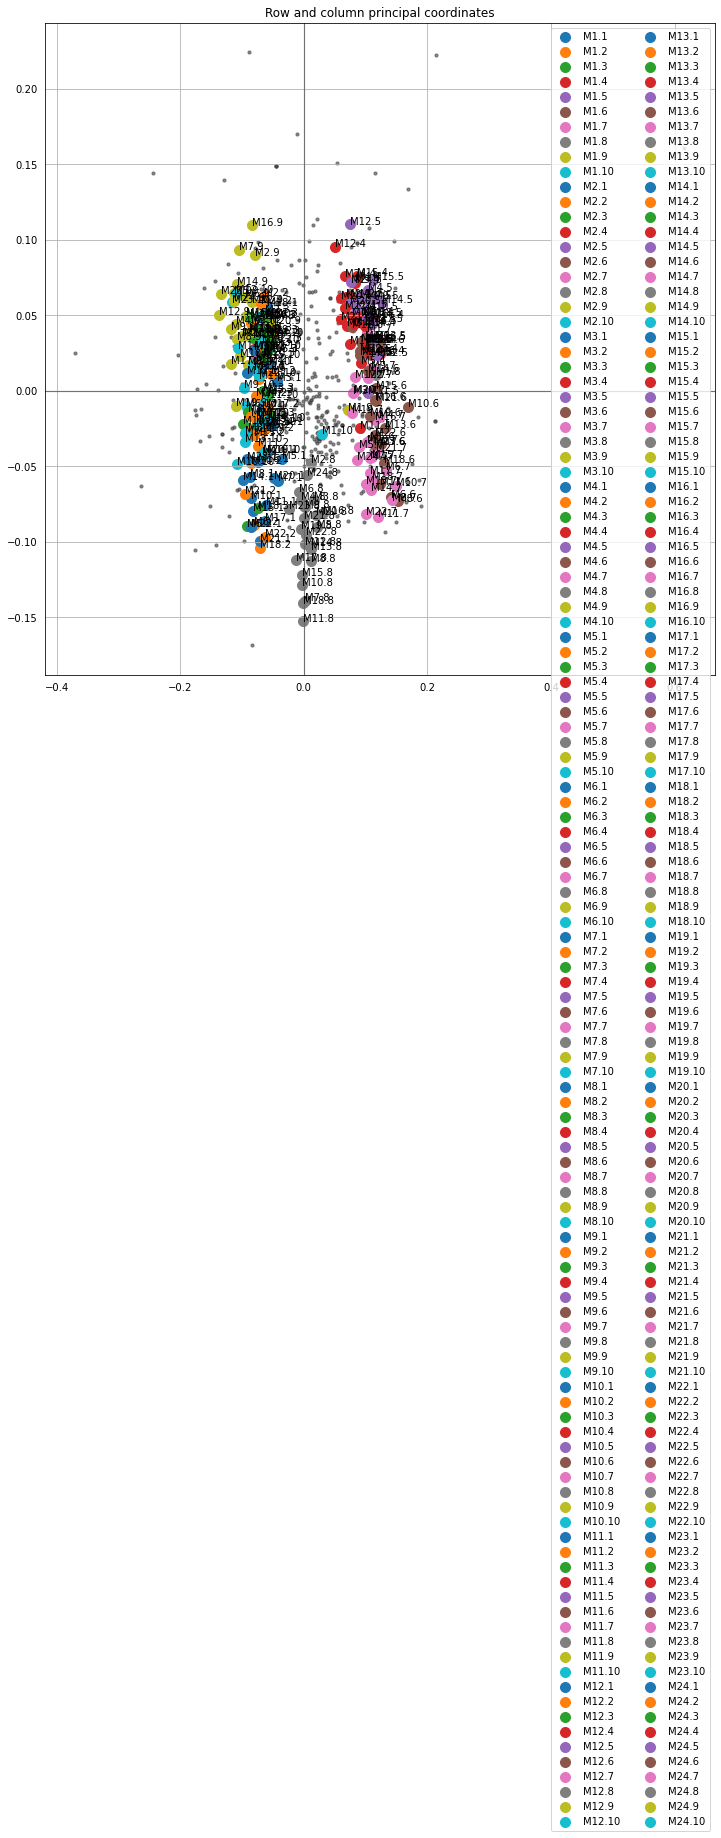

In [32]:

#%% Plotando o mapa perceptual

mp_mca = mca.plot_coordinates(
             X = df,
             figsize=(12,12),
             show_row_points = True,
             show_column_points = True,
             show_row_labels=False,
             column_points_size = 100,
             show_column_labels = True,
             legend_n_cols = 2)


In [35]:
------

SyntaxError: invalid syntax (Temp/ipykernel_12524/3549499166.py, line 1)

In [66]:
#%% Identificando as variáveis e suas categorias únicas

for col in df:
    print(col, df[col].unique())

M1.1 [4 3 2 5 1]
M1.2 [4 5 2 3 1]
M1.3 [3 4 5 2 1]
M1.4 [4 1 5 3 2]
M1.5 [4 3 5 1 2]
M1.6 [4 2 5 3 1]
M1.7 [4 2 5 3 1]
M1.8 [4 3 5 2 1]
M1.9 [4 3 5 2 1]
M1.10 [3 4 5 2 1]
M2.1 [4 5 2 3 1]
M2.2 [5 4 2 3 1]
M2.3 [4 5 3 2 1]
M2.4 [4 2 3 5 1]
M2.5 [4 2 5 3 1]
M2.6 [4 2 5 3 1]
M2.7 [4 3 5 2 1]
M2.8 [3 4 5 2 1]
M2.9 [4 2 3 5 1]
M2.10 [4 2 5 3 1]
M3.1 [3 4 5 1 2]
M3.2 [3 4 5 1 2]
M3.3 [3 4 5 1 2]
M3.4 [4 5 2 3 1]
M3.5 [4 5 2 3 1]
M3.6 [4 5 1 2 3]
M3.7 [4 5 2 3 1]
M3.8 [4 3 5 1 2]
M3.9 [3 4 5 2 1]
M3.10 [3 4 5 2 1]
M4.1 [4 5 3 1 2]
M4.2 [4 5 2 3 1]
M4.3 [4 5 2 1 3]
M4.4 [4 3 5 2 1]
M4.5 [4 2 5 3 1]
M4.6 [4 3 5 2 1]
M4.7 [4 5 2 3 1]
M4.8 [3 4 5 2 1]
M4.9 [3 4 2 5 1]
M4.10 [3 4 5 2 1]
M5.1 [3 4 5 2 1]
M5.2 [4 1 3 5 2]
M5.3 [4 2 1 3 5]
M5.4 [3 4 5 2 1]
M5.5 [3 4 2 5 1]
M5.6 [4 5 3 2 1]
M5.7 [4 5 3 2 1]
M5.8 [3 4 5 2 1]
M5.9 [5 4 3 2 1]
M5.10 [4 3 2 5 1]
M6.1 [4 5 1 3 2]
M6.2 [3 4 5 1 2]
M6.3 [3 4 5 1 2]
M6.4 [3 4 1 5 2]
M6.5 [3 4 1 5 2]
M6.6 [3 4 2 5 1]
M6.7 [4 2 5 3 1]
M6.8 [4 5 3 2 1]
M6.9 [4 3

In [37]:
#%% Ajustando variáveis (Type = category)

catcols = df.select_dtypes(['object']).columns

df[catcols] = df[catcols].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Columns: 240 entries, M1.1 to M24.10
dtypes: float64(10), int64(230)
memory usage: 658.2 KB


In [40]:
#%% Indicação das variáveis utilizadas na MCA

mca_cols = df.select_dtypes(['int']).columns
print(len(mca_cols), 'features used for MCA are', mca_cols.tolist())

230 features used for MCA are ['M1.1', 'M1.2', 'M1.3', 'M1.4', 'M1.5', 'M1.6', 'M1.7', 'M1.8', 'M1.9', 'M1.10', 'M2.1', 'M2.2', 'M2.3', 'M2.4', 'M2.5', 'M2.6', 'M2.7', 'M2.8', 'M2.9', 'M2.10', 'M3.1', 'M3.2', 'M3.3', 'M3.4', 'M3.5', 'M3.6', 'M3.7', 'M3.8', 'M3.9', 'M3.10', 'M4.1', 'M4.2', 'M4.3', 'M4.4', 'M4.5', 'M4.6', 'M4.7', 'M4.8', 'M4.9', 'M4.10', 'M5.1', 'M5.2', 'M5.3', 'M5.4', 'M5.5', 'M5.6', 'M5.7', 'M5.8', 'M5.9', 'M5.10', 'M6.1', 'M6.2', 'M6.3', 'M6.4', 'M6.5', 'M6.6', 'M6.7', 'M6.8', 'M6.9', 'M6.10', 'M7.1', 'M7.2', 'M7.3', 'M7.4', 'M7.5', 'M7.6', 'M7.7', 'M7.8', 'M7.9', 'M7.10', 'M9.1', 'M9.2', 'M9.3', 'M9.4', 'M9.5', 'M9.6', 'M9.7', 'M9.8', 'M9.9', 'M9.10', 'M10.1', 'M10.2', 'M10.3', 'M10.4', 'M10.5', 'M10.6', 'M10.7', 'M10.8', 'M10.9', 'M10.10', 'M11.1', 'M11.2', 'M11.3', 'M11.4', 'M11.5', 'M11.6', 'M11.7', 'M11.8', 'M11.9', 'M11.10', 'M12.1', 'M12.2', 'M12.3', 'M12.4', 'M12.5', 'M12.6', 'M12.7', 'M12.8', 'M12.9', 'M12.10', 'M13.1', 'M13.2', 'M13.3', 'M13.4', 'M13.5', 'M1

               0         1
M1.1   -0.072108  0.011929
M1.2   -0.070905  0.008227
M1.3   -0.054630 -0.016700
M1.4   -0.078398  0.030505
M1.5   -0.076529  0.023831
...          ...       ...
M24.6   0.092871  0.020677
M24.7   0.087051 -0.048818
M24.8   0.007239 -0.049206
M24.9  -0.113298  0.059091
M24.10 -0.096892 -0.029336

[230 rows x 2 columns]
            0         1
0    0.005915  0.007616
1    0.022685 -0.034510
2   -0.133633 -0.101444
3    0.110903  0.005857
4    0.104487 -0.020620
..        ...       ...
346 -0.030123 -0.042053
347 -0.011956 -0.014436
348  0.022685 -0.034510
349  0.203392 -0.008027
350 -0.057550 -0.035438

[351 rows x 2 columns]


ZeroDivisionError: float division by zero

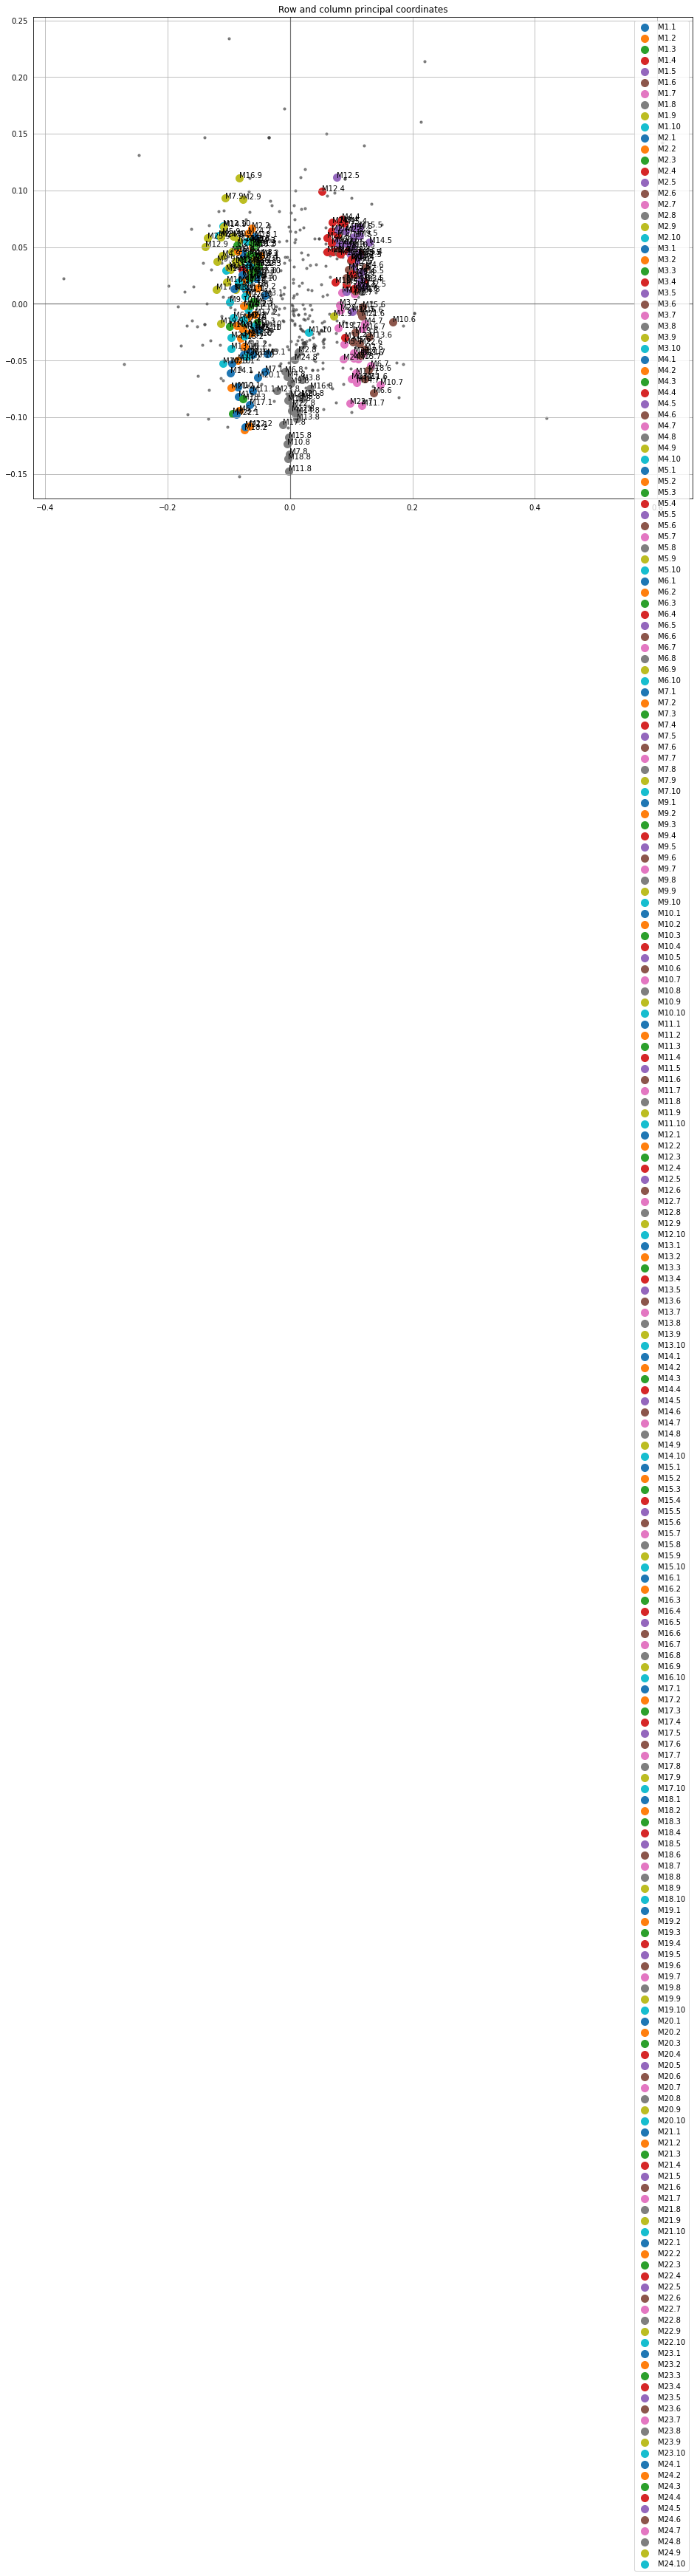

In [41]:
#%% Criando a MCA

mca = prince.MCA()

mca = mca.fit(df[mca_cols])


#%% Identificando as coordenadas (categorias e observações)

print(mca.column_coordinates(df[mca_cols]))
print(mca.row_coordinates(df[mca_cols]))

#%% Criando o mapa perceptual

ax = mca.plot_coordinates(X=df[mca_cols],
                             figsize=(16,12),
                             show_row_points = True,
                             show_column_points = True,
                             show_row_labels=False,
                             column_points_size = 100,
                             show_column_labels = True)

#%% FIM!


In [48]:
print(df.dtypes)

M1.1      int64
M1.2      int64
M1.3      int64
M1.4      int64
M1.5      int64
          ...  
M24.6     int64
M24.7     int64
M24.8     int64
M24.9     int64
M24.10    int64
Length: 240, dtype: object


In [62]:
non_int_columns = df.select_dtypes(exclude=['int64']).columns

# Iterar sobre as colunas não int64 e imprimir seus nomes
for column in non_int_columns:
    print(column)

M8.1
M8.2
M8.3
M8.4
M8.5
M8.6
M8.7
M8.8
M8.9
M8.10


In [63]:
df['M8.1'].unique()

array([4, 5, 2, 3, 1])

In [58]:
# Selecionar colunas para conversão
colunas_para_converter = ['M8.1', 'M8.2', 'M8.3', 'M8.4', 'M8.5', 'M8.6', 'M8.7', 'M8.8', 'M8.9', 'M8.10']

# Converter os valores das colunas selecionadas para inteiros
df[colunas_para_converter] = df[colunas_para_converter].astype(int)

# Exibir o DataFrame resultante
print(df)

     M1.1  M1.2  M1.3  M1.4  M1.5  M1.6  M1.7  M1.8  M1.9  M1.10  ...  M24.1  \
0       4     4     3     4     4     4     4     4     4      3  ...      4   
1       4     4     4     4     4     4     4     4     4      4  ...      4   
2       3     5     5     4     4     2     2     3     3      4  ...      5   
3       4     2     4     4     4     4     4     5     5      4  ...      2   
4       3     4     4     4     4     4     4     5     5      3  ...      3   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...    ...   
346     4     5     5     5     5     4     4     4     5      5  ...      5   
347     5     4     4     4     4     4     4     4     4      3  ...      5   
348     4     4     4     4     4     4     4     4     4      4  ...      4   
349     3     2     2     1     3     5     5     5     5      3  ...      4   
350     5     5     4     4     5     3     3     3     3      3  ...      4   

     M24.2  M24.3  M24.4  M24.5  M24.6 